In [1]:
import gym
import gym_pdw
                                                    
import numpy as np
from matplotlib import pyplot as plt

In [2]:
env = gym.make('gym_pdw:pdw-v0')

In [3]:
# Epsilon-greedy action selection
def select_action(epsilon, state, Q):
    if np.random.uniform(0,1) < epsilon:
        action = env.random_action()
    else:
        action = np.argmax(Q[:,state[0],state[1]])
    return action

In [4]:
# Q function update 
def update(state, action, reward, next_state, next_action, E, Q):
    error = reward + gamma*Q[next_action][next_state[0],next_state[1]] - Q[action][state[0],state[1]]
    Q = Q + alpha*error*E
    
    return Q

In [5]:
def SARSA_lambda(gamma, alpha, epsilon, episodes, lambda_val):
    
    # Set the goal variant
    goal_pos = env.set_goal('A')

    # Setting terminal action-state value 
    Terminal_state = goal_pos

    # Initializing Q function values to zero
    Q = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])

        
    steps = np.zeros([episodes])
    avg_reward = np.zeros([episodes])
    
    for episode in range(episodes):

        env.reset()
        
        curr_state = env.get_state()
        action = env.random_action()
        
#         print(curr_state ,"init====================")

        E = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])

        while True:
            
            if steps[episode] != 0:
                action = select_action(epsilon, curr_state, Q)
            
            next_state, reward = env.step(action)
            next_action = select_action(epsilon, next_state, Q)

            # Update eligibility traces
            E *= gamma*lambda_val
            E[action][curr_state[0],curr_state[1]] += 1
            
            # Update Q values
            Q = update(curr_state, action, reward, next_state, next_action, E, Q)
            
            
            steps[episode] +=1
            avg_reward[episode] = avg_reward[episode] + (reward - avg_reward[episode])/steps[episode]
            
            
            curr_state = next_state
#             print(curr_state, "curr_state", env.start_positions)

            if curr_state == goal_pos:
                print("yes", steps[episode])
                break
    
    return avg_reward, steps, Q

In [6]:
def plot_sarsa_lambda(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
#     plt.show()


In [7]:
def plot_compare(avg_reward_all, steps_all, lambda_vals):
    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of c
    colors = ['k', 'r', 'g', 'm', 'y','k', 'c']

    # For each value of c, plot the average reward vs steps
    for i in range(len(avg_reward_all)):
        fig1.plot(range(episodes), steps_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # For each c, plot the % times optimal arm selected vs steps
    for i in range(len(steps_all)):
        fig2.plot(range(episodes), steps_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # Labelling the  plot
    fig1.title.set_text('For all lambdas Average reward vs episodes')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # Labelling the plot
    fig2.title.set_text('For all lambdas steps vs episodes')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()



yes 168.0
yes 329.0
yes 274.0
yes 333.0
yes 211.0
yes 349.0
yes 492.0
yes 494.0
yes 1720.0
yes 397.0
yes 719.0
yes 137.0
yes 31.0
yes 271.0
yes 555.0
yes 202.0
yes 59.0
yes 471.0
yes 307.0
yes 389.0
yes 240.0
yes 1235.0
yes 77.0
yes 290.0
yes 775.0
yes 740.0
yes 1718.0
yes 48.0
yes 21.0
yes 956.0
yes 286.0
yes 461.0
yes 1283.0
yes 471.0
yes 176.0
yes 201.0
yes 57.0
yes 201.0
yes 867.0
yes 135.0
yes 166.0
yes 37.0
yes 405.0
yes 60.0
yes 161.0
yes 76.0
yes 925.0
yes 235.0
yes 133.0
yes 59.0
yes 138.0
yes 564.0
yes 115.0
yes 329.0
yes 225.0
yes 113.0
yes 53.0
yes 130.0
yes 285.0
yes 150.0
yes 371.0
yes 414.0
yes 122.0
yes 98.0
yes 64.0
yes 21.0
yes 217.0
yes 942.0
yes 328.0
yes 1233.0
yes 1231.0
yes 479.0
yes 227.0
yes 68.0
yes 510.0
yes 922.0
yes 275.0
yes 566.0
yes 279.0
yes 551.0
yes 113.0
yes 600.0
yes 402.0
yes 182.0
yes 281.0
yes 347.0
yes 35.0
yes 642.0
yes 627.0
yes 162.0
yes 26.0
yes 43.0
yes 380.0
yes 254.0
yes 333.0
yes 205.0
yes 523.0
yes 187.0
yes 275.0
yes 413.0
yes 405.0
ye

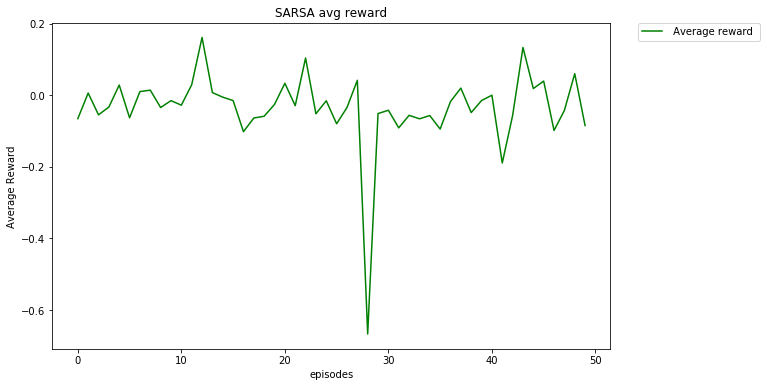

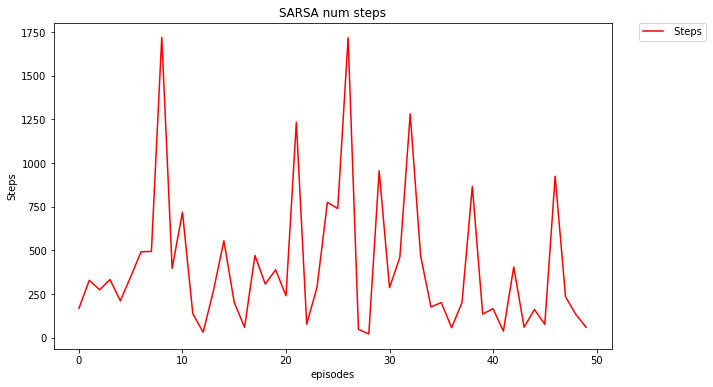

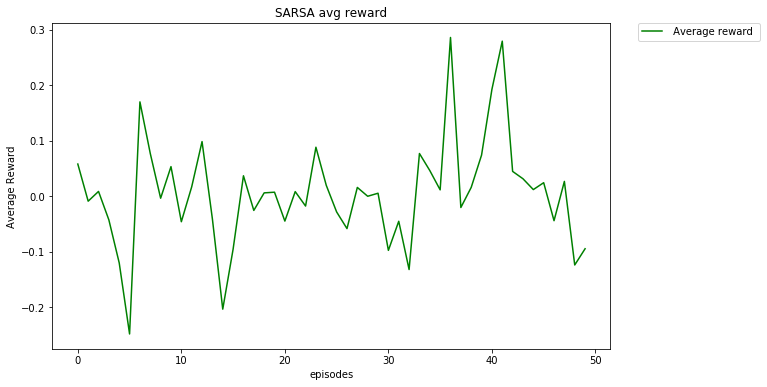

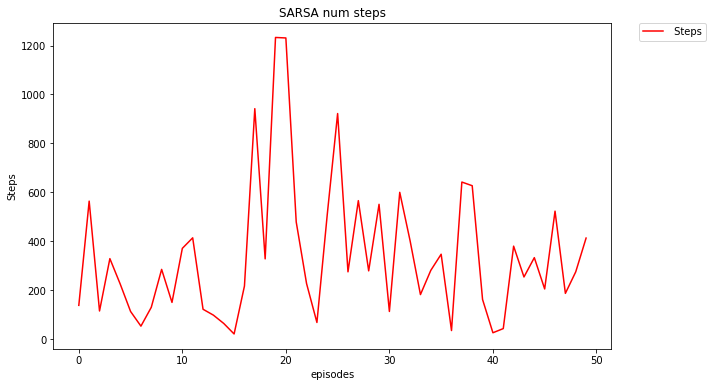

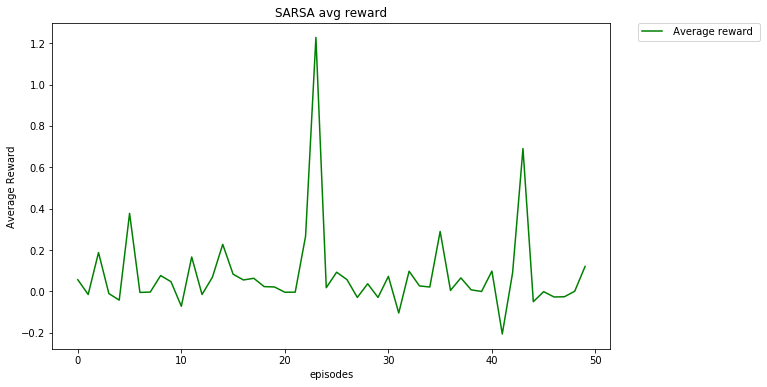

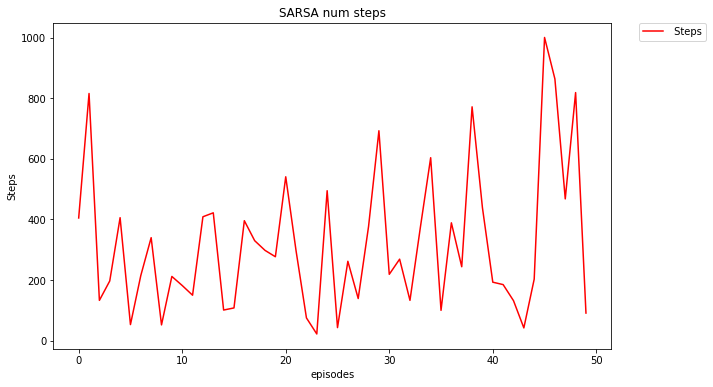

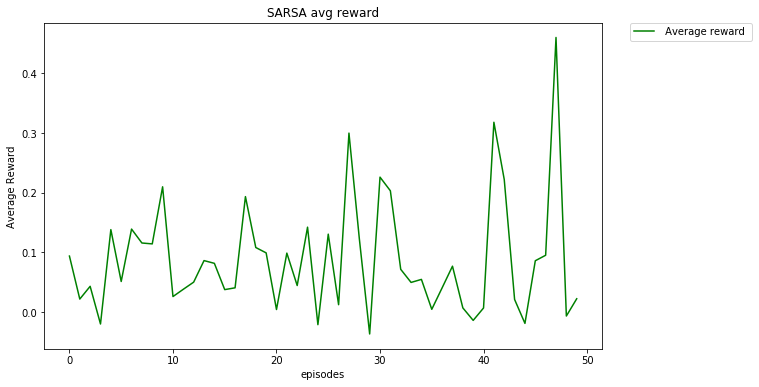

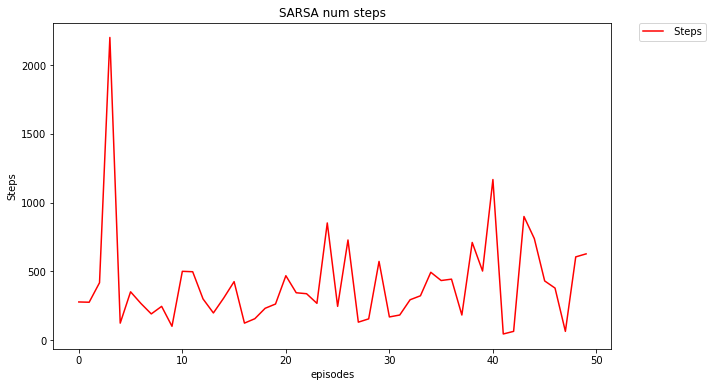

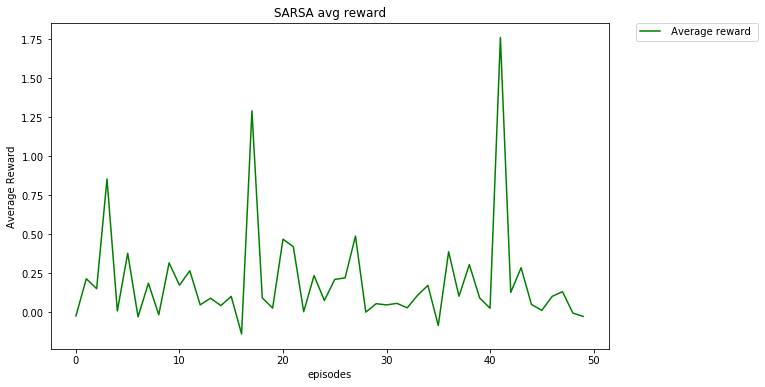

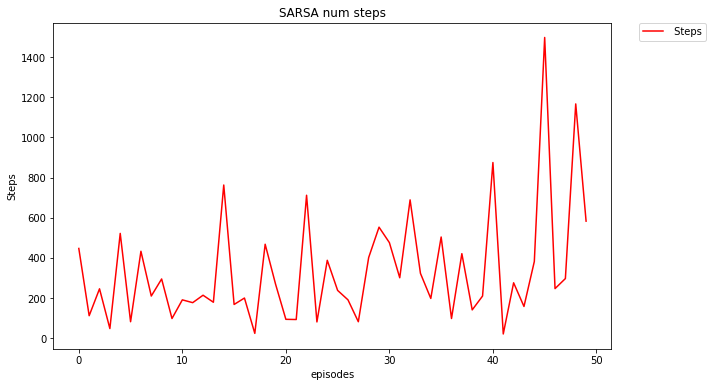

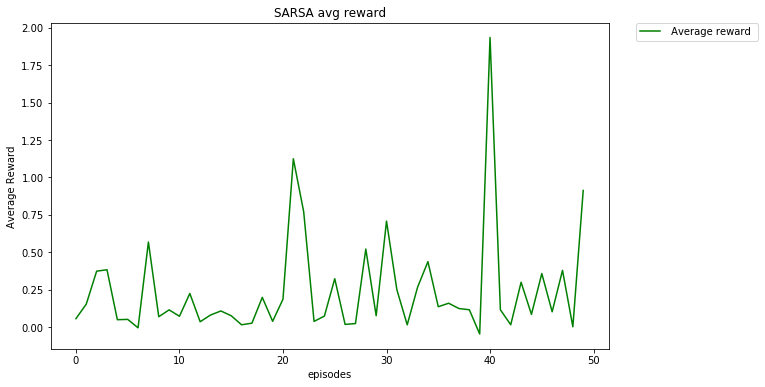

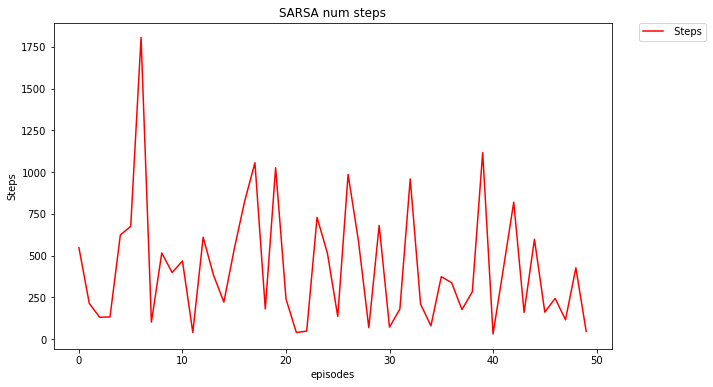

In [8]:
if __name__=='__main__':
    # parameters
    gamma = 0.9
    alpha = 0.01
    epsilon = 0.1
    episodes = 50
    
    lambda_vals = [0, 0.3, 0.5, 0.9, 0.99, 1.0]
    
    avg_reward_all = []
    steps_all = []
    
    Q_all = []
    
    for i in range(len(lambda_vals)):
        avg_reward, steps, Q = SARSA_lambda(gamma,alpha,epsilon, episodes, lambda_vals[i])
        
        Q_all.append(Q)
        
        avg_reward_all.append(avg_reward)
        steps_all.append(steps)
        
        plot_sarsa_lambda(avg_reward_all[i], steps_all[i], episodes)
    plt.show
    

6


/home/saivinay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


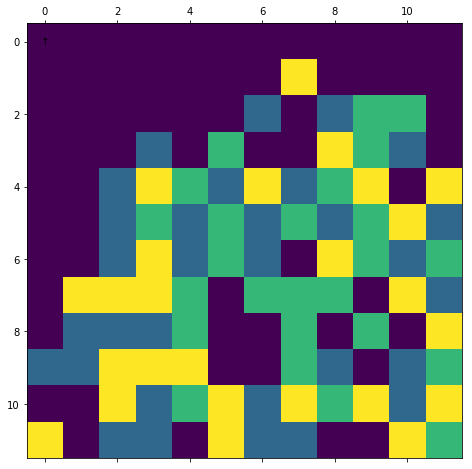

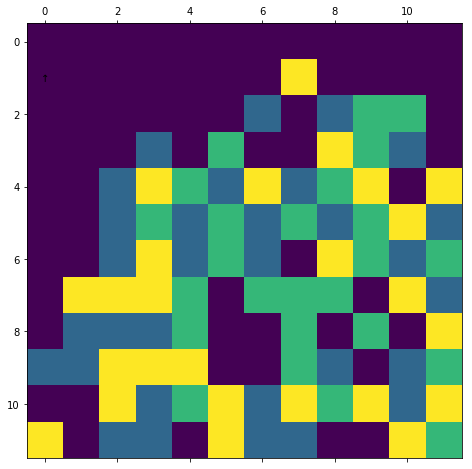

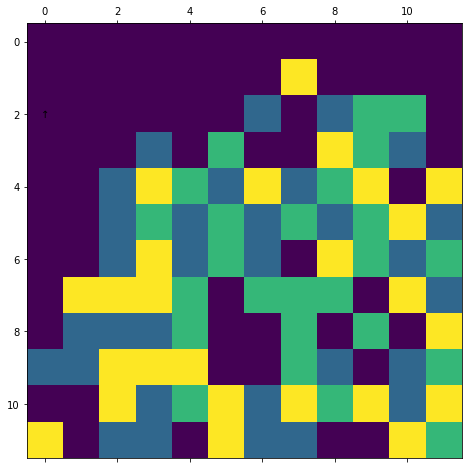

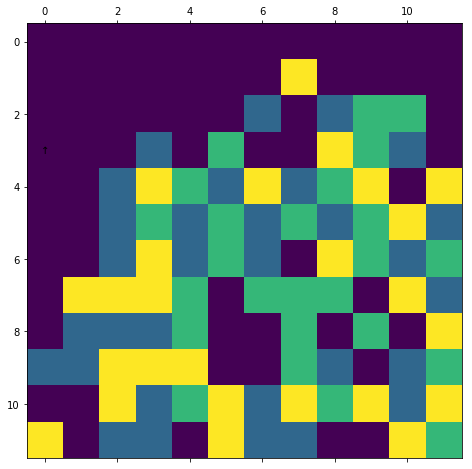

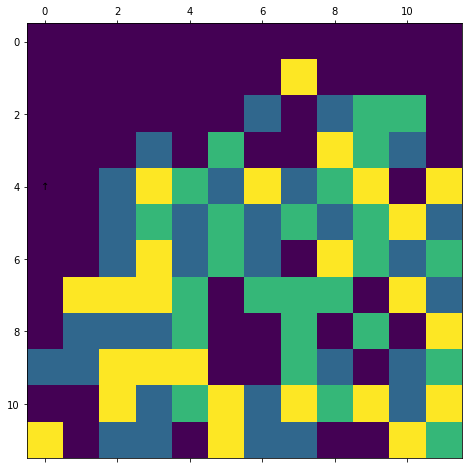

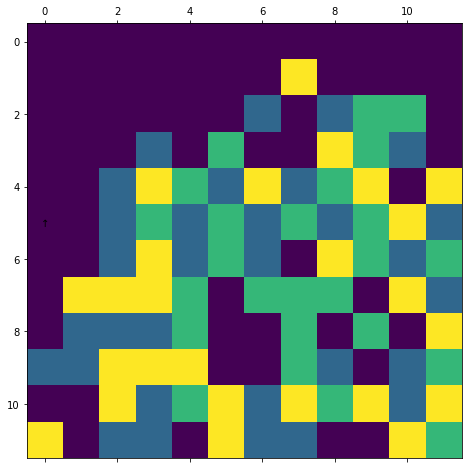

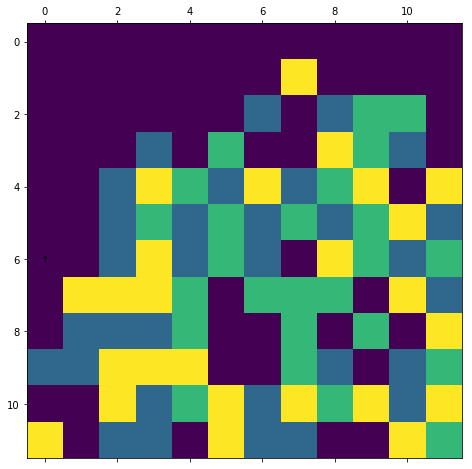

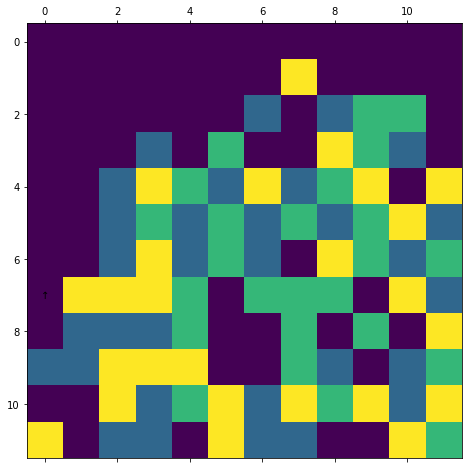

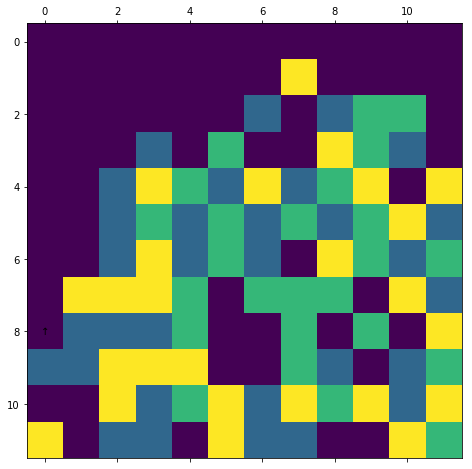

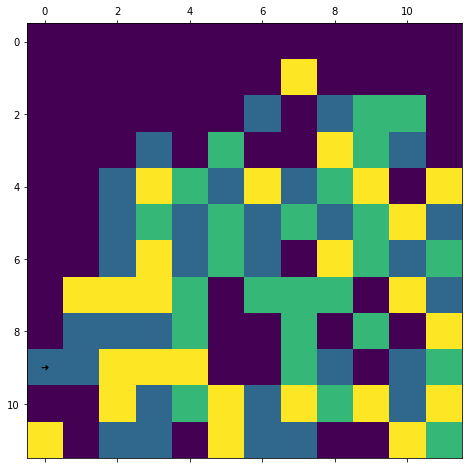

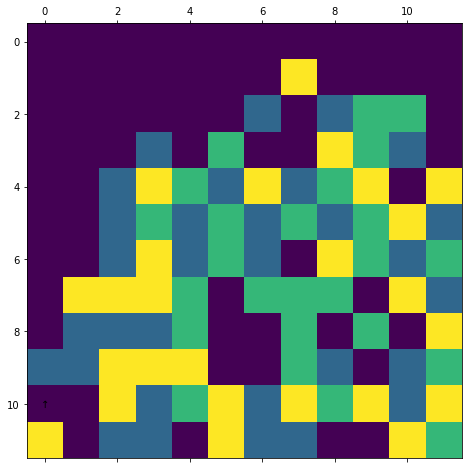

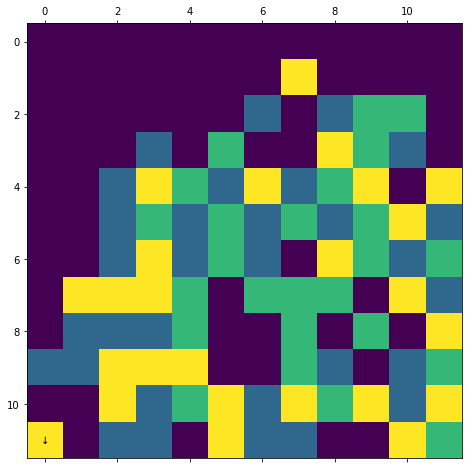

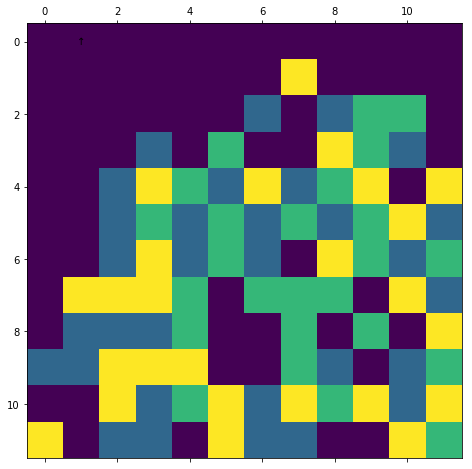

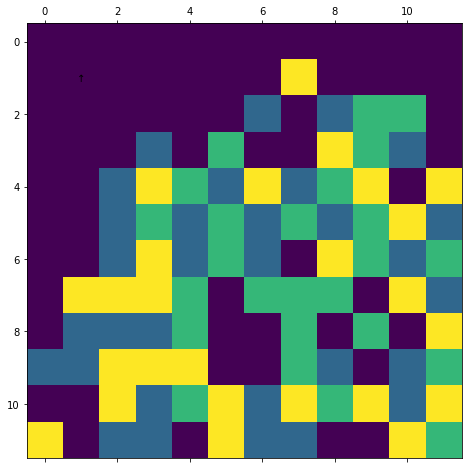

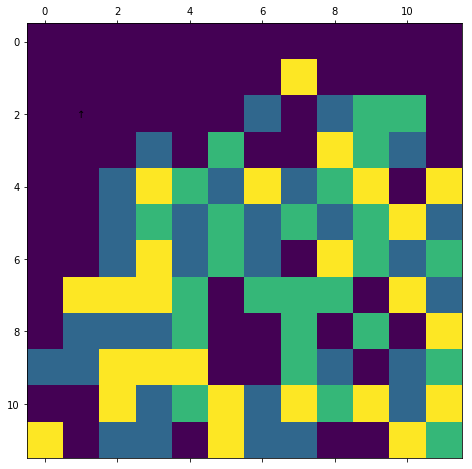

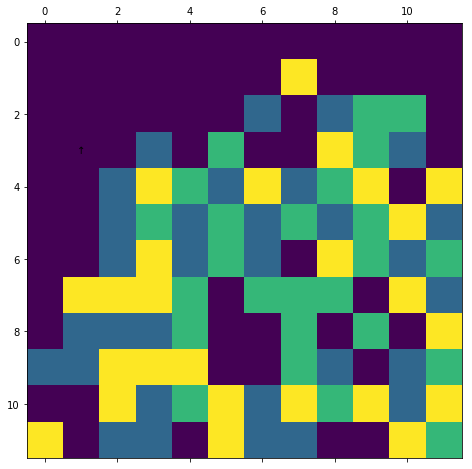

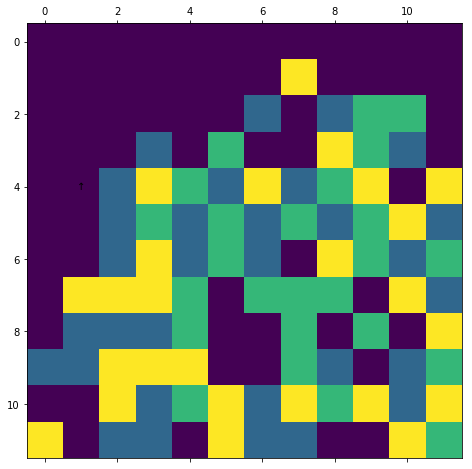

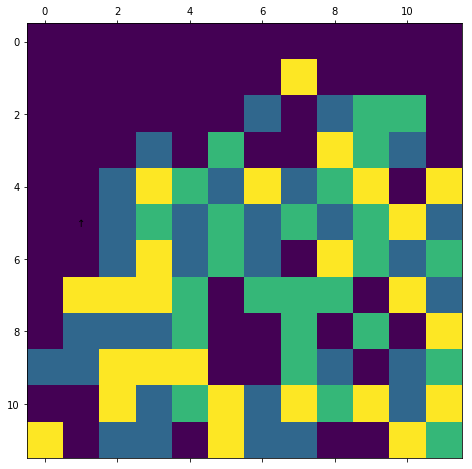

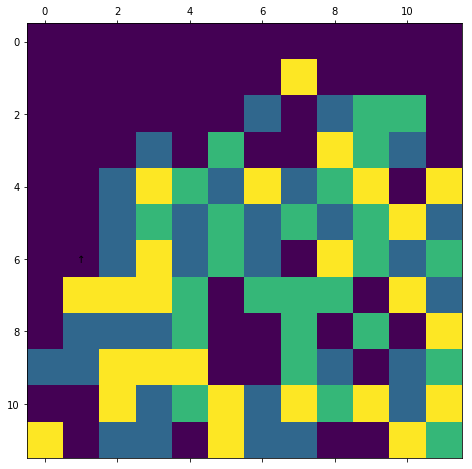

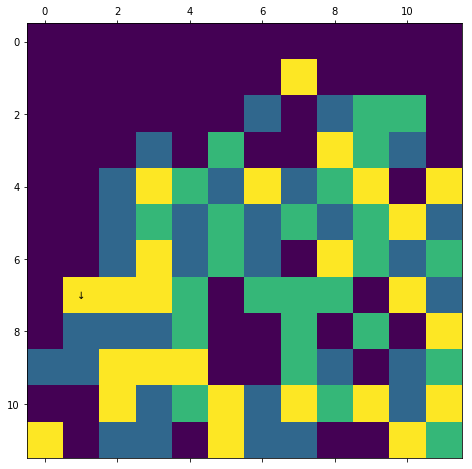

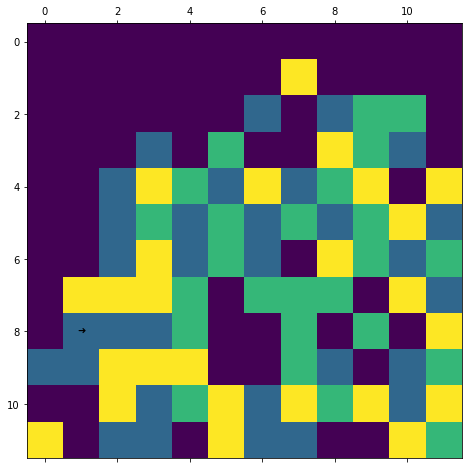

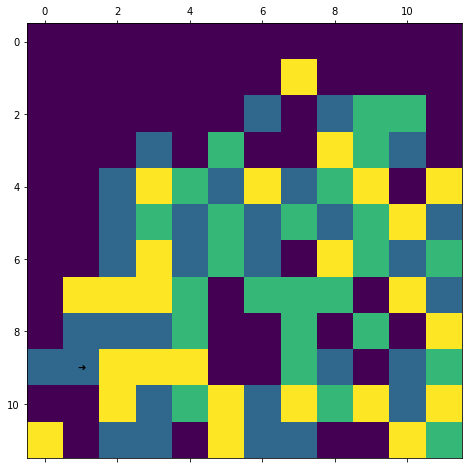

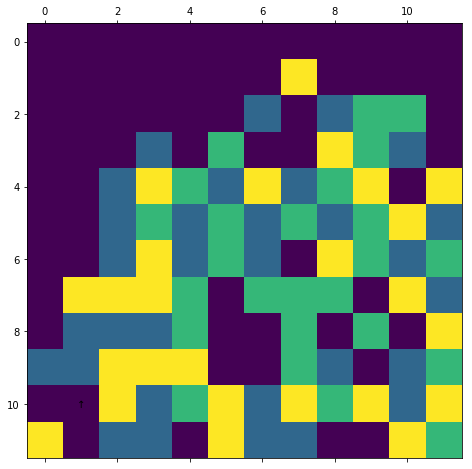

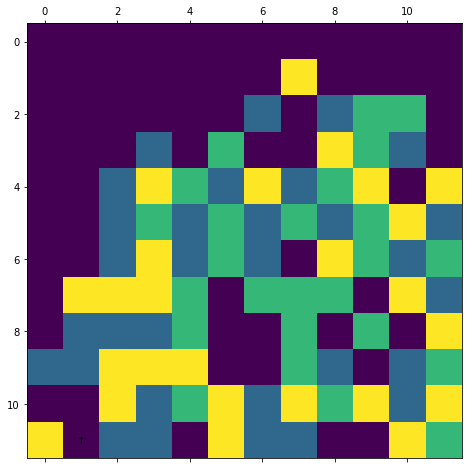

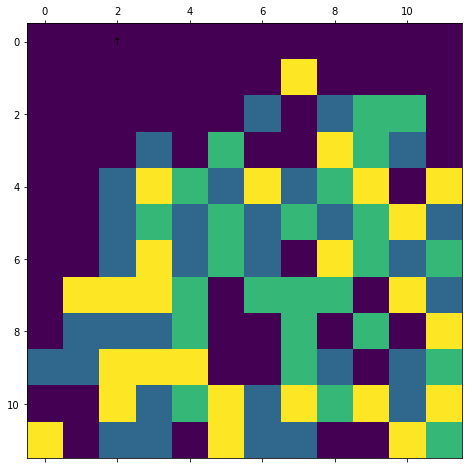

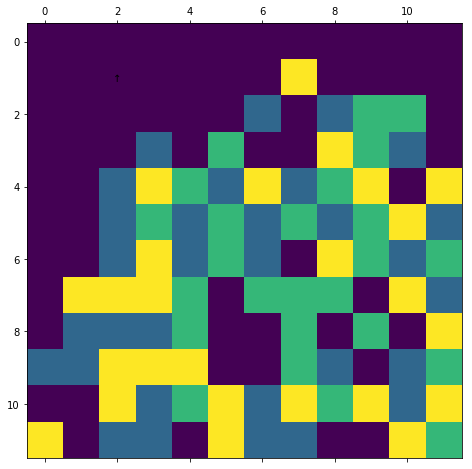

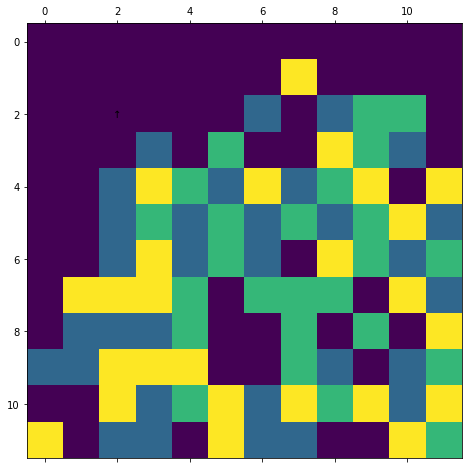

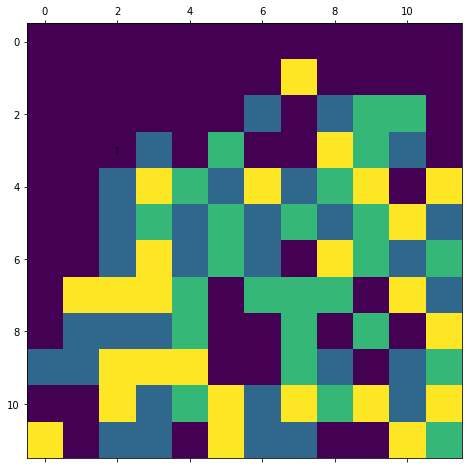

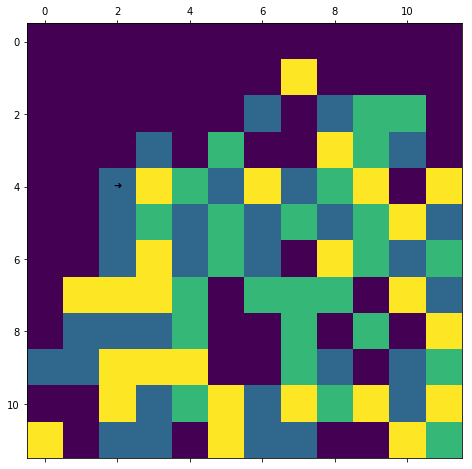

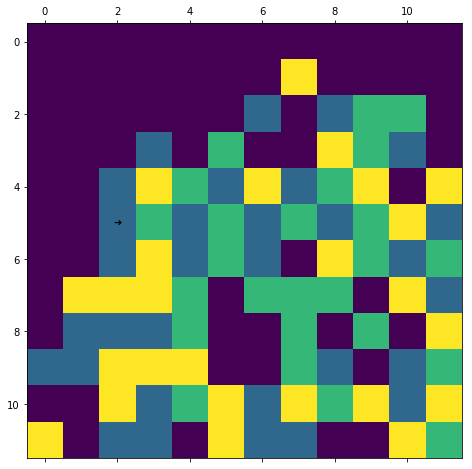

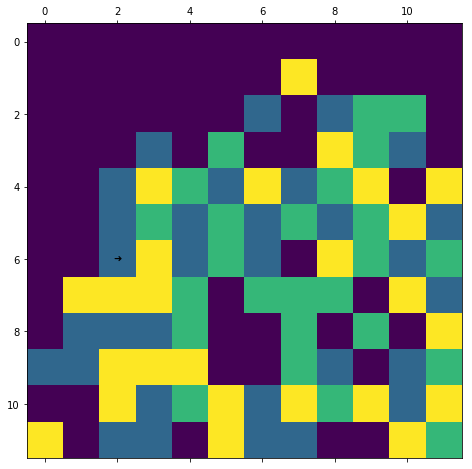

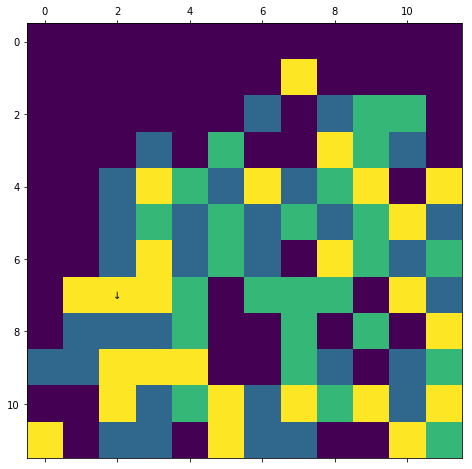

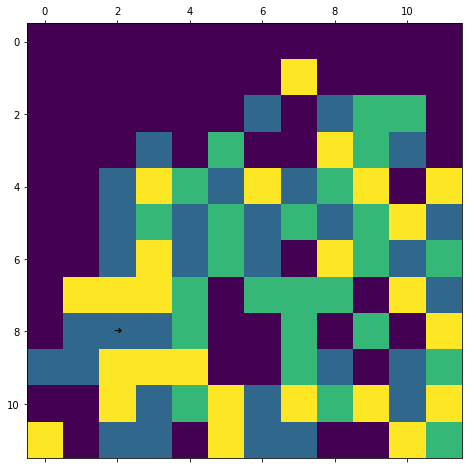

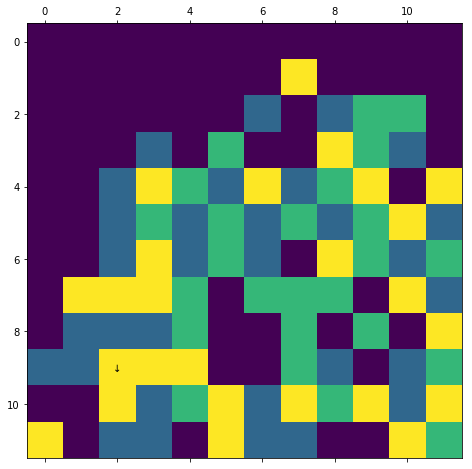

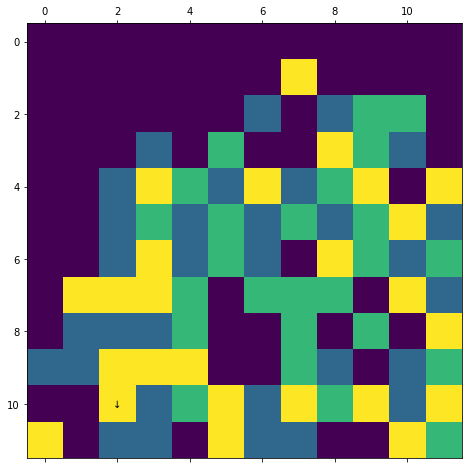

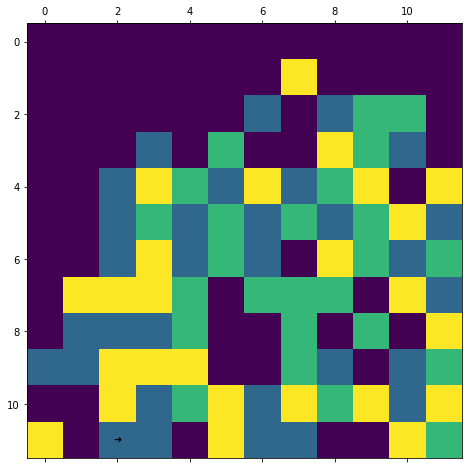

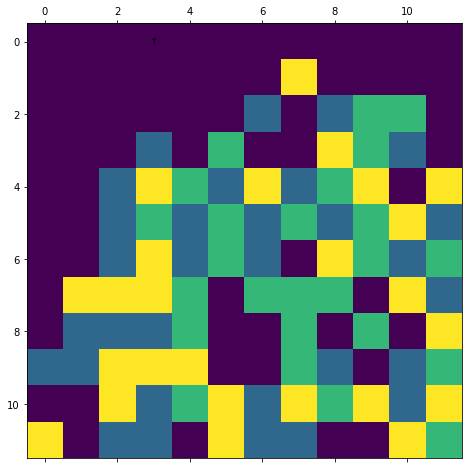

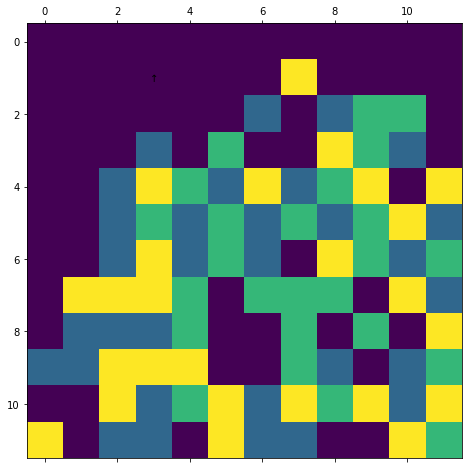

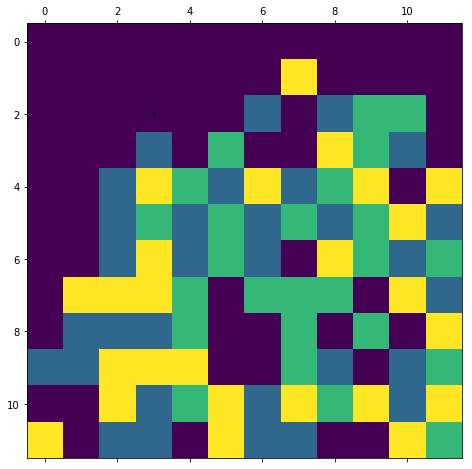

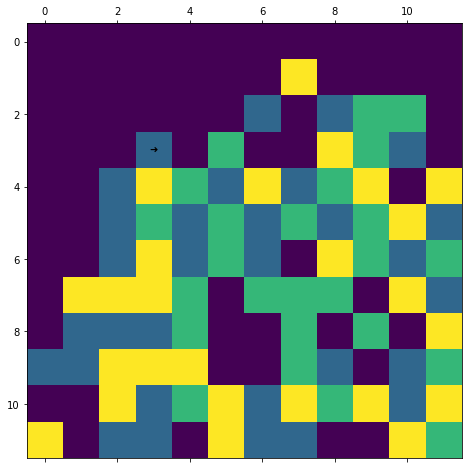

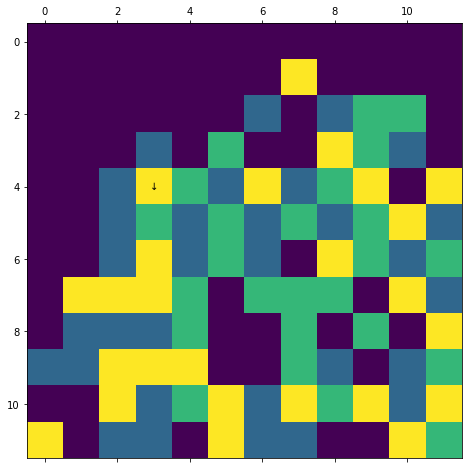

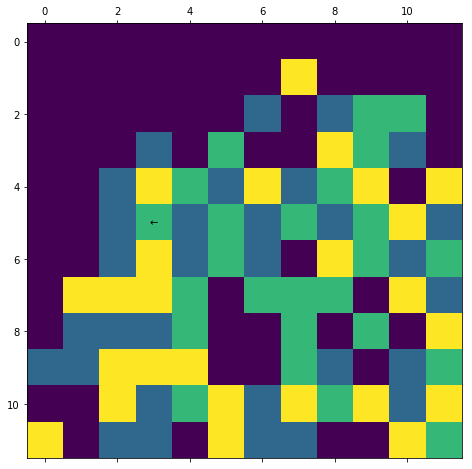

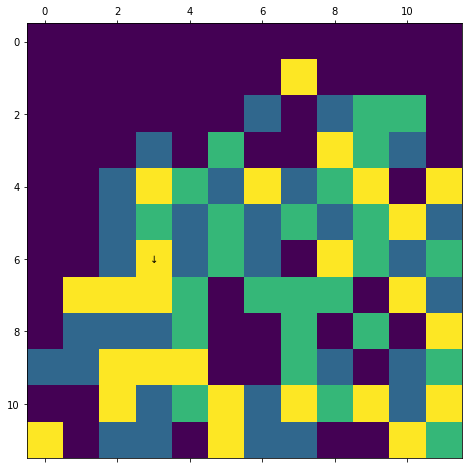

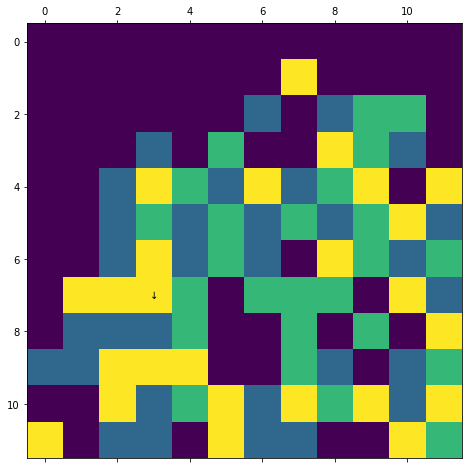

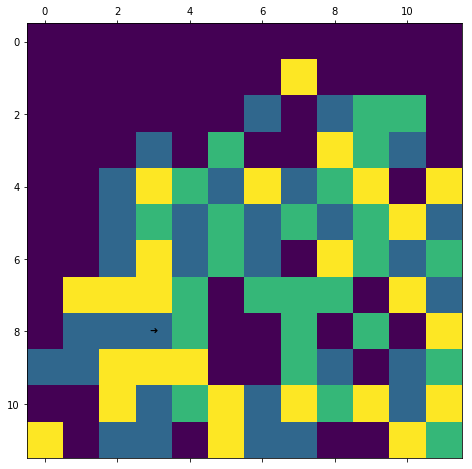

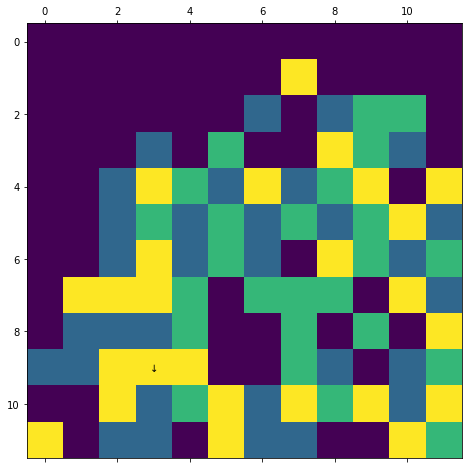

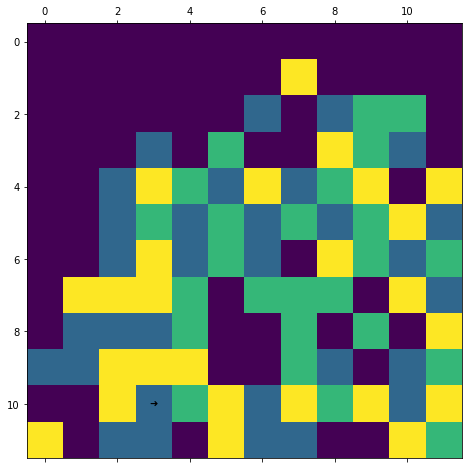

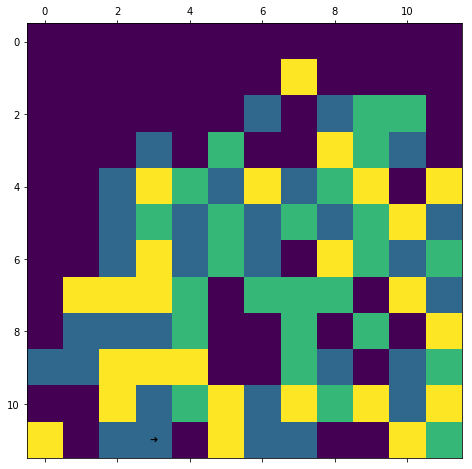

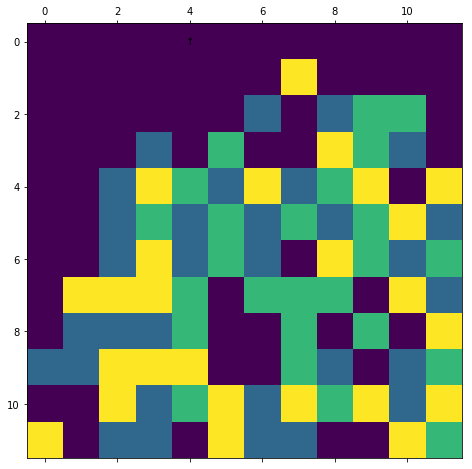

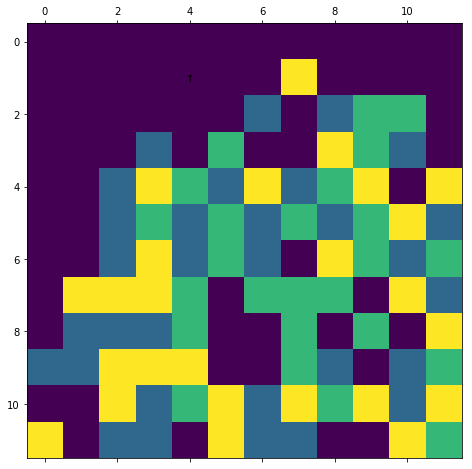

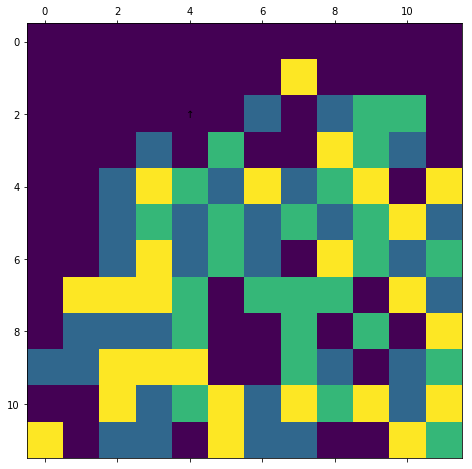

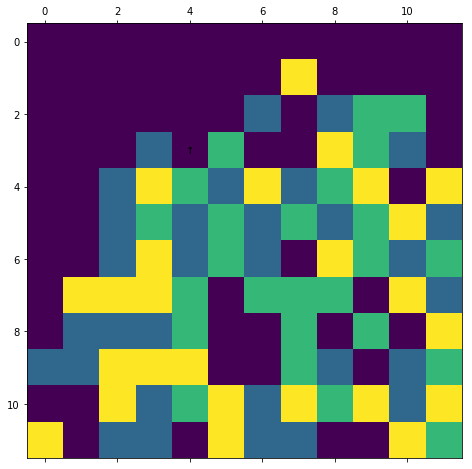

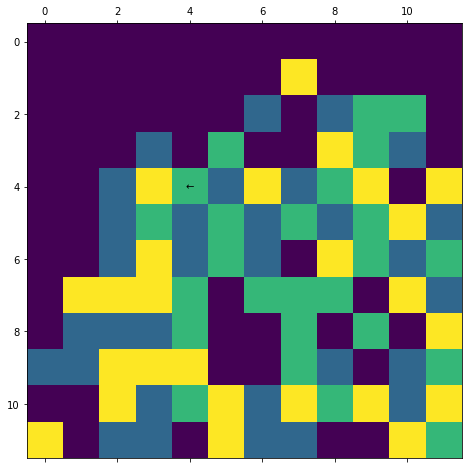

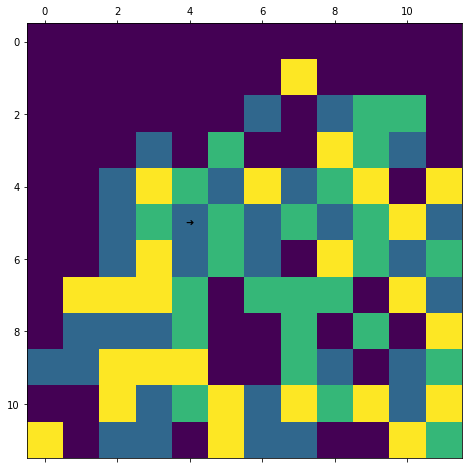

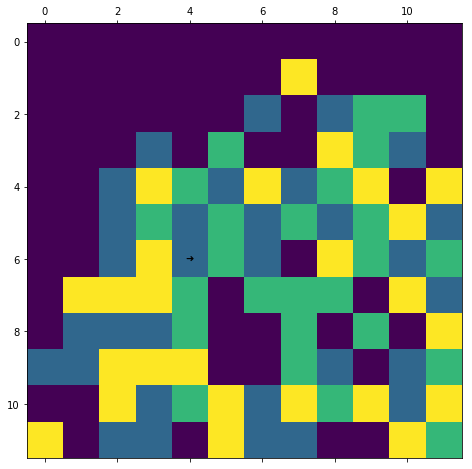

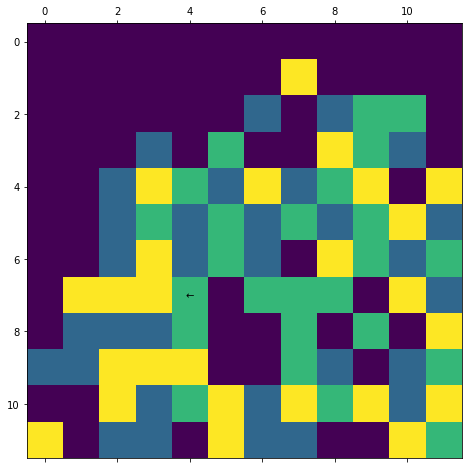

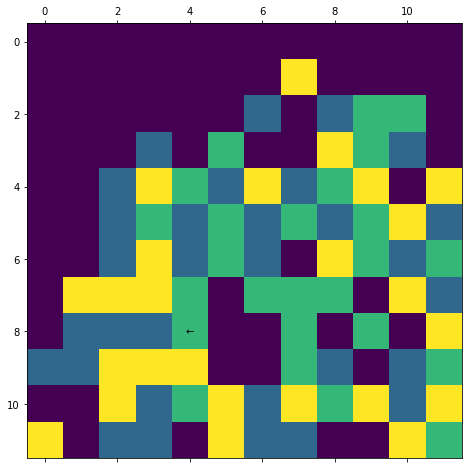

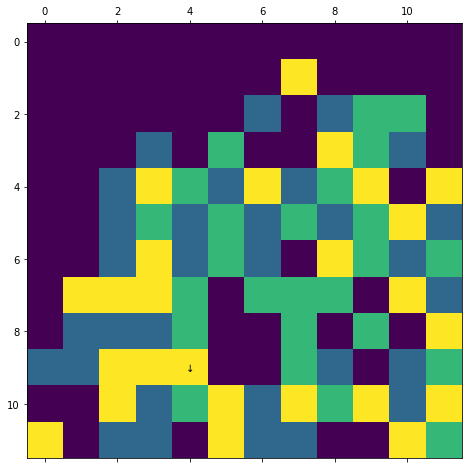

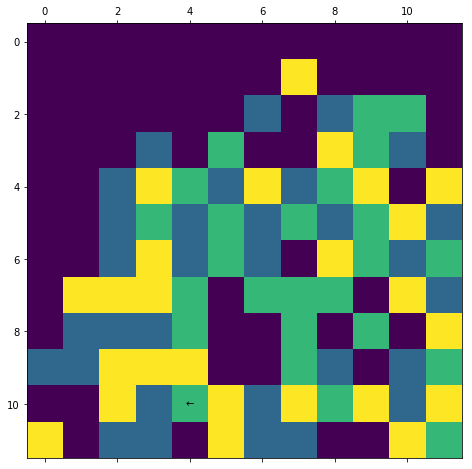

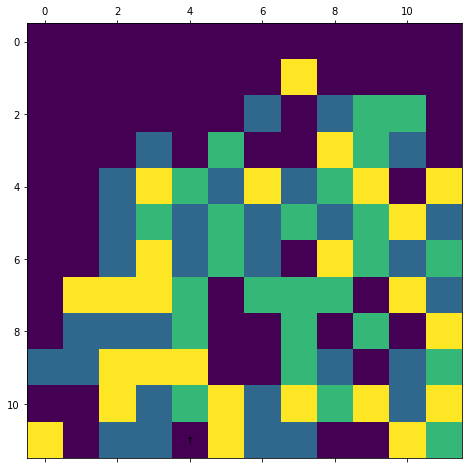

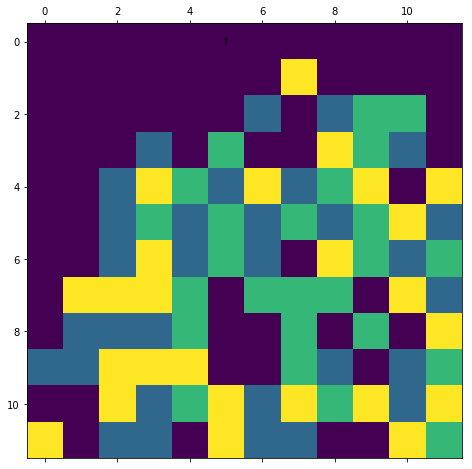

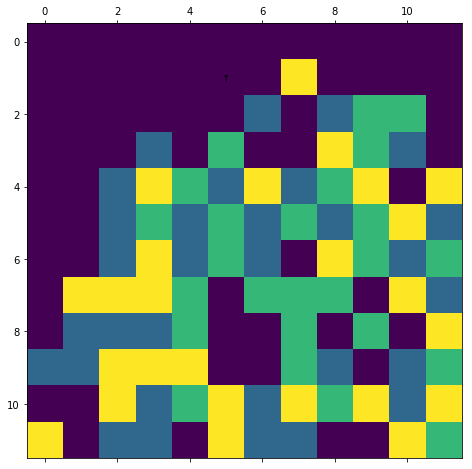

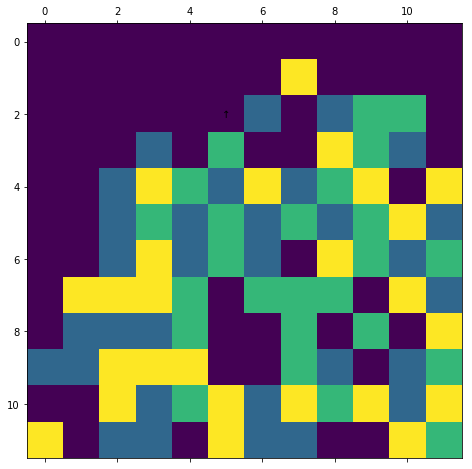

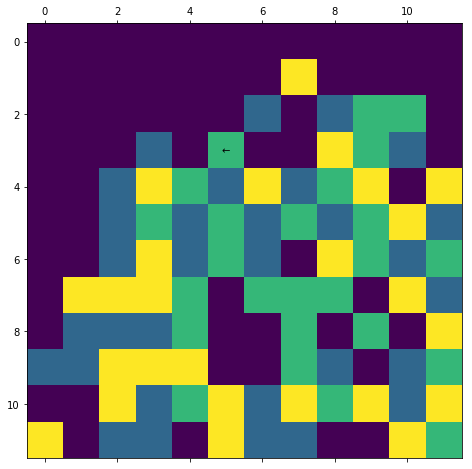

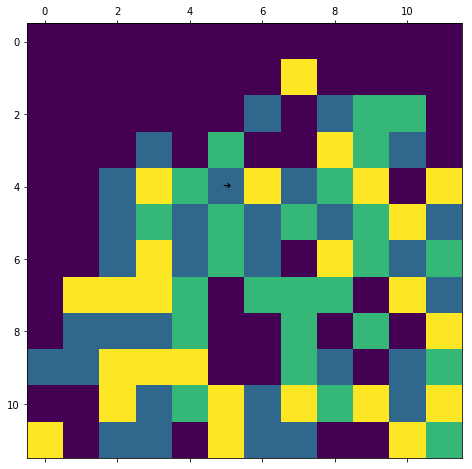

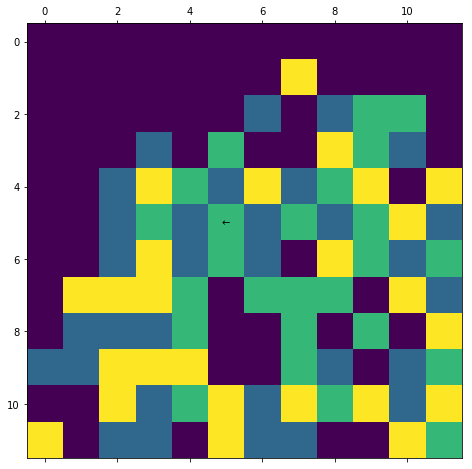

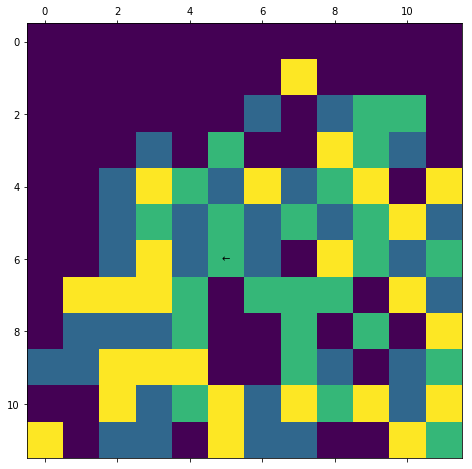

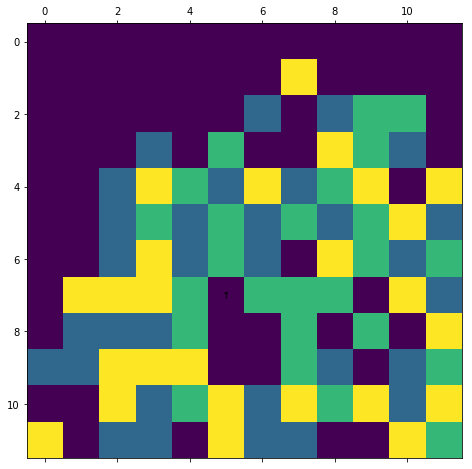

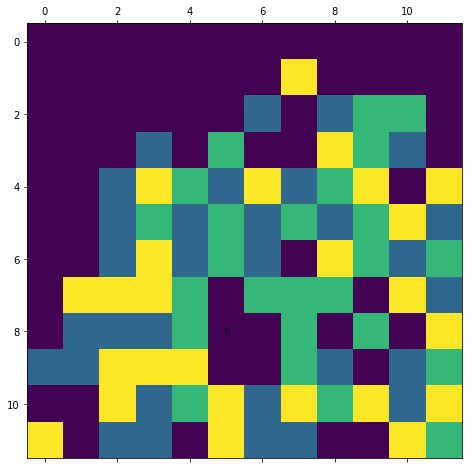

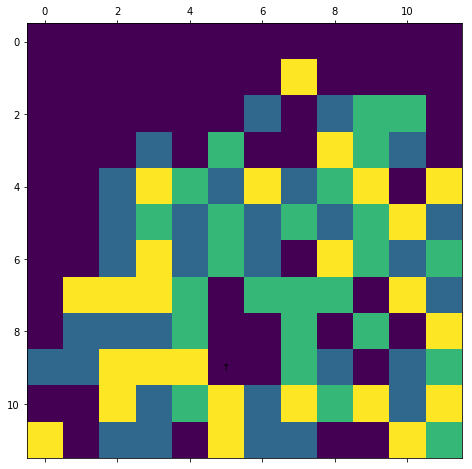

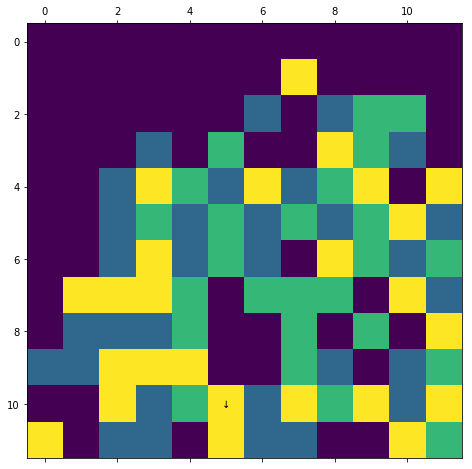

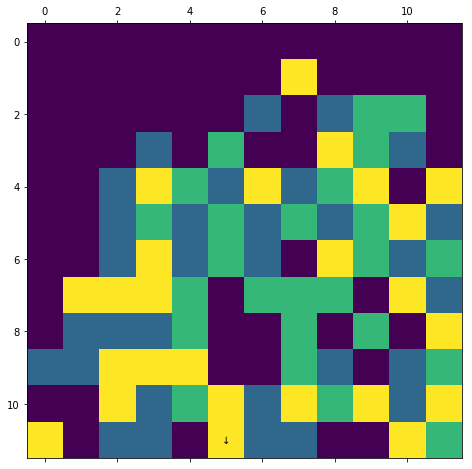

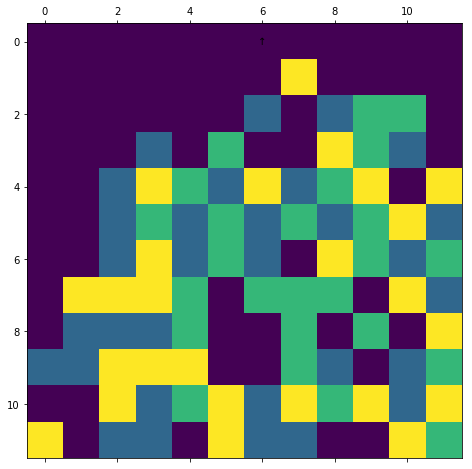

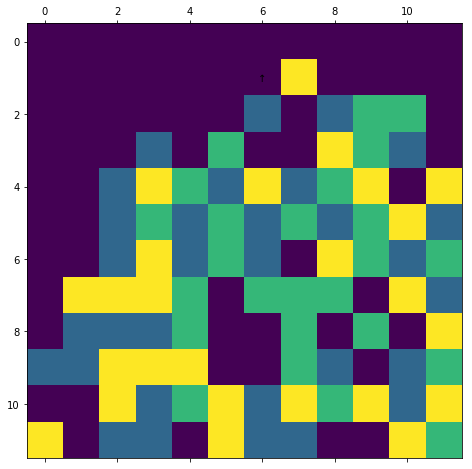

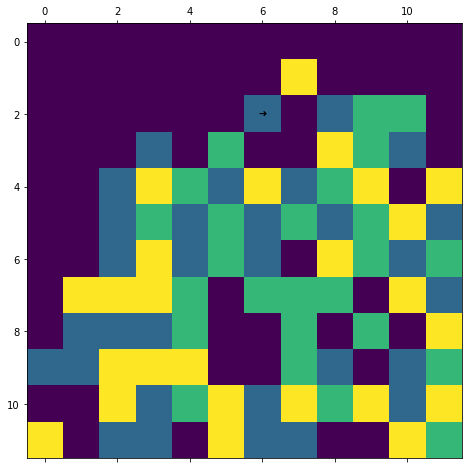

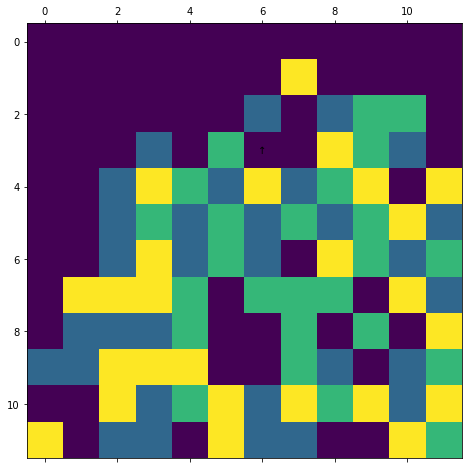

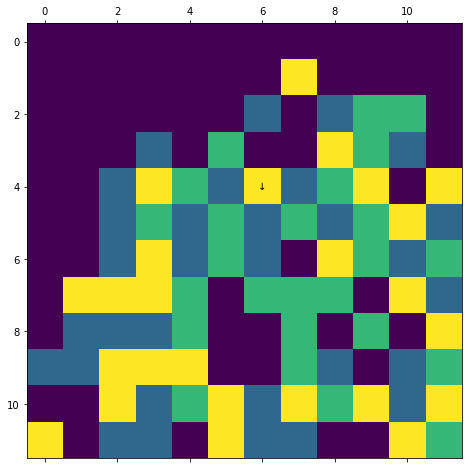

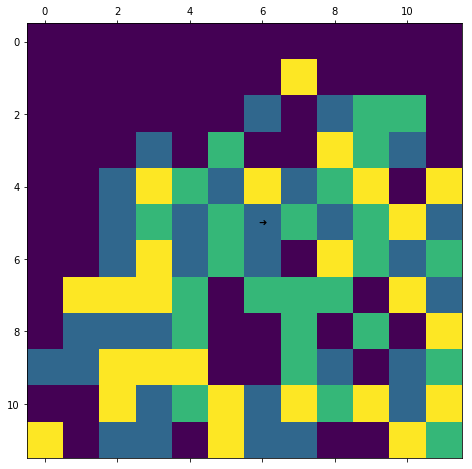

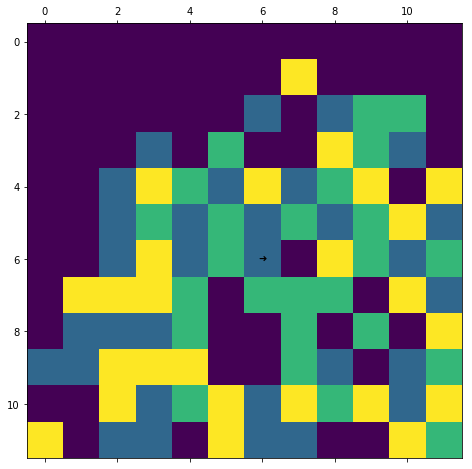

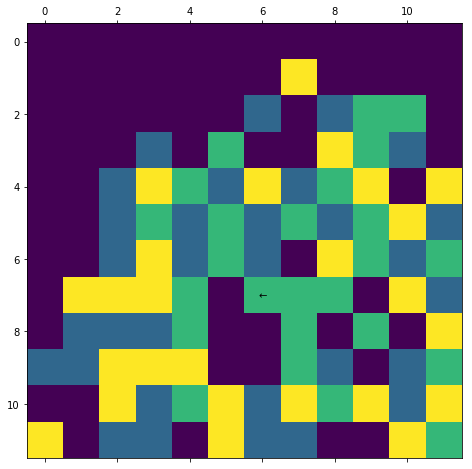

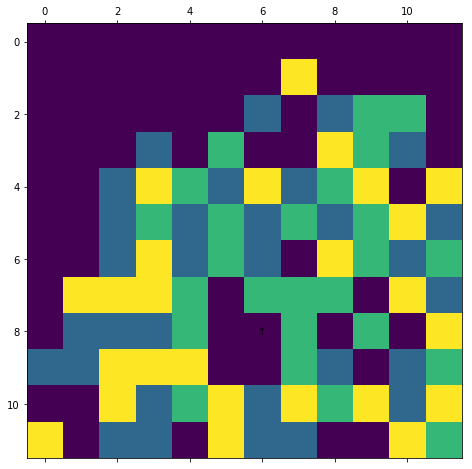

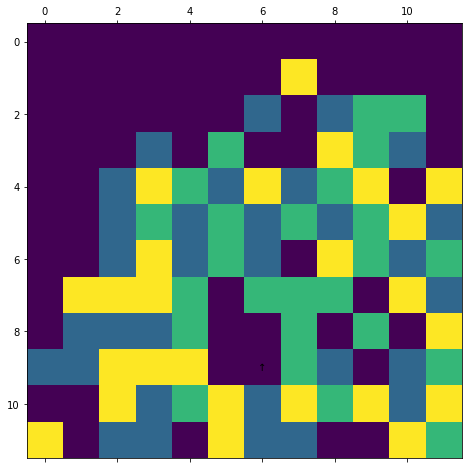

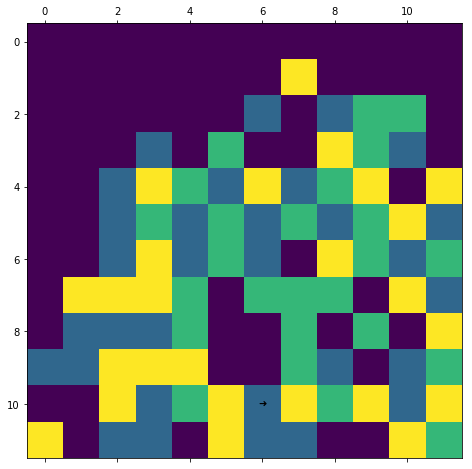

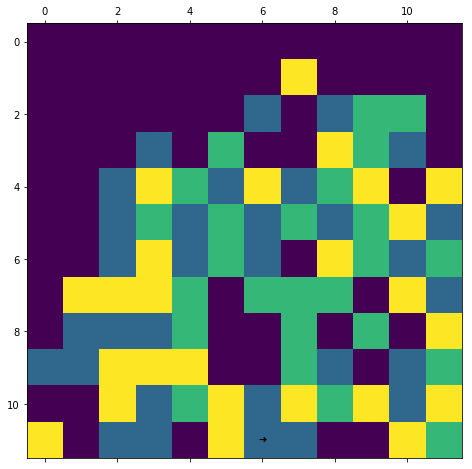

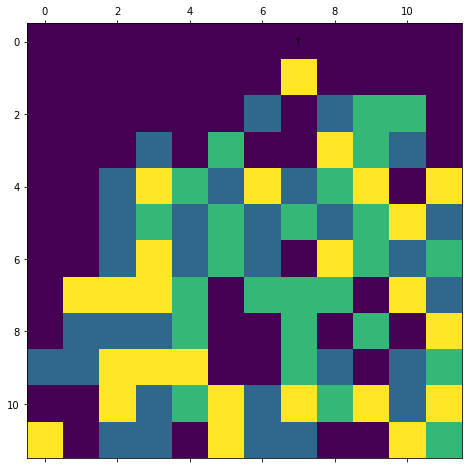

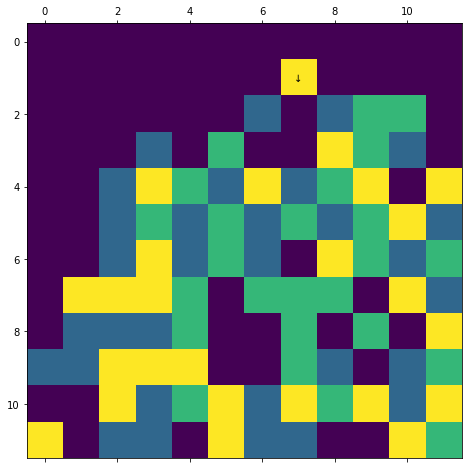

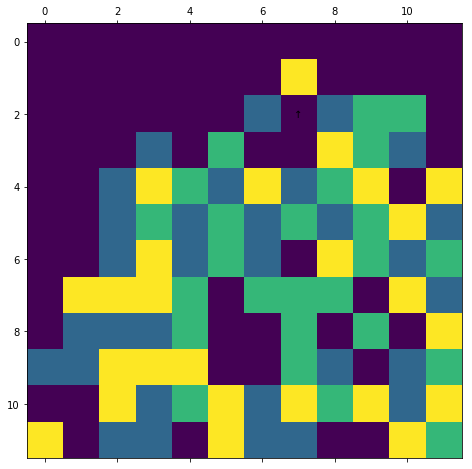

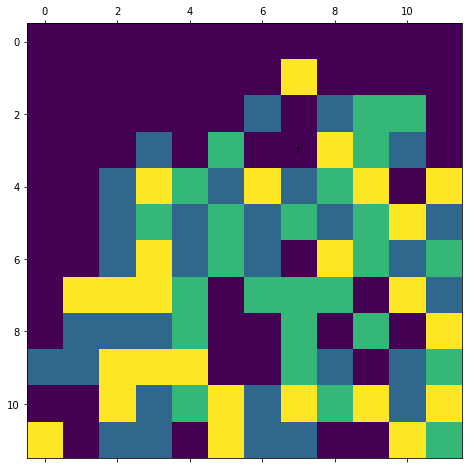

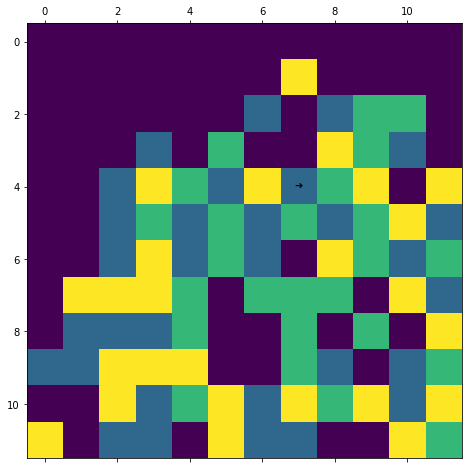

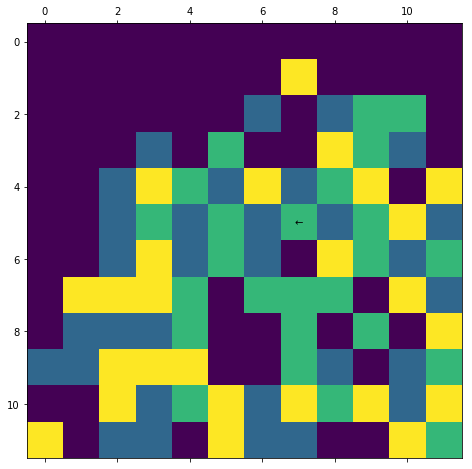

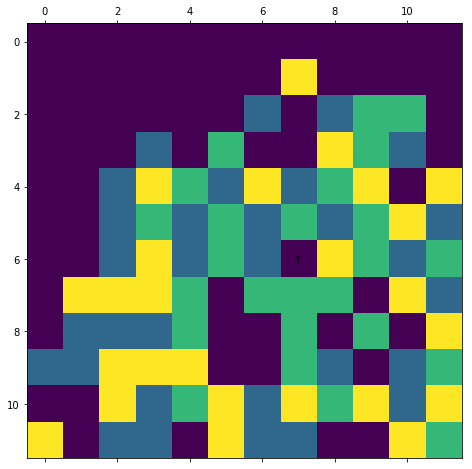

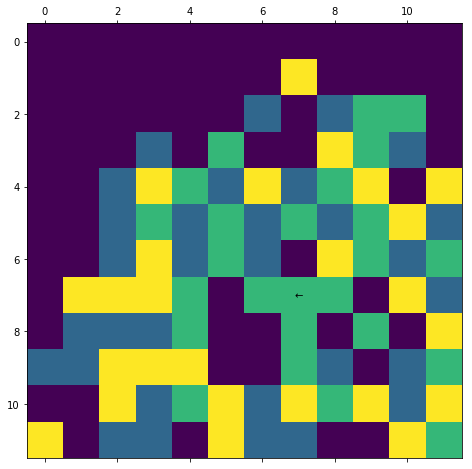

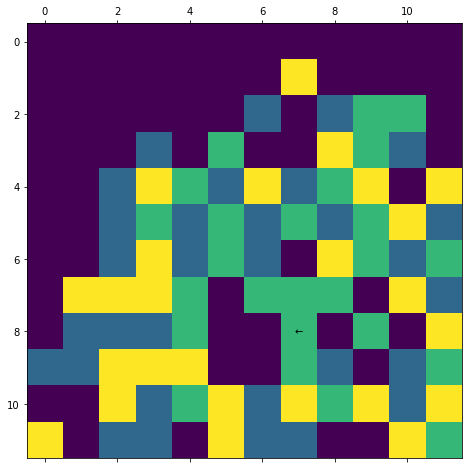

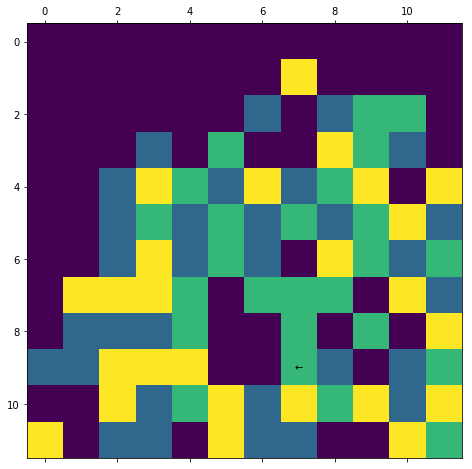

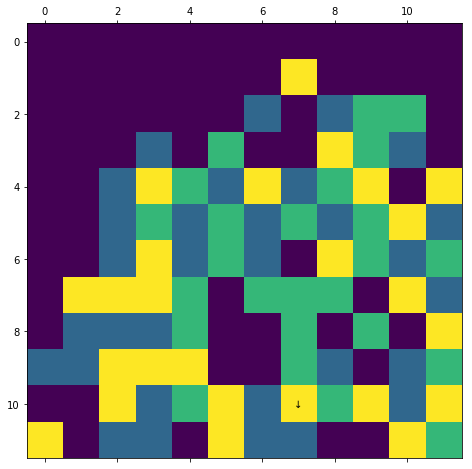

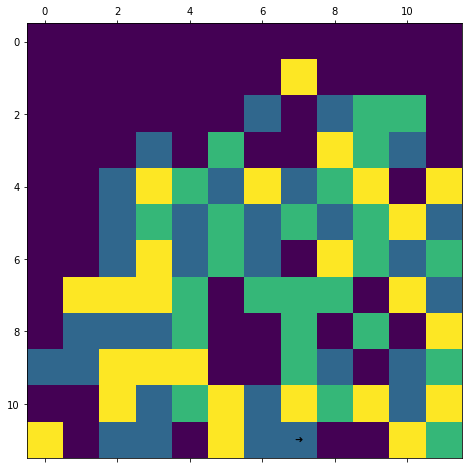

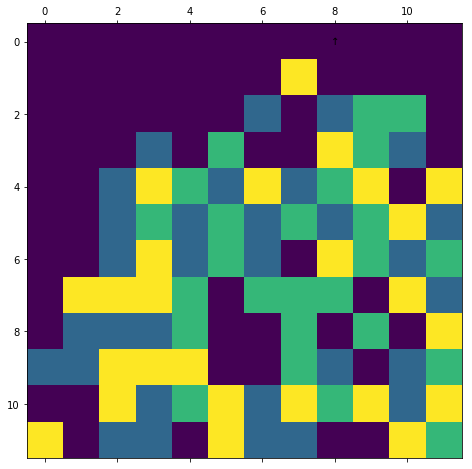

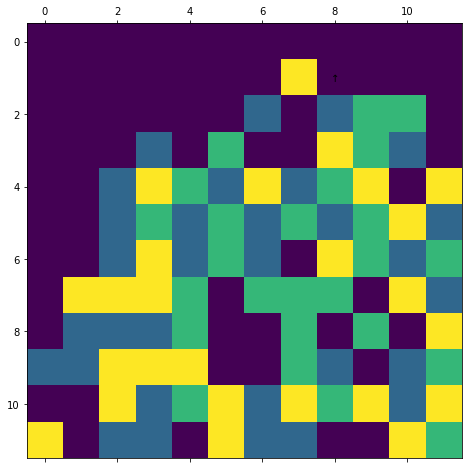

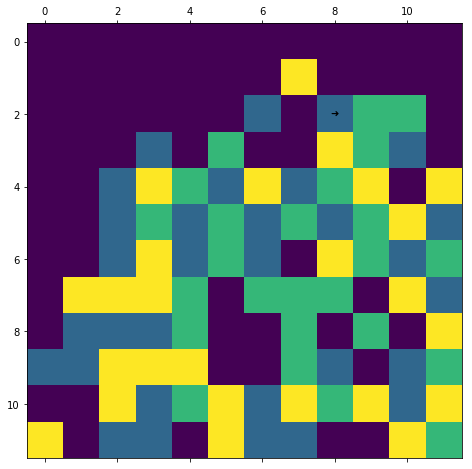

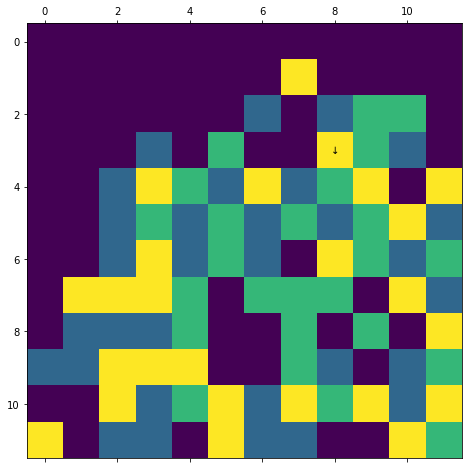

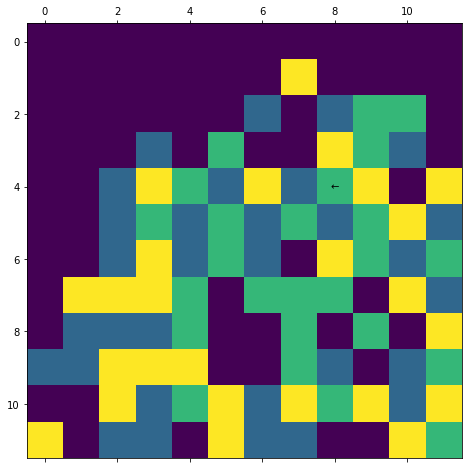

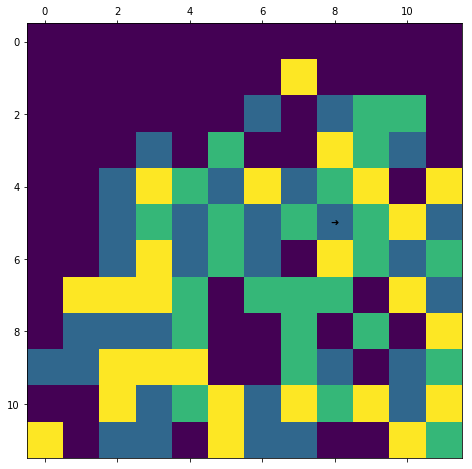

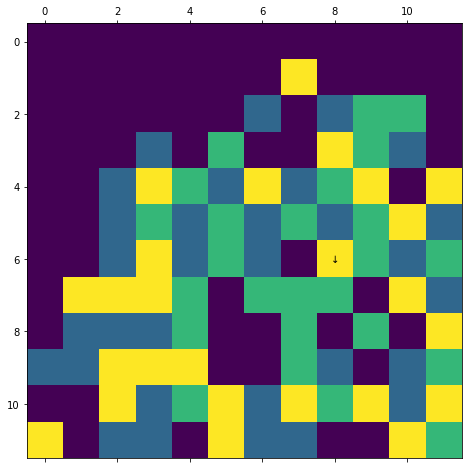

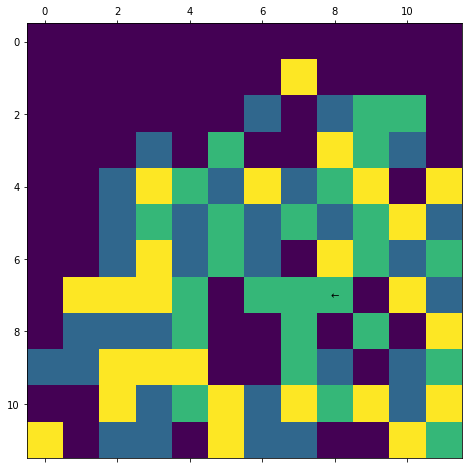

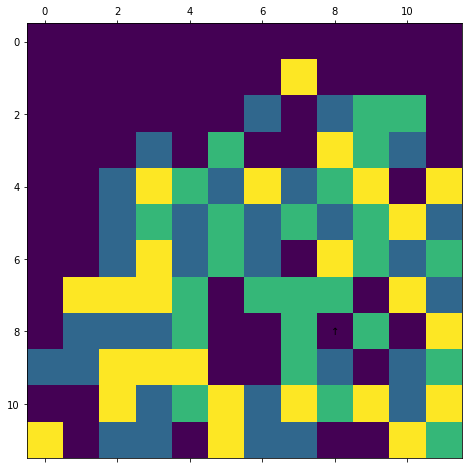

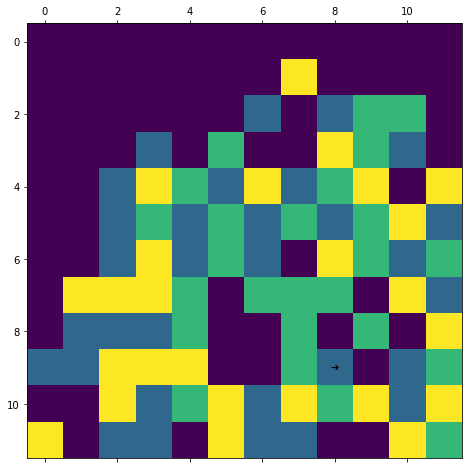

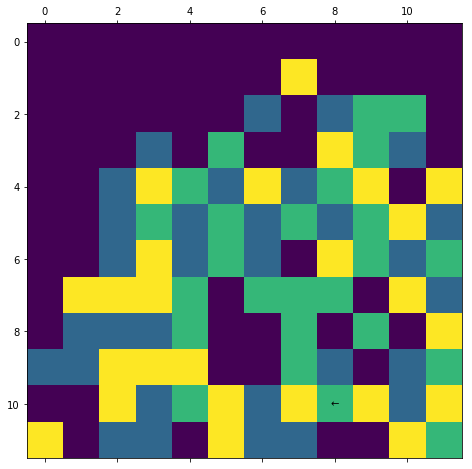

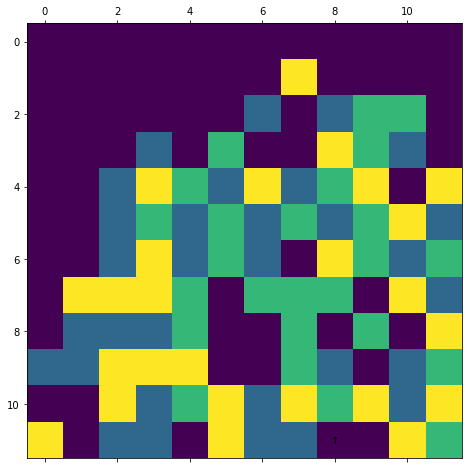

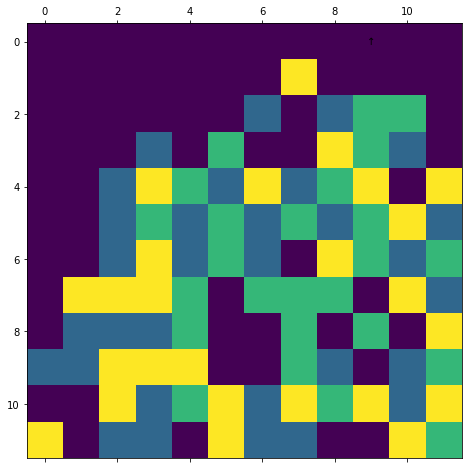

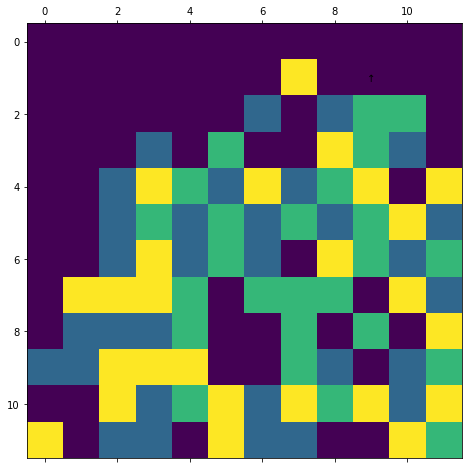

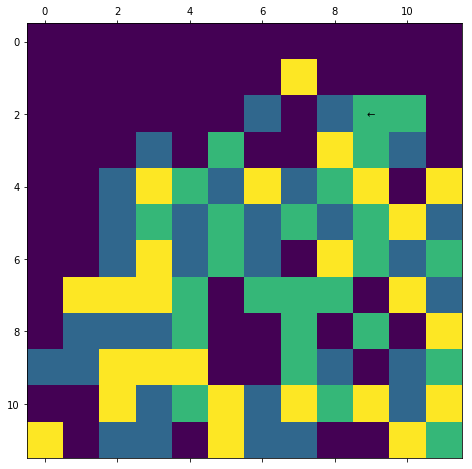

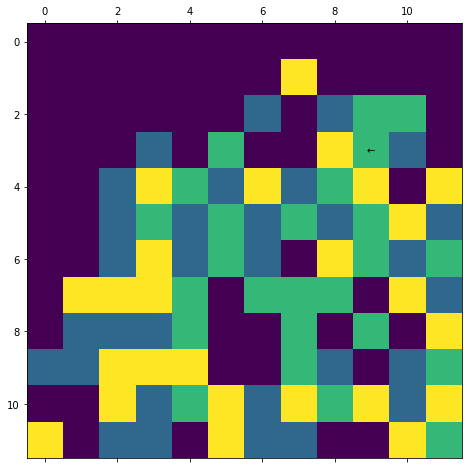

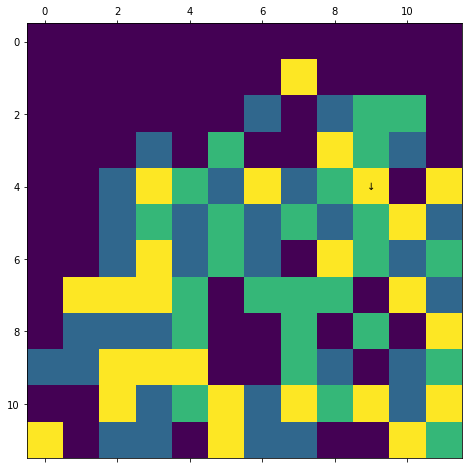

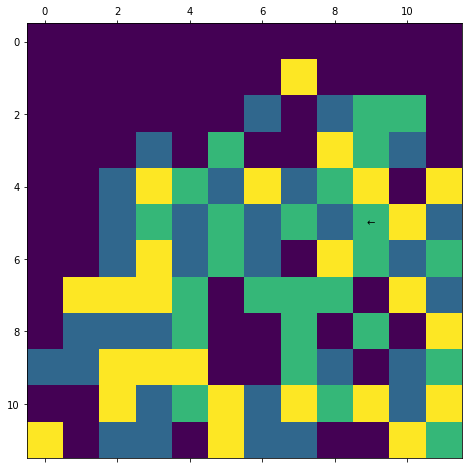

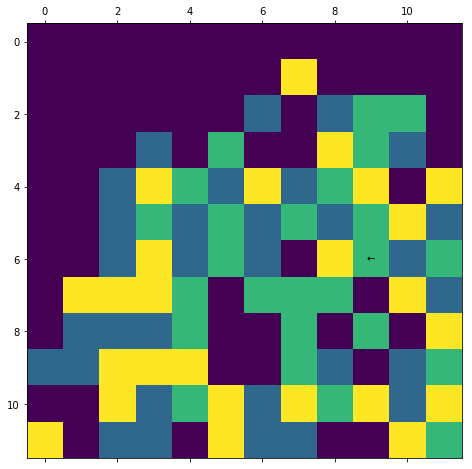

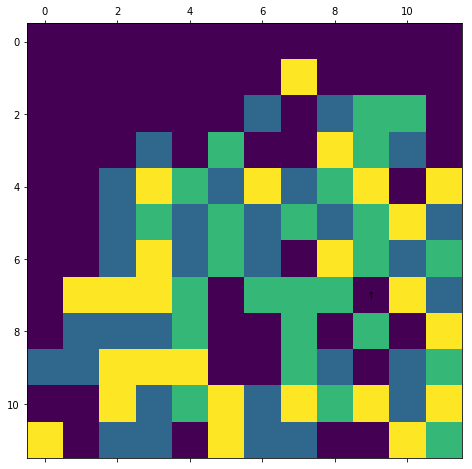

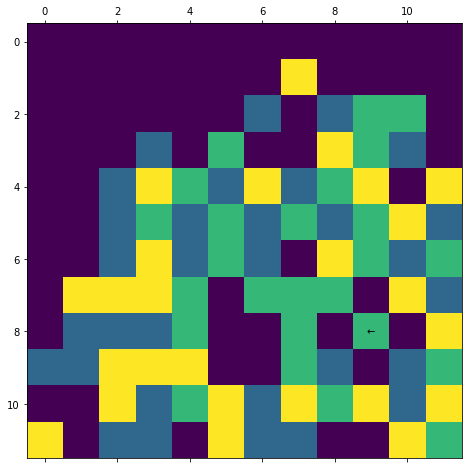

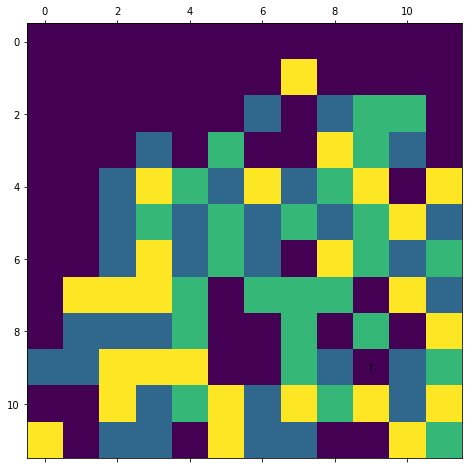

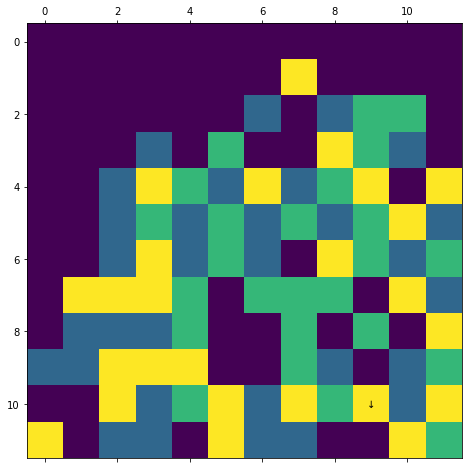

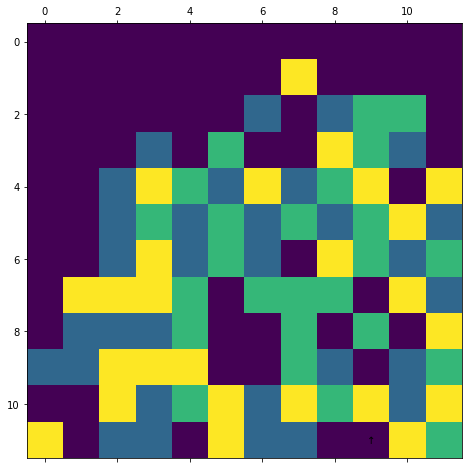

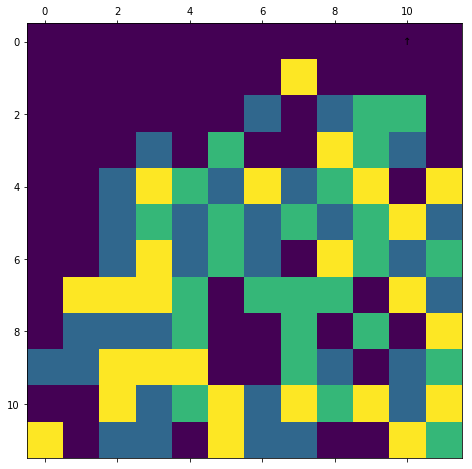

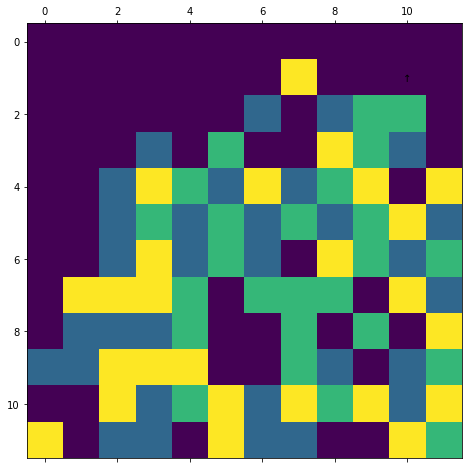

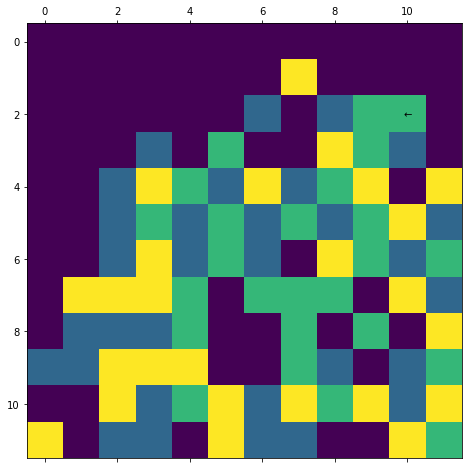

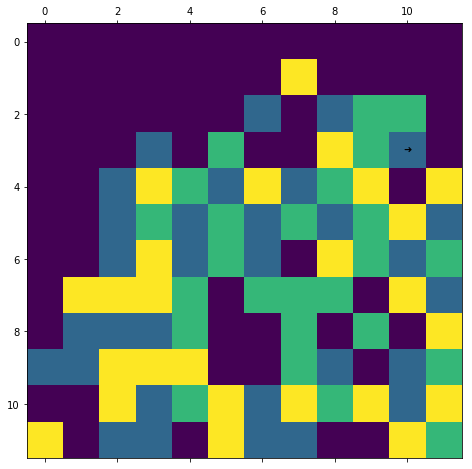

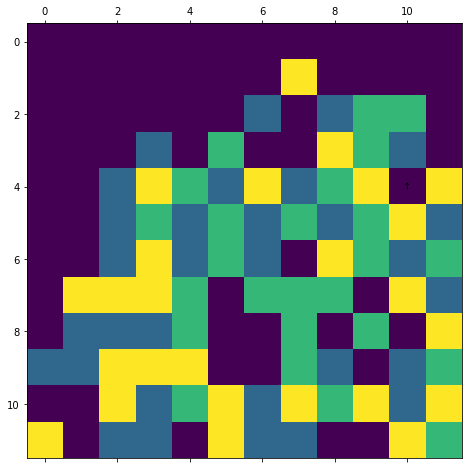

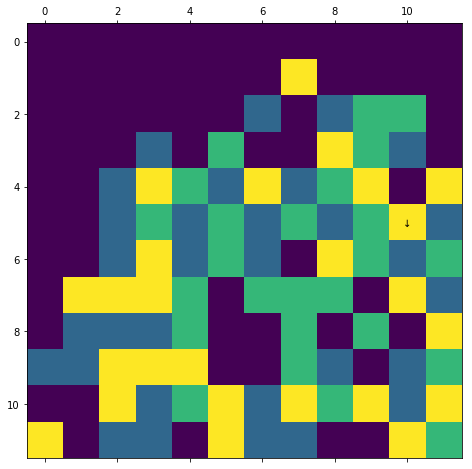

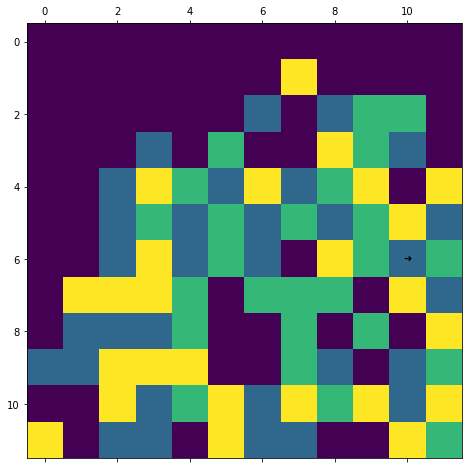

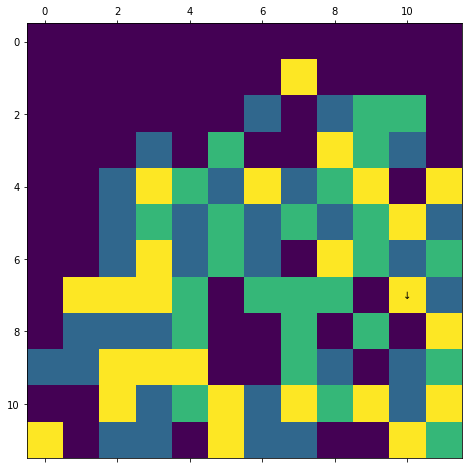

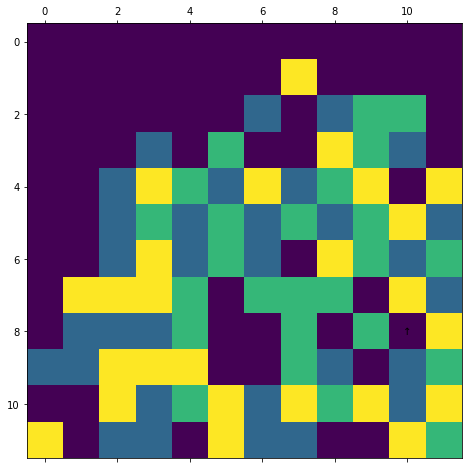

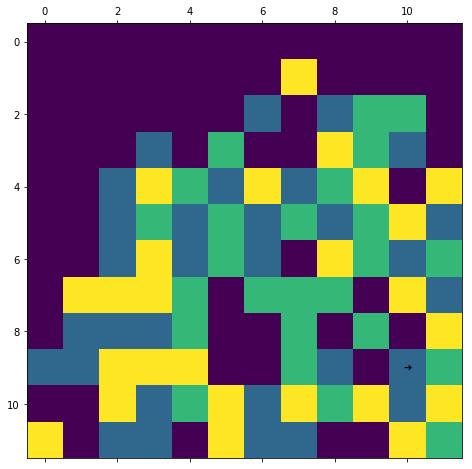

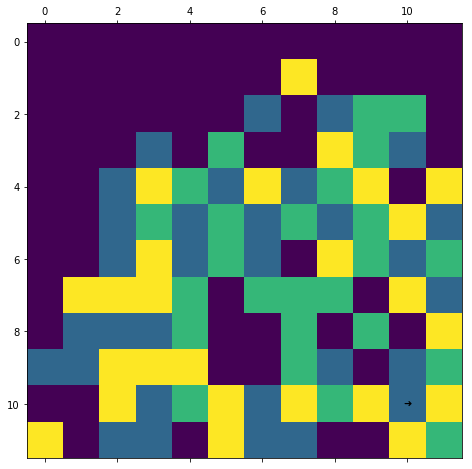

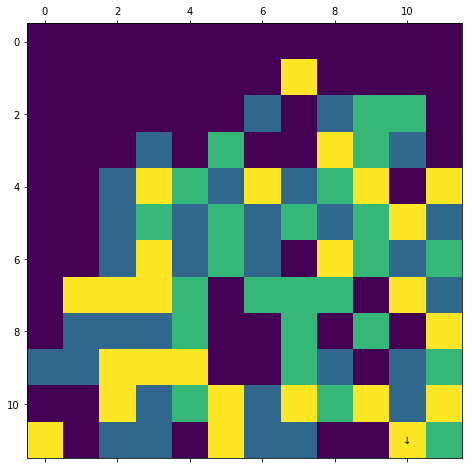

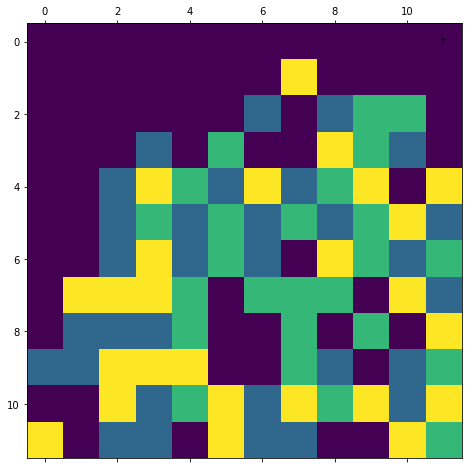

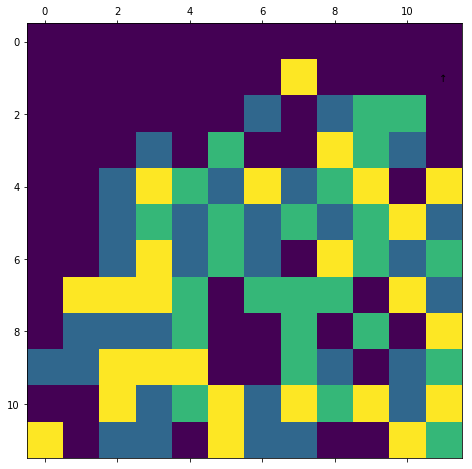

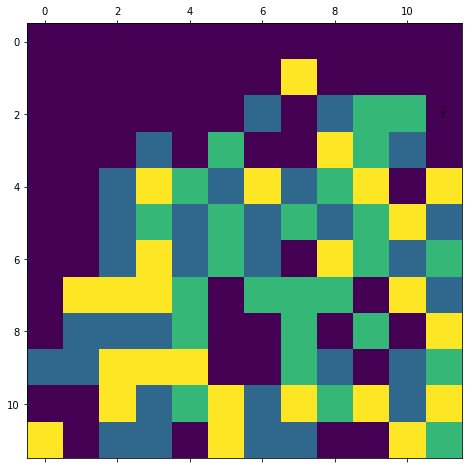

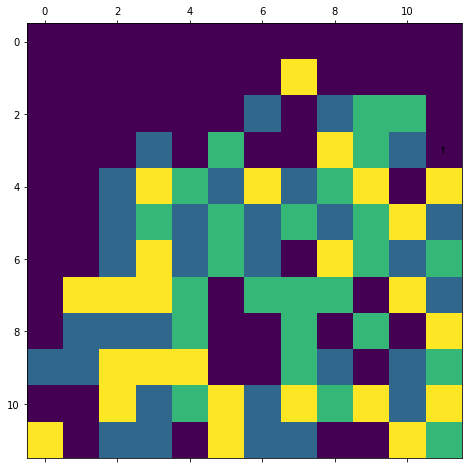

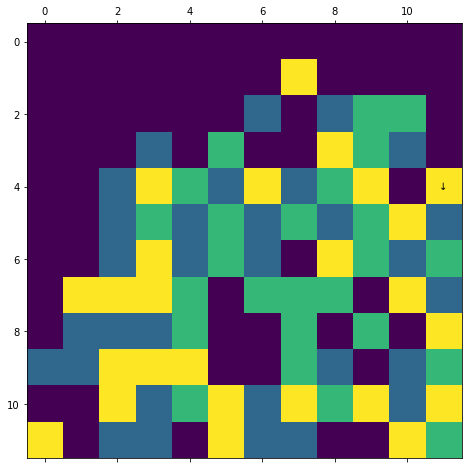

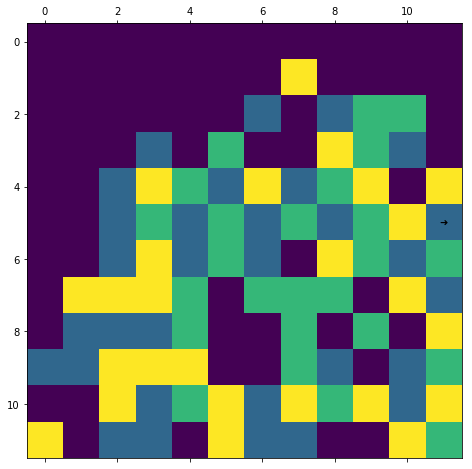

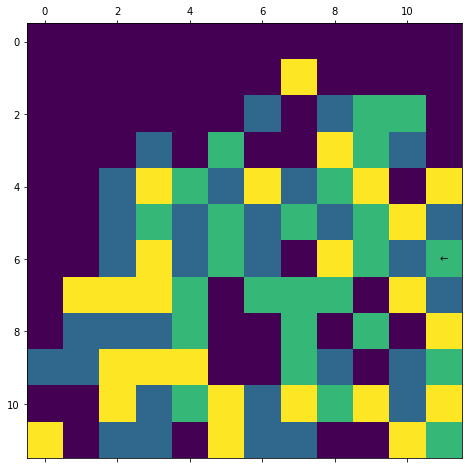

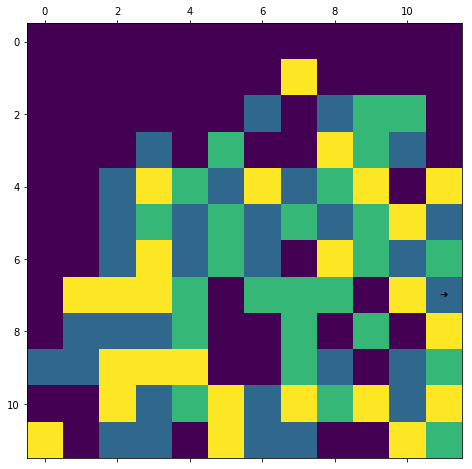

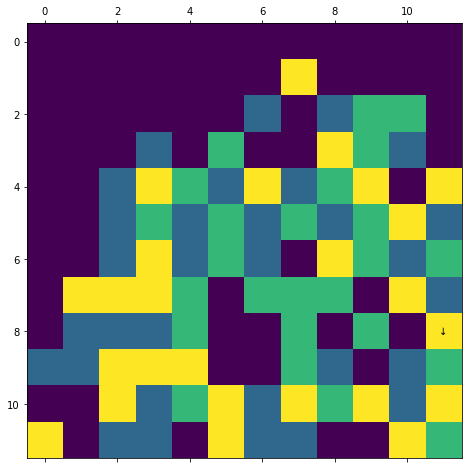

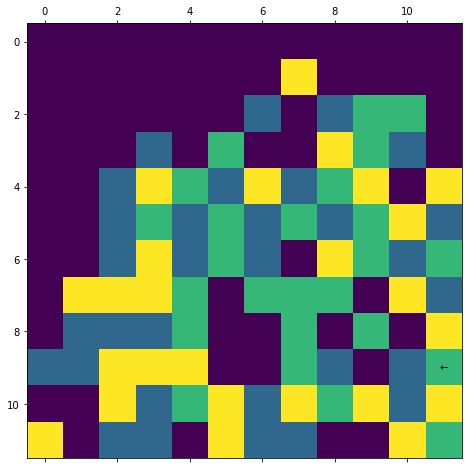

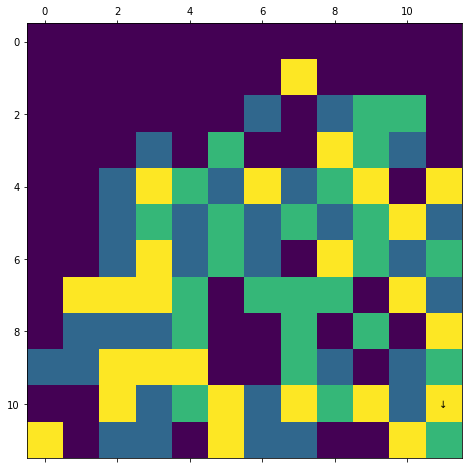

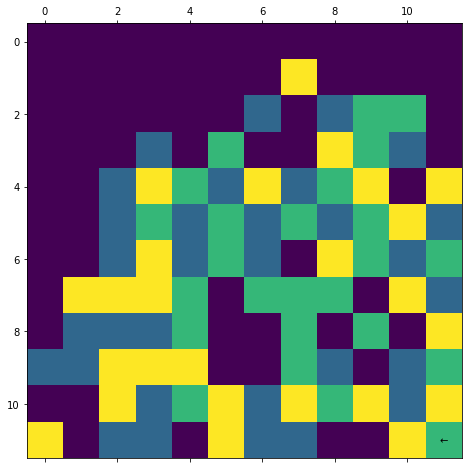

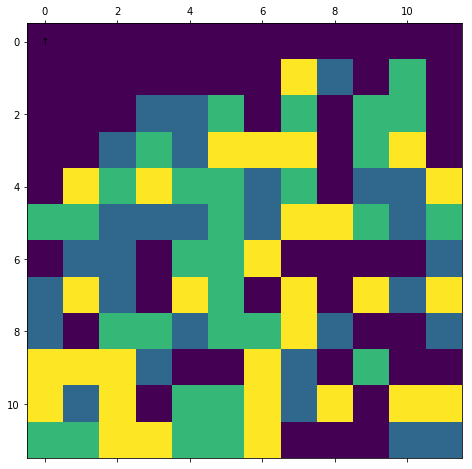

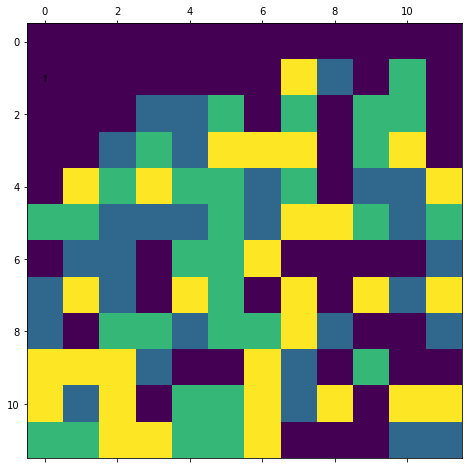

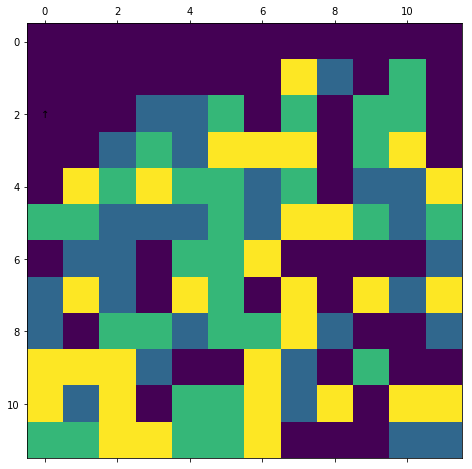

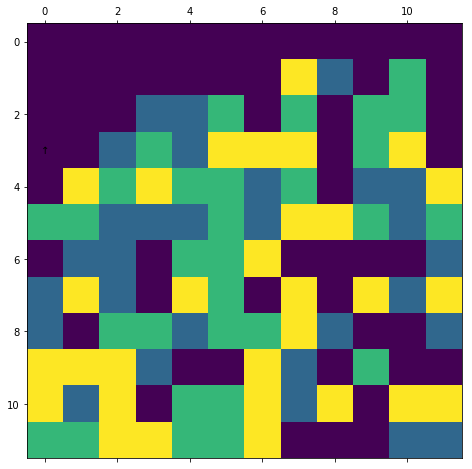

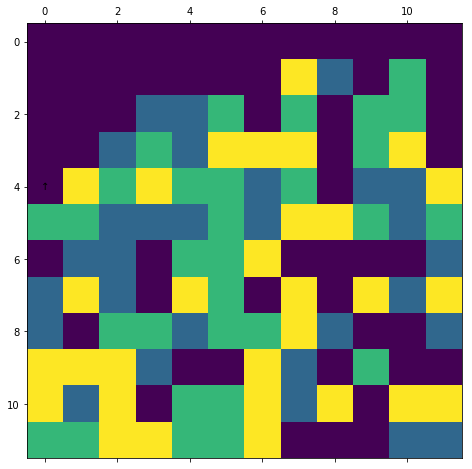

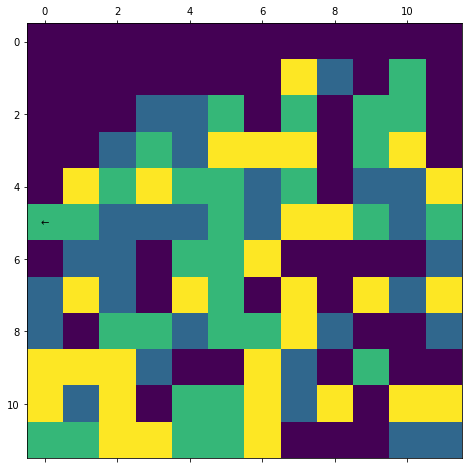

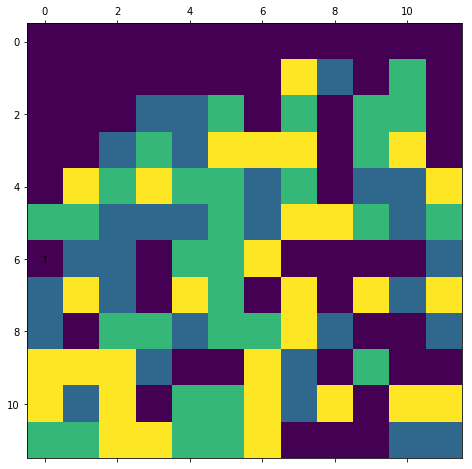

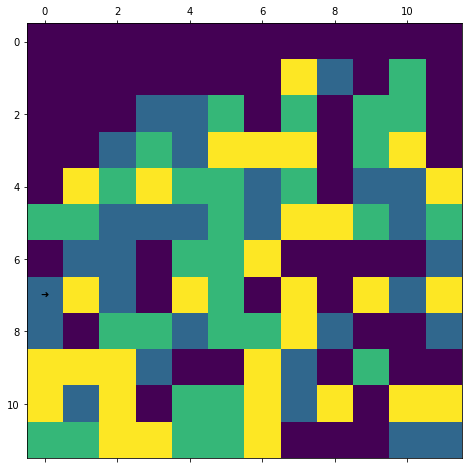

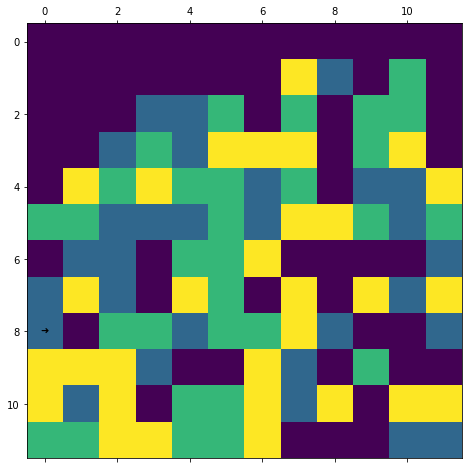

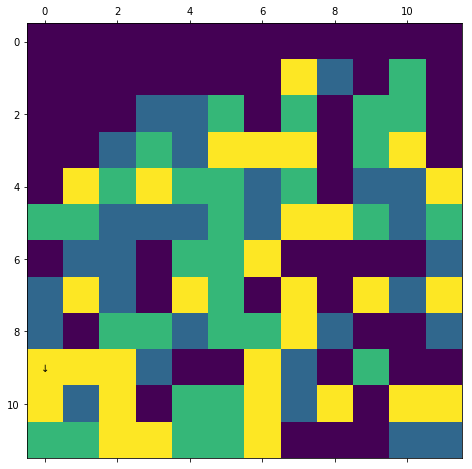

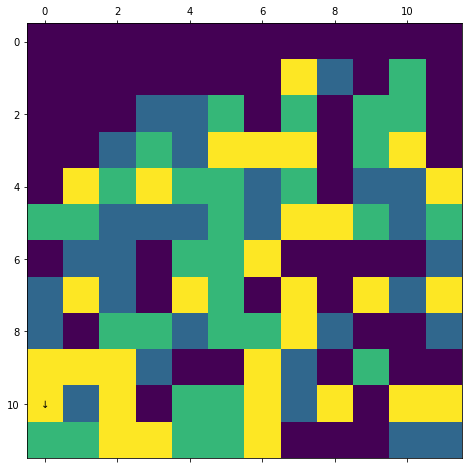

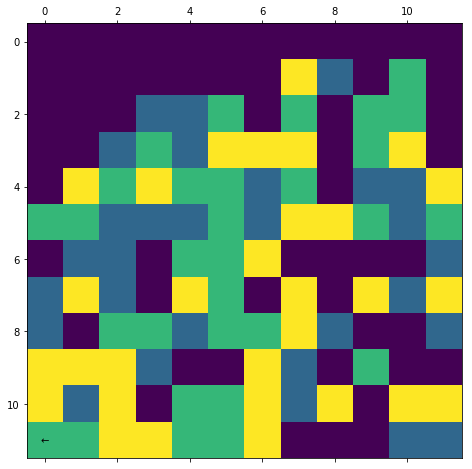

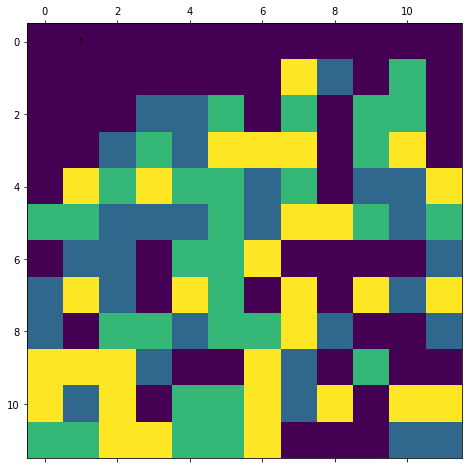

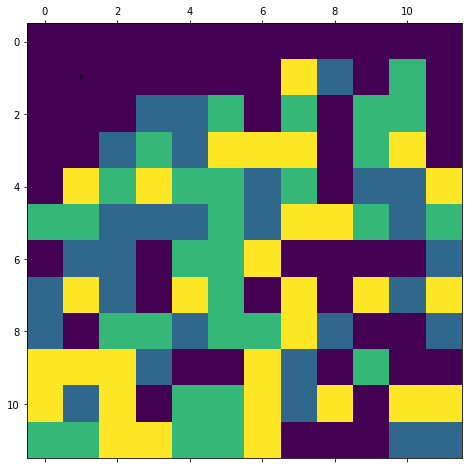

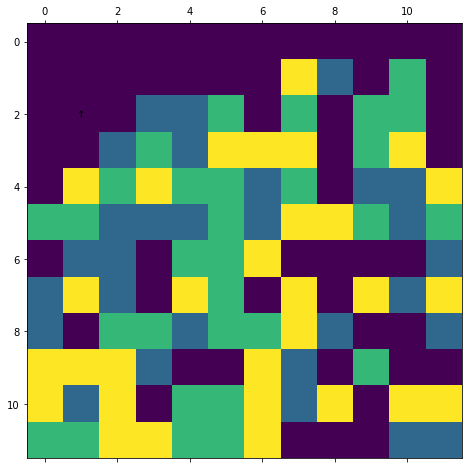

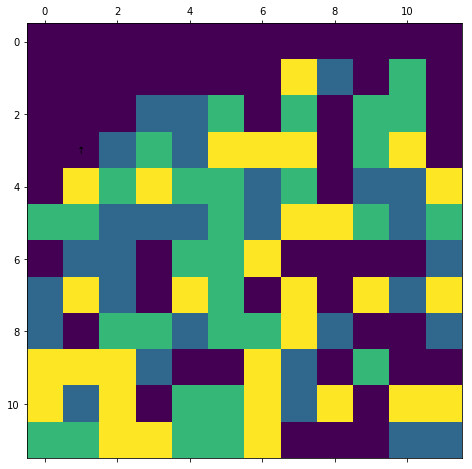

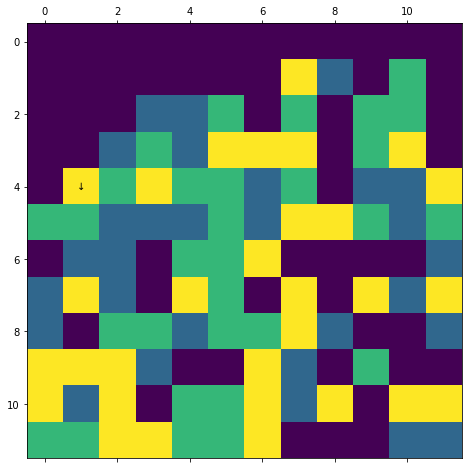

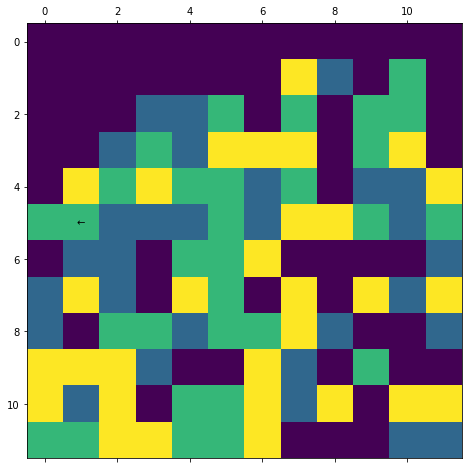

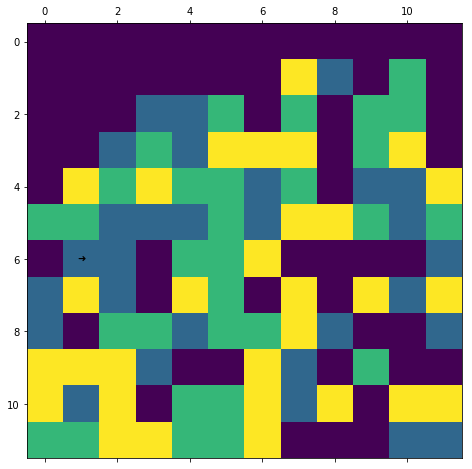

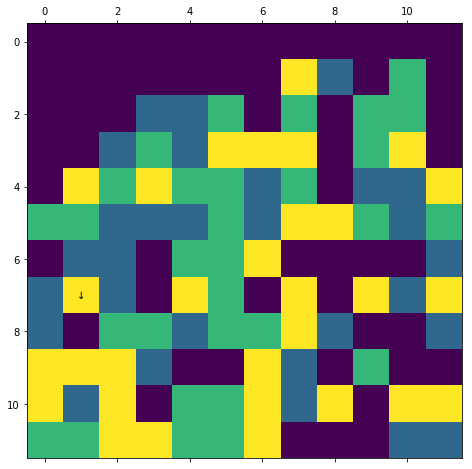

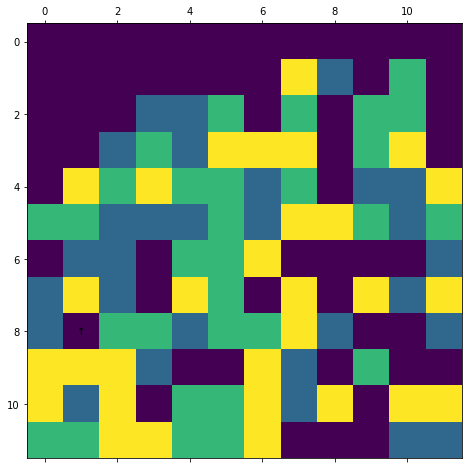

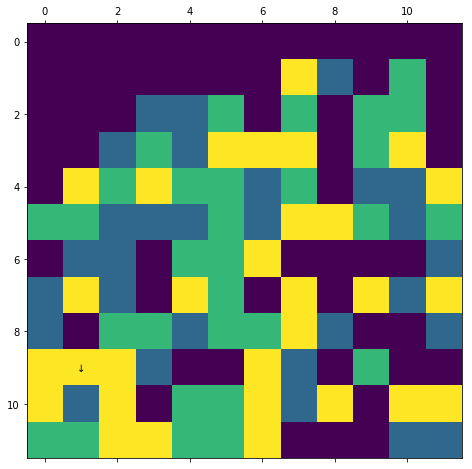

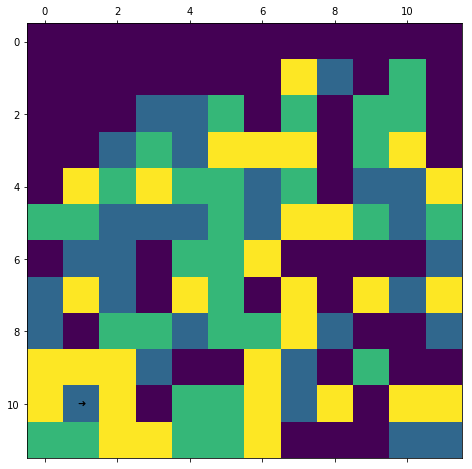

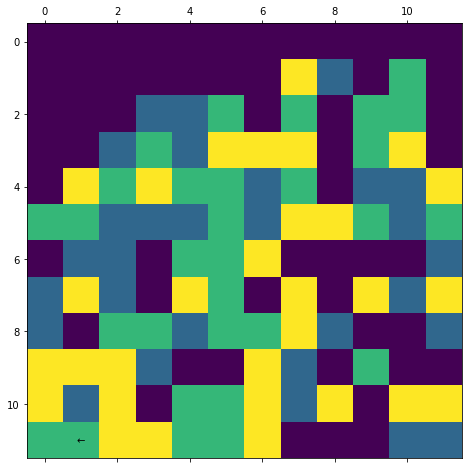

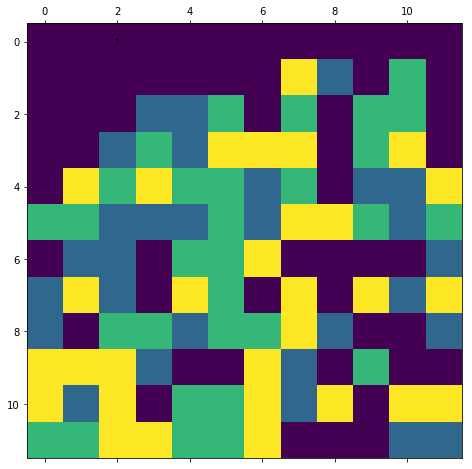

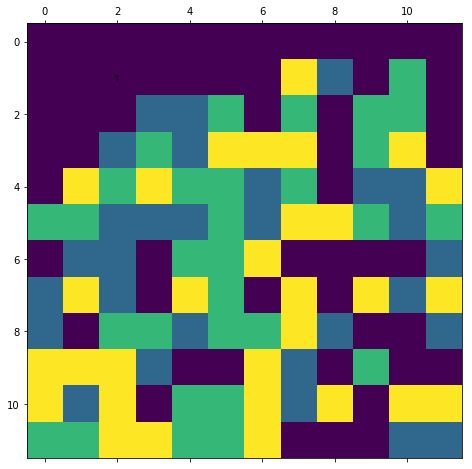

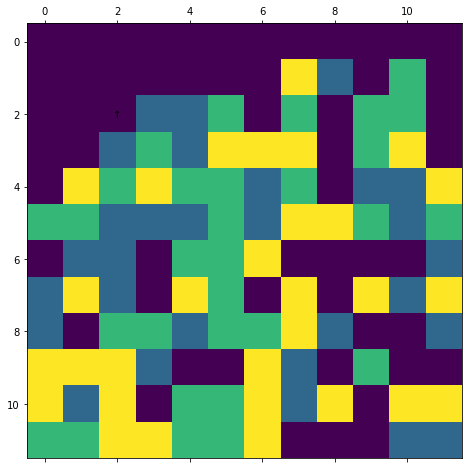

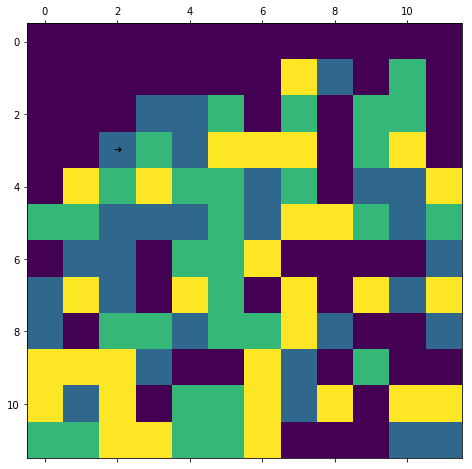

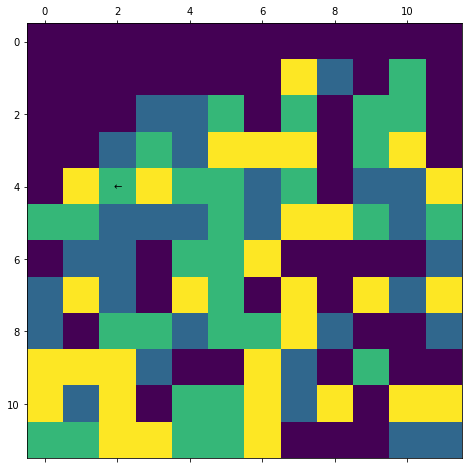

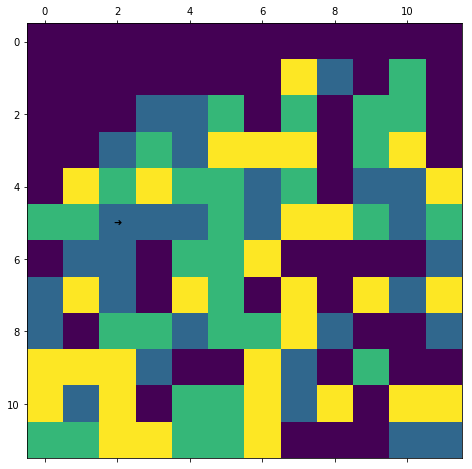

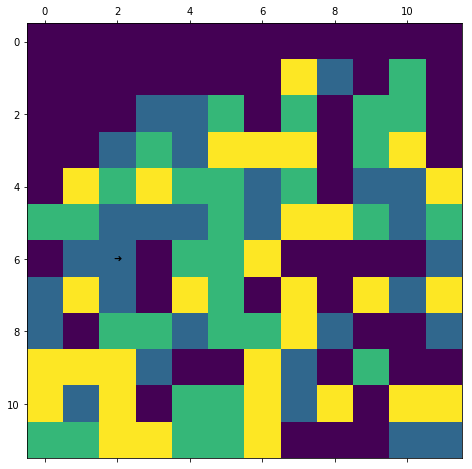

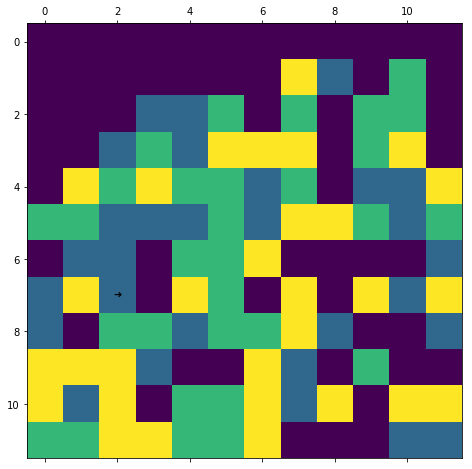

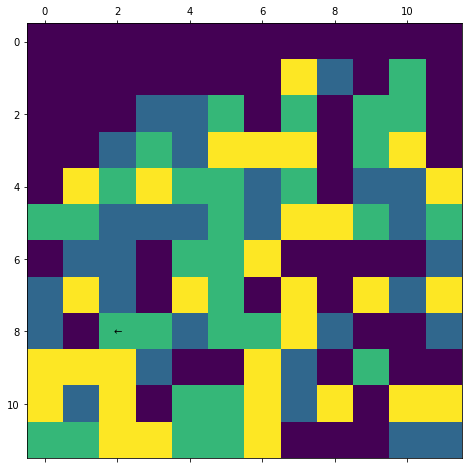

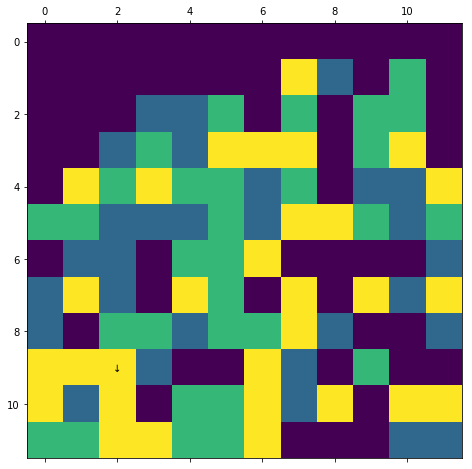

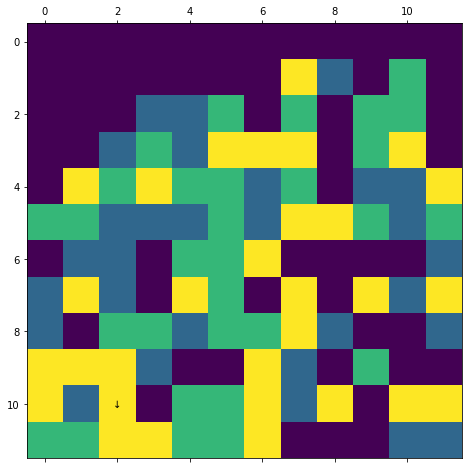

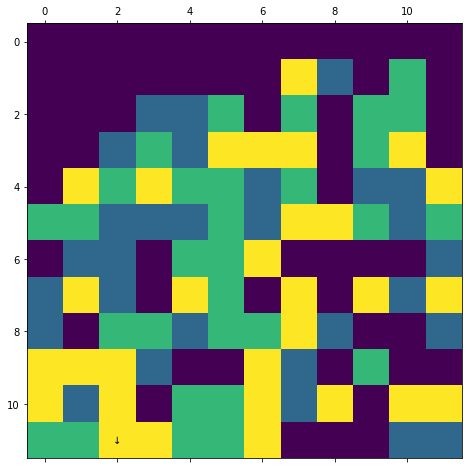

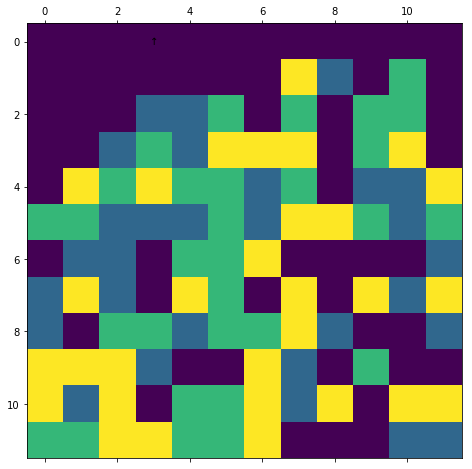

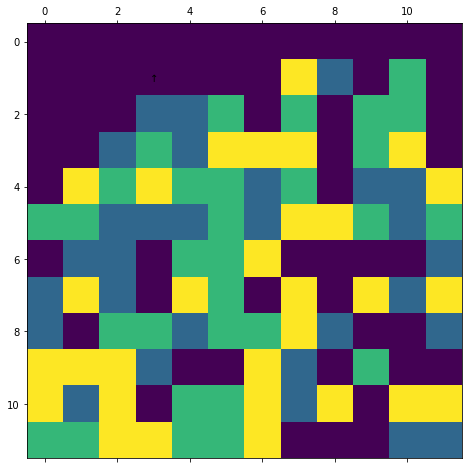

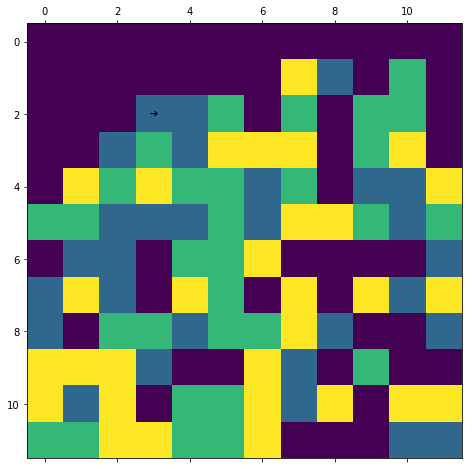

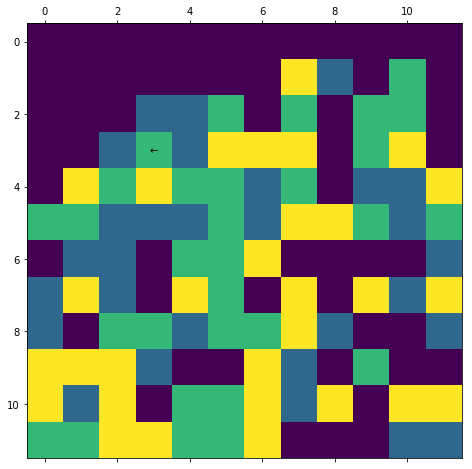

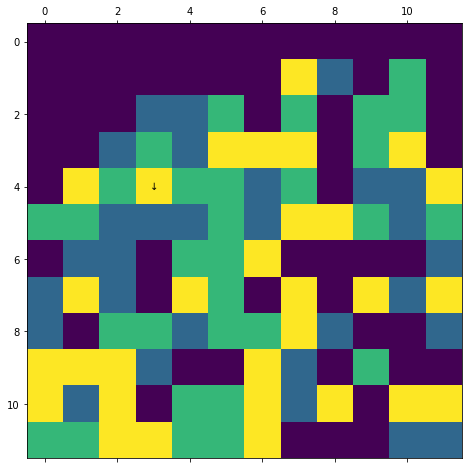

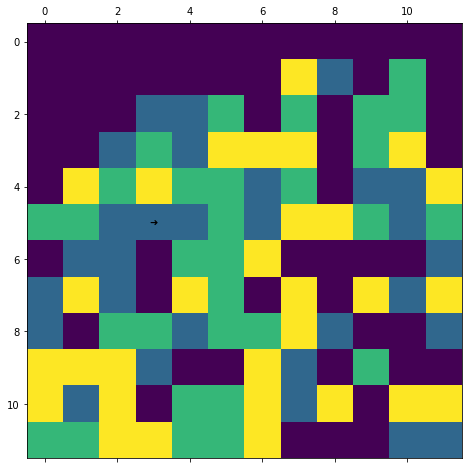

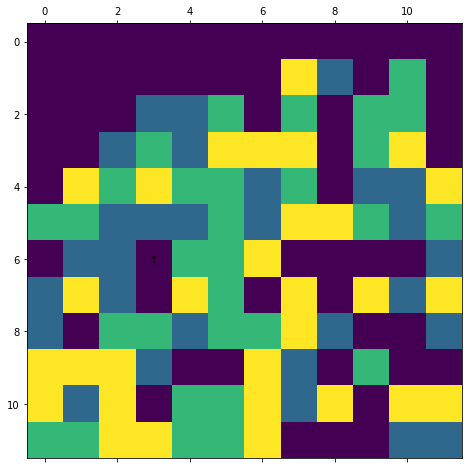

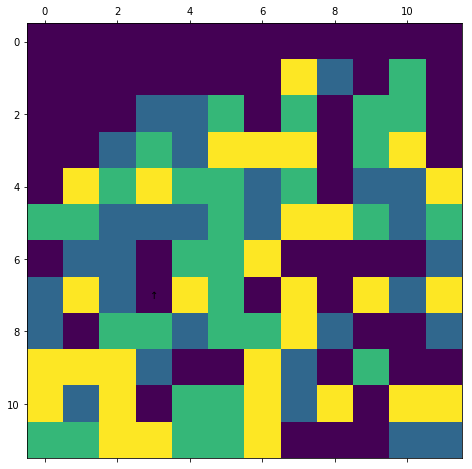

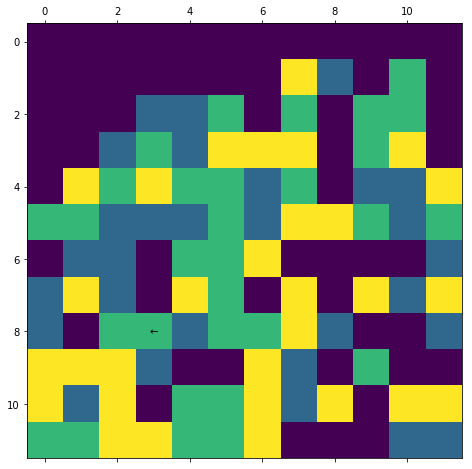

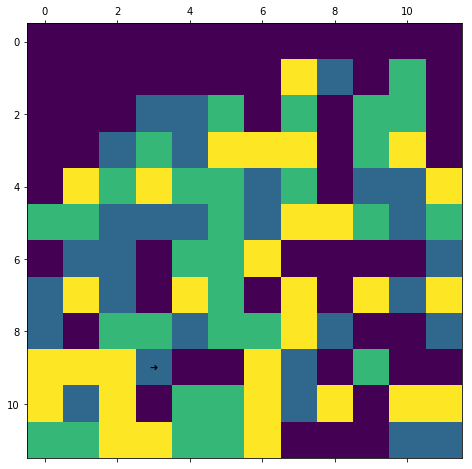

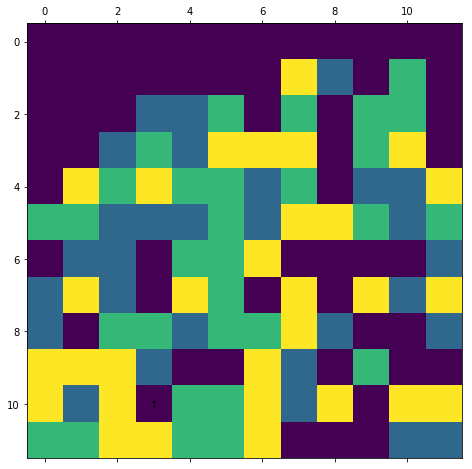

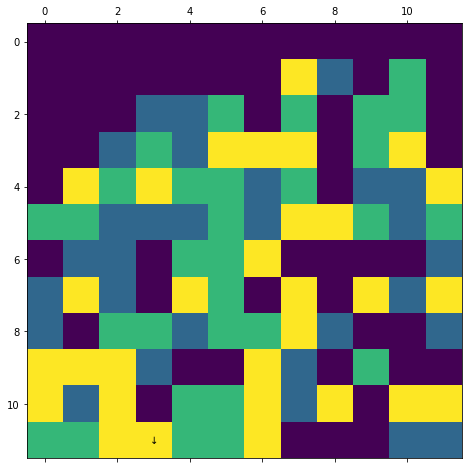

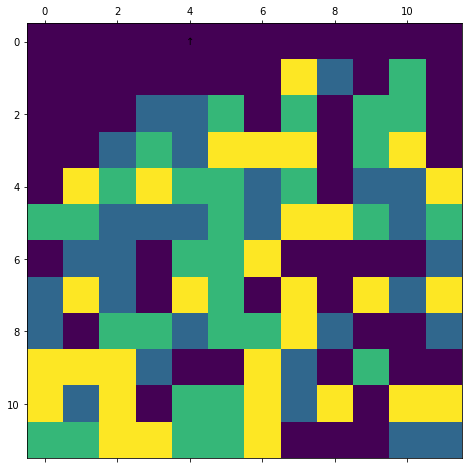

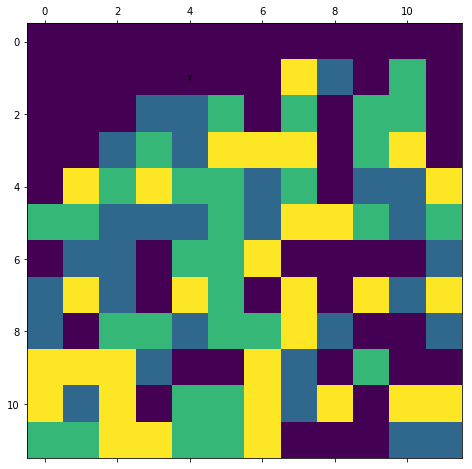

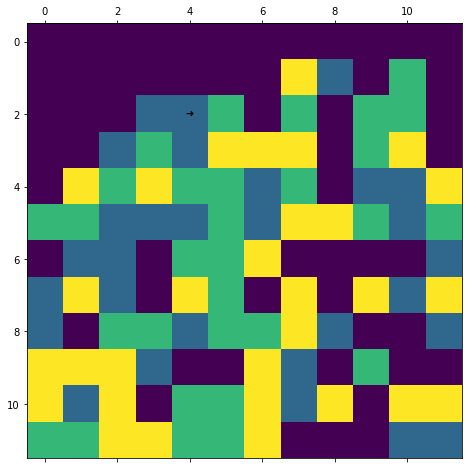

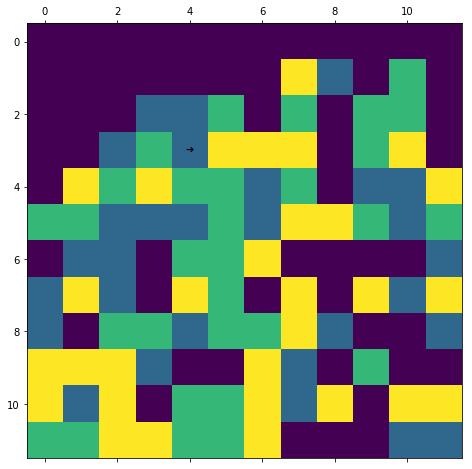

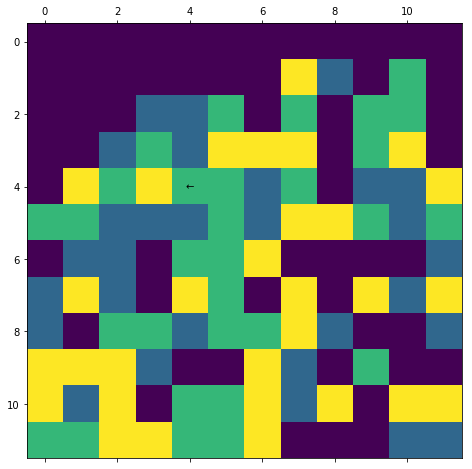

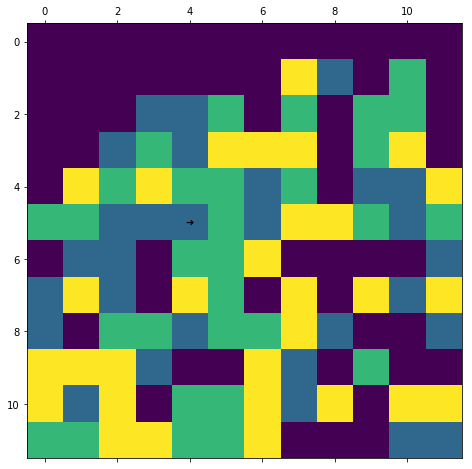

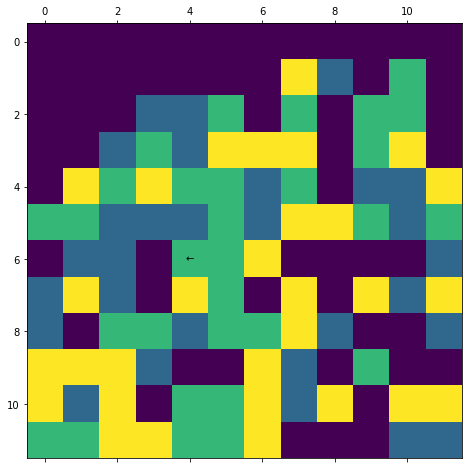

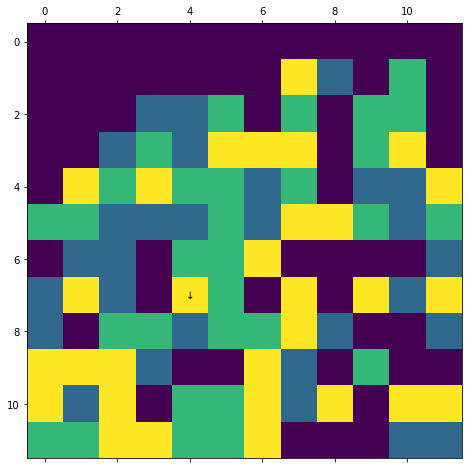

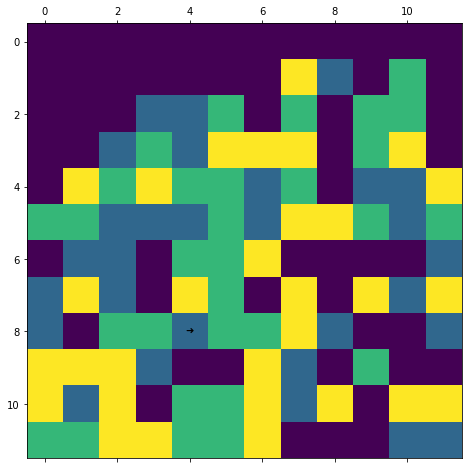

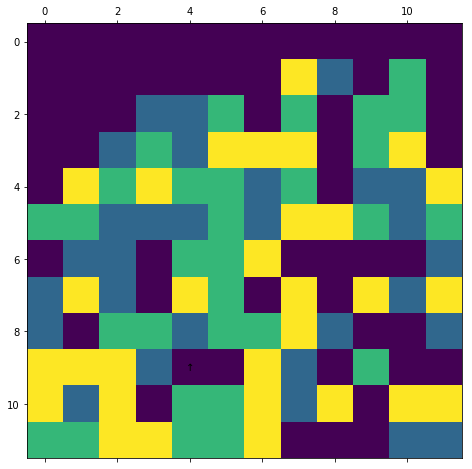

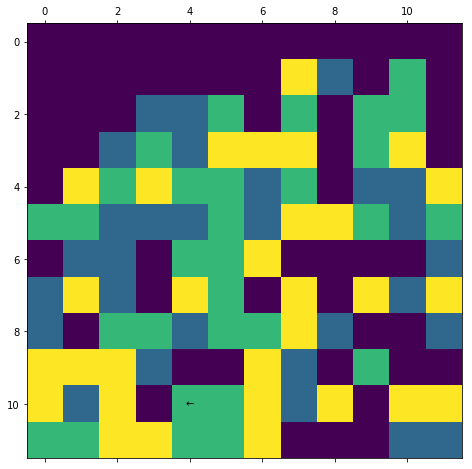

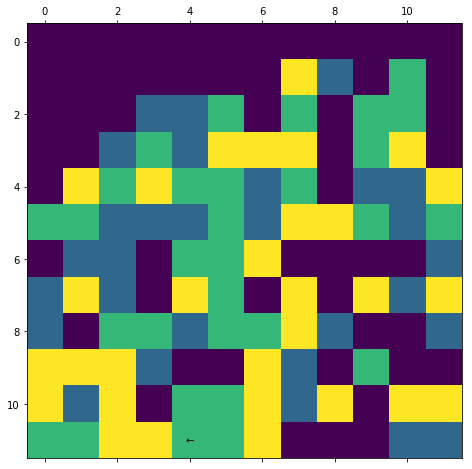

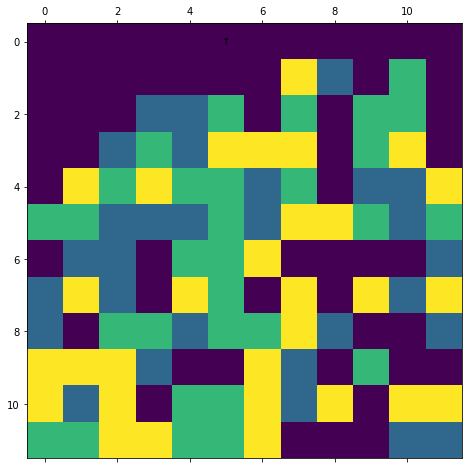

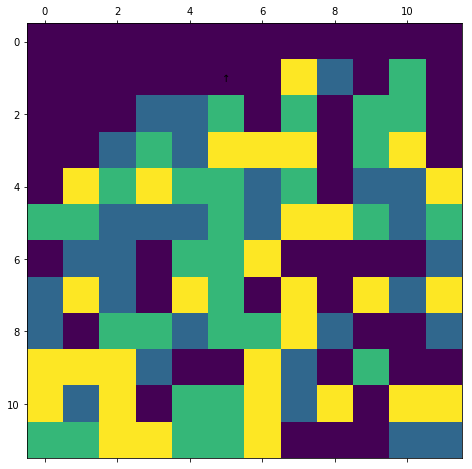

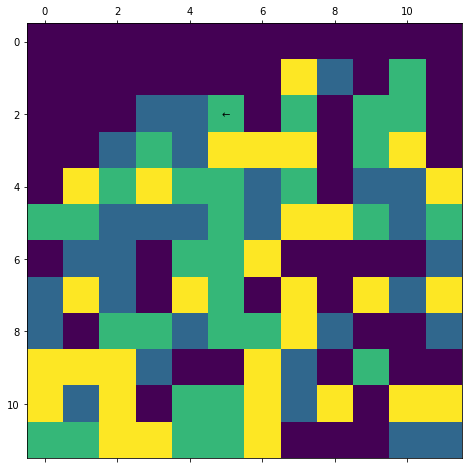

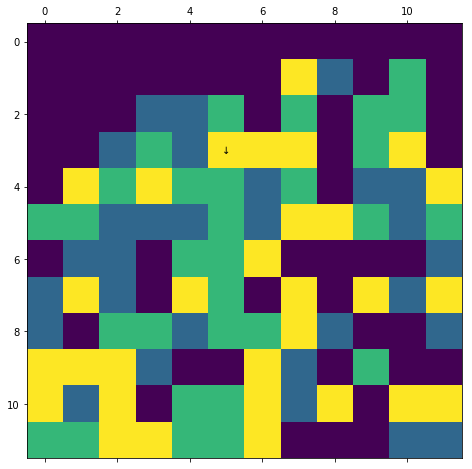

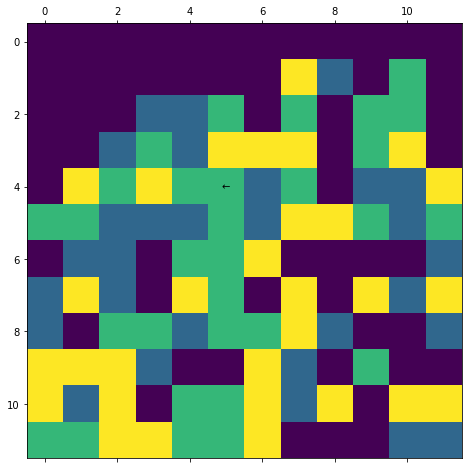

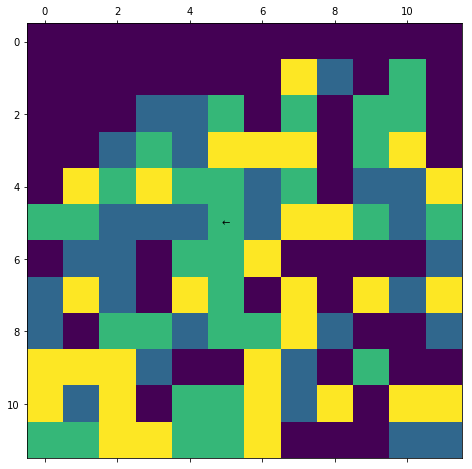

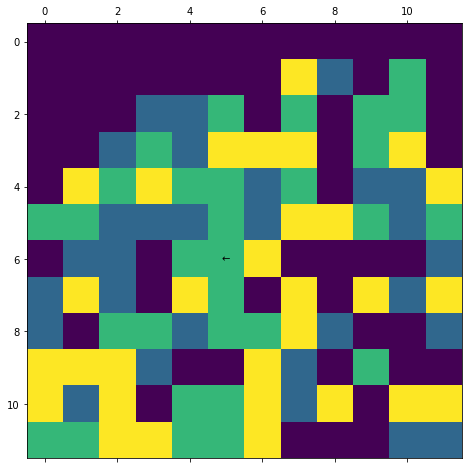

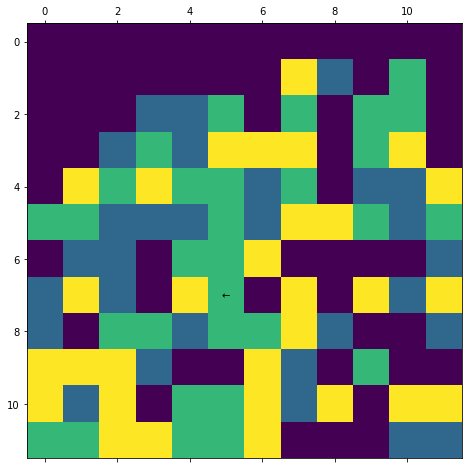

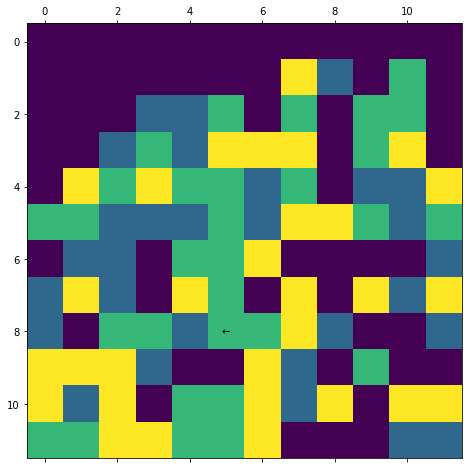

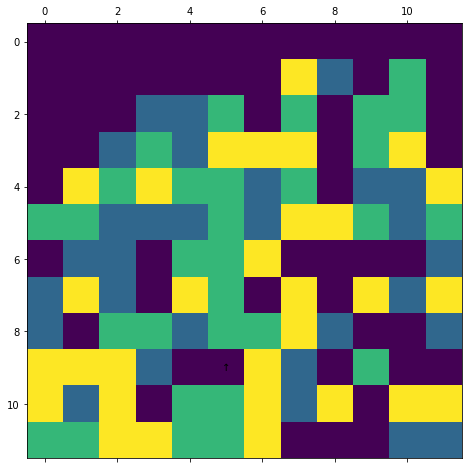

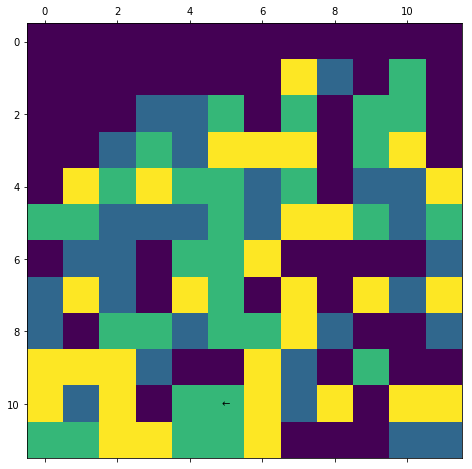

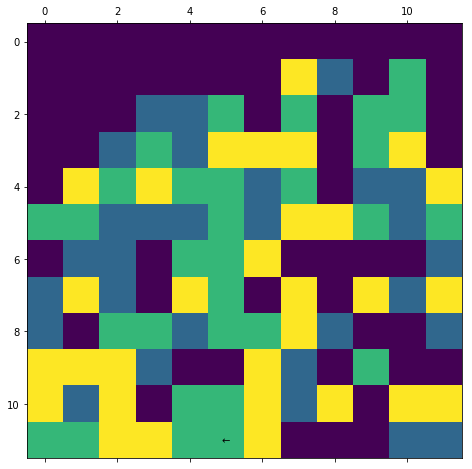

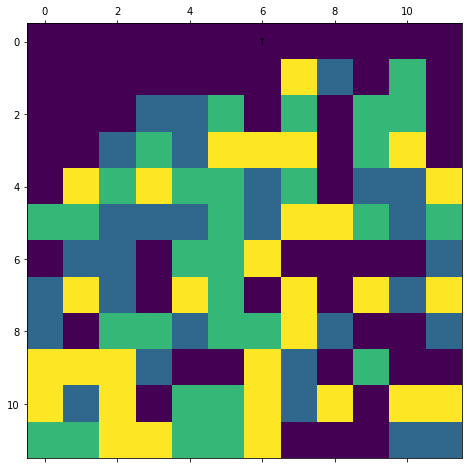

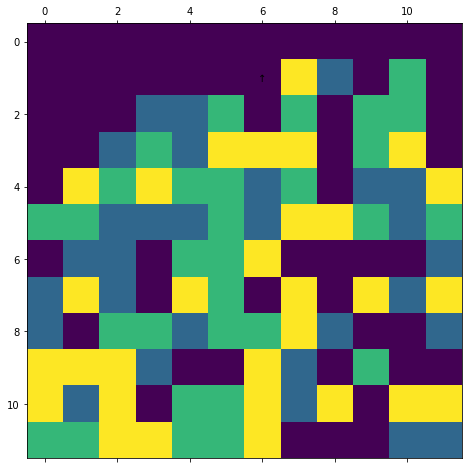

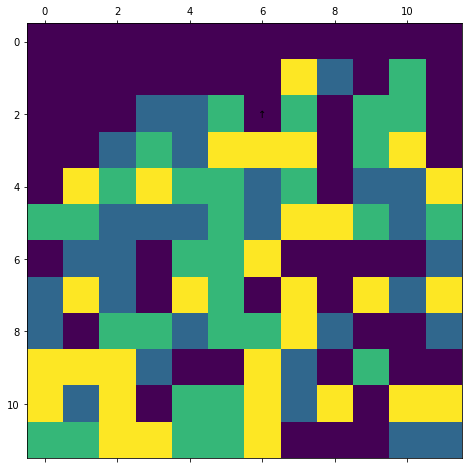

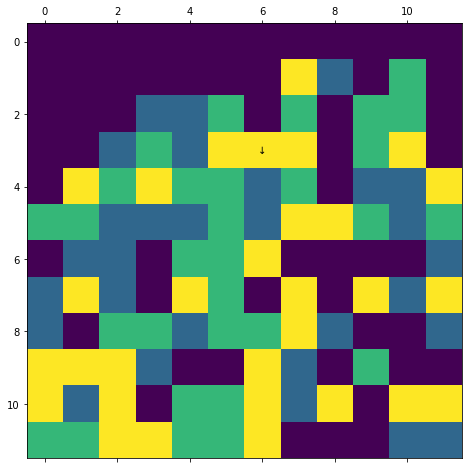

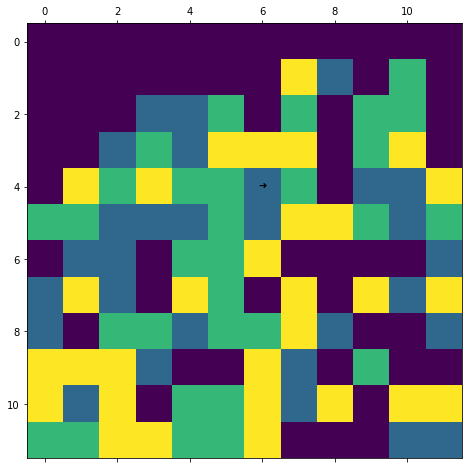

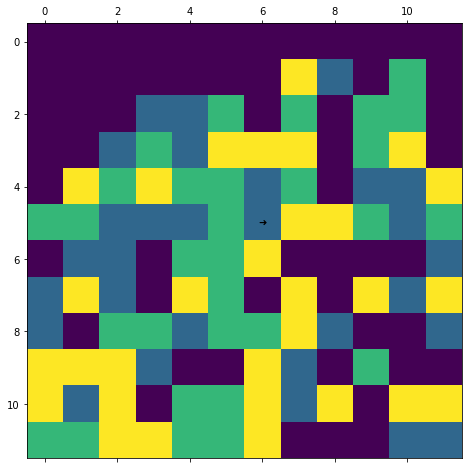

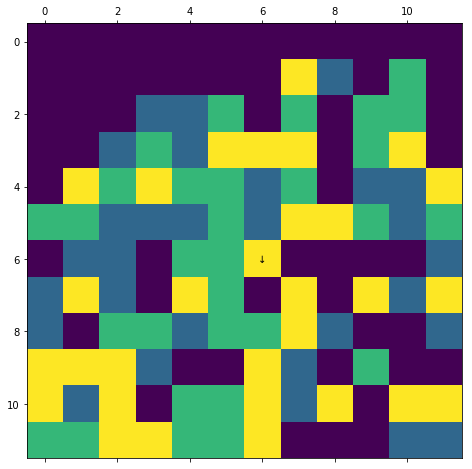

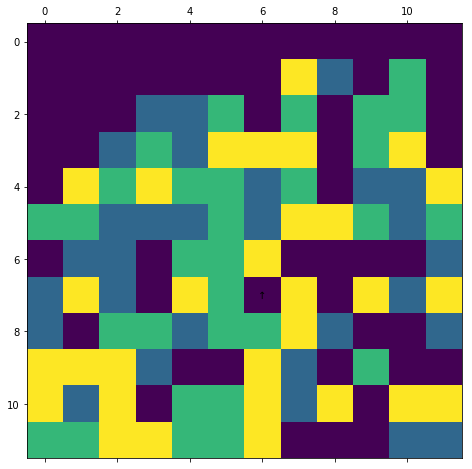

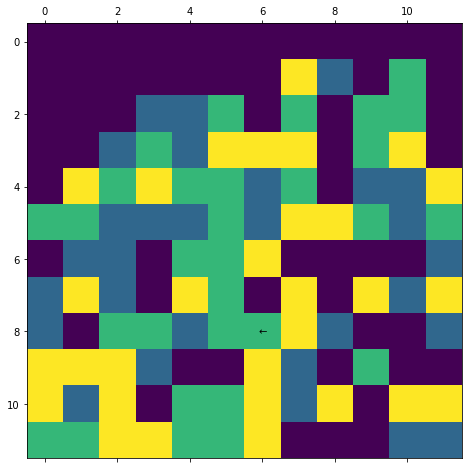

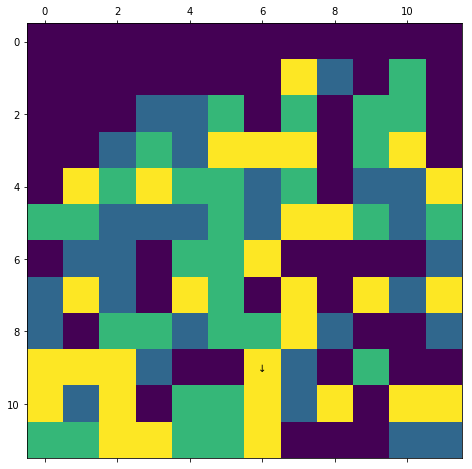

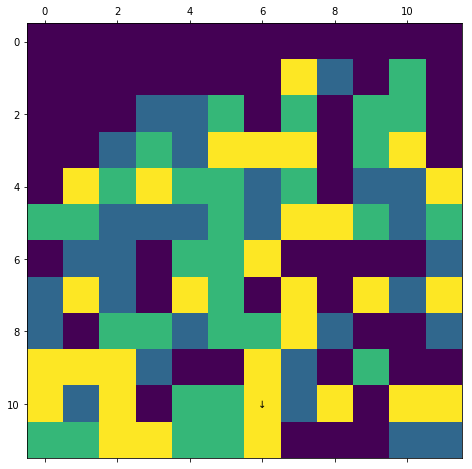

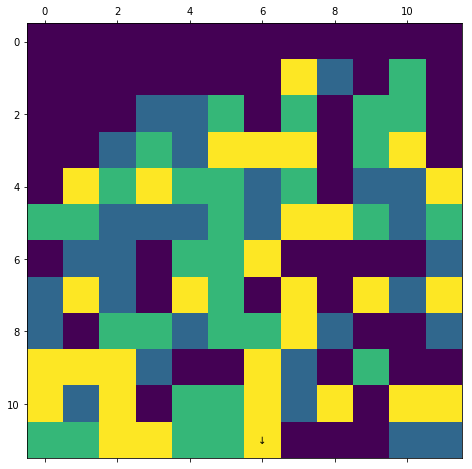

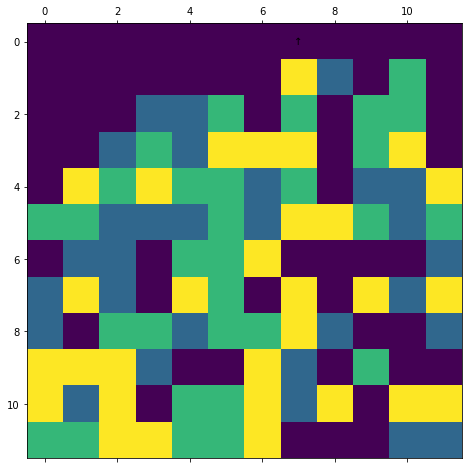

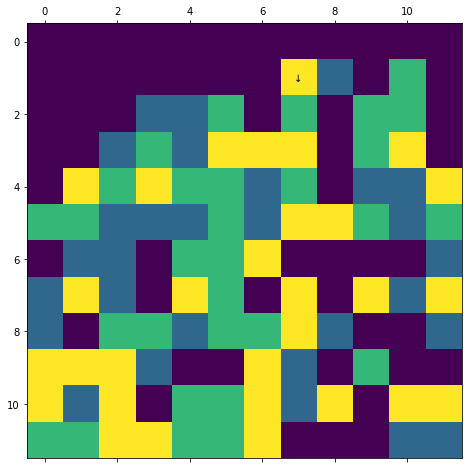

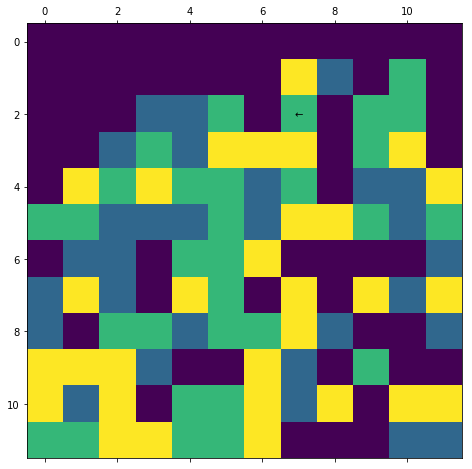

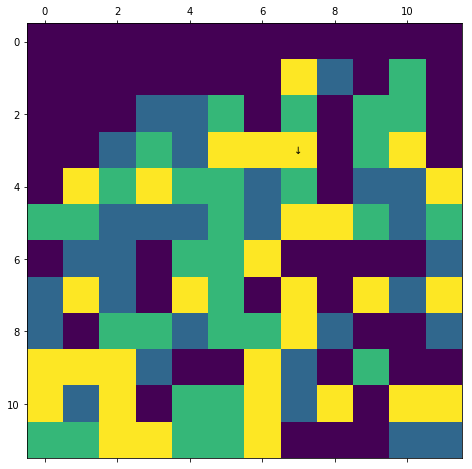

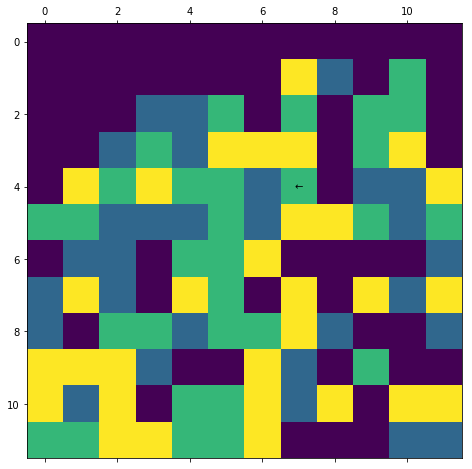

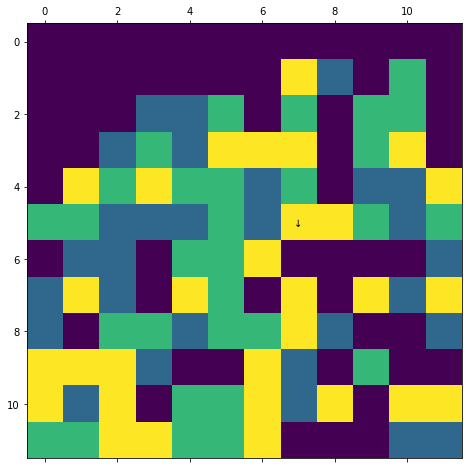

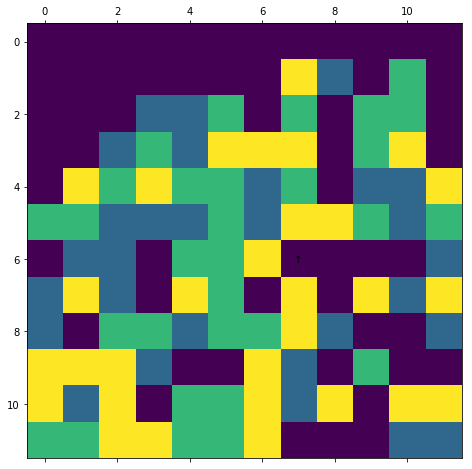

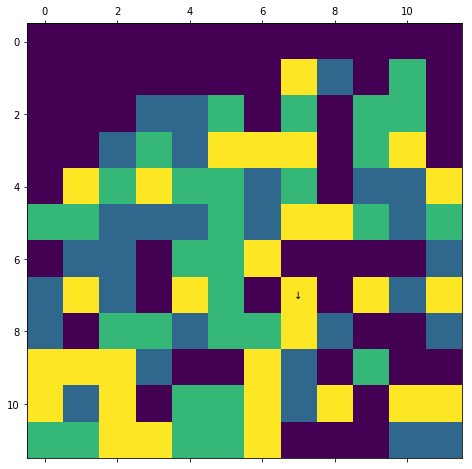

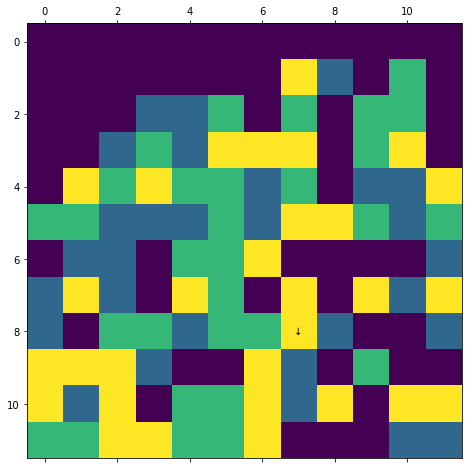

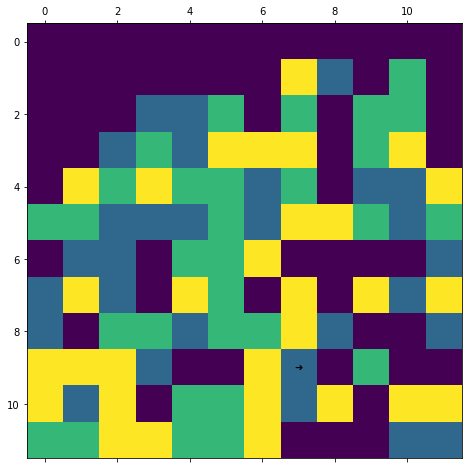

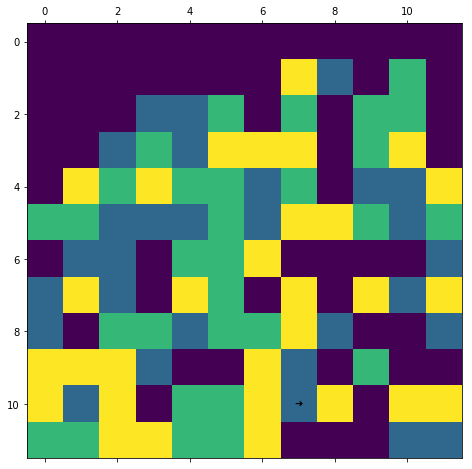

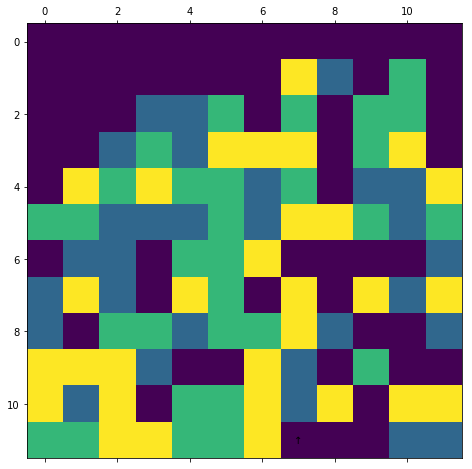

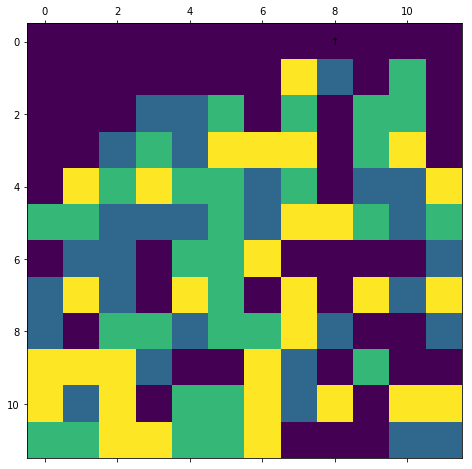

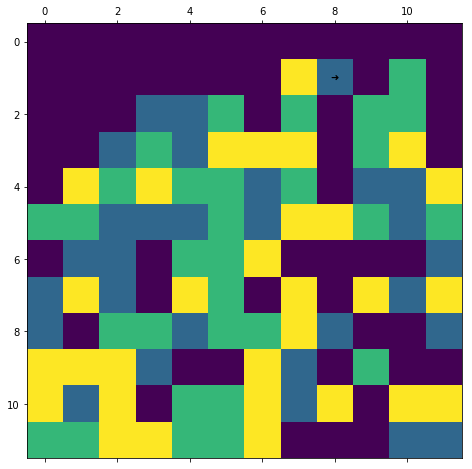

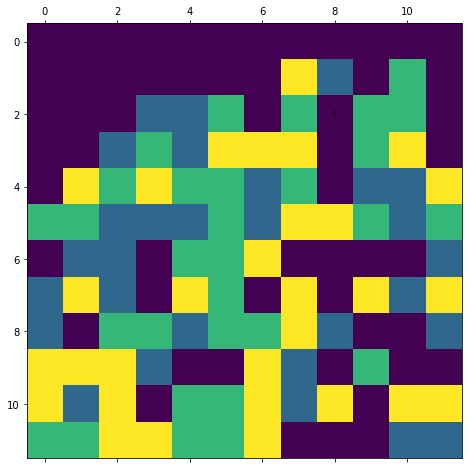

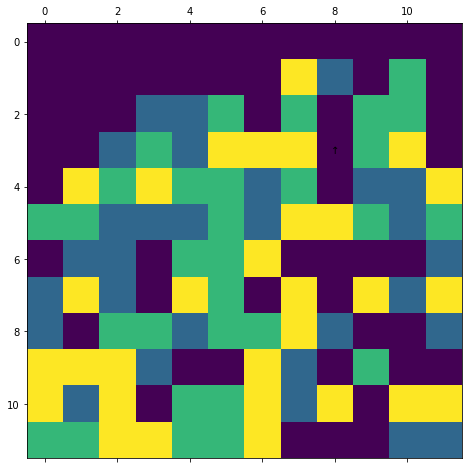

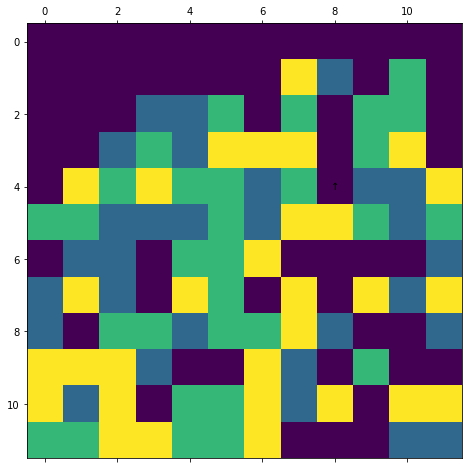

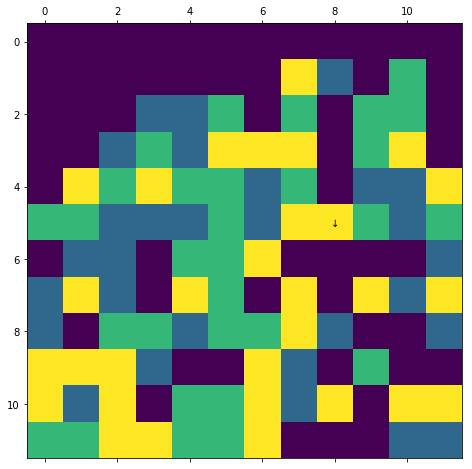

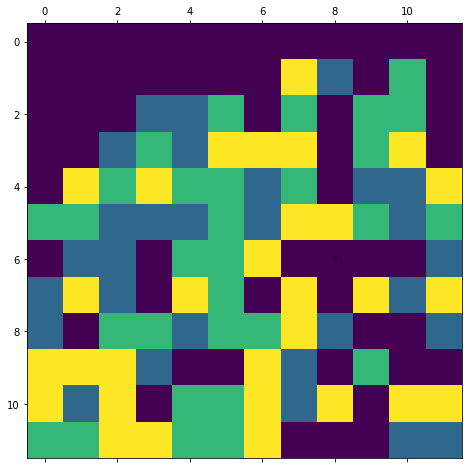

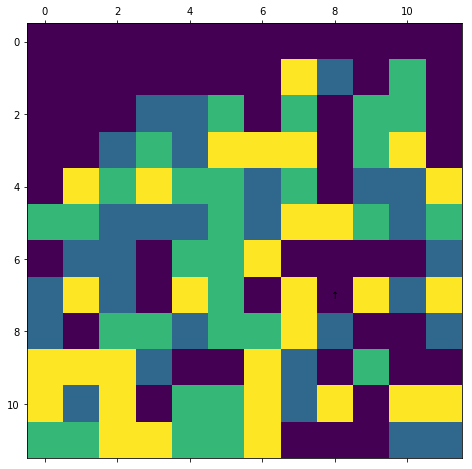

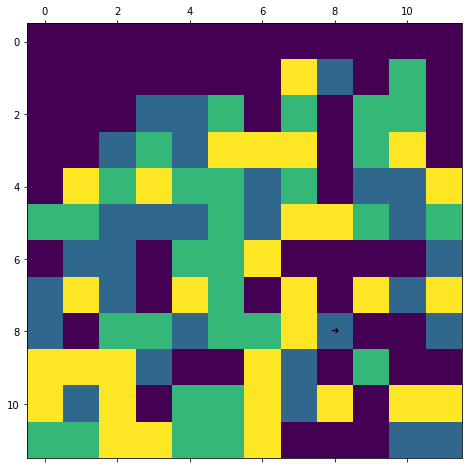

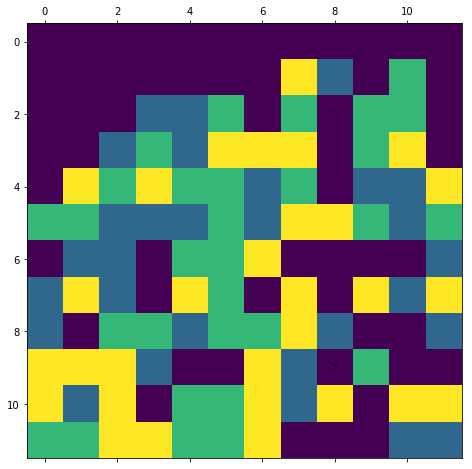

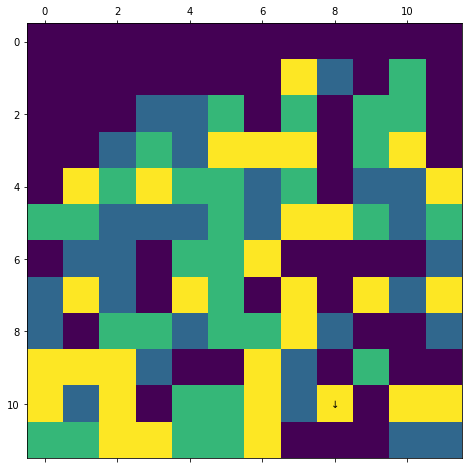

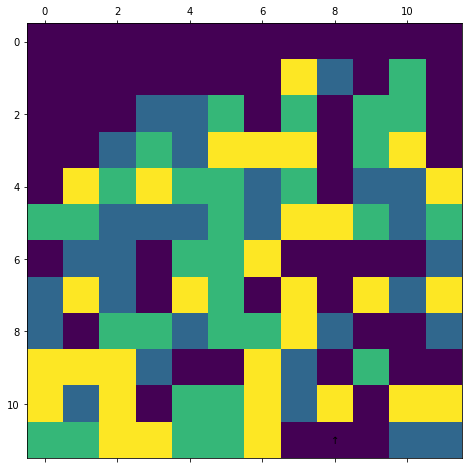

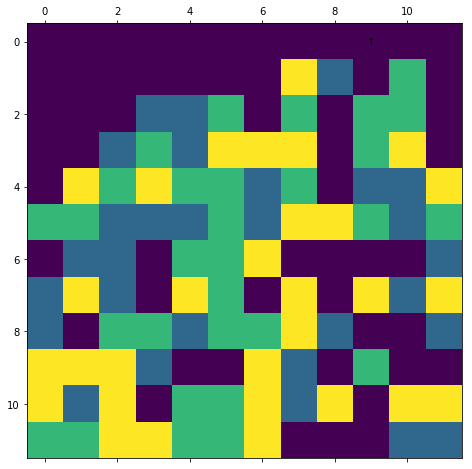

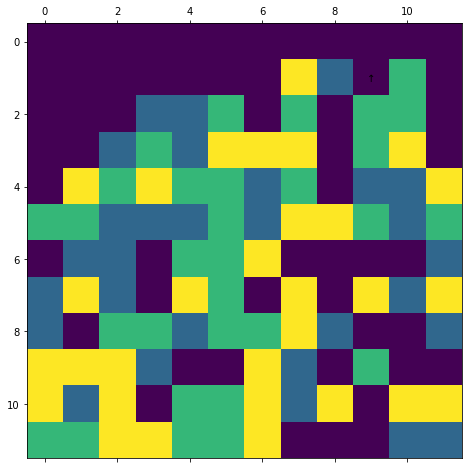

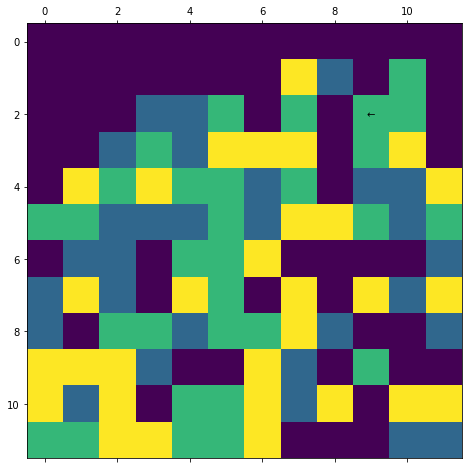

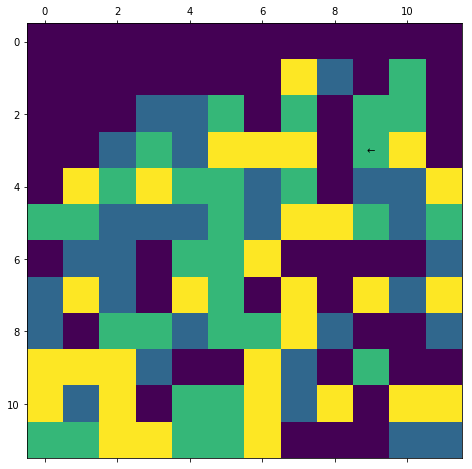

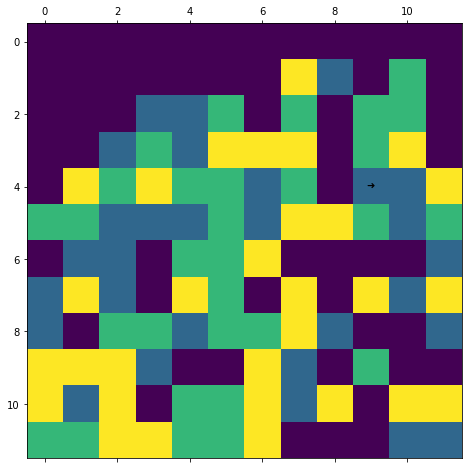

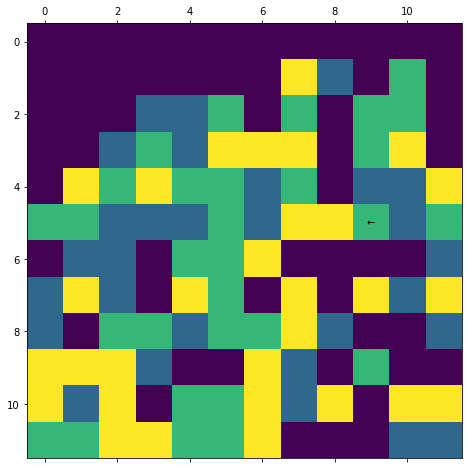

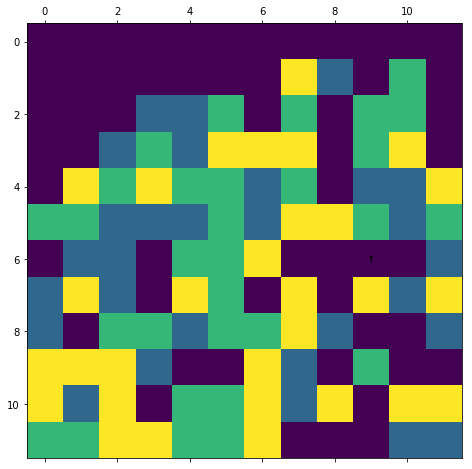

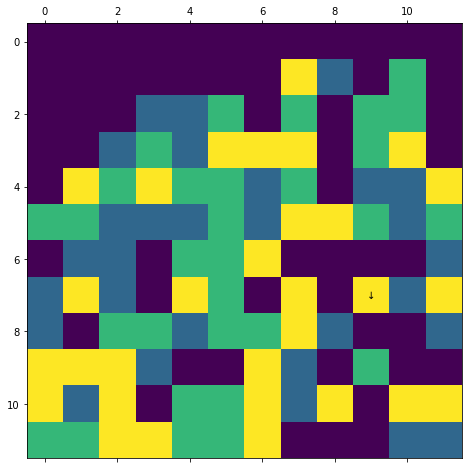

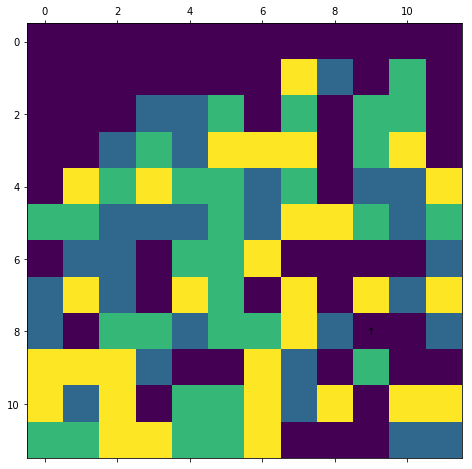

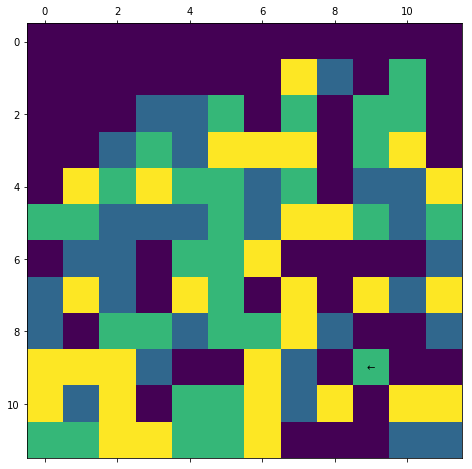

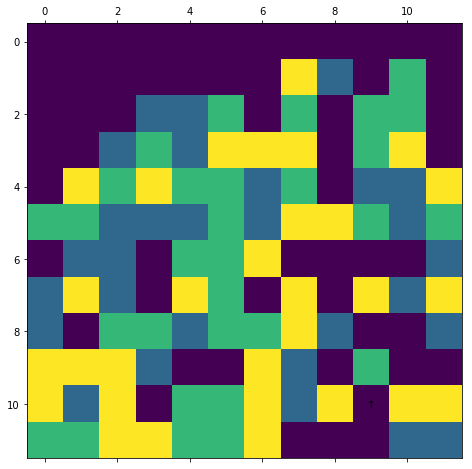

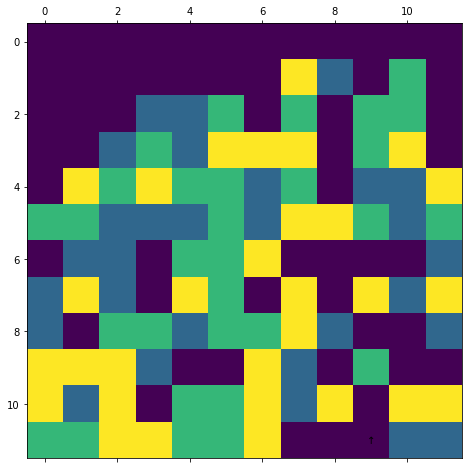

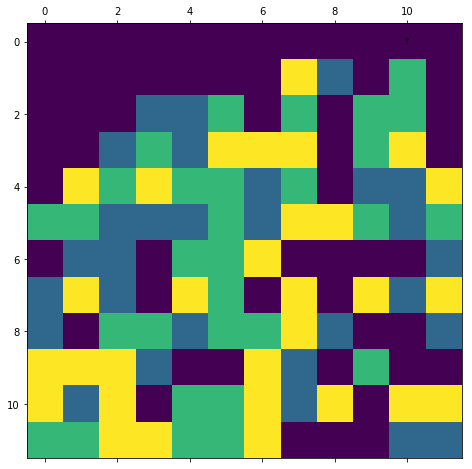

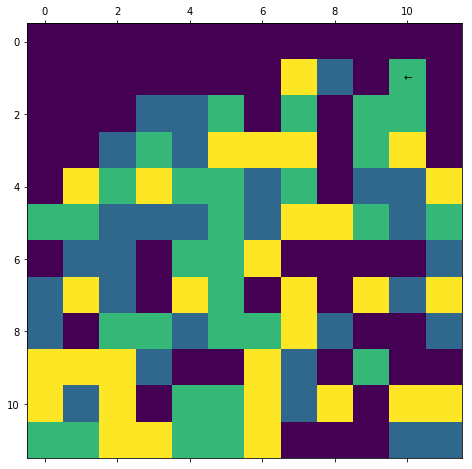

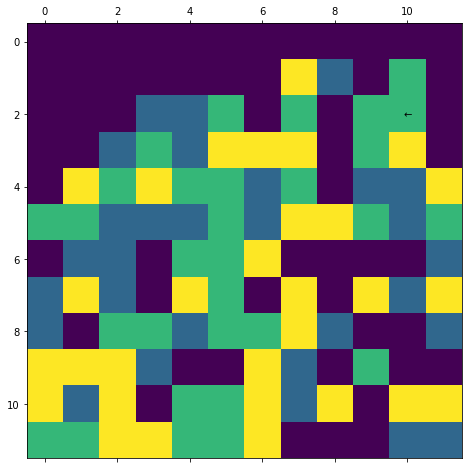

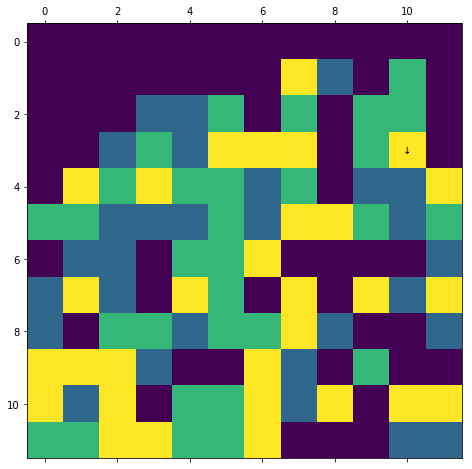

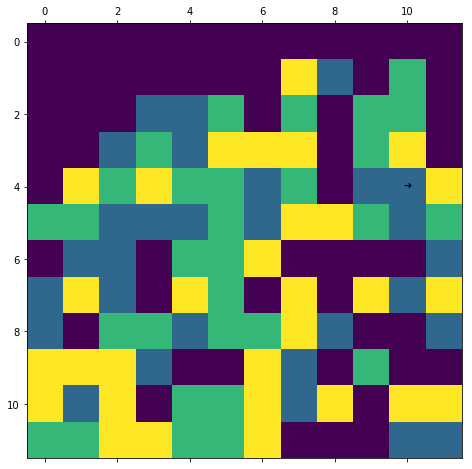

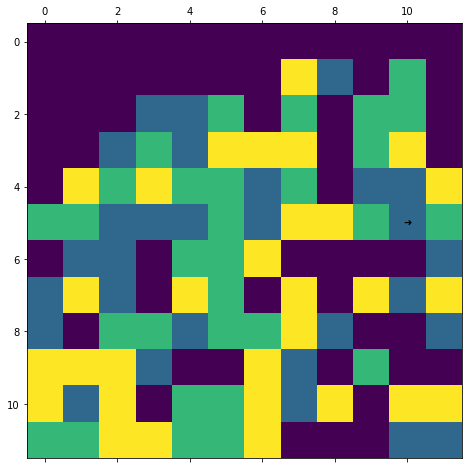

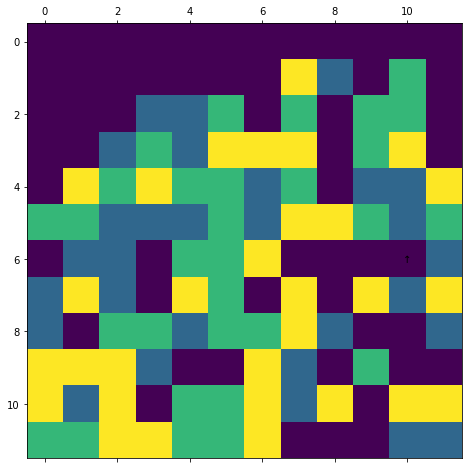

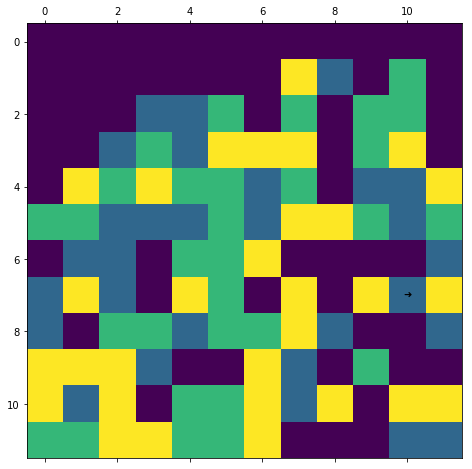

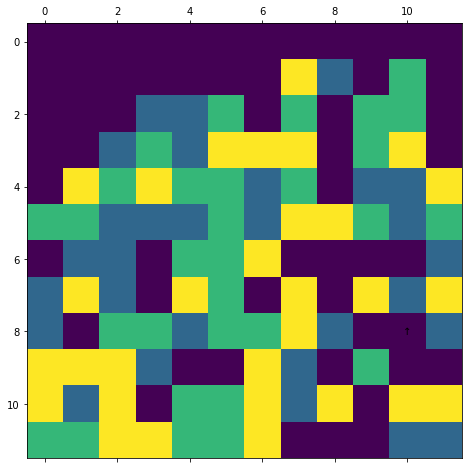

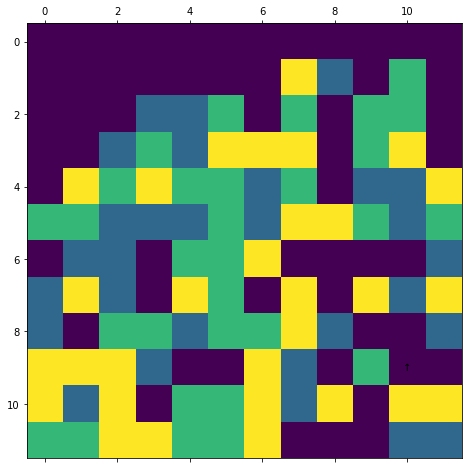

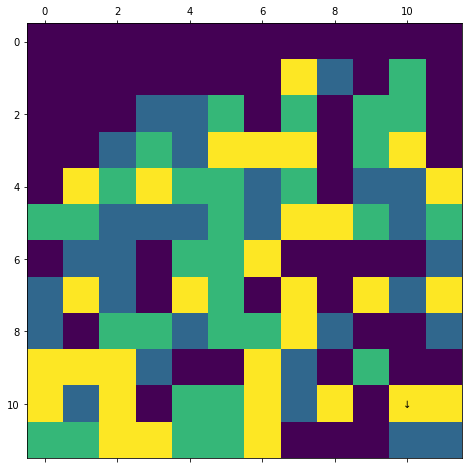

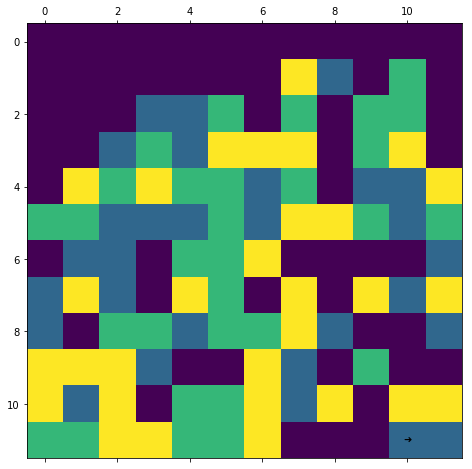

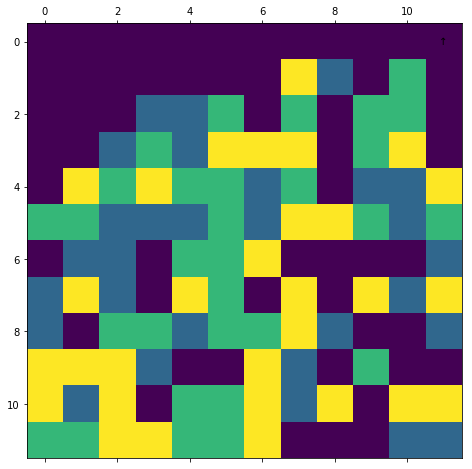

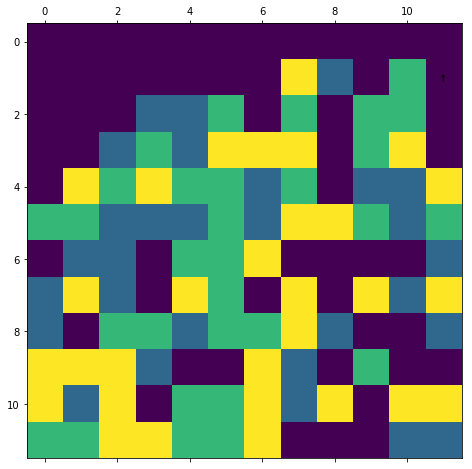

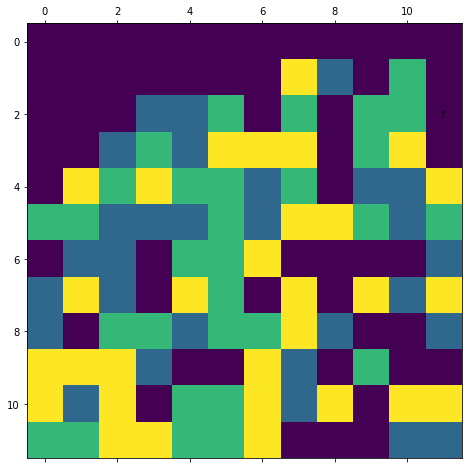

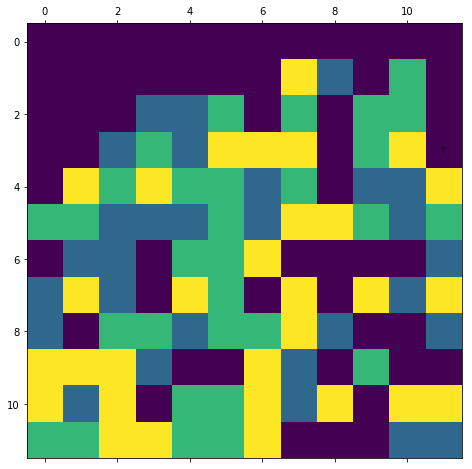

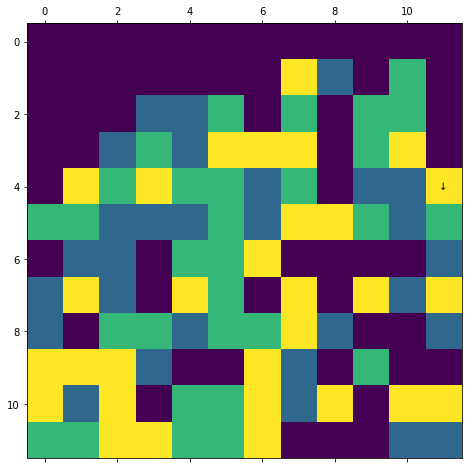

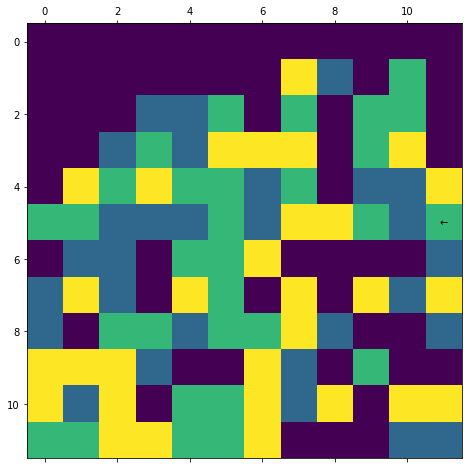

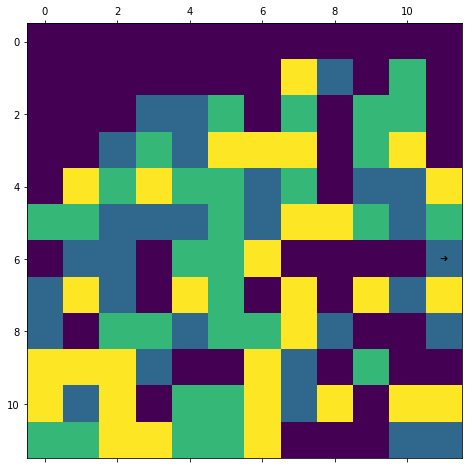

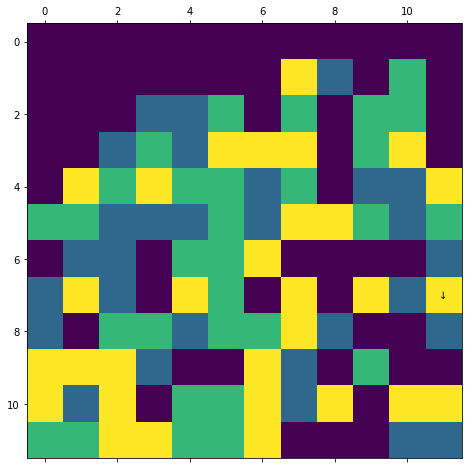

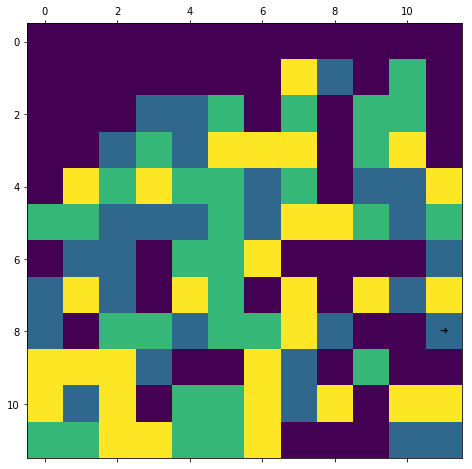

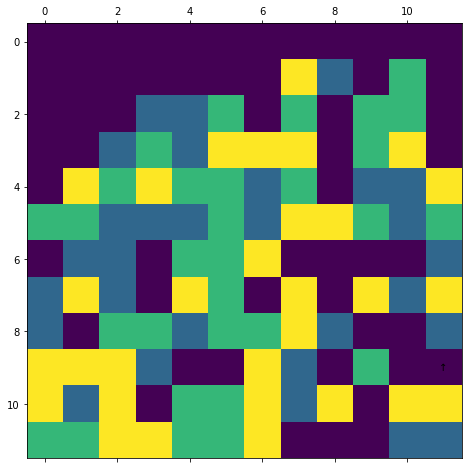

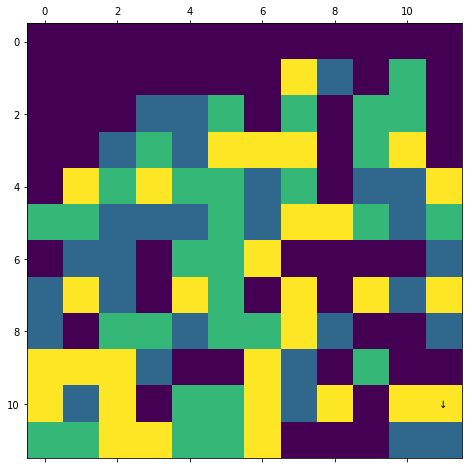

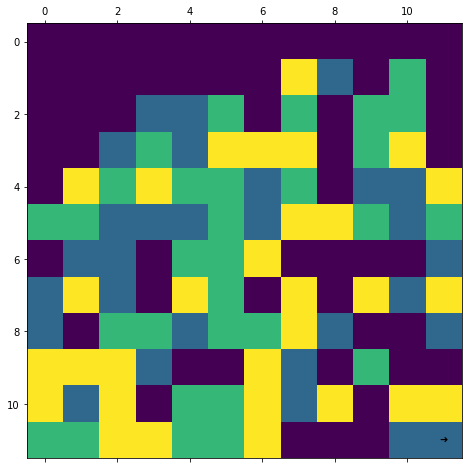

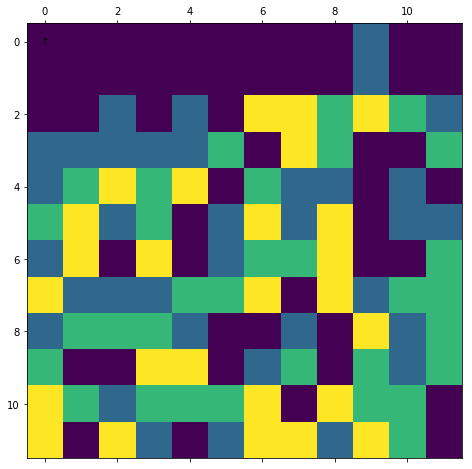

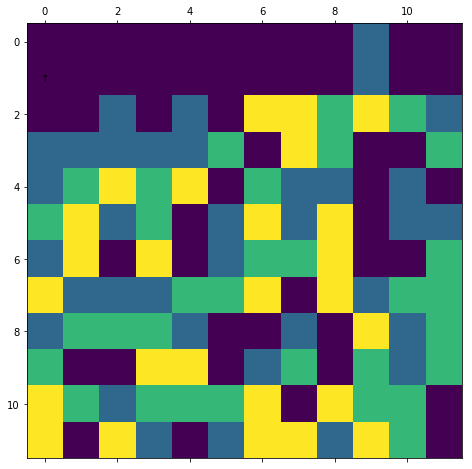

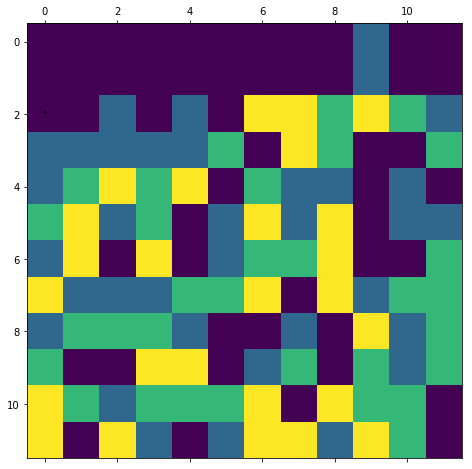

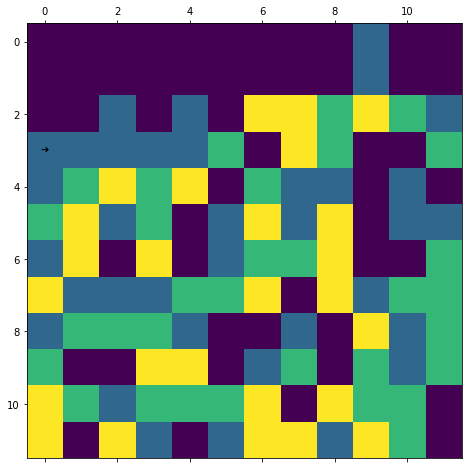

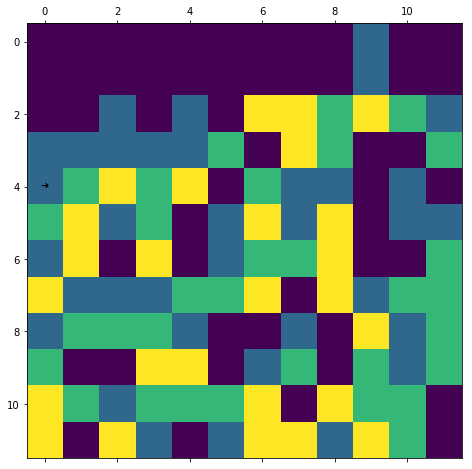

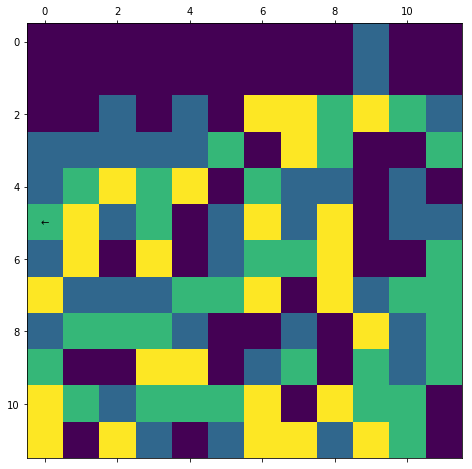

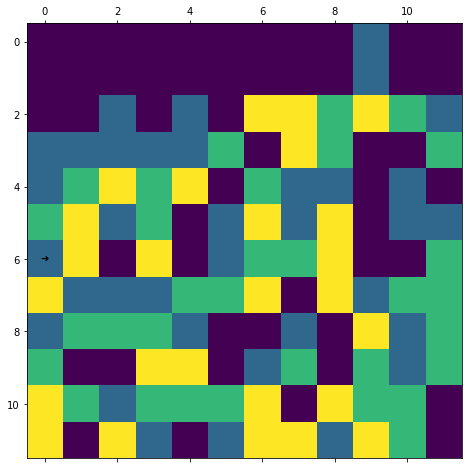

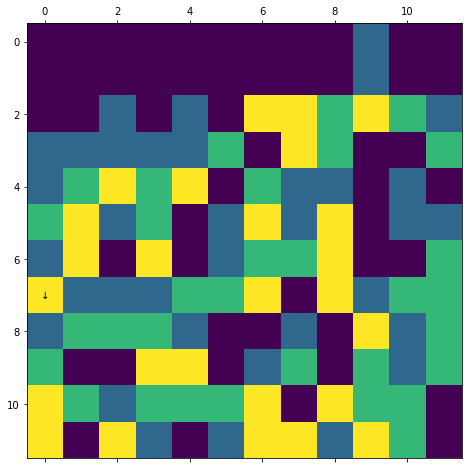

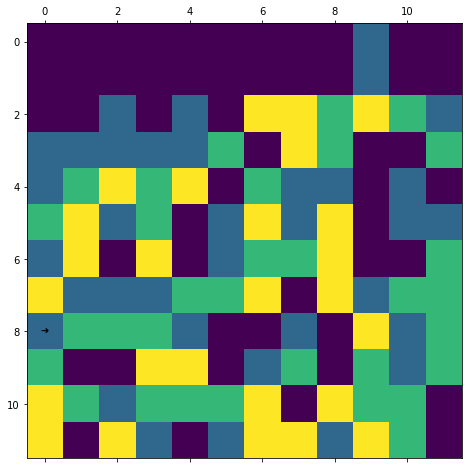

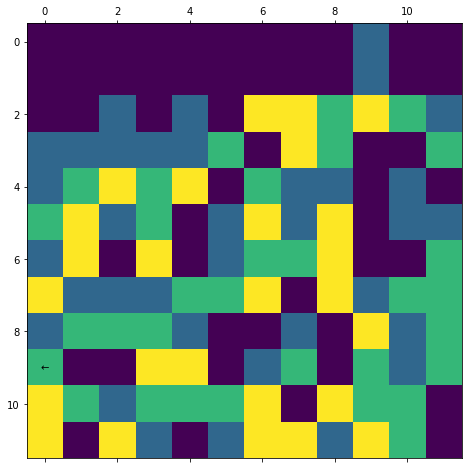

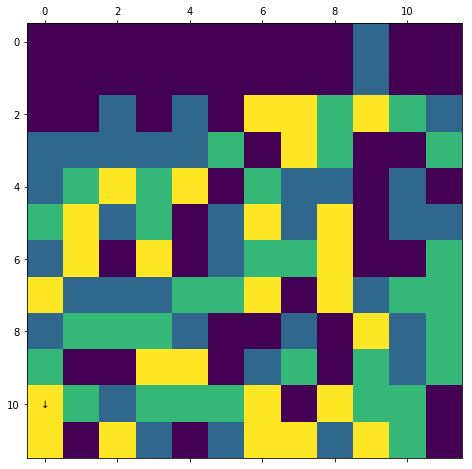

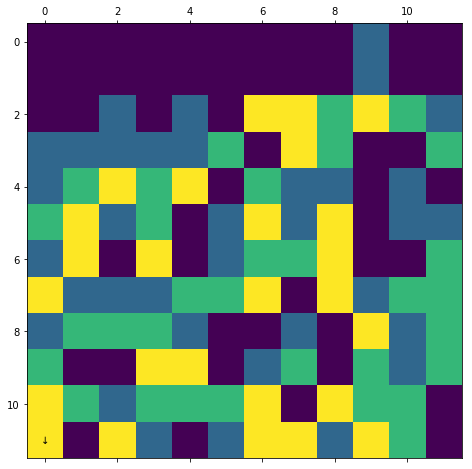

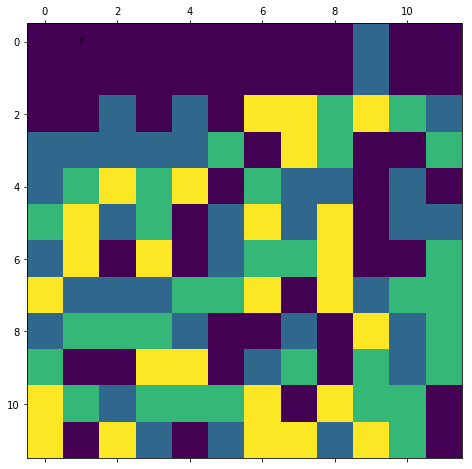

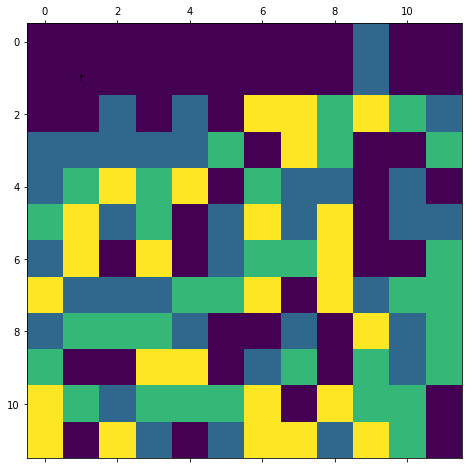

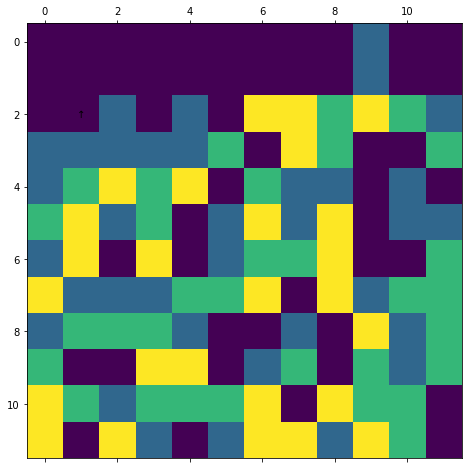

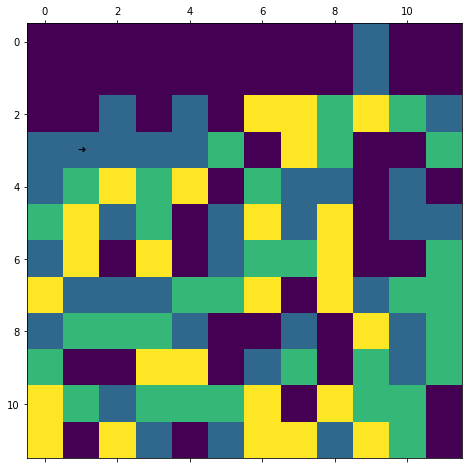

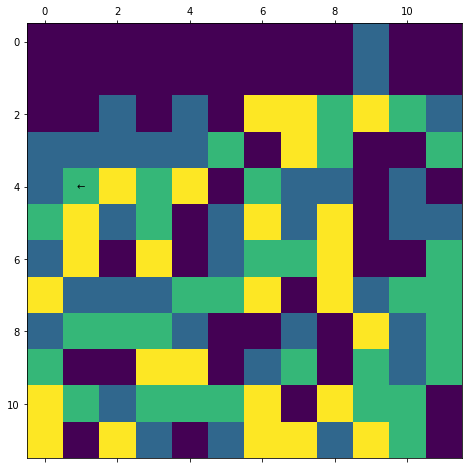

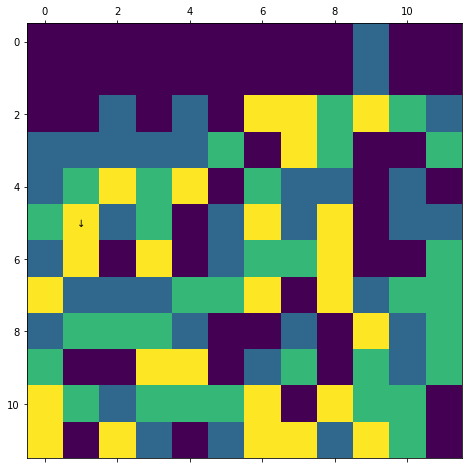

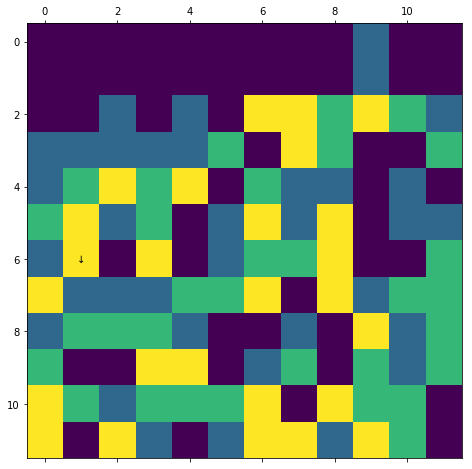

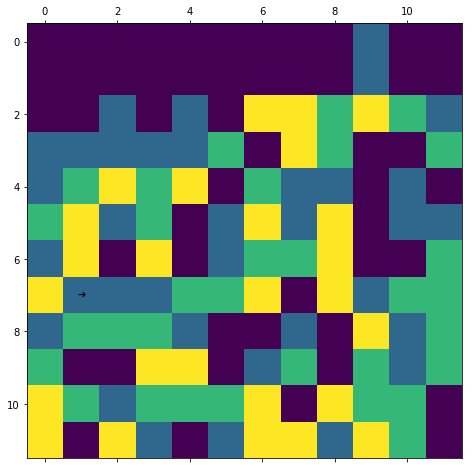

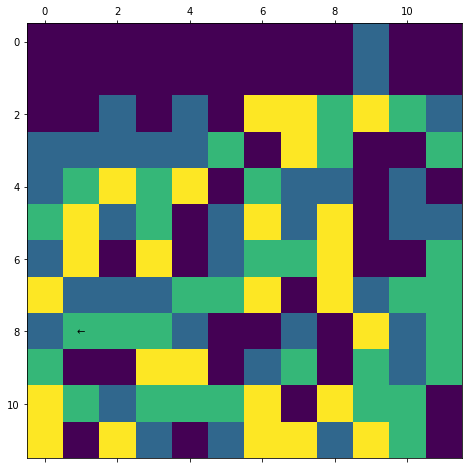

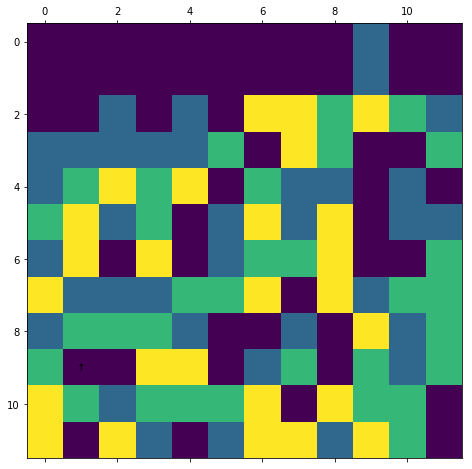

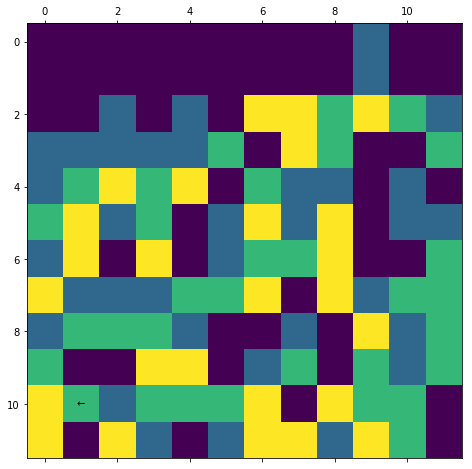

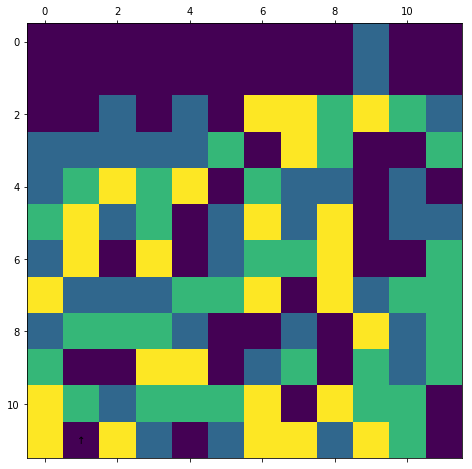

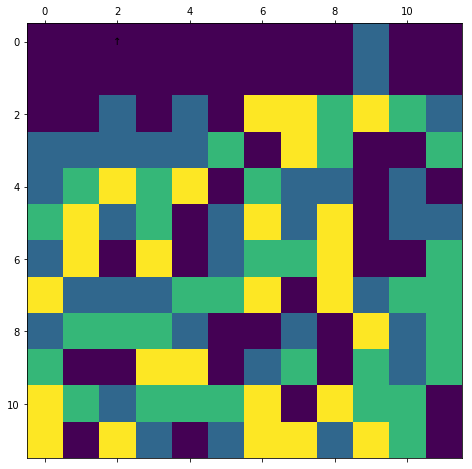

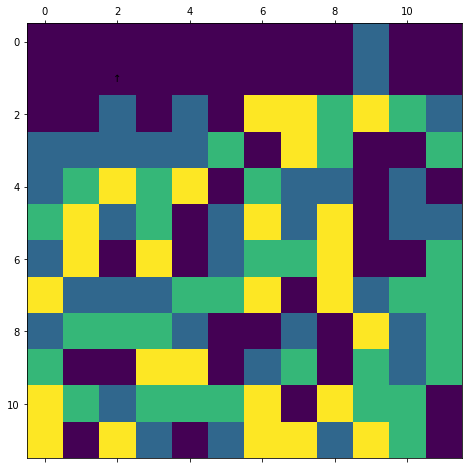

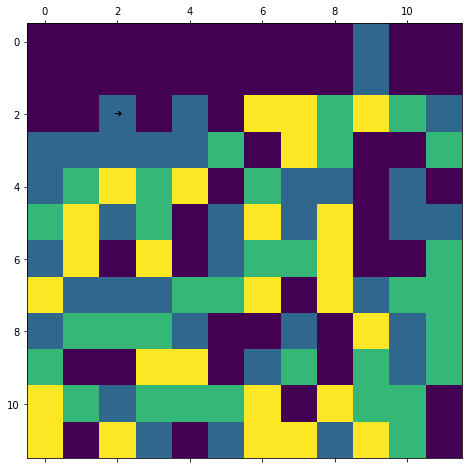

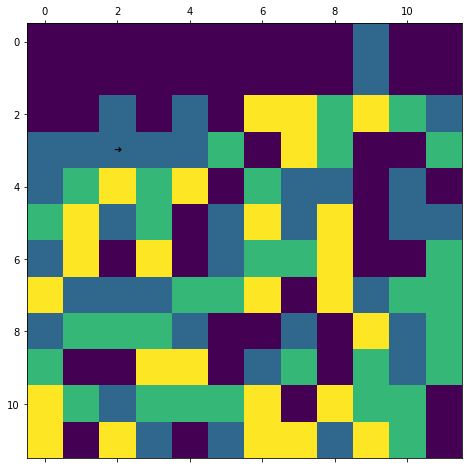

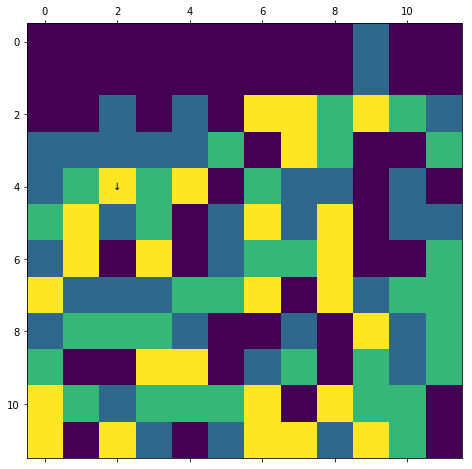

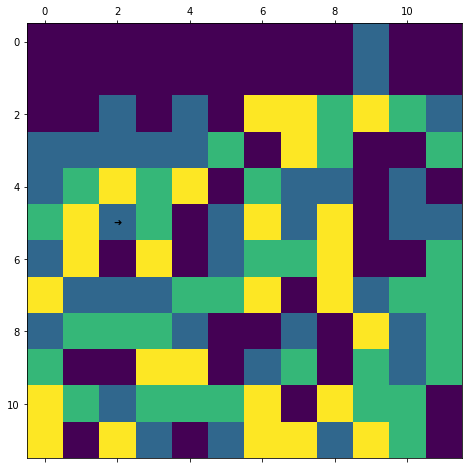

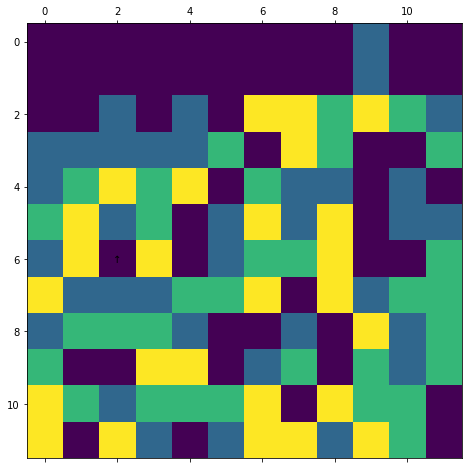

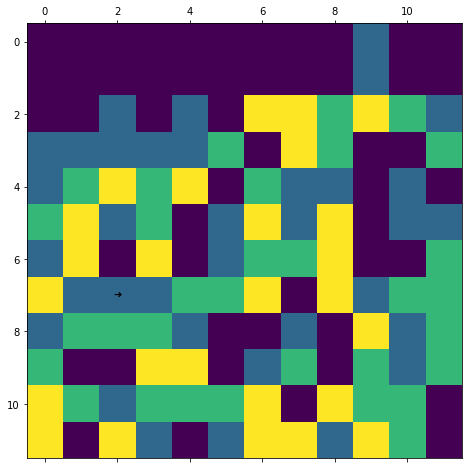

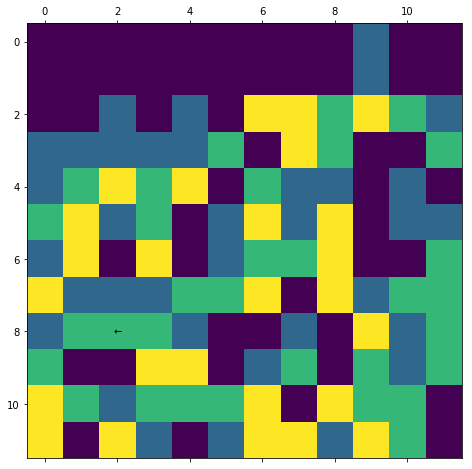

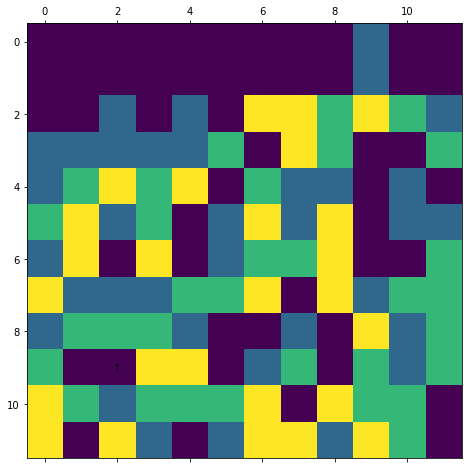

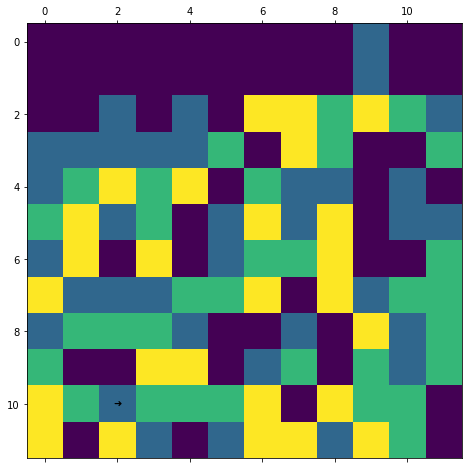

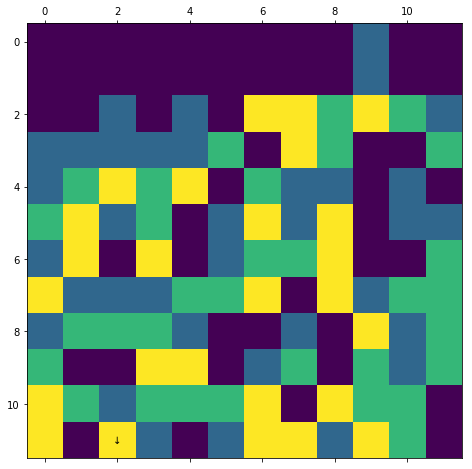

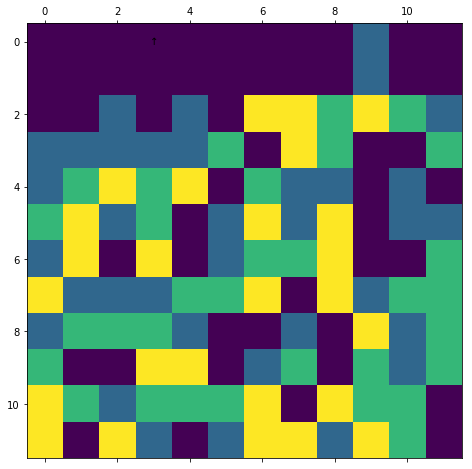

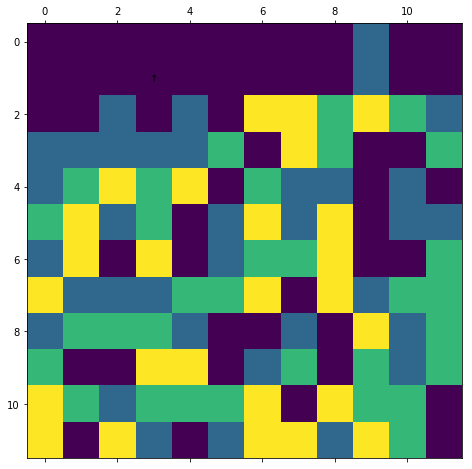

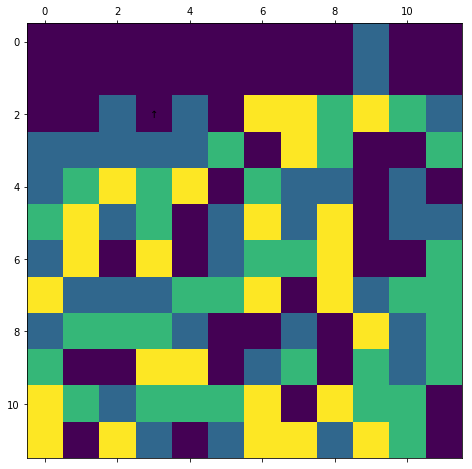

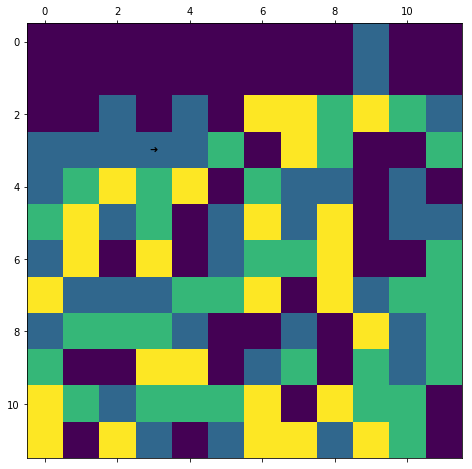

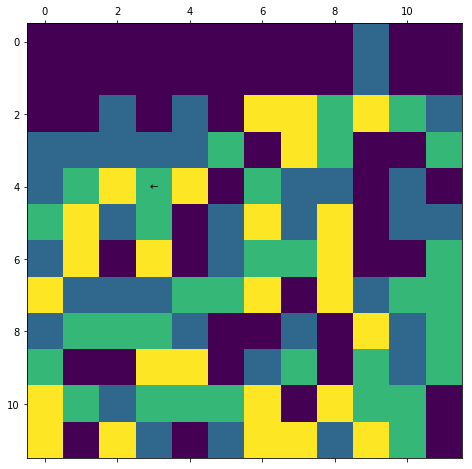

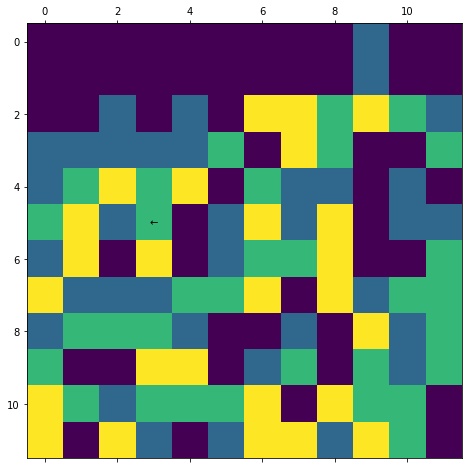

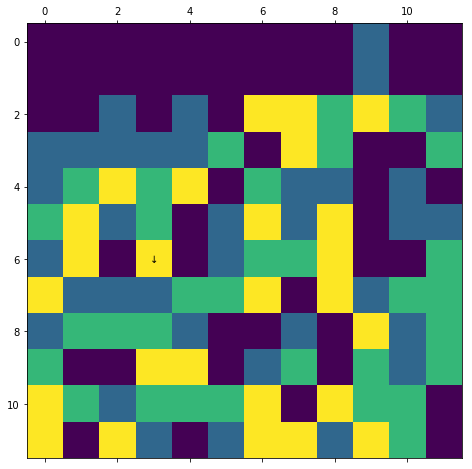

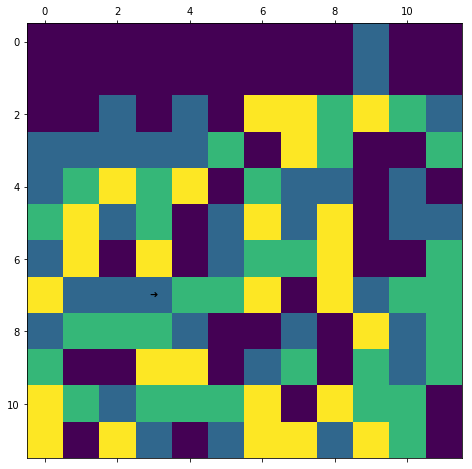

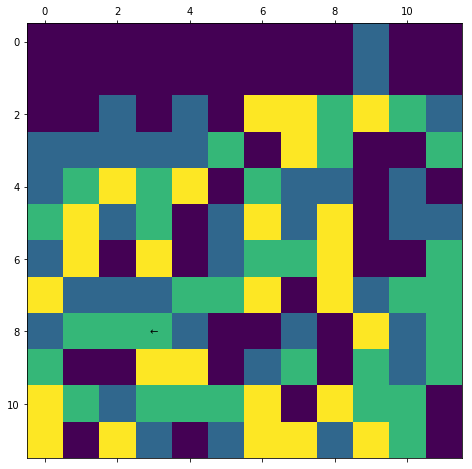

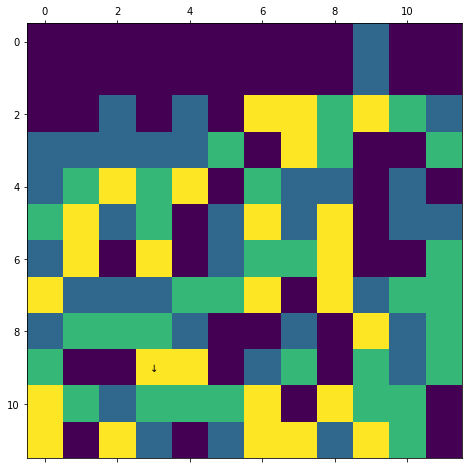

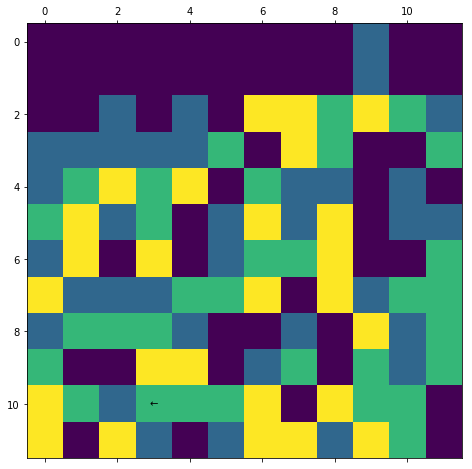

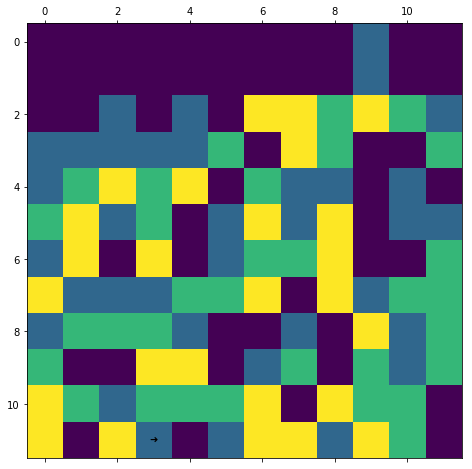

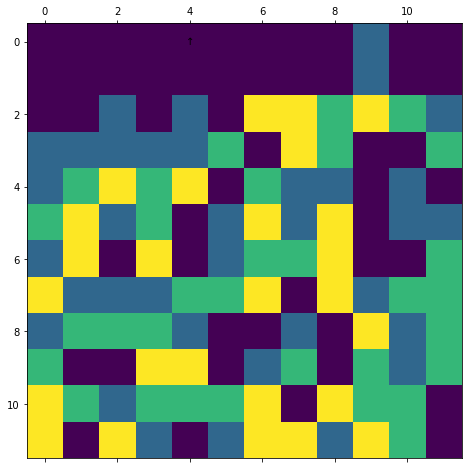

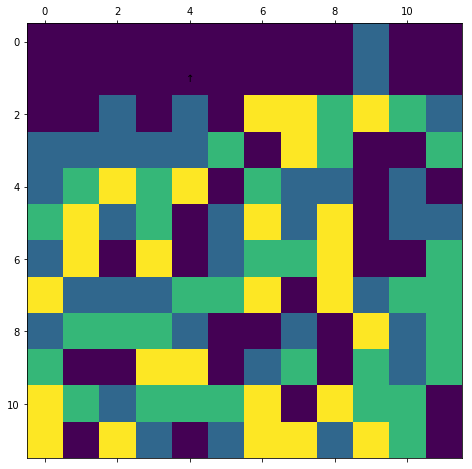

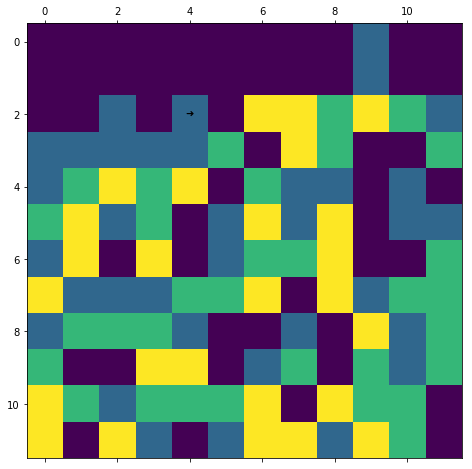

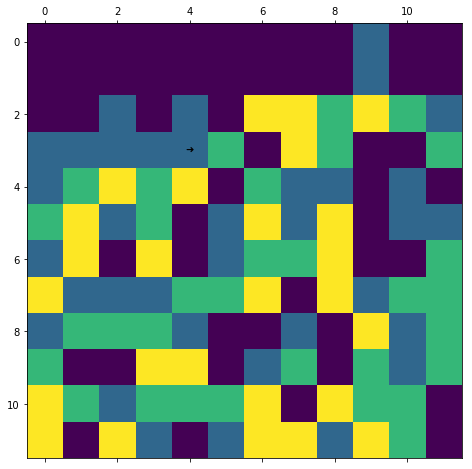

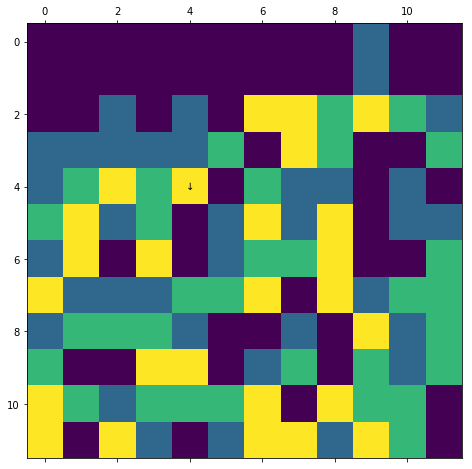

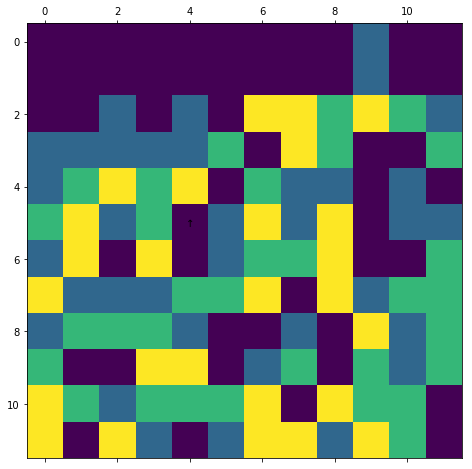

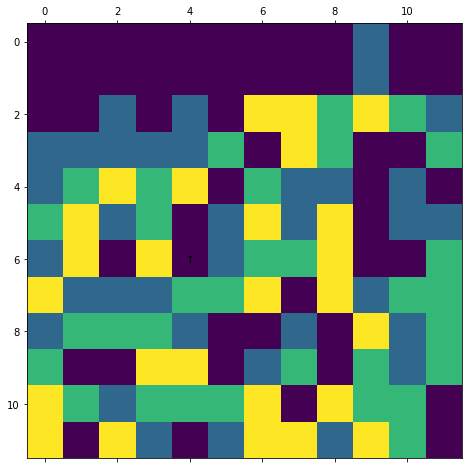

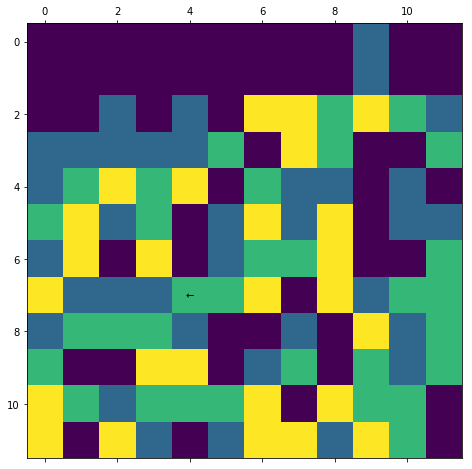

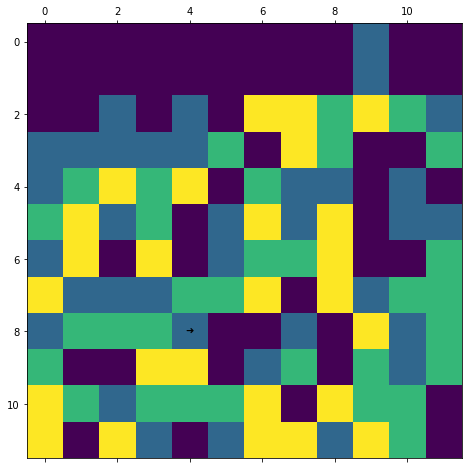

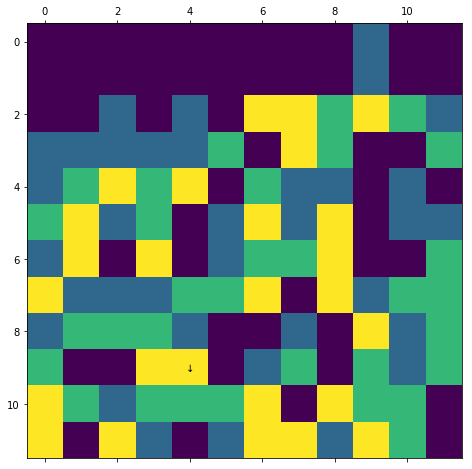

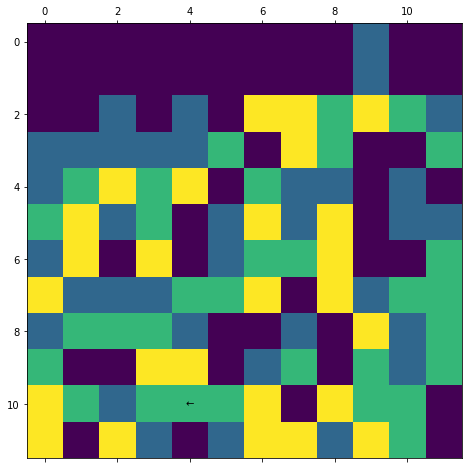

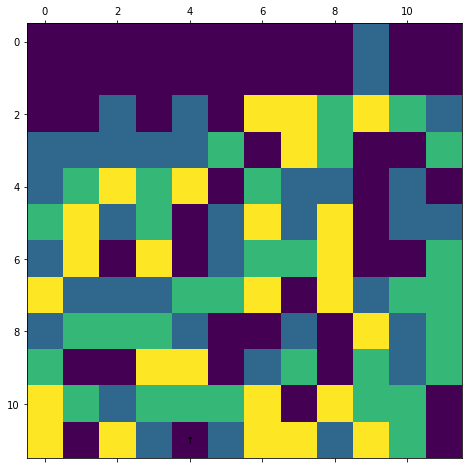

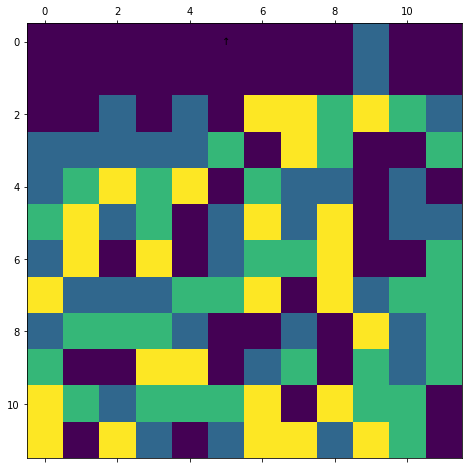

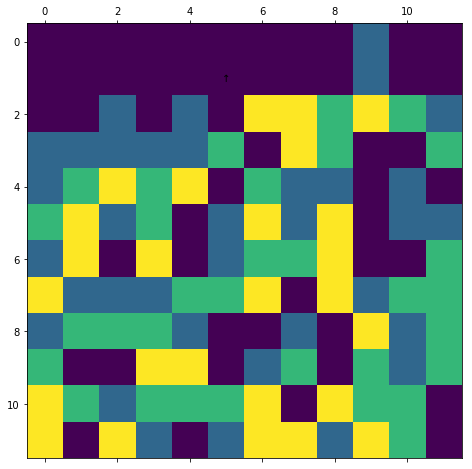

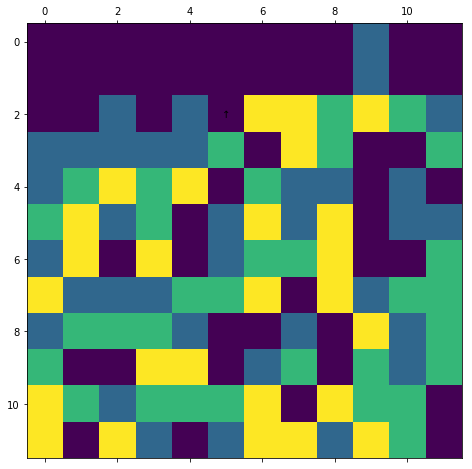

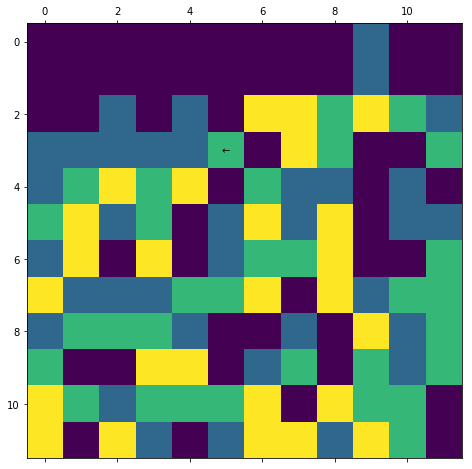

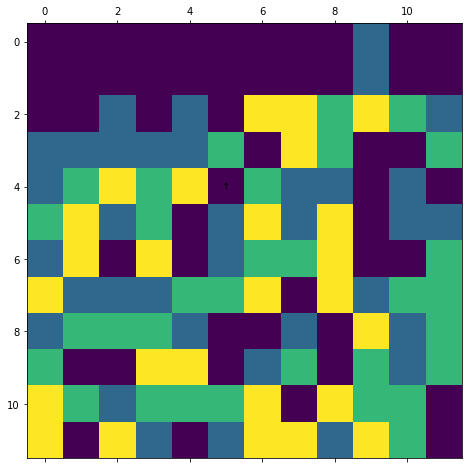

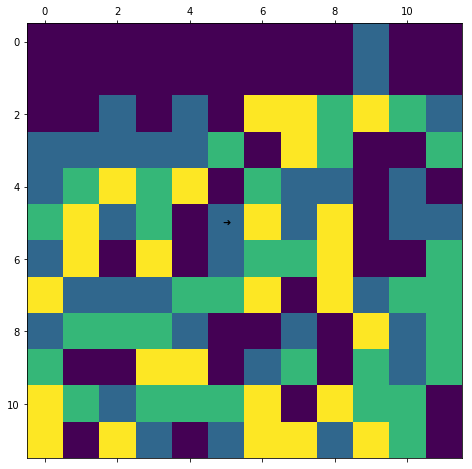

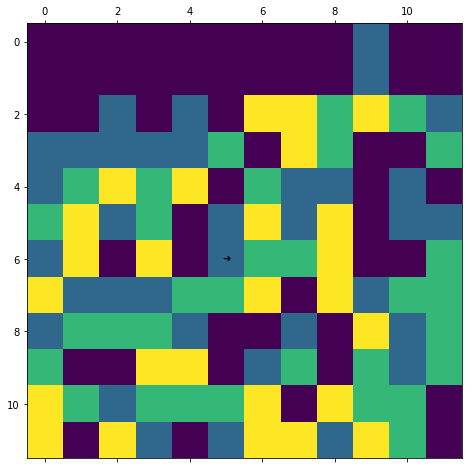

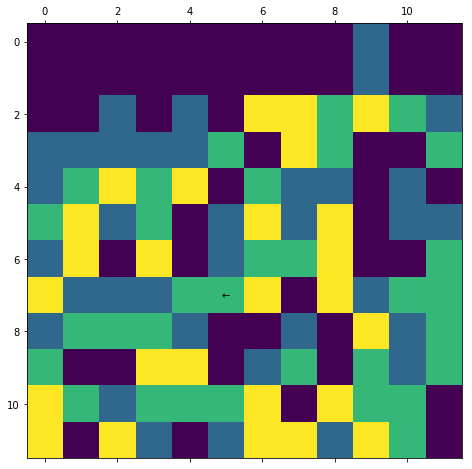

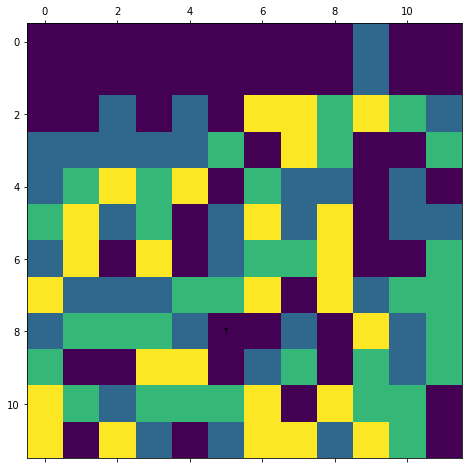

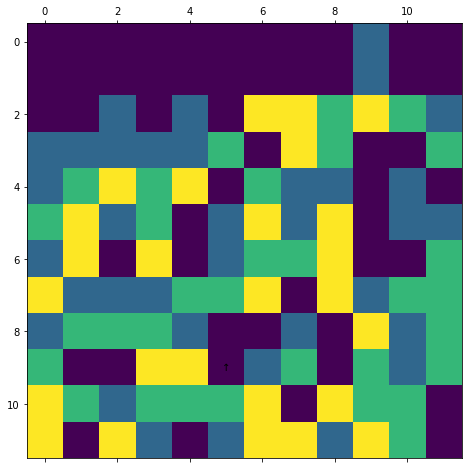

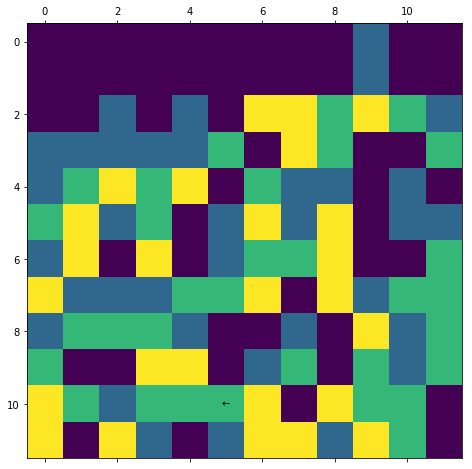

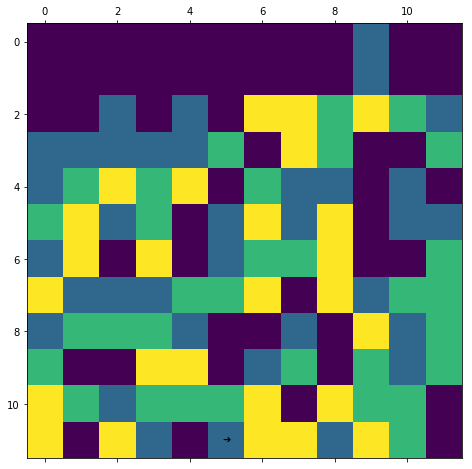

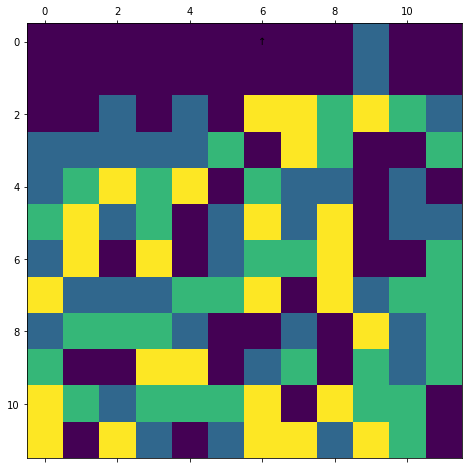

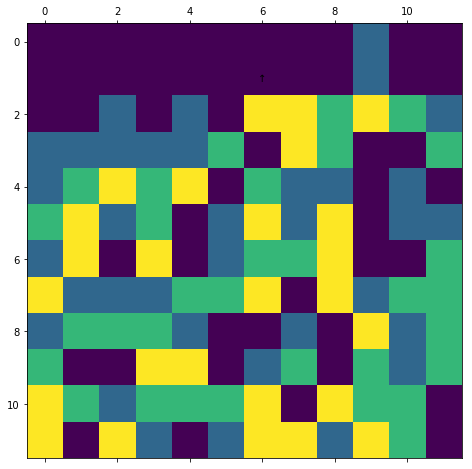

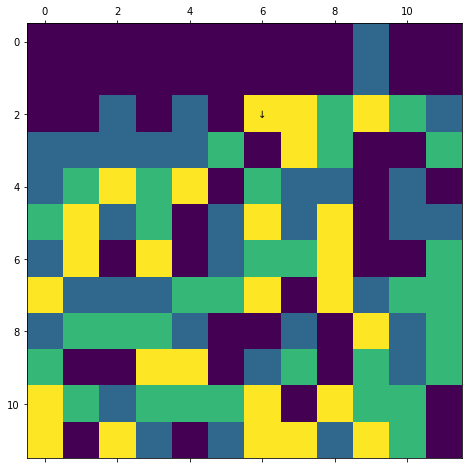

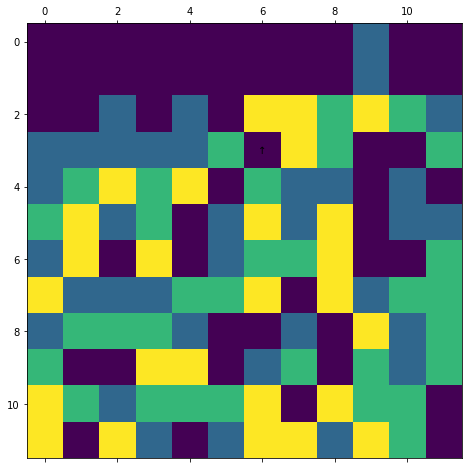

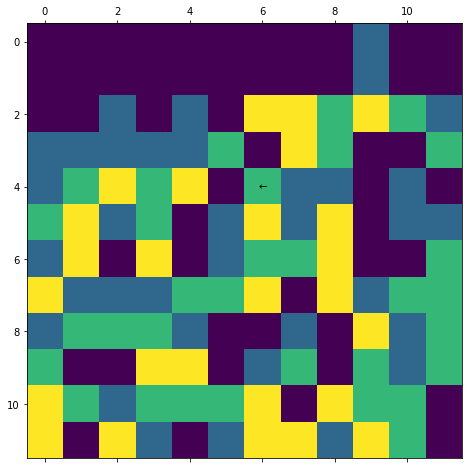

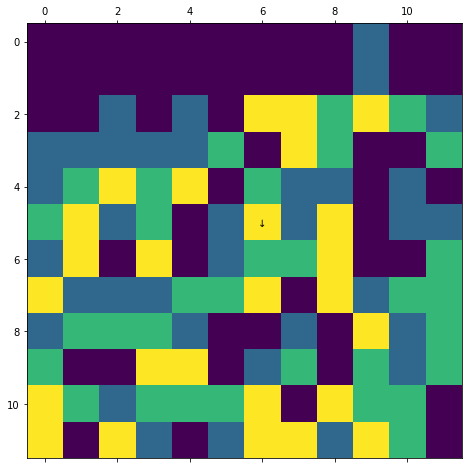

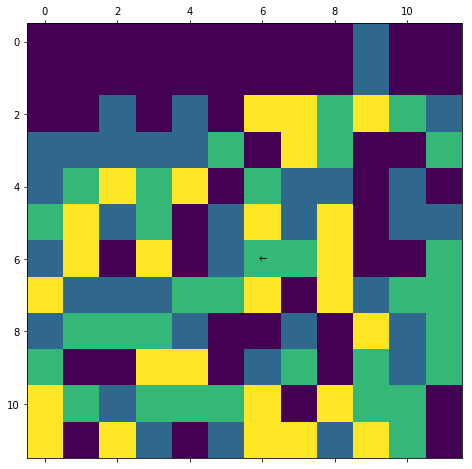

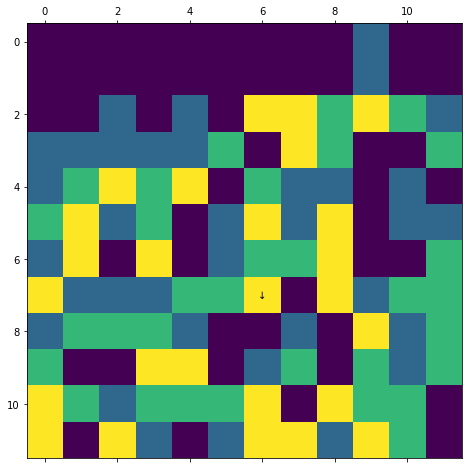

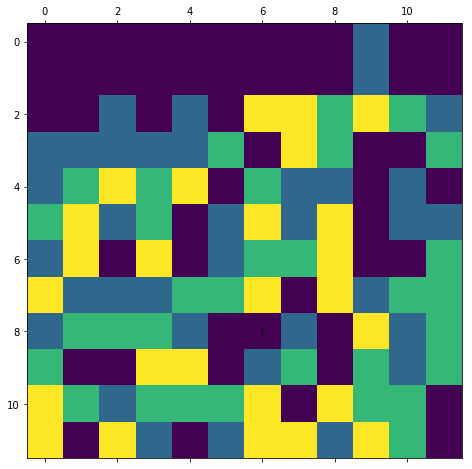

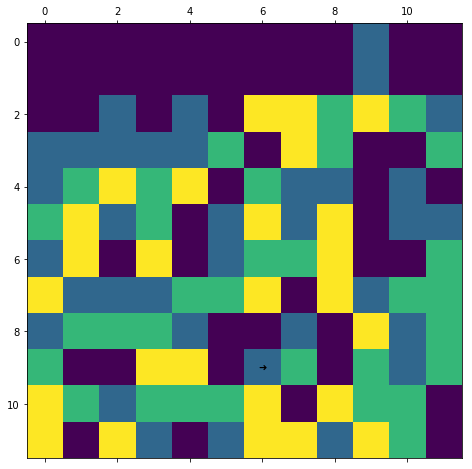

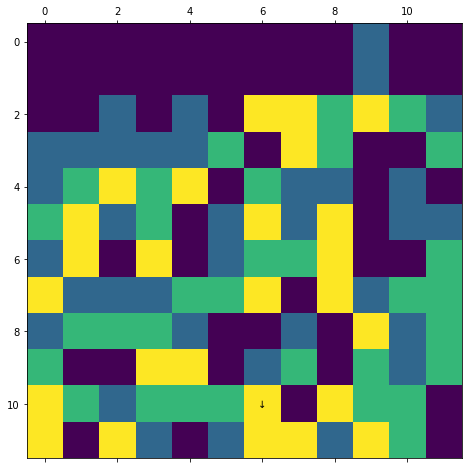

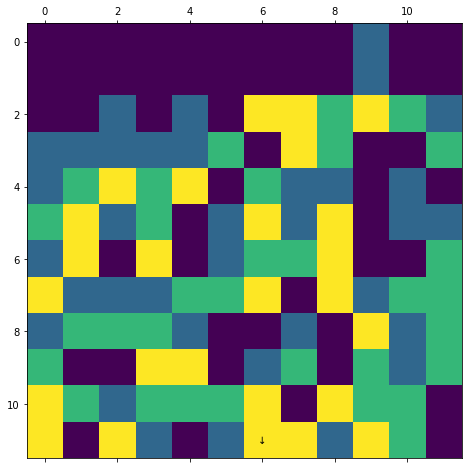

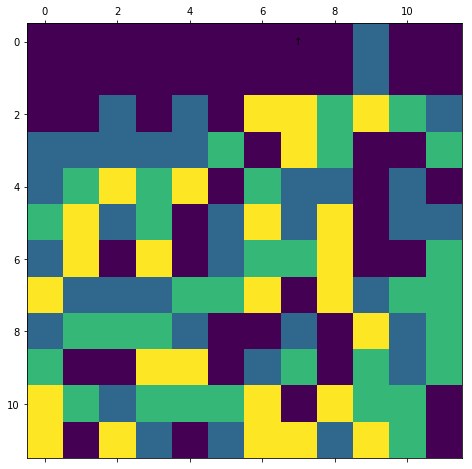

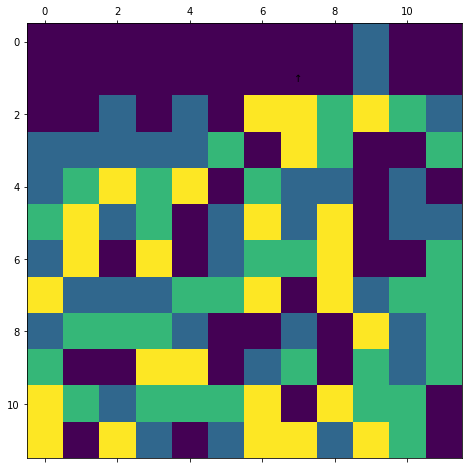

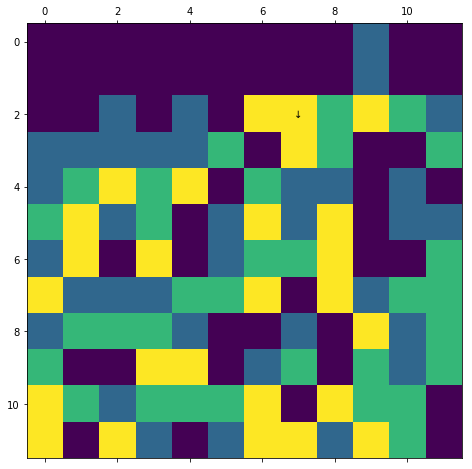

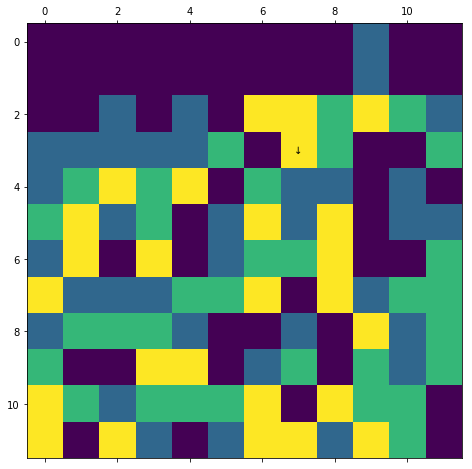

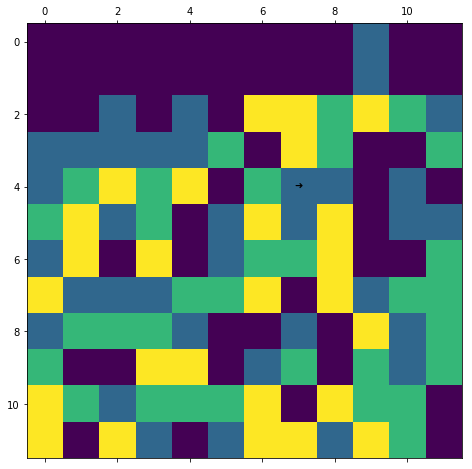

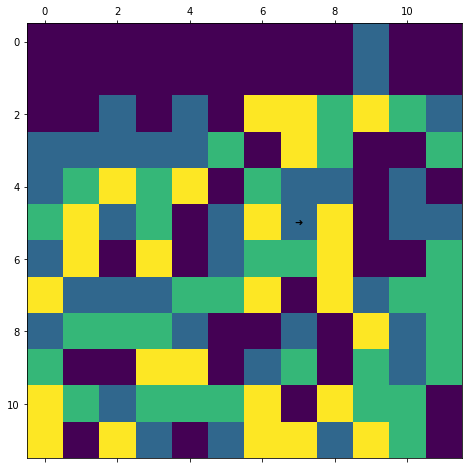

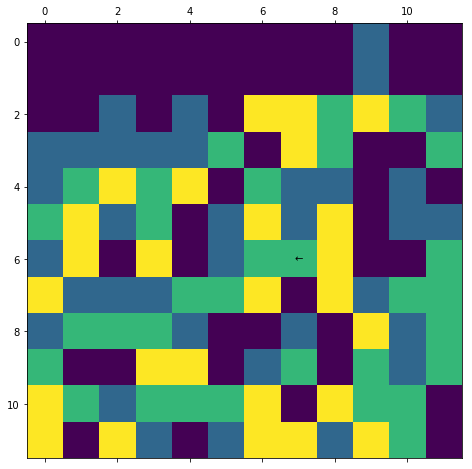

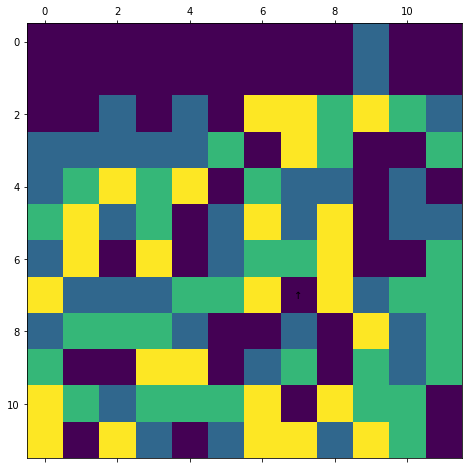

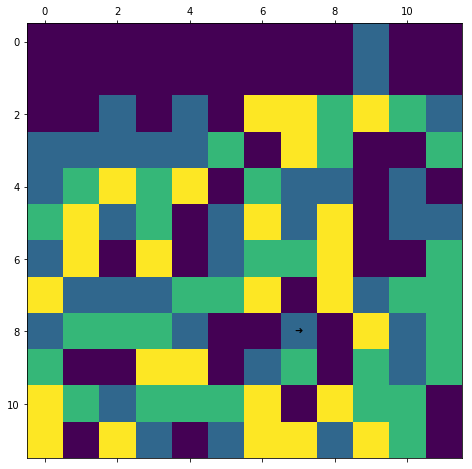

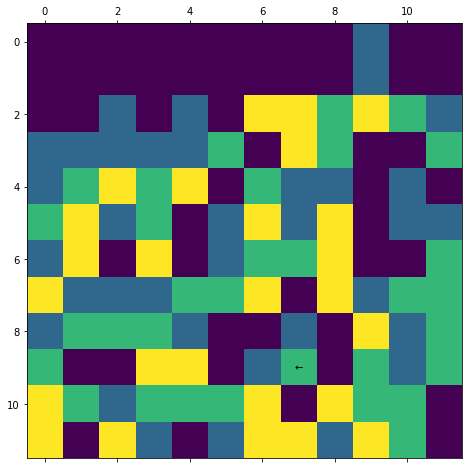

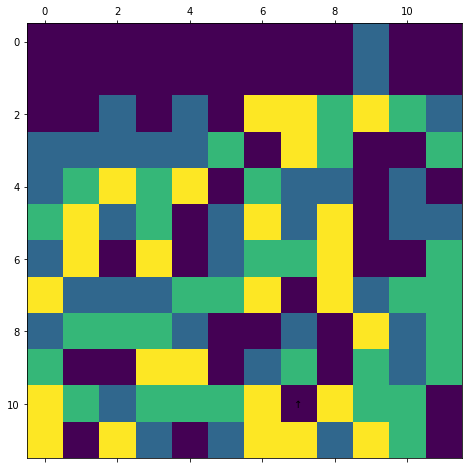

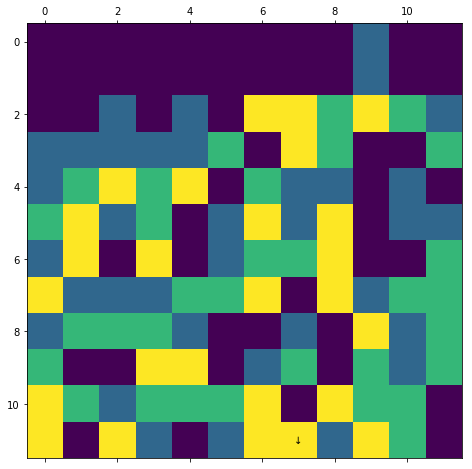

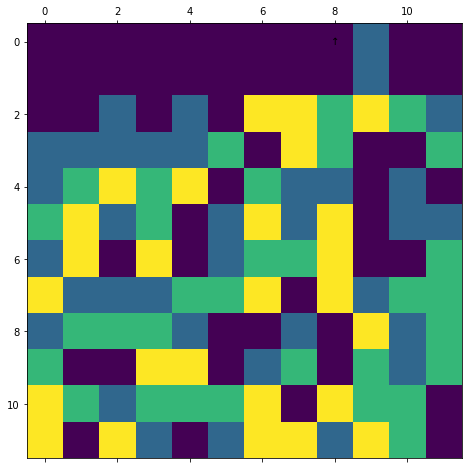

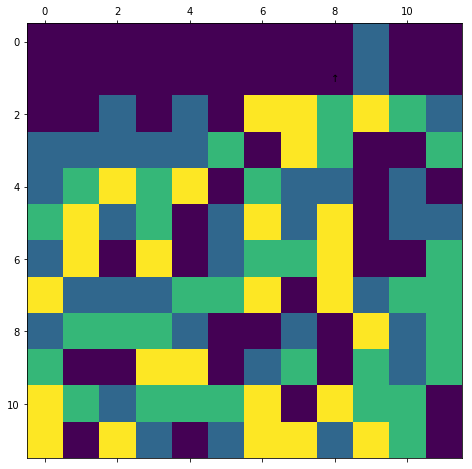

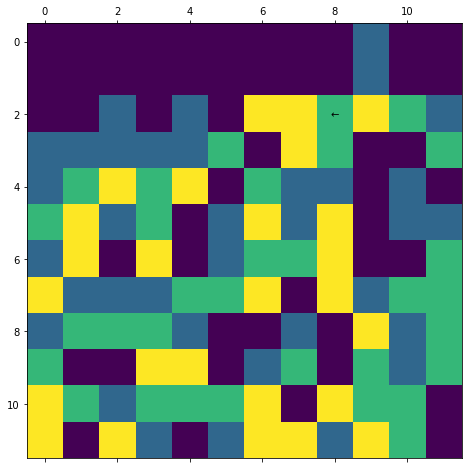

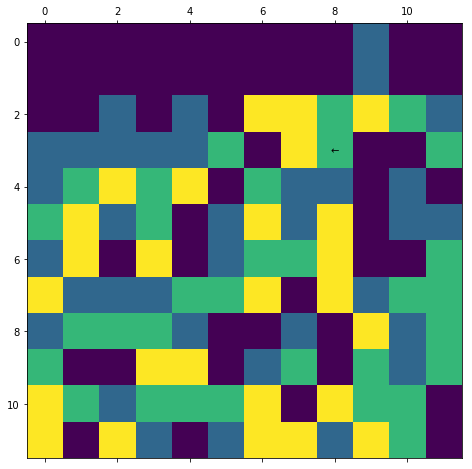

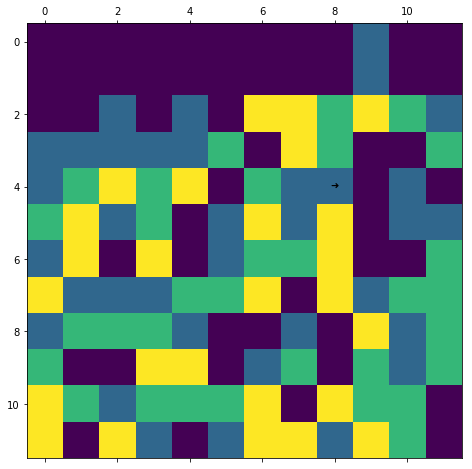

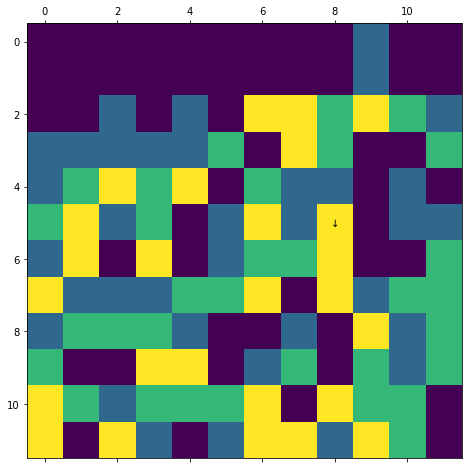

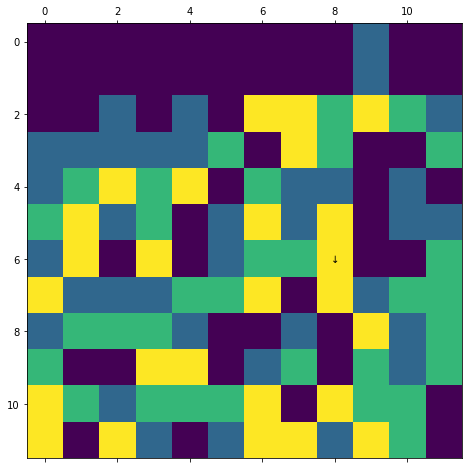

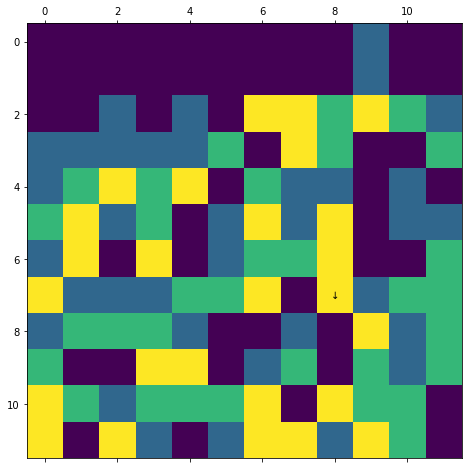

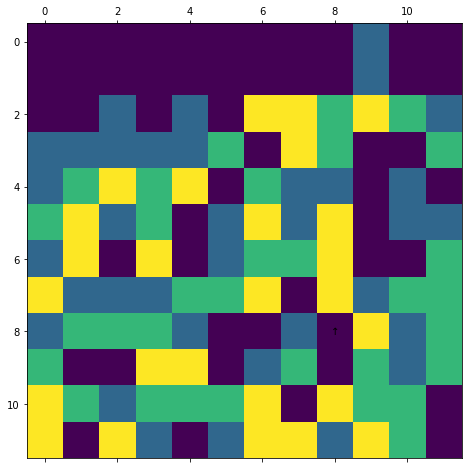

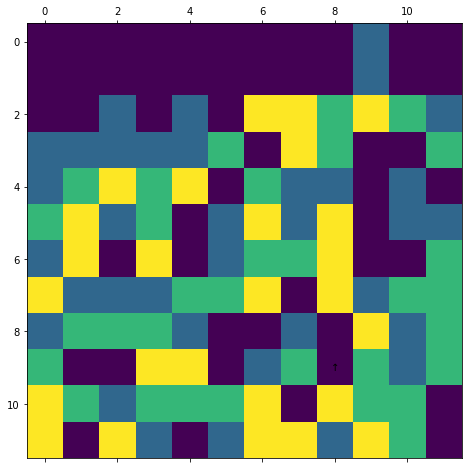

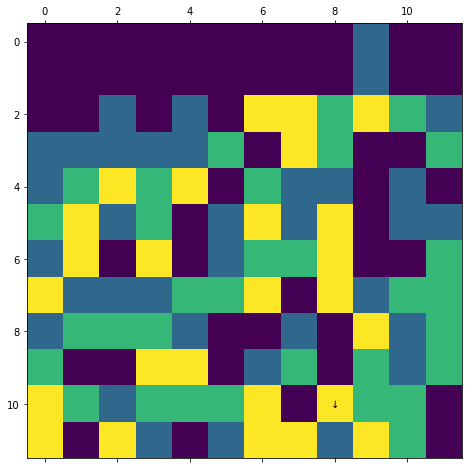

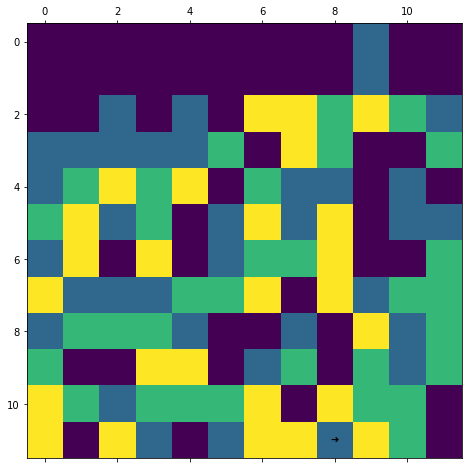

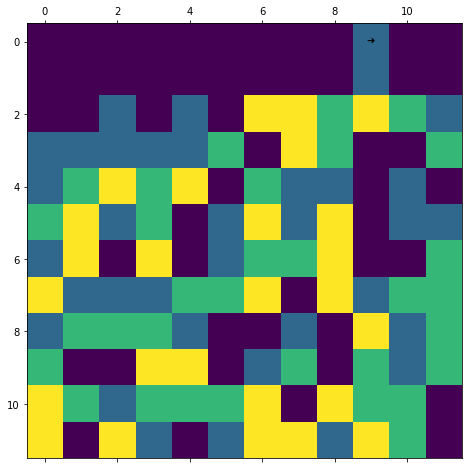

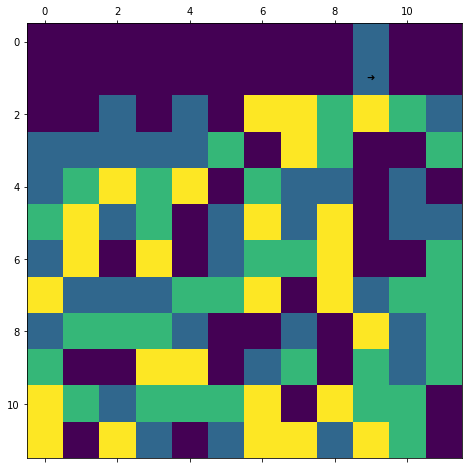

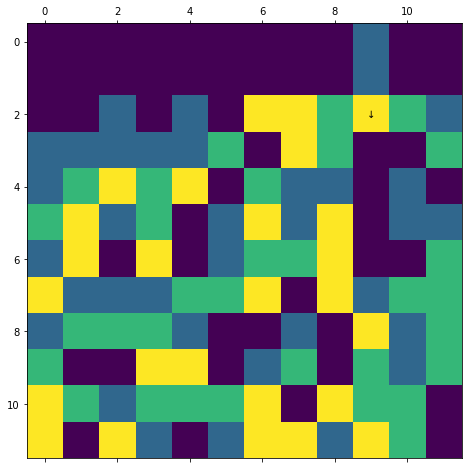

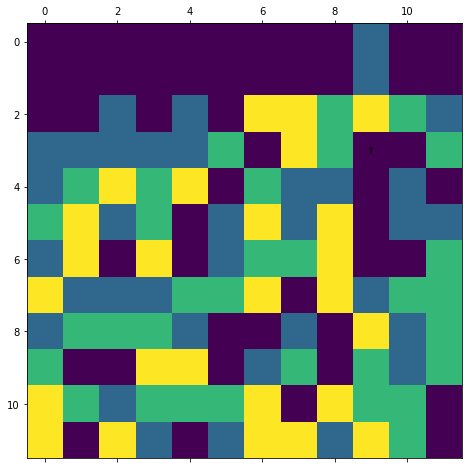

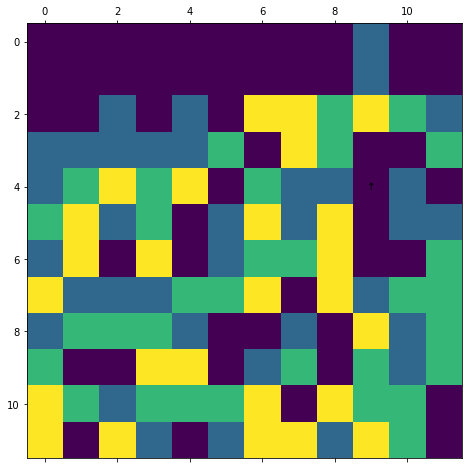

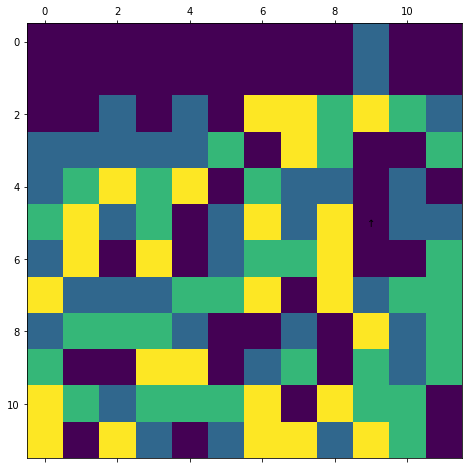

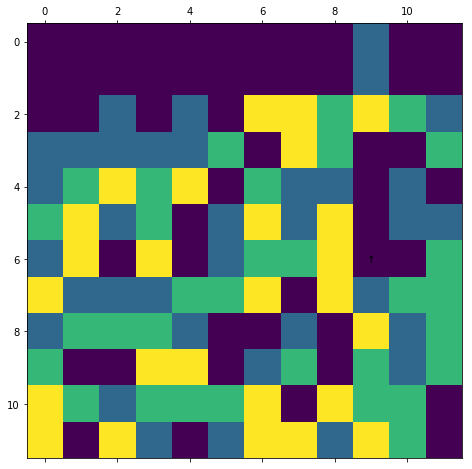

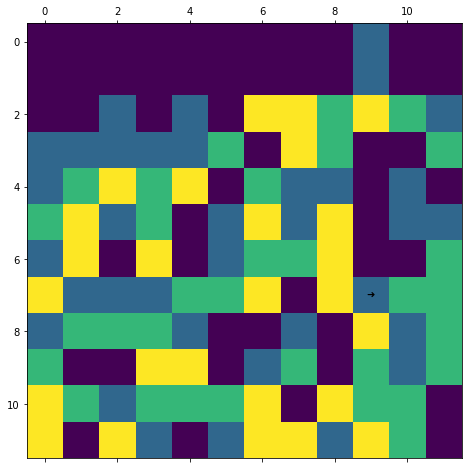

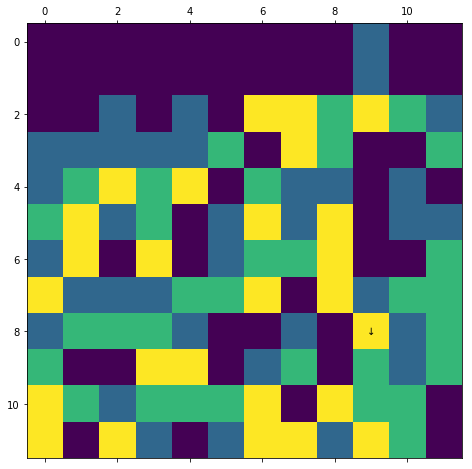

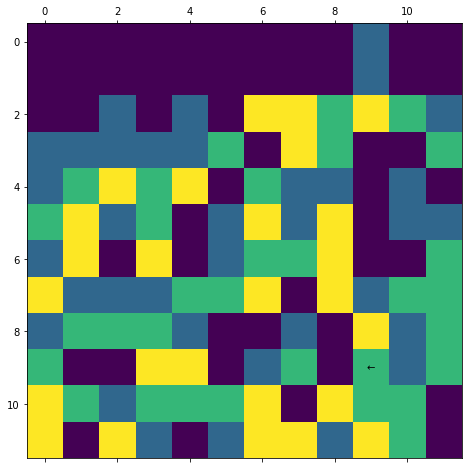

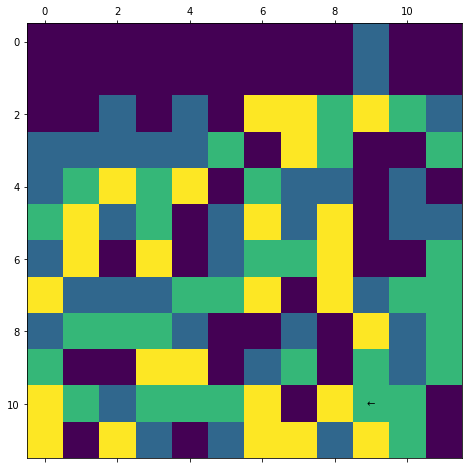

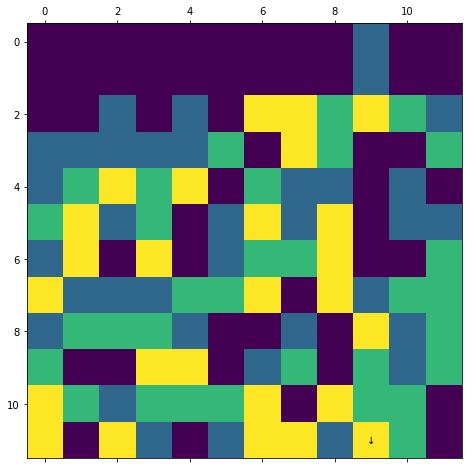

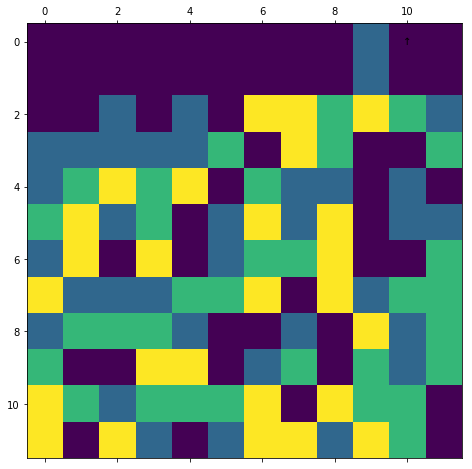

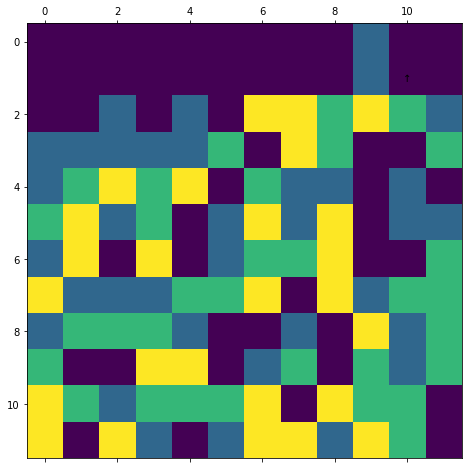

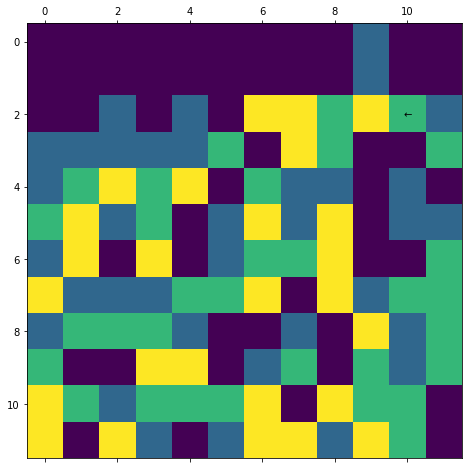

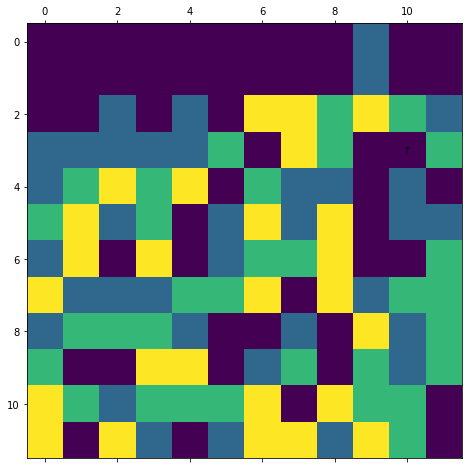

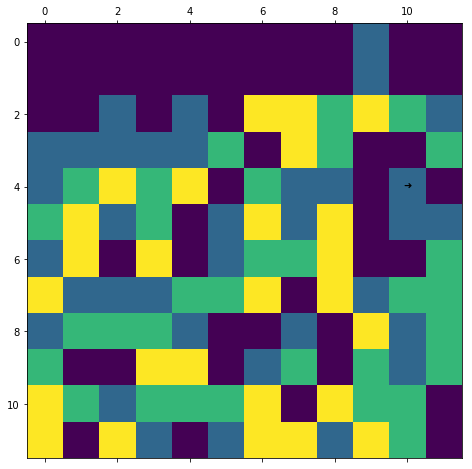

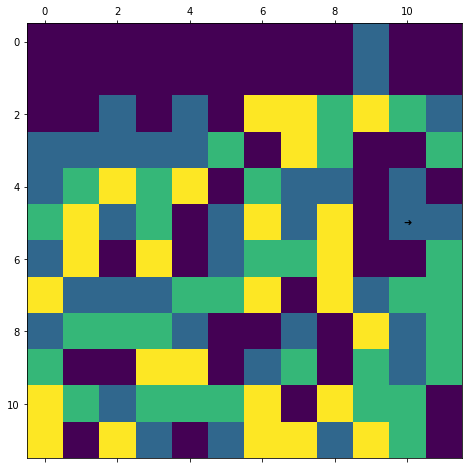

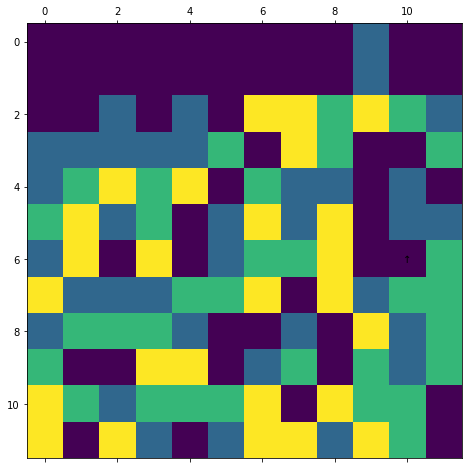

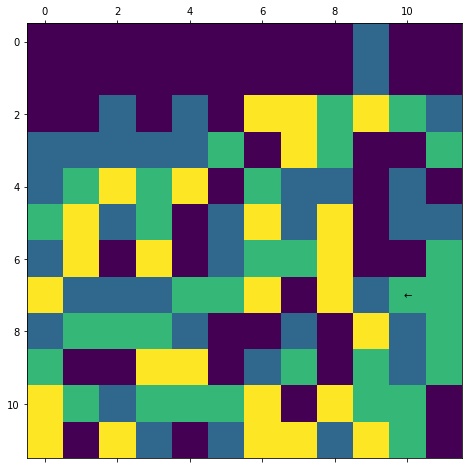

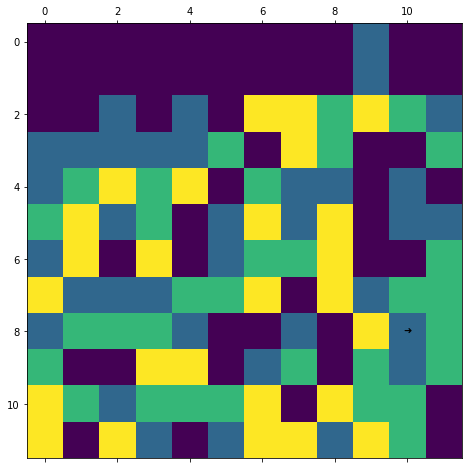

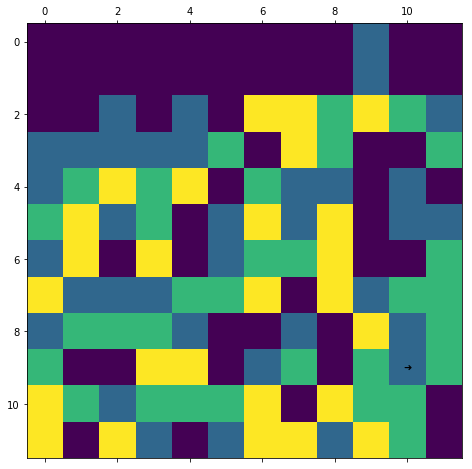

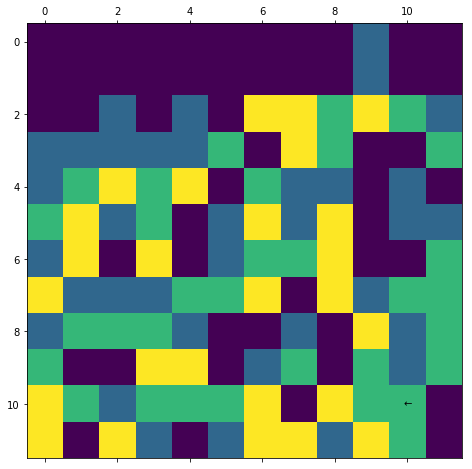

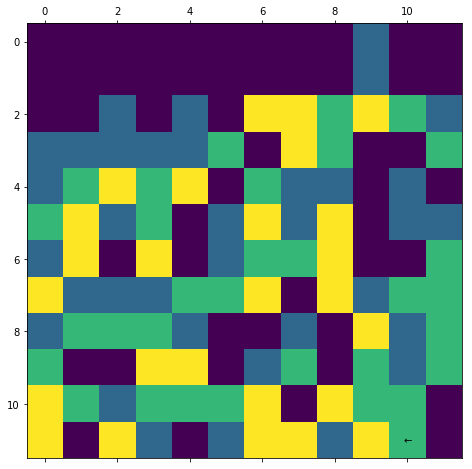

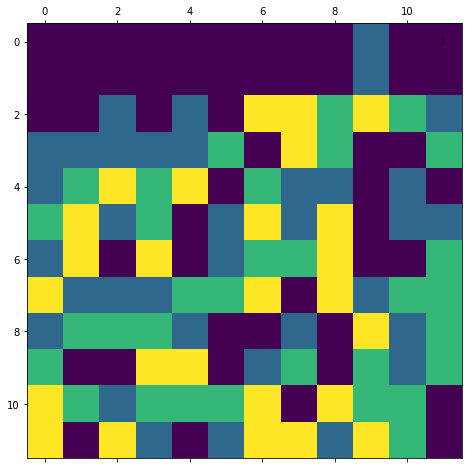

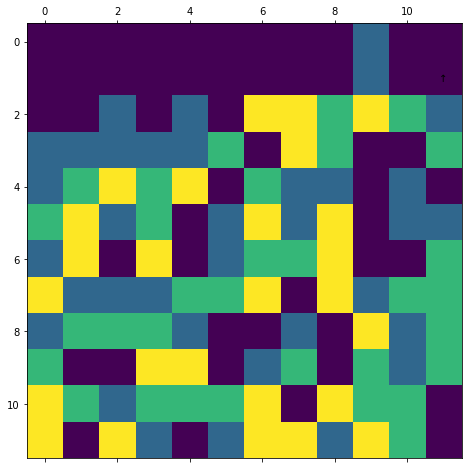

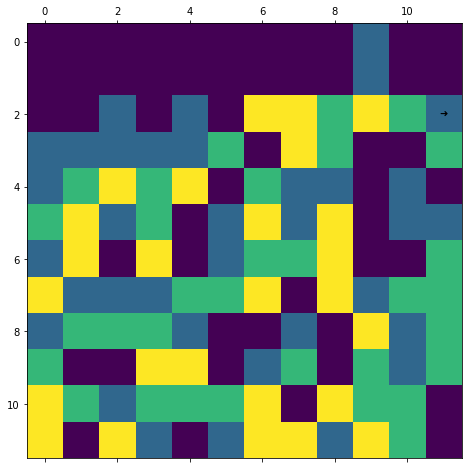

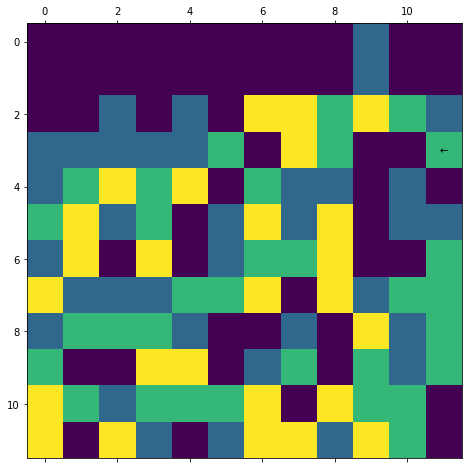

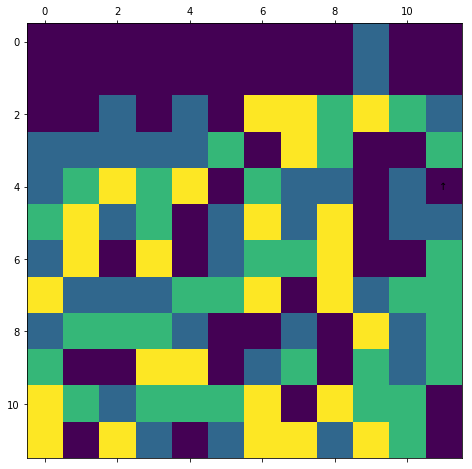

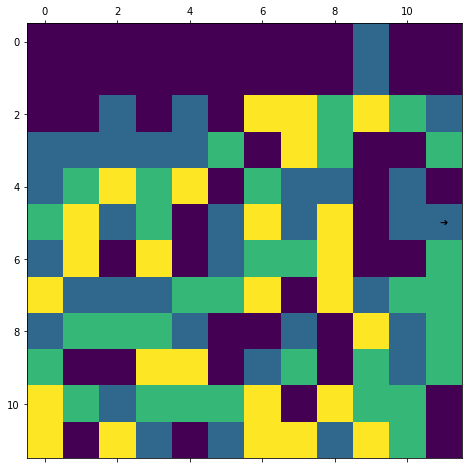

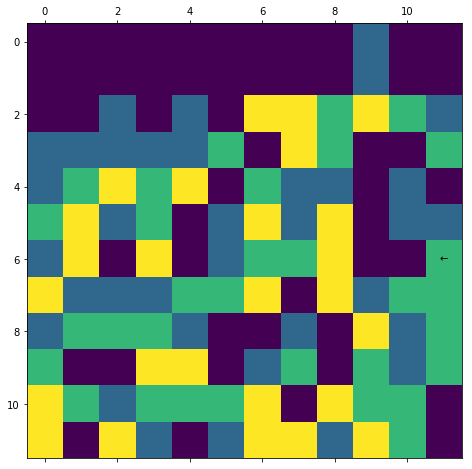

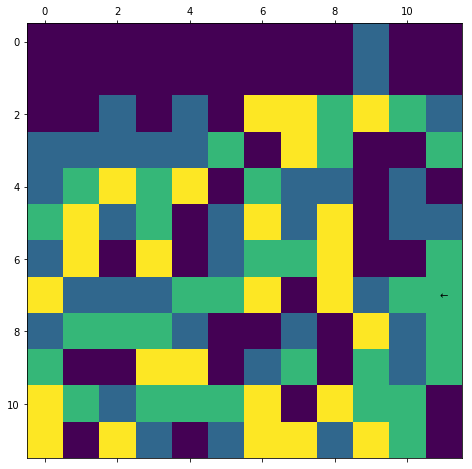

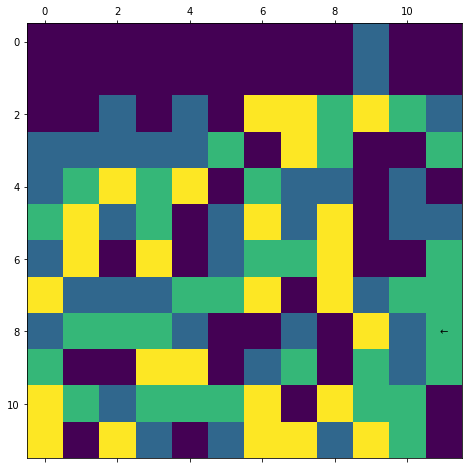

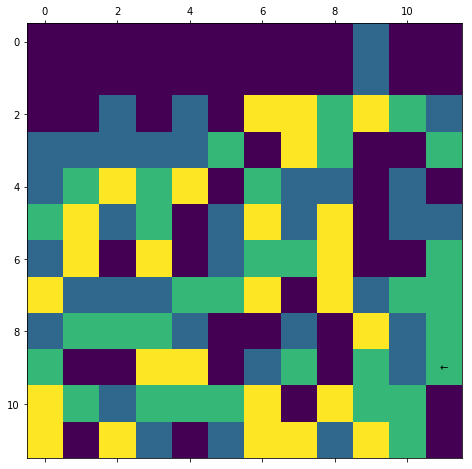

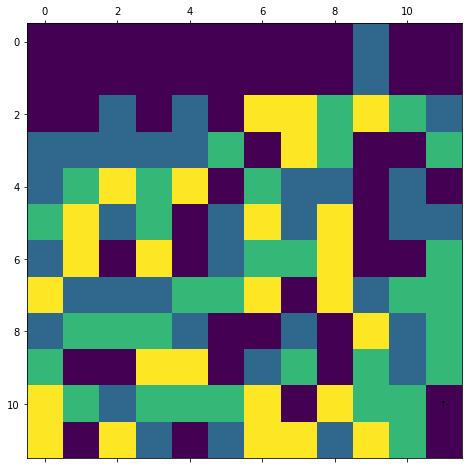

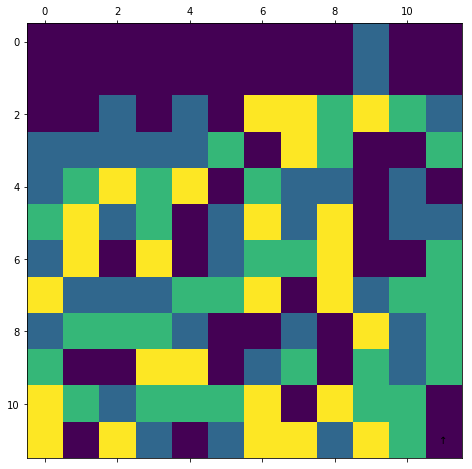

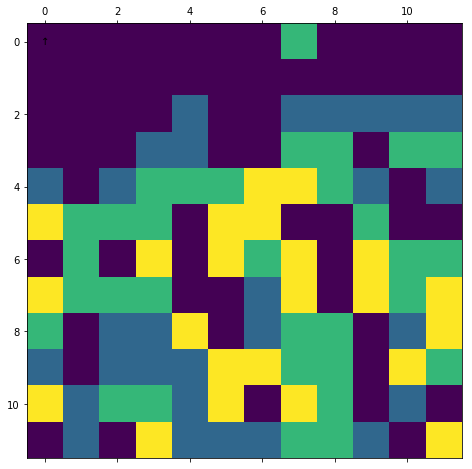

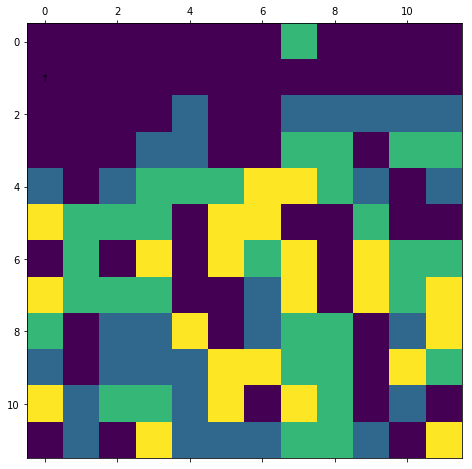

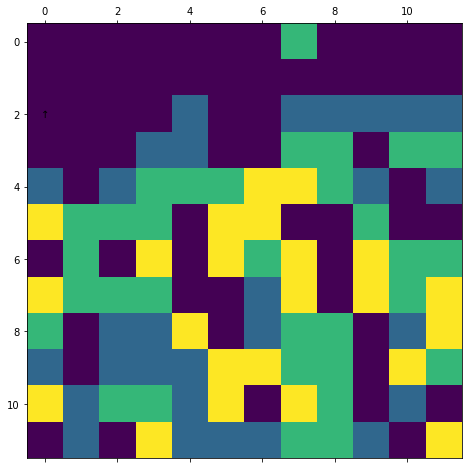

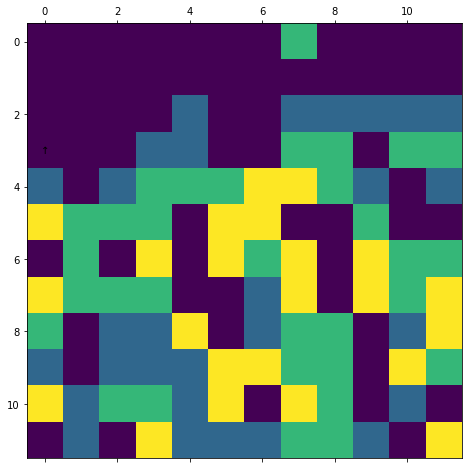

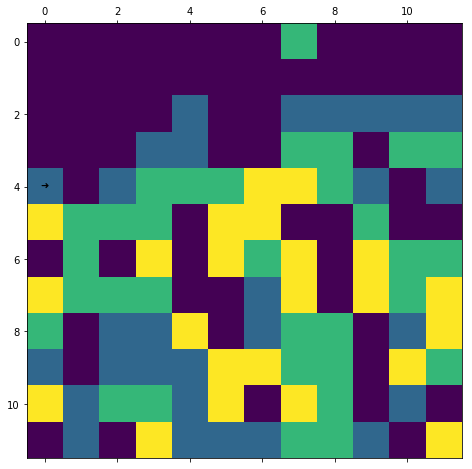

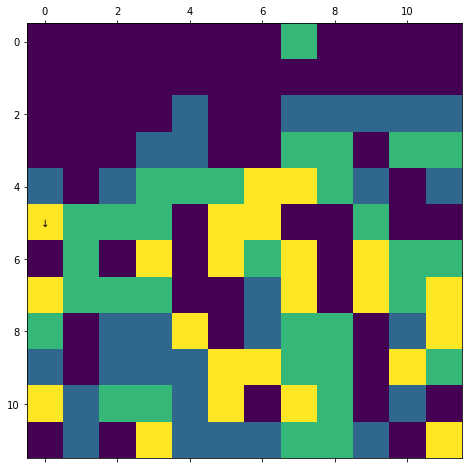

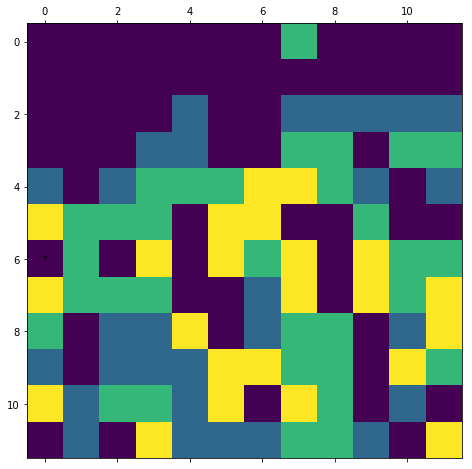

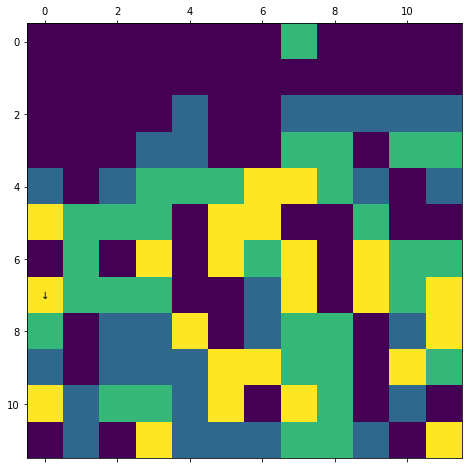

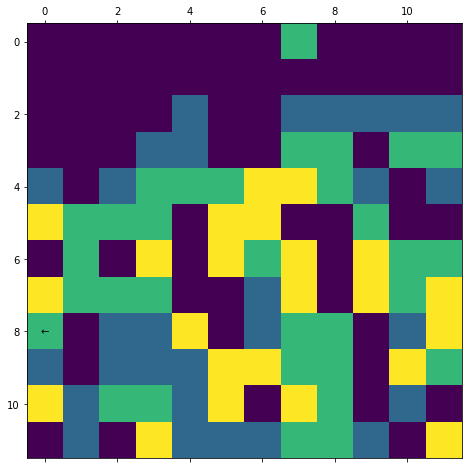

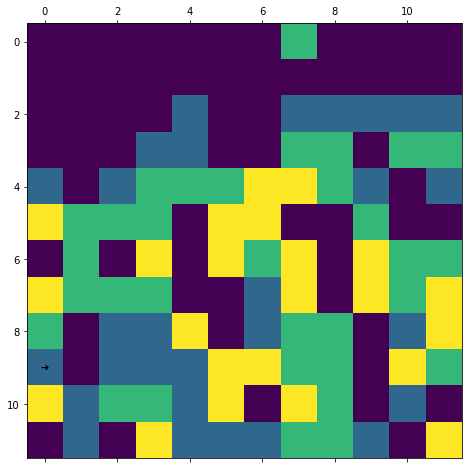

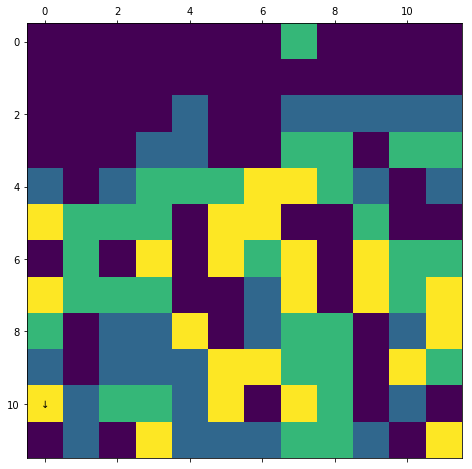

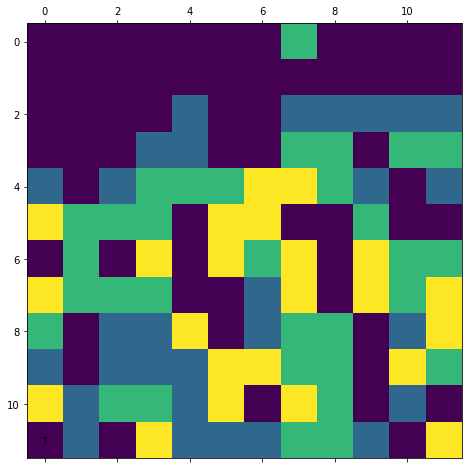

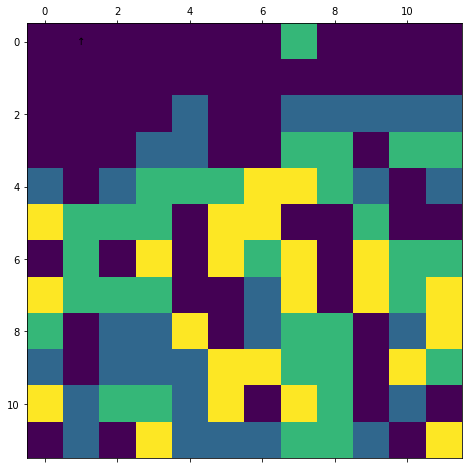

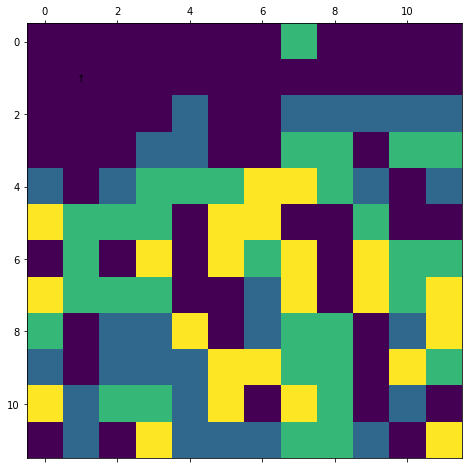

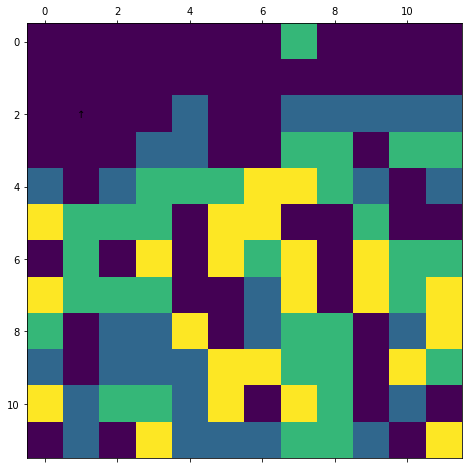

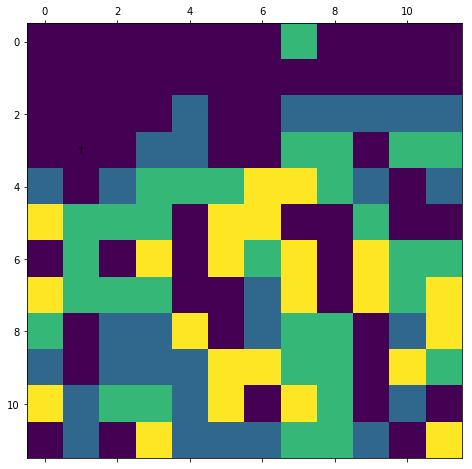

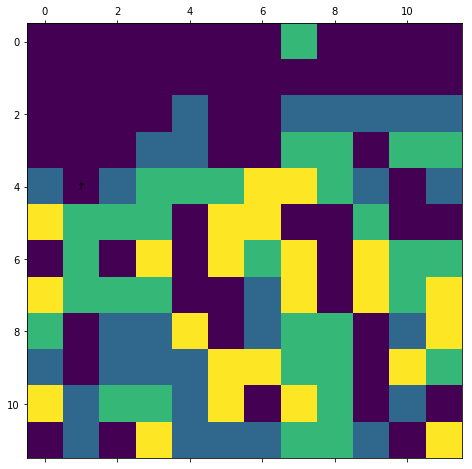

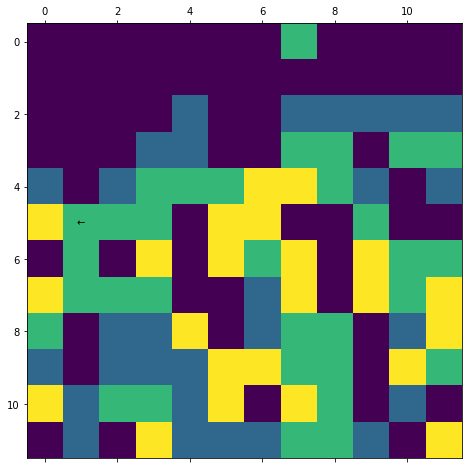

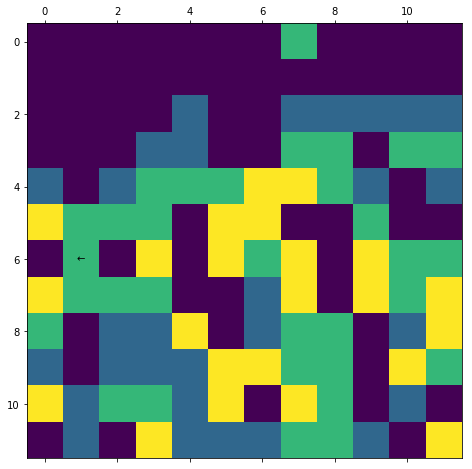

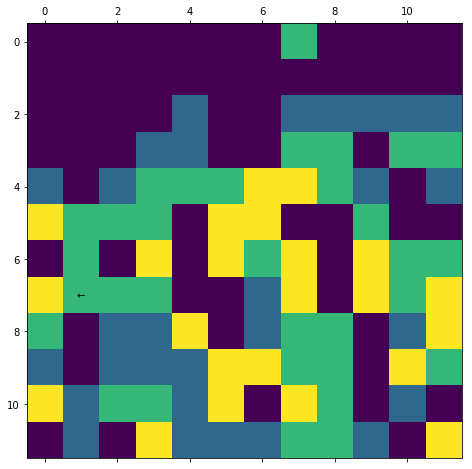

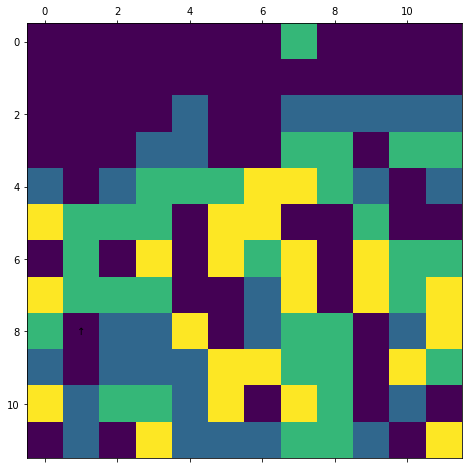

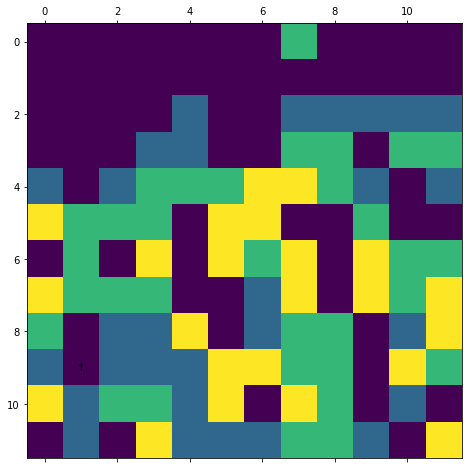

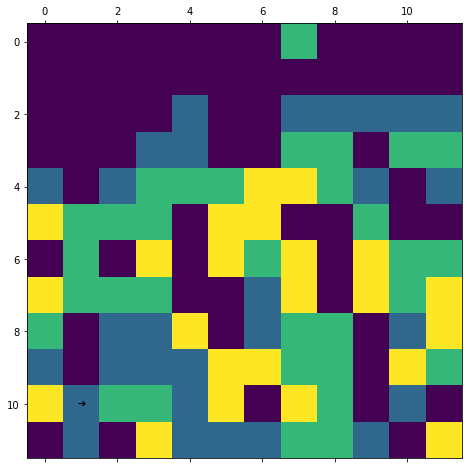

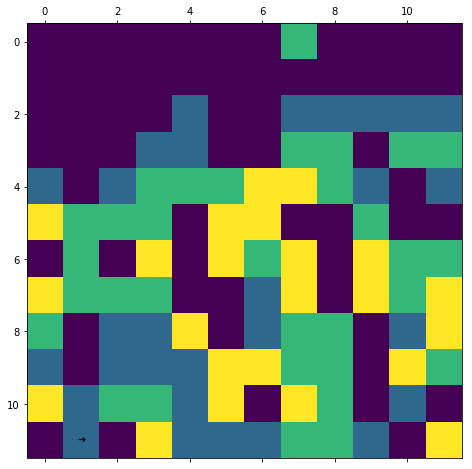

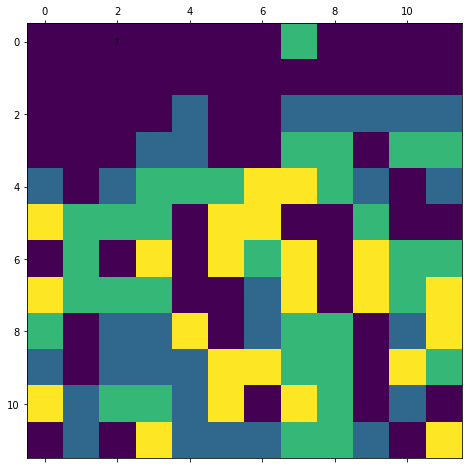

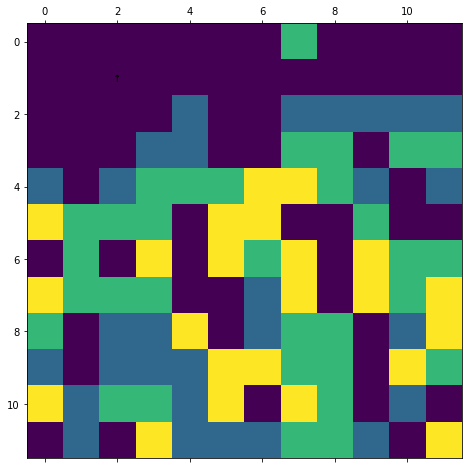

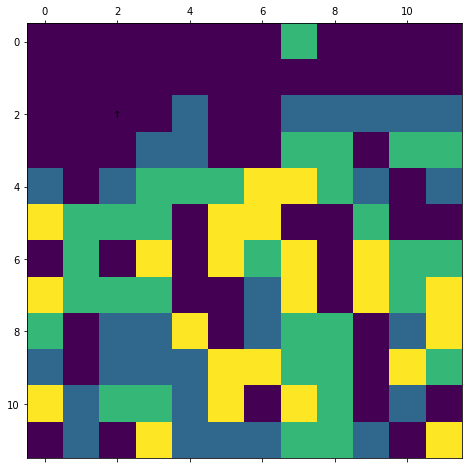

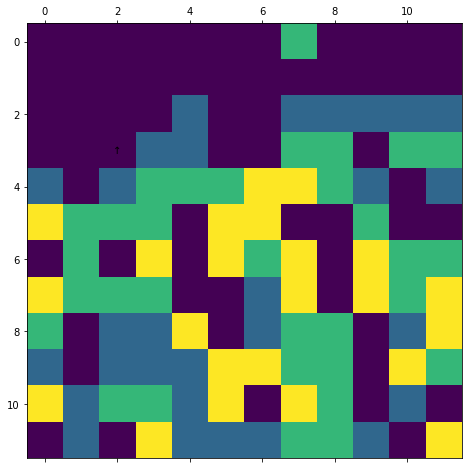

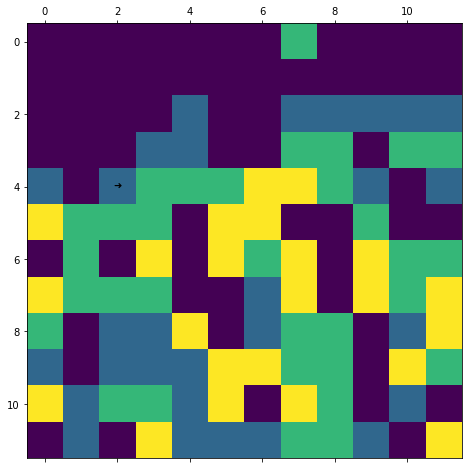

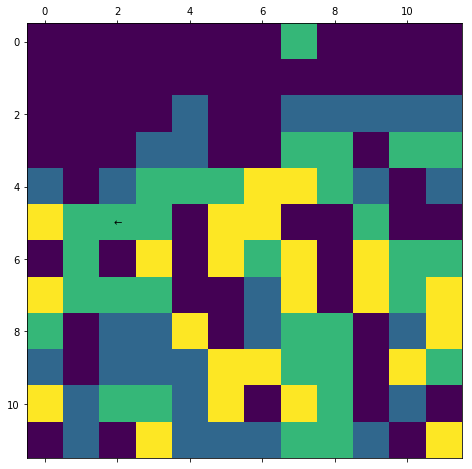

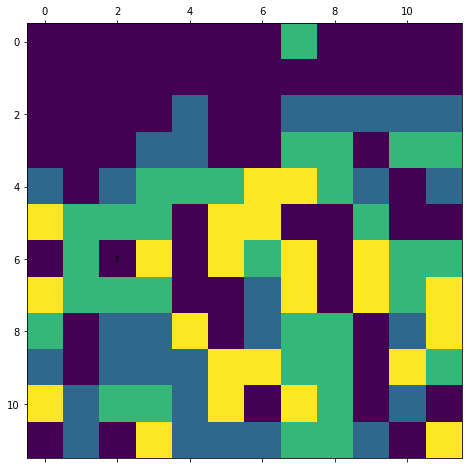

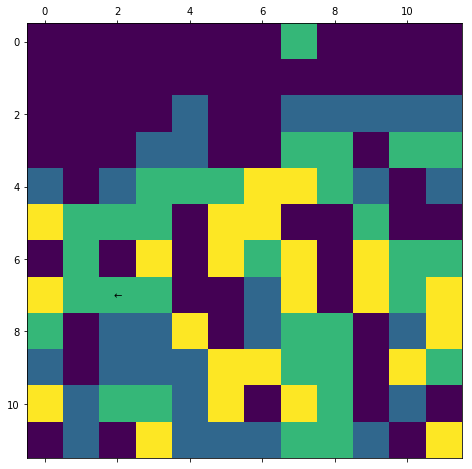

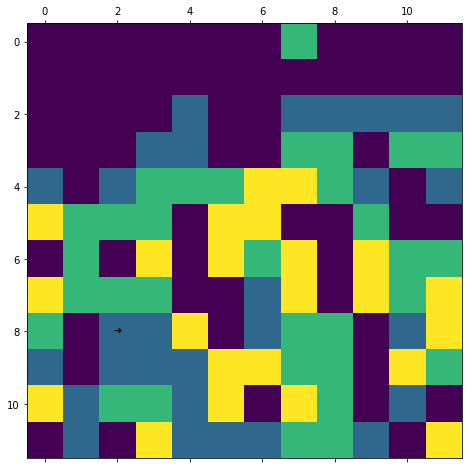

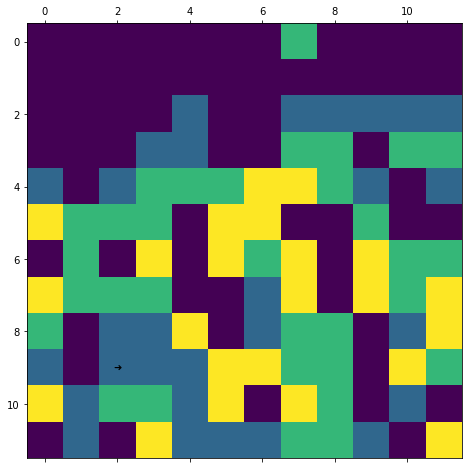

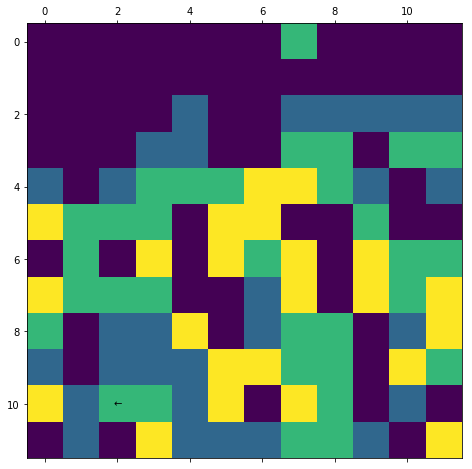

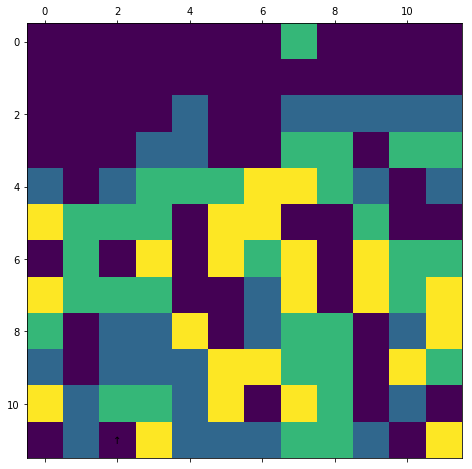

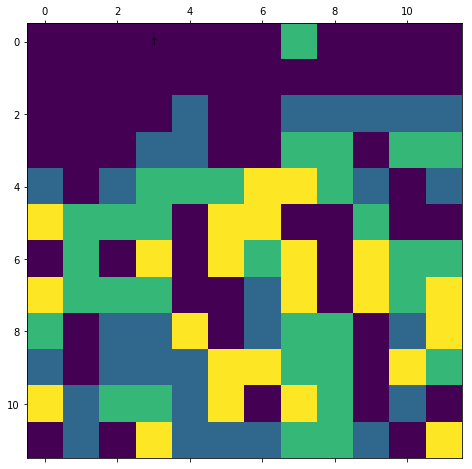

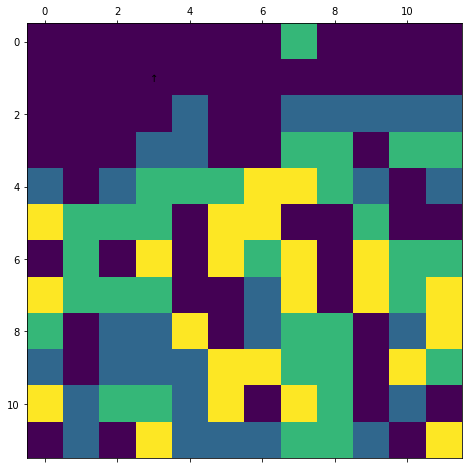

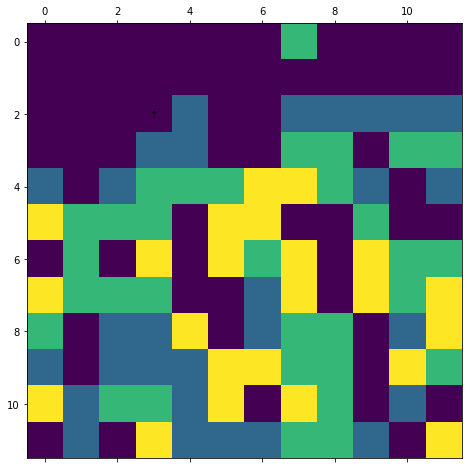

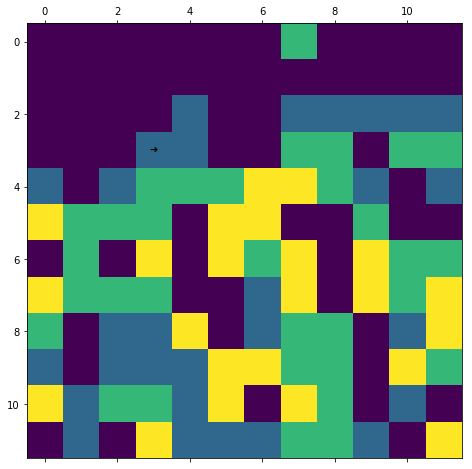

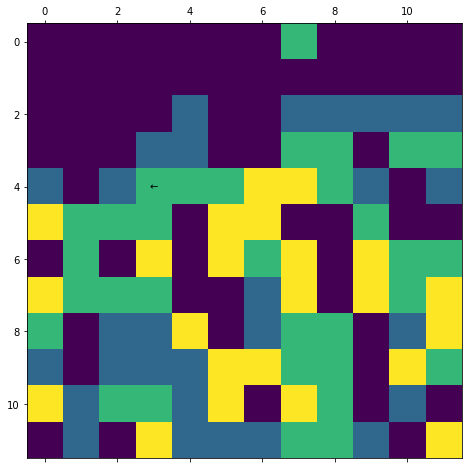

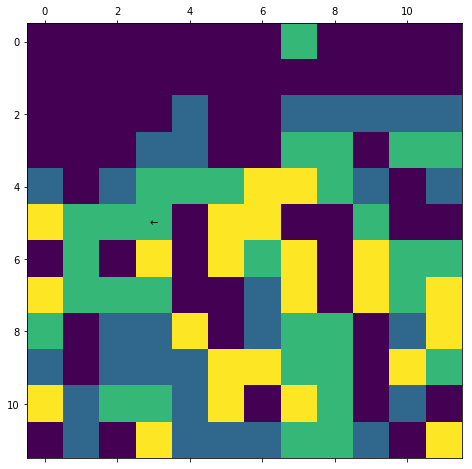

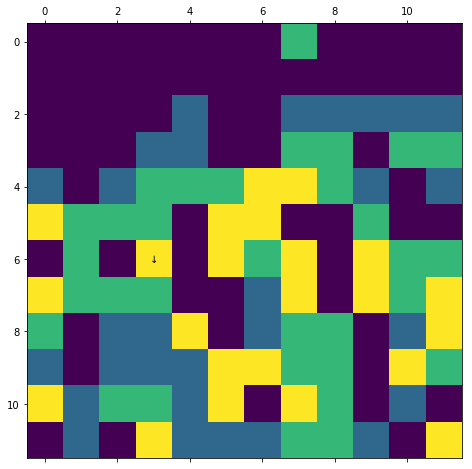

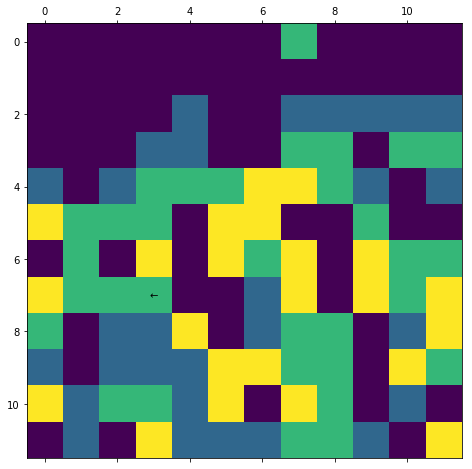

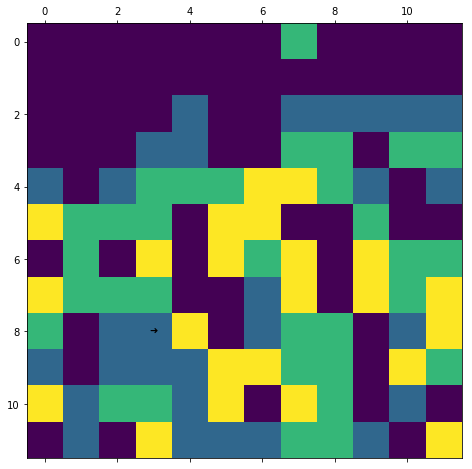

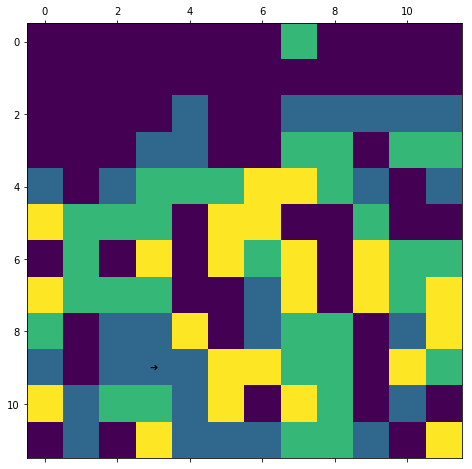

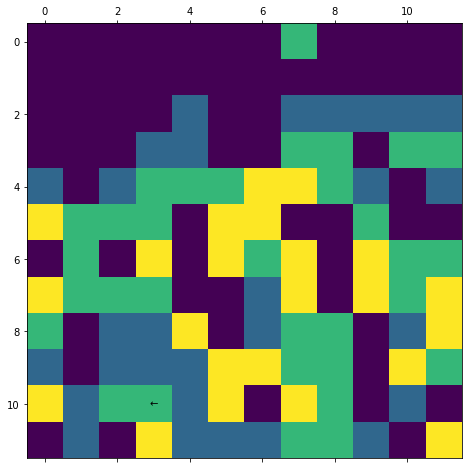

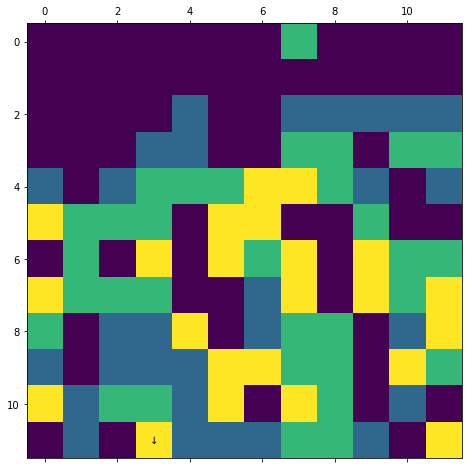

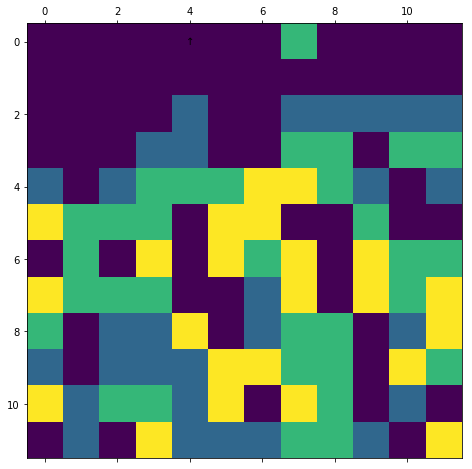

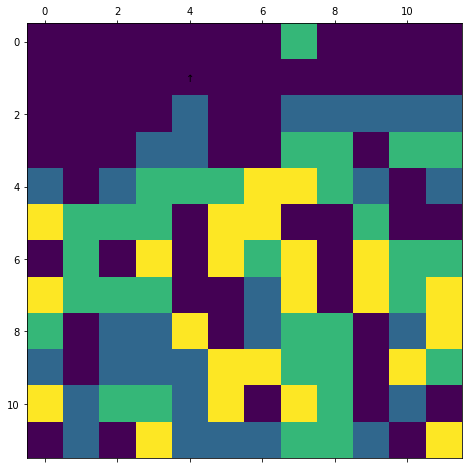

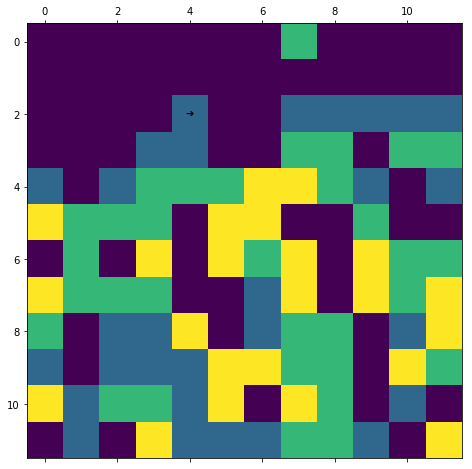

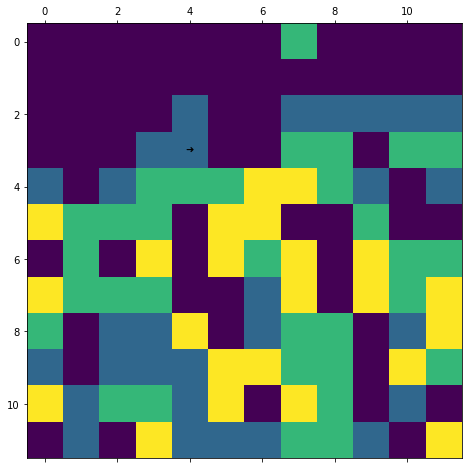

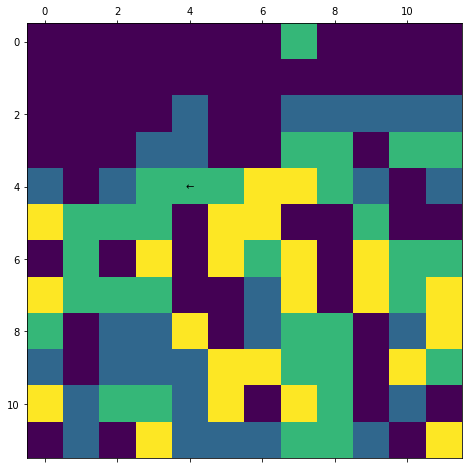

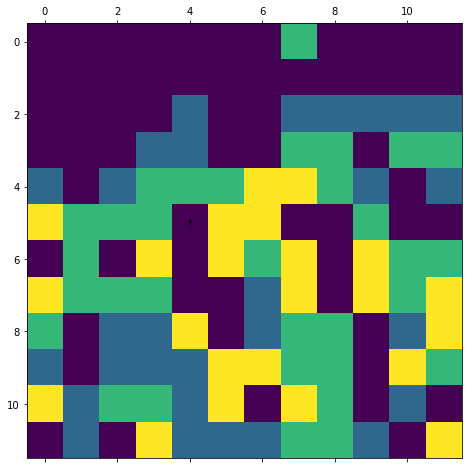

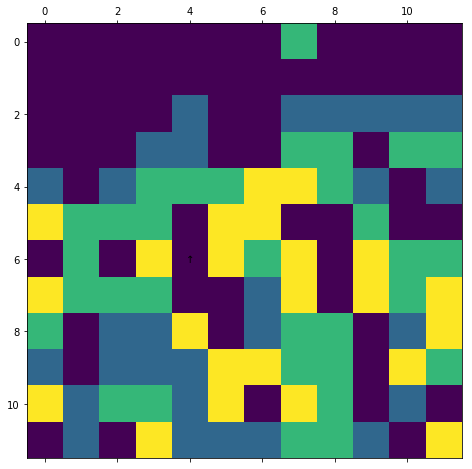

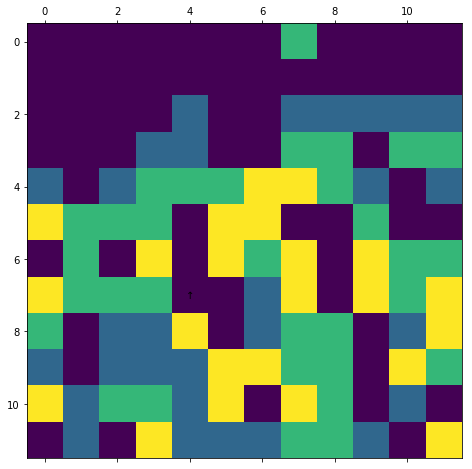

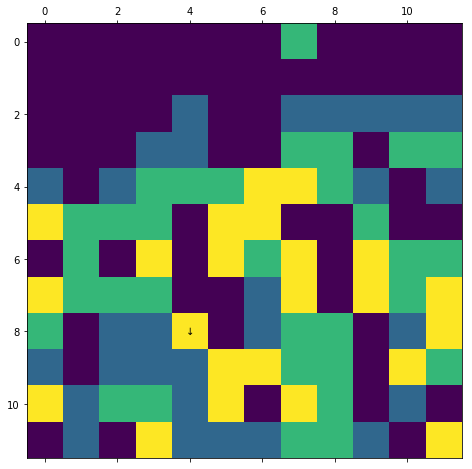

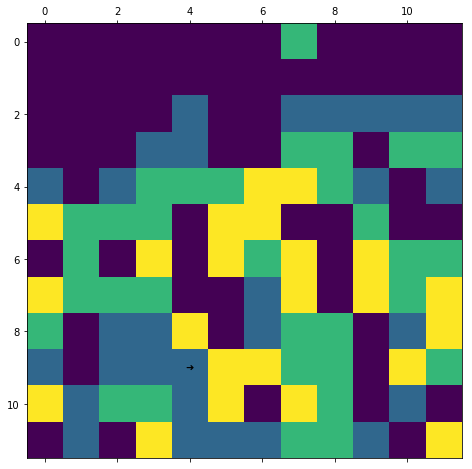

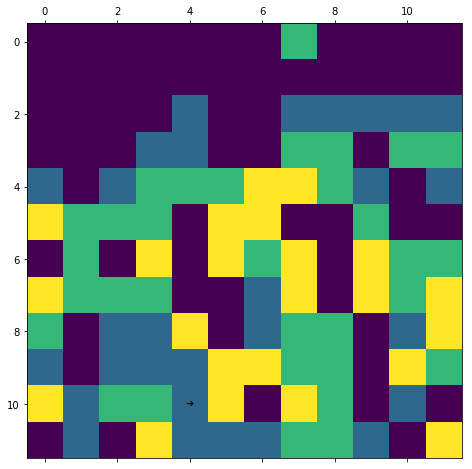

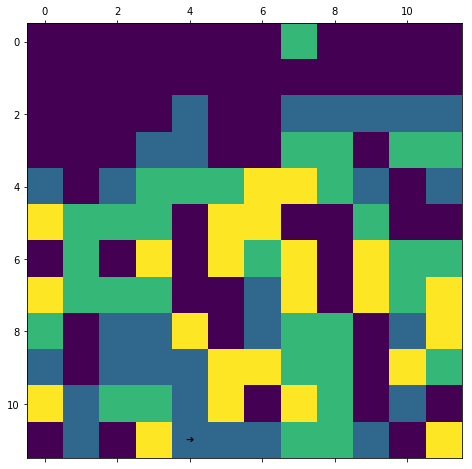

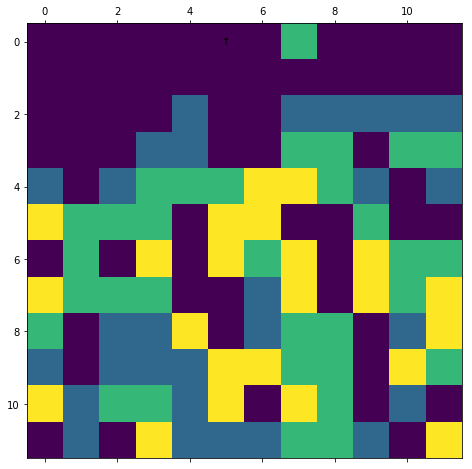

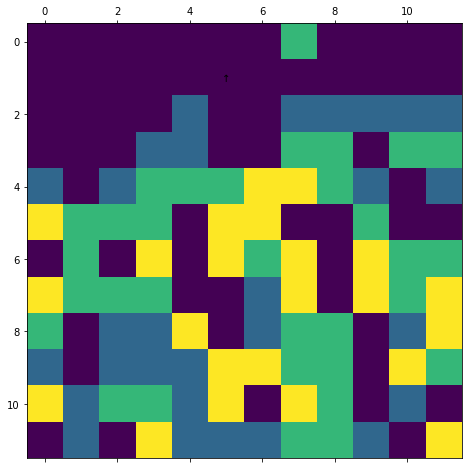

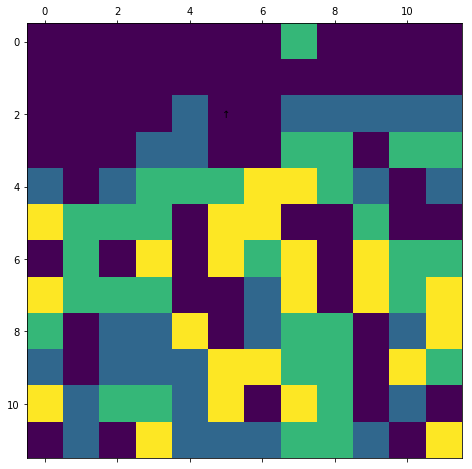

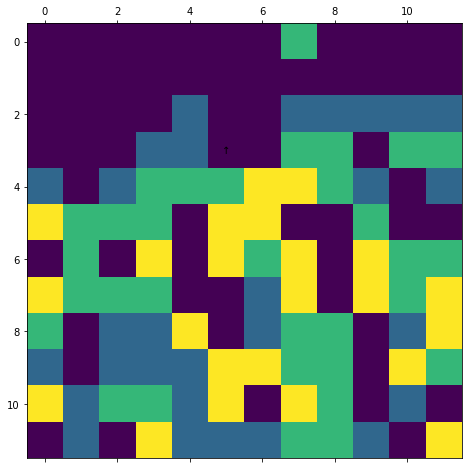

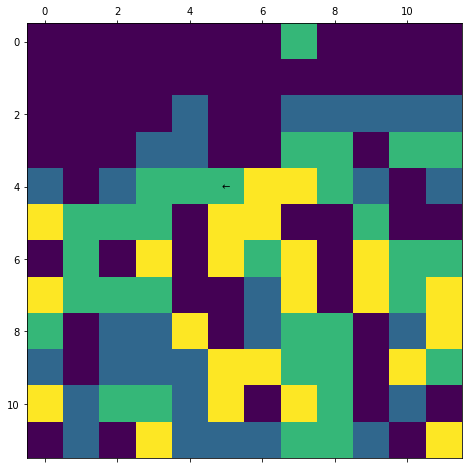

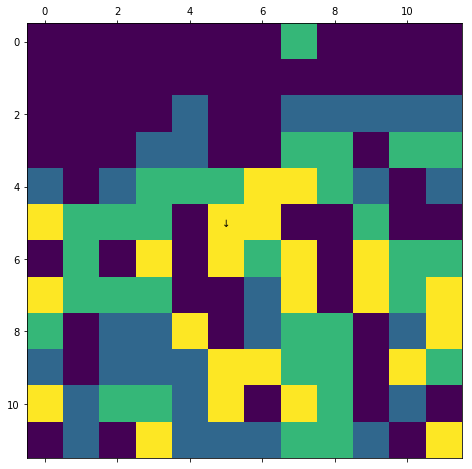

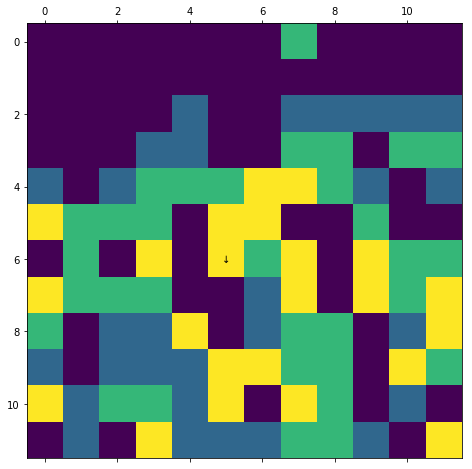

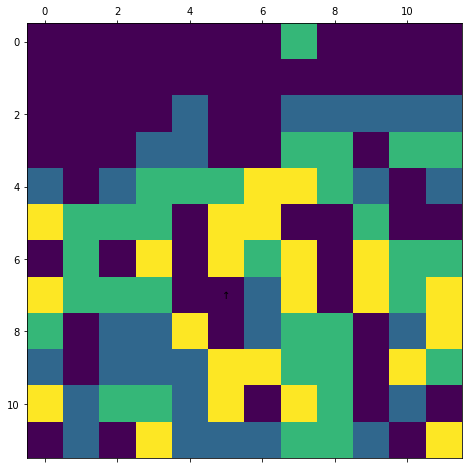

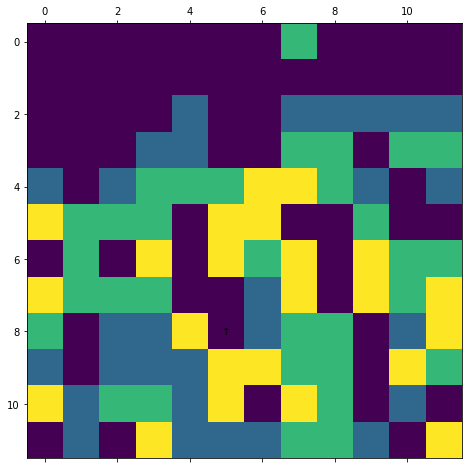

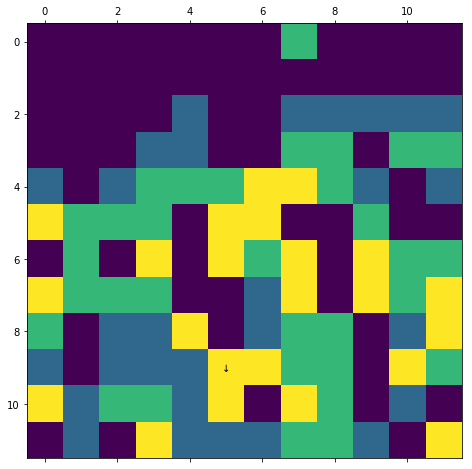

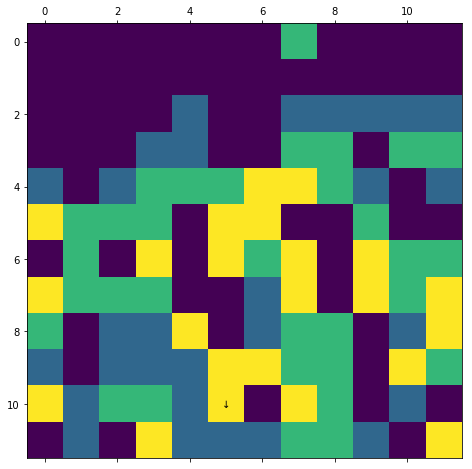

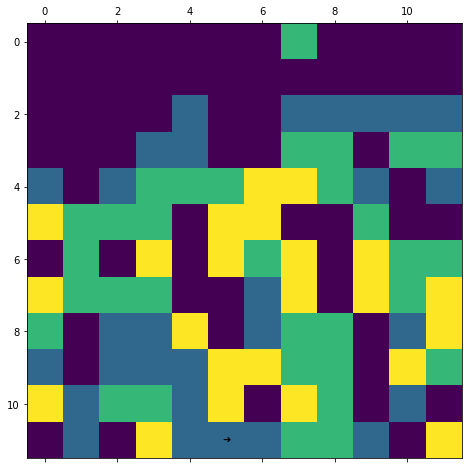

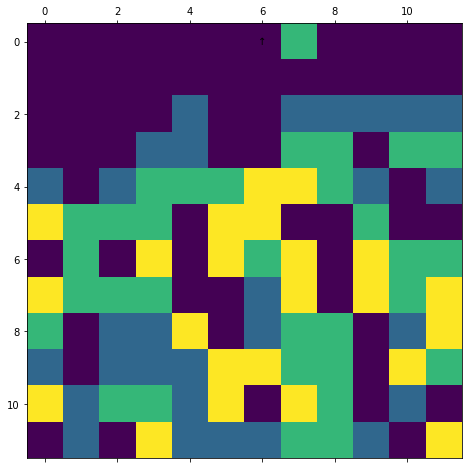

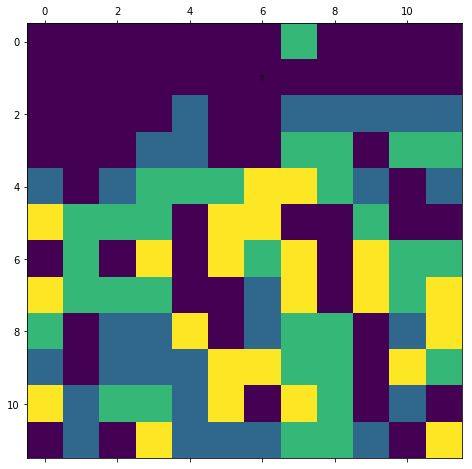

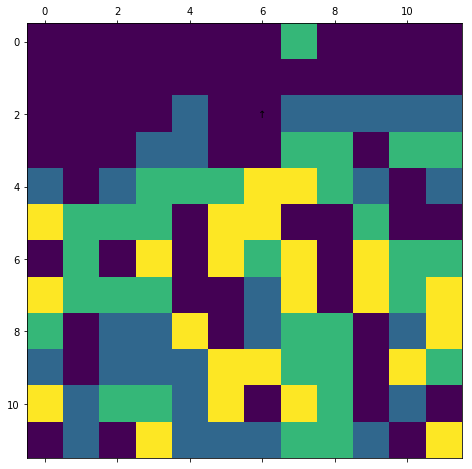

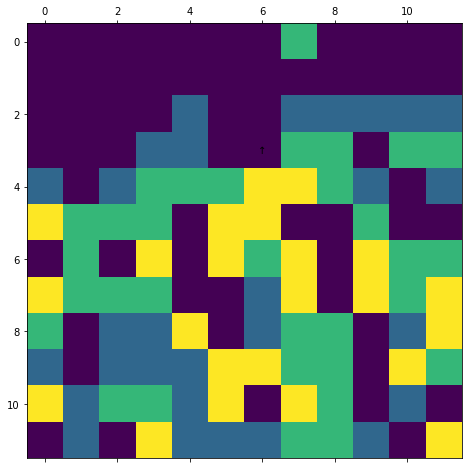

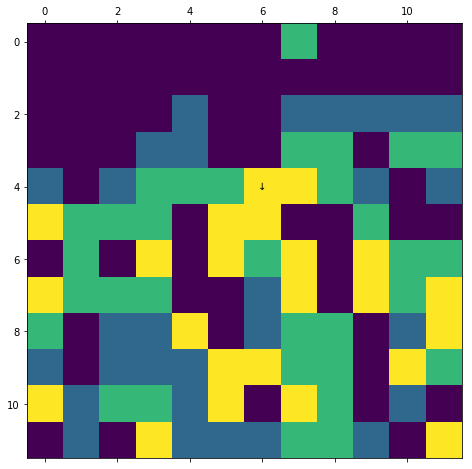

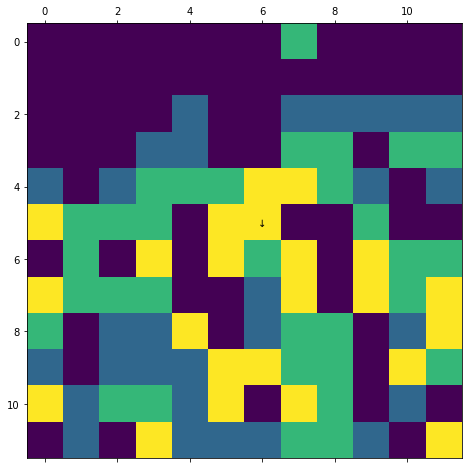

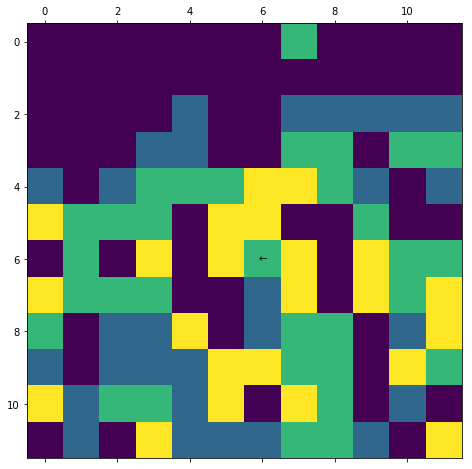

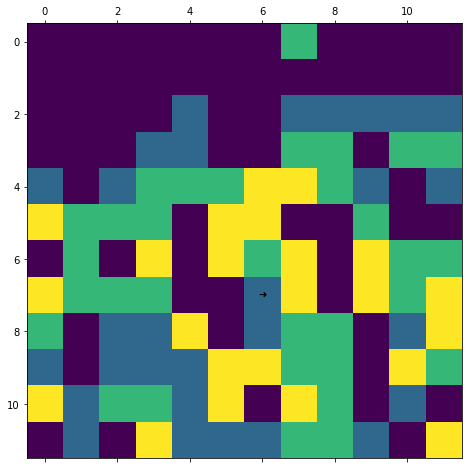

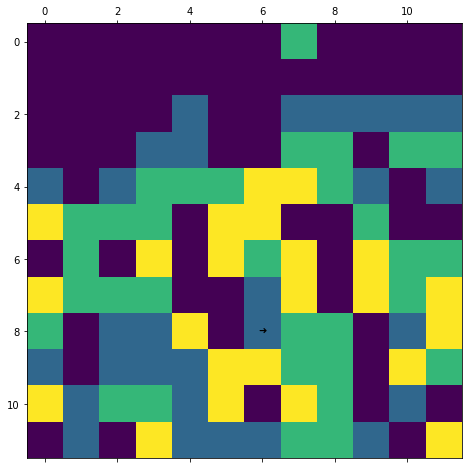

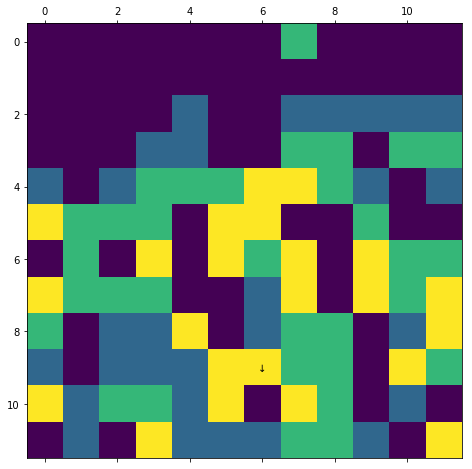

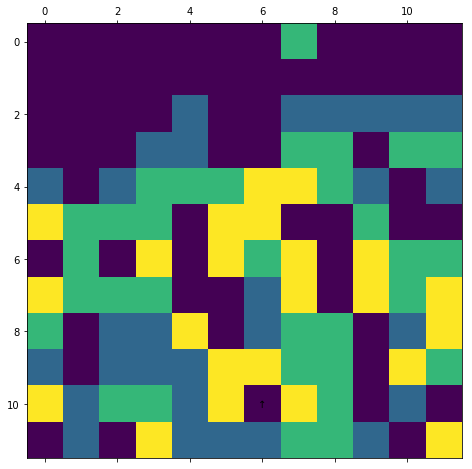

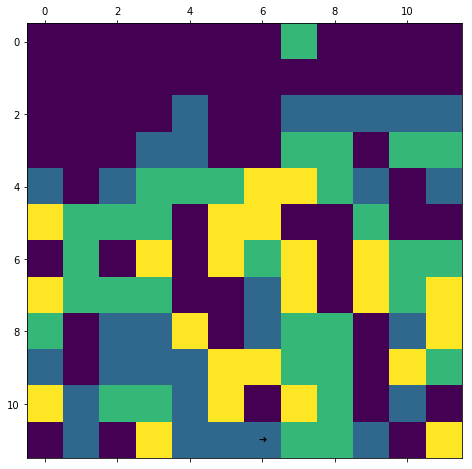

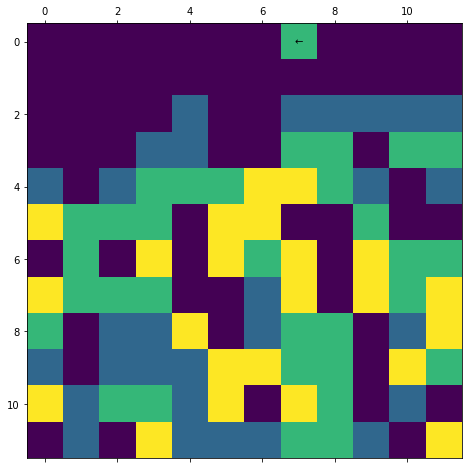

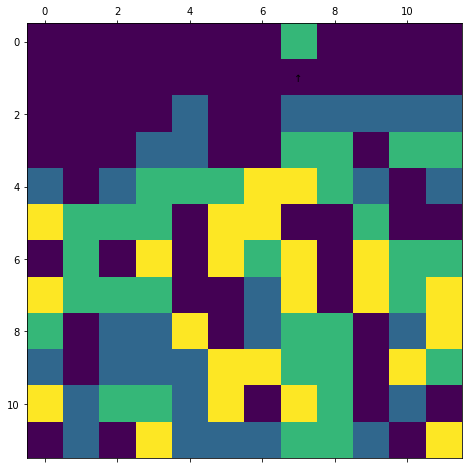

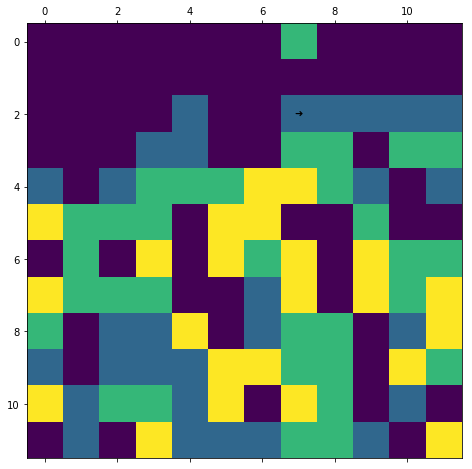

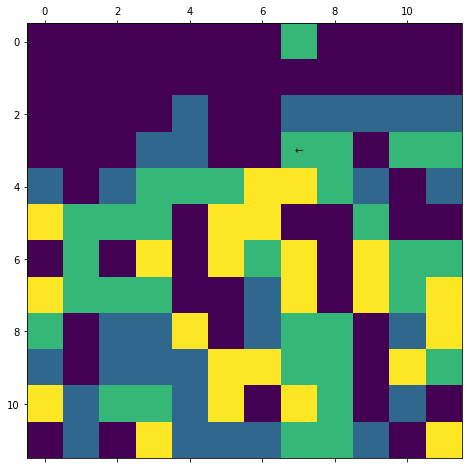

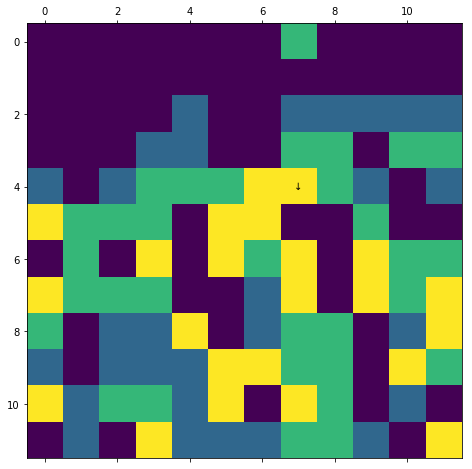

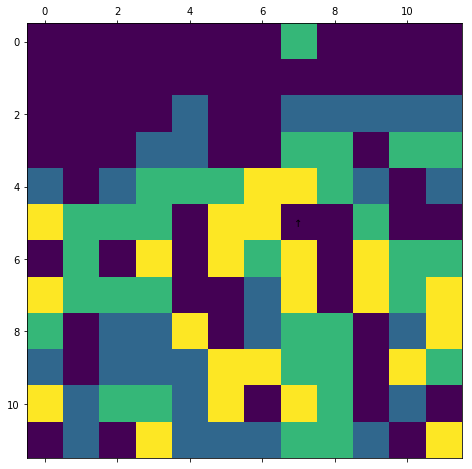

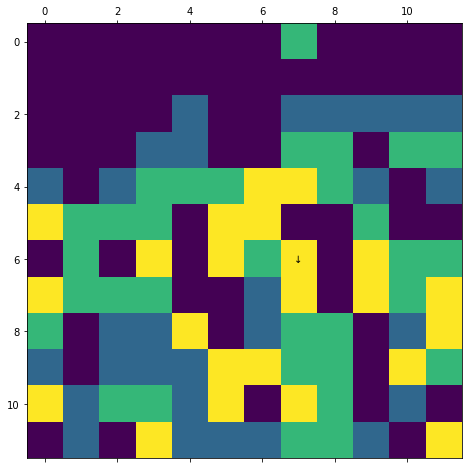

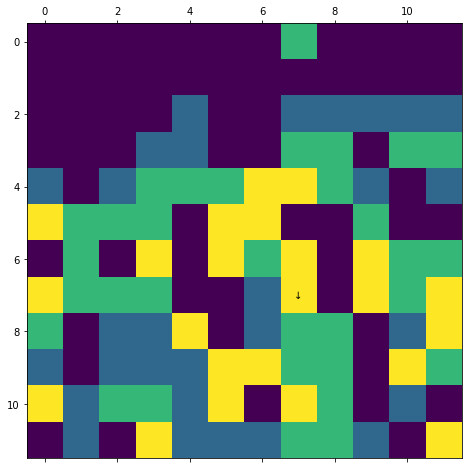

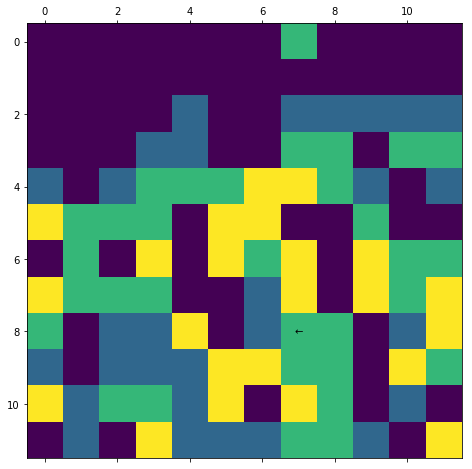

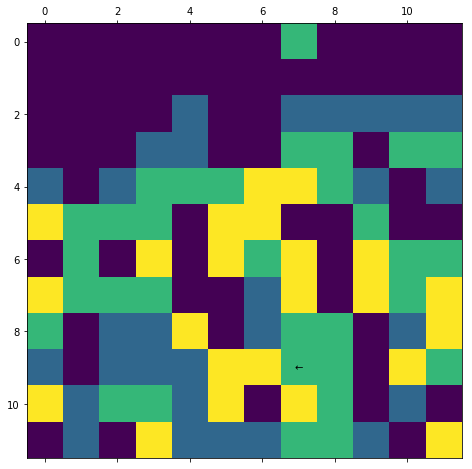

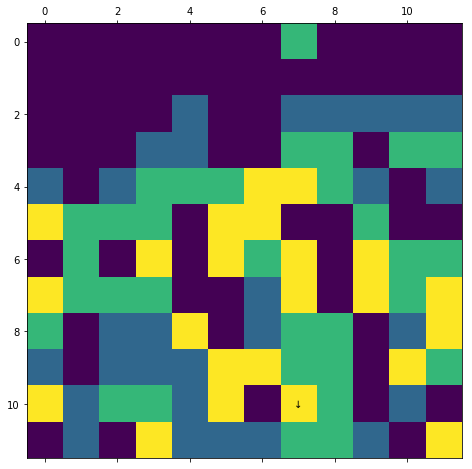

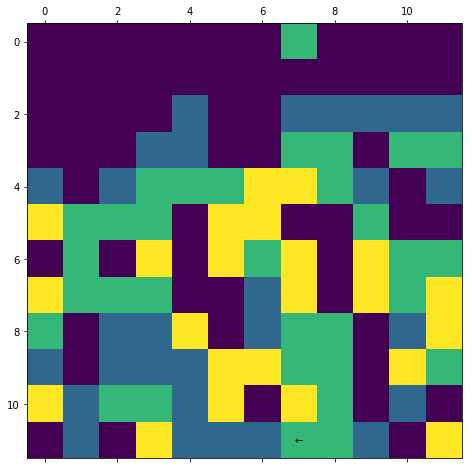

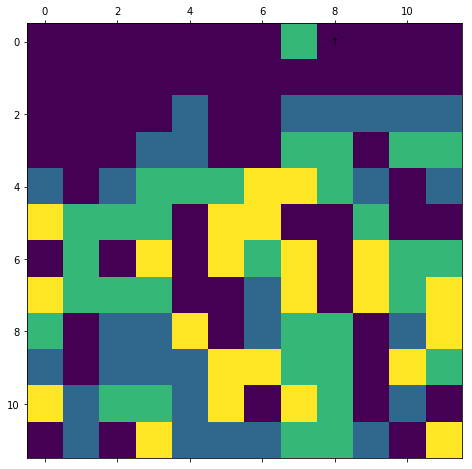

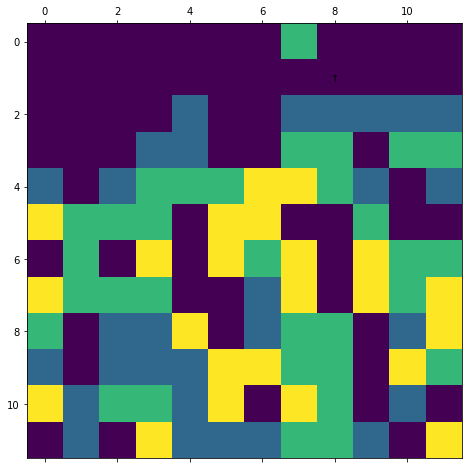

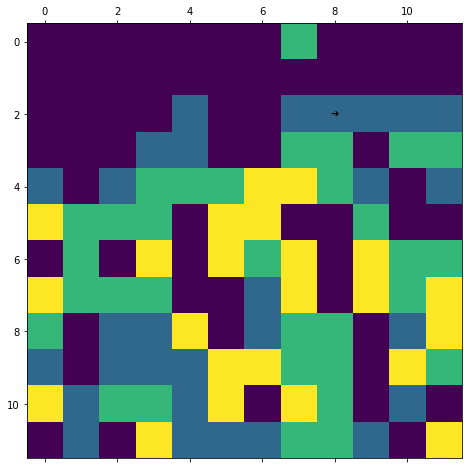

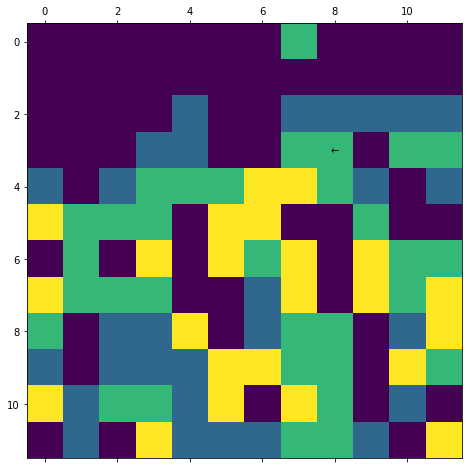

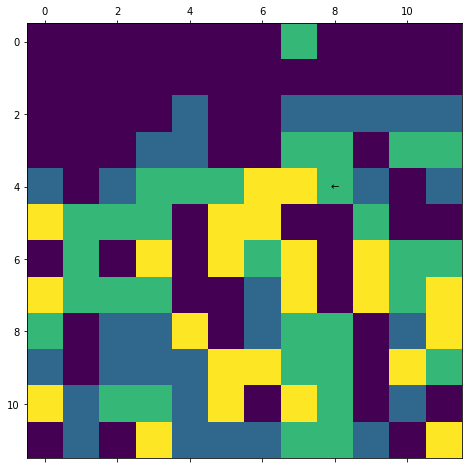

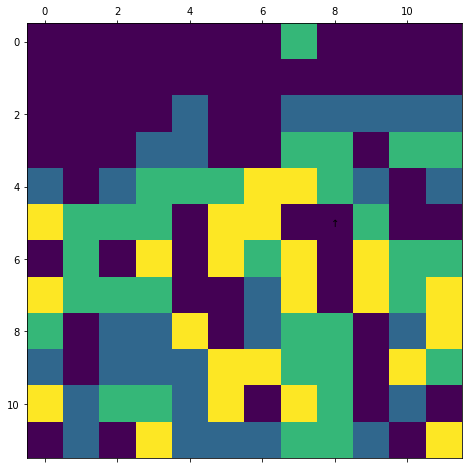

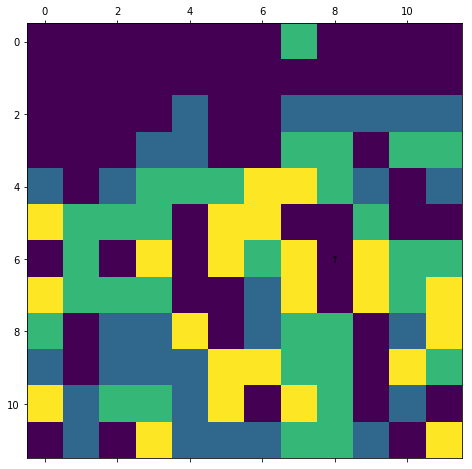

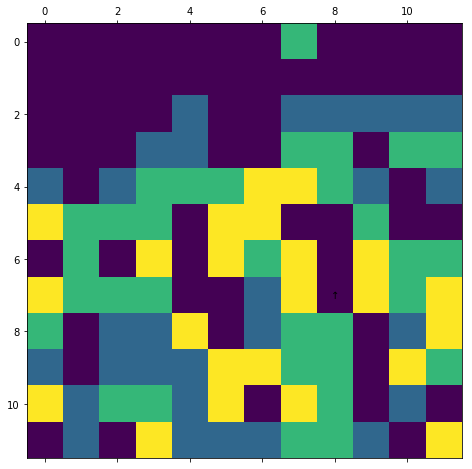

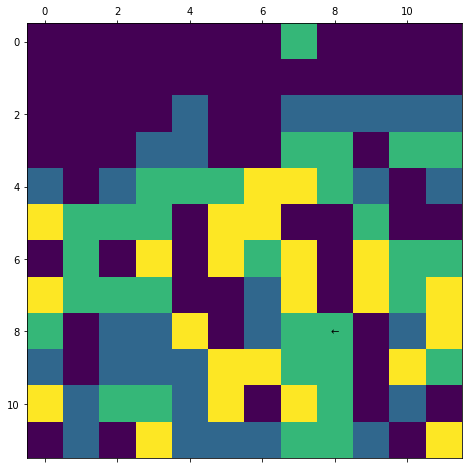

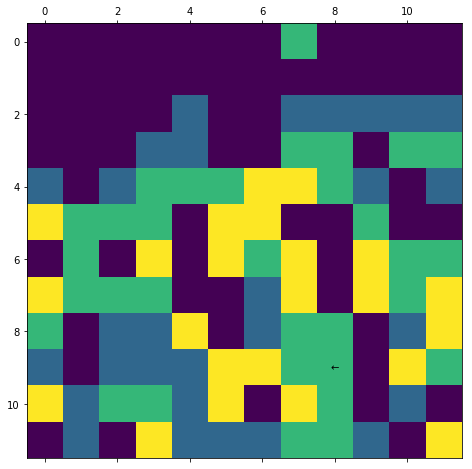

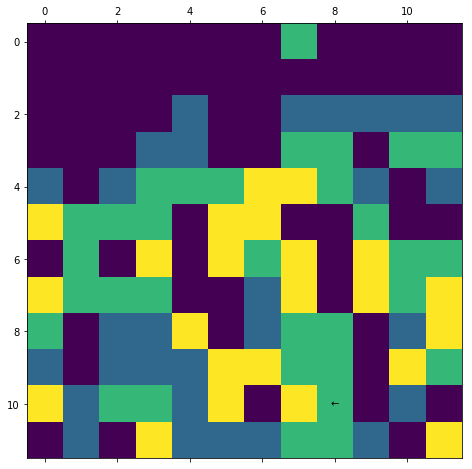

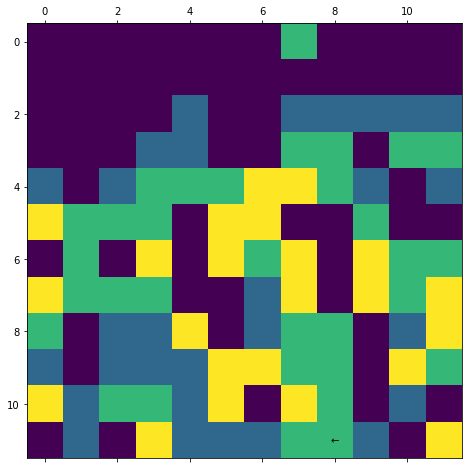

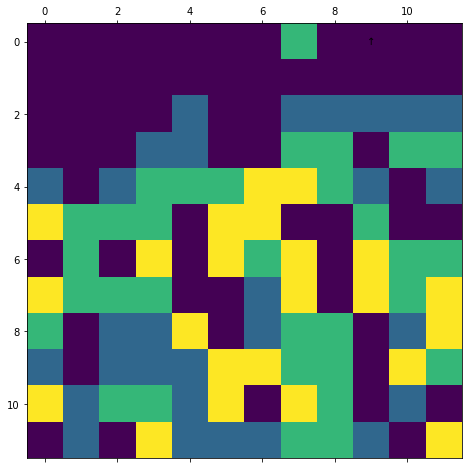

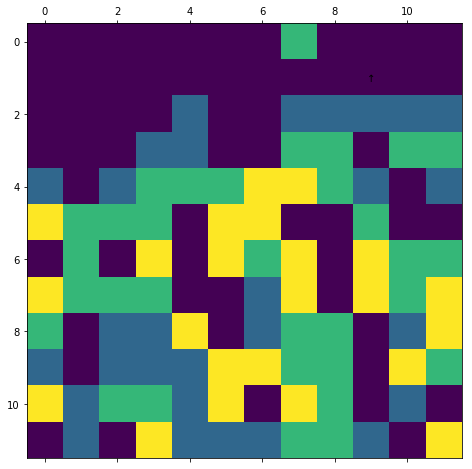

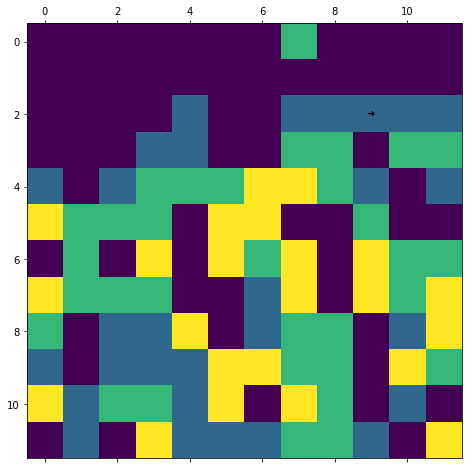

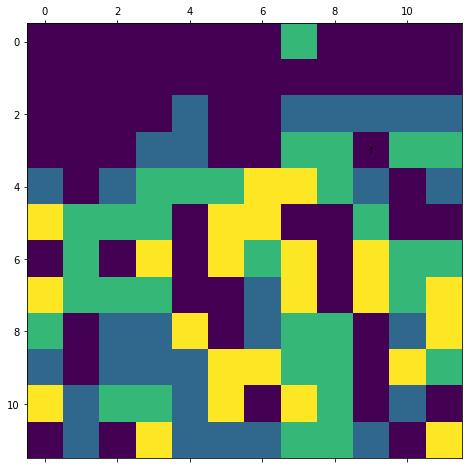

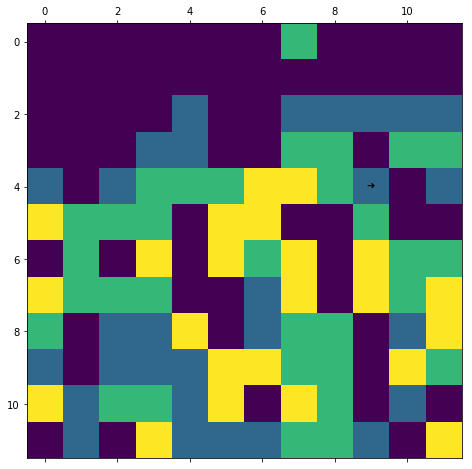

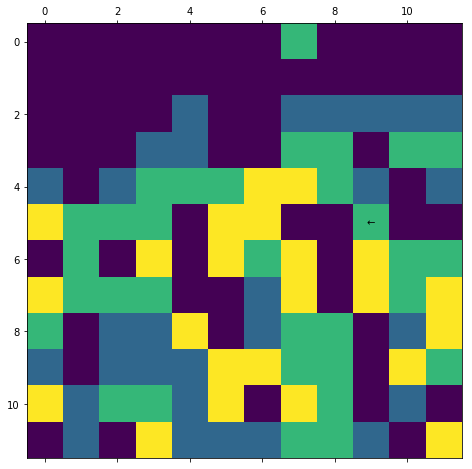

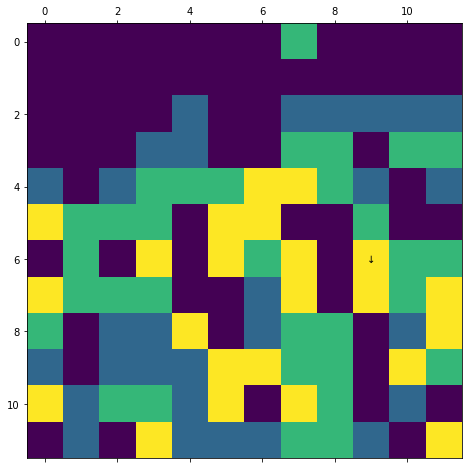

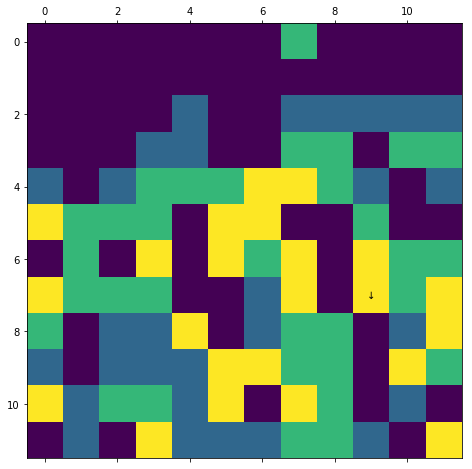

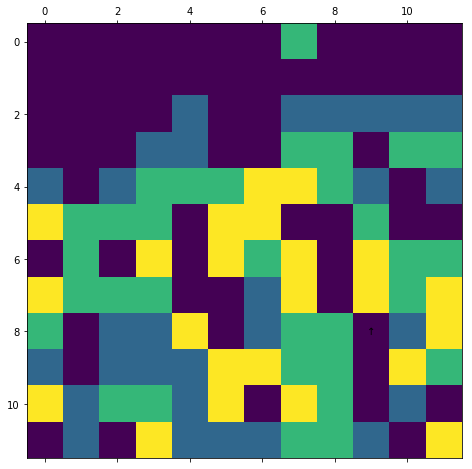

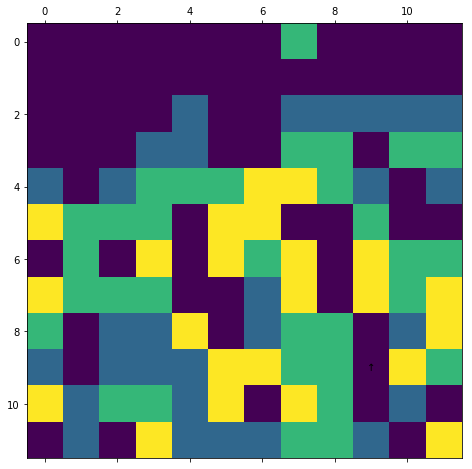

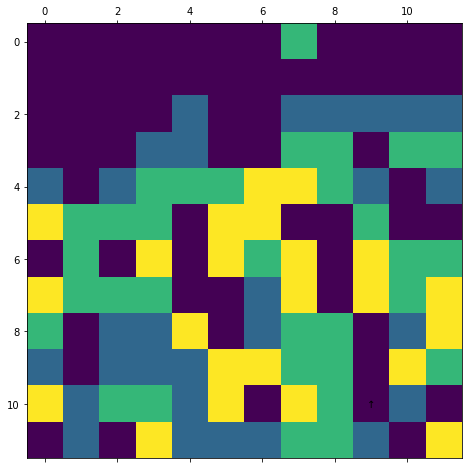

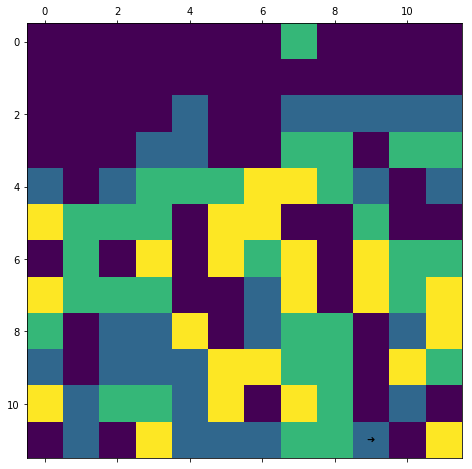

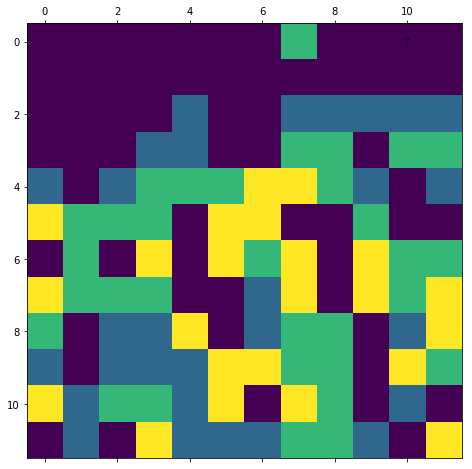

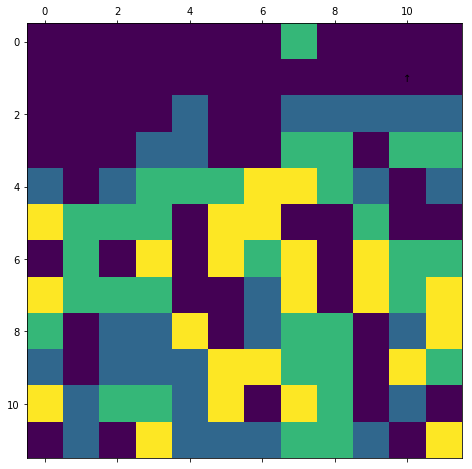

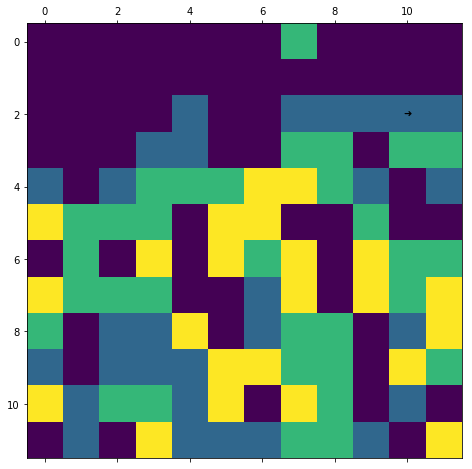

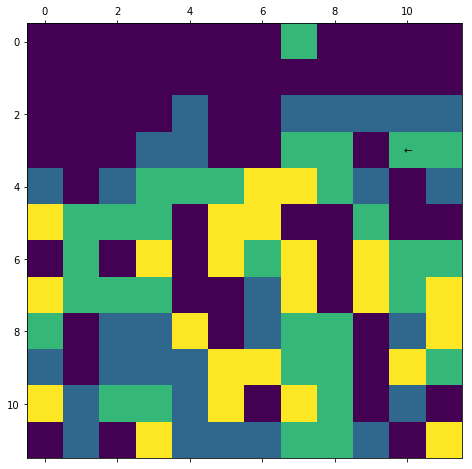

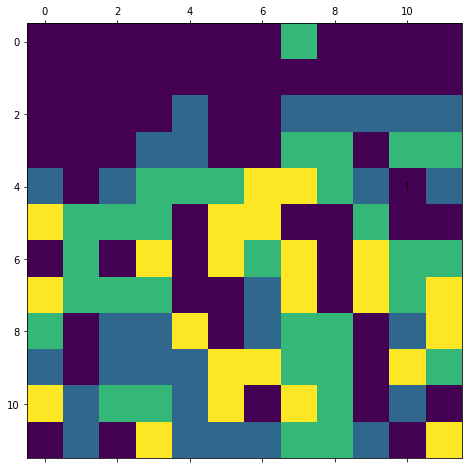

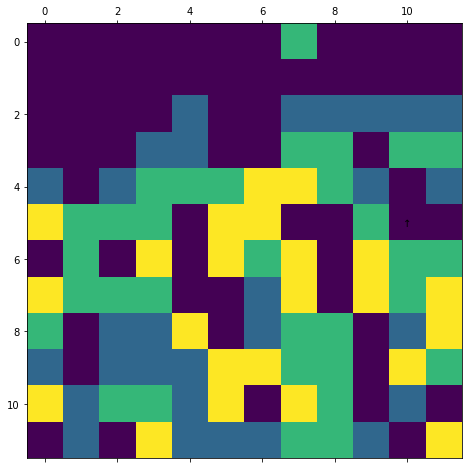

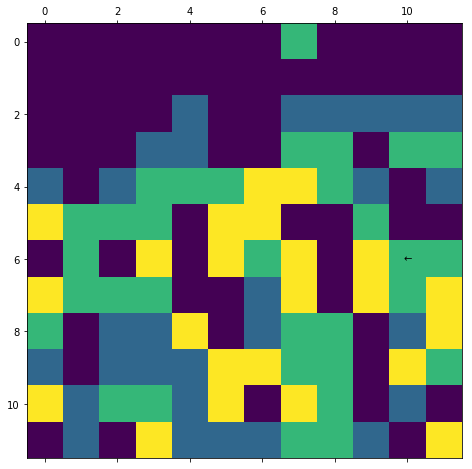

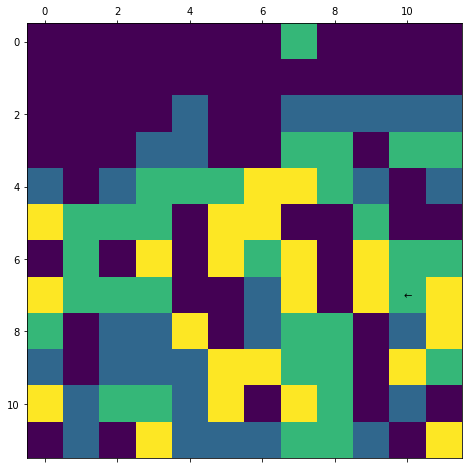

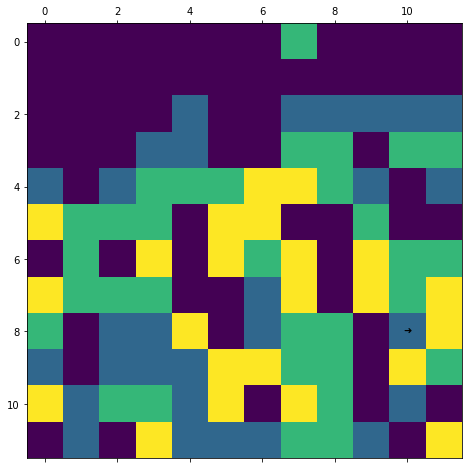

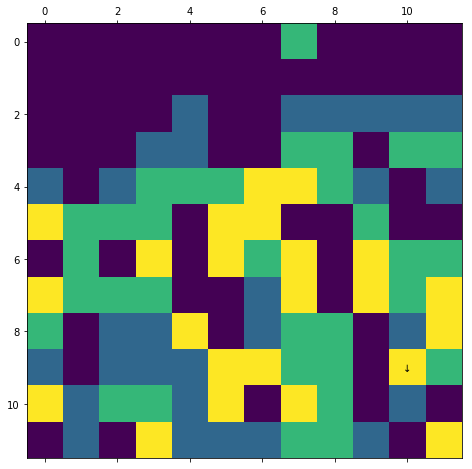

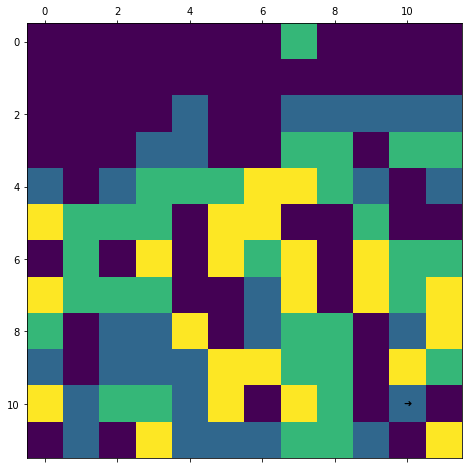

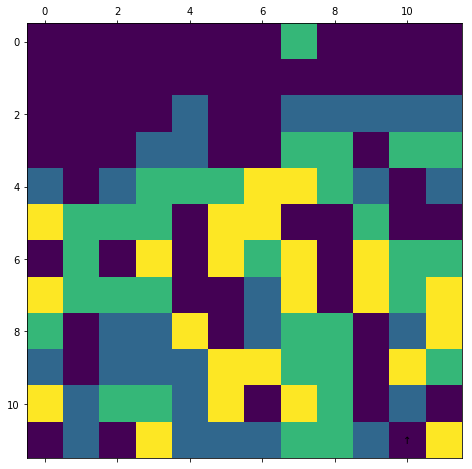

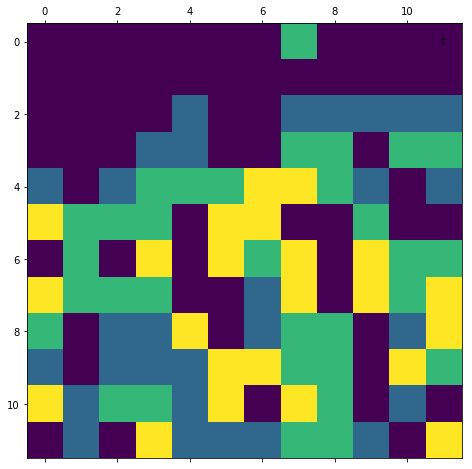

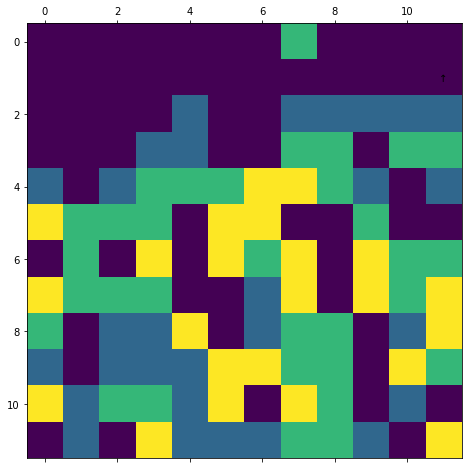

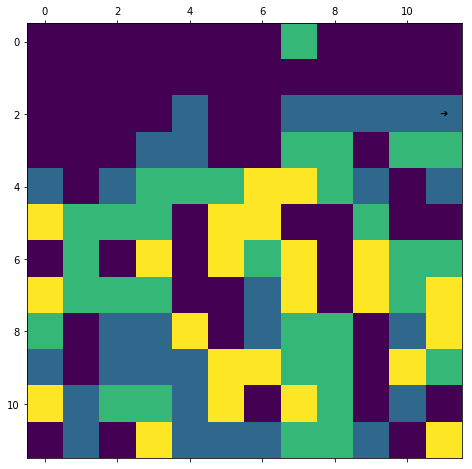

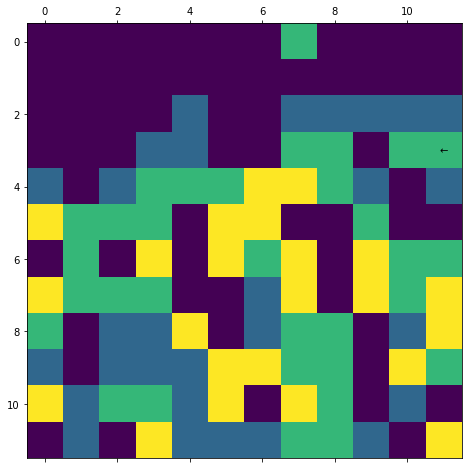

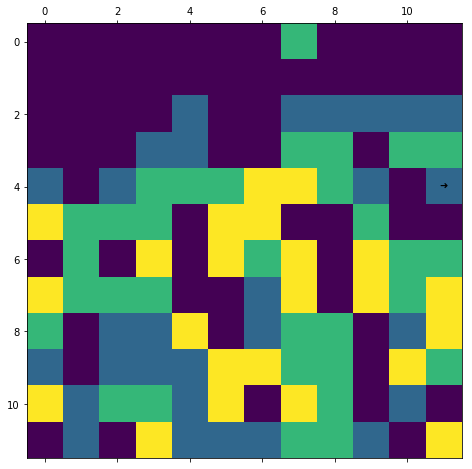

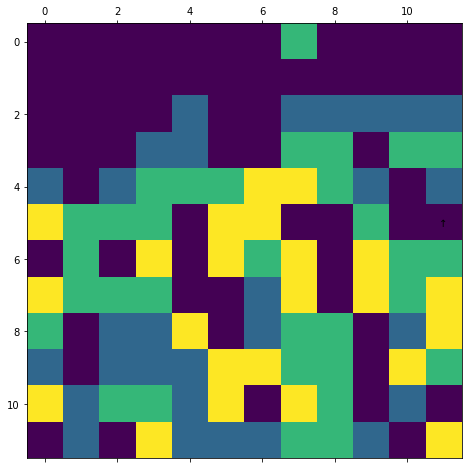

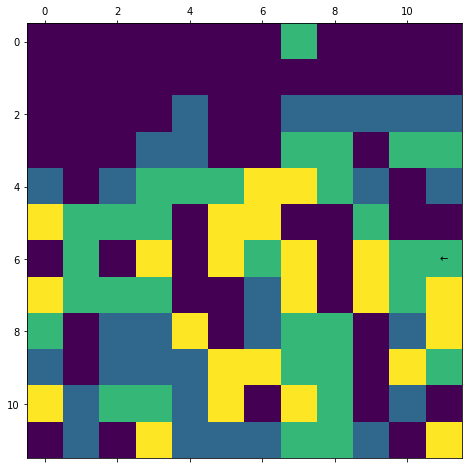

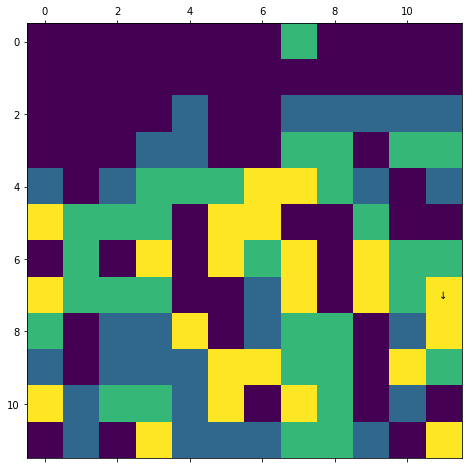

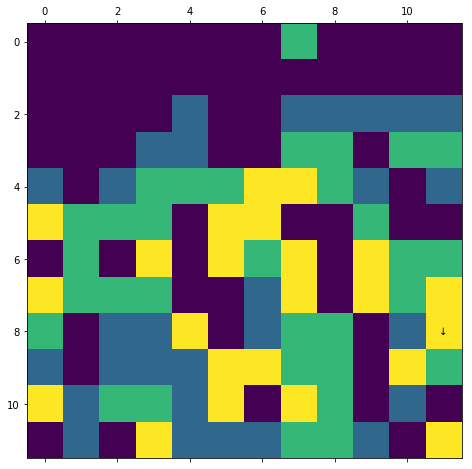

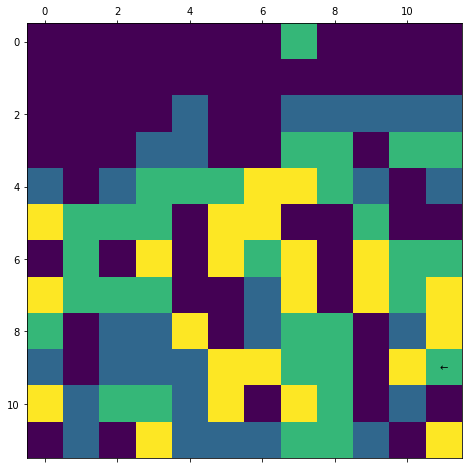

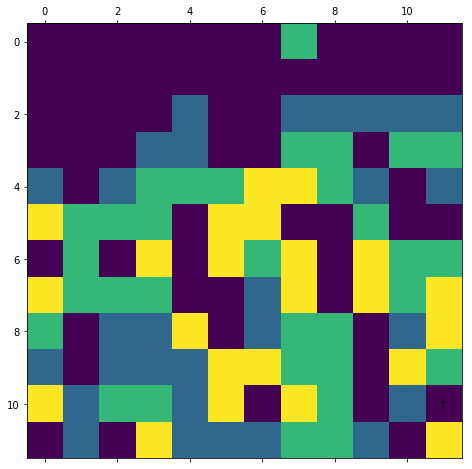

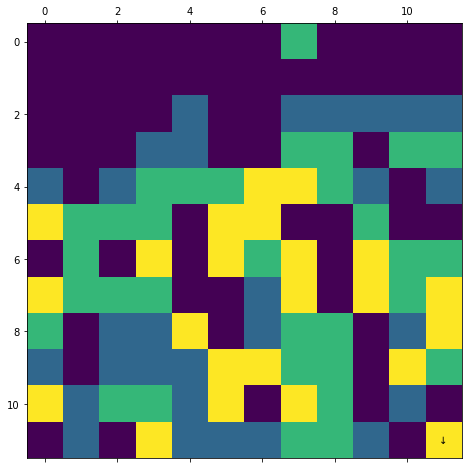

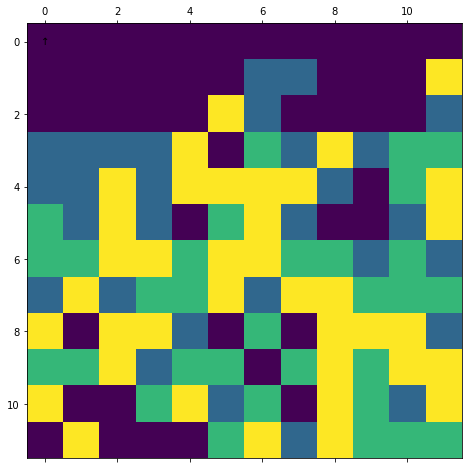

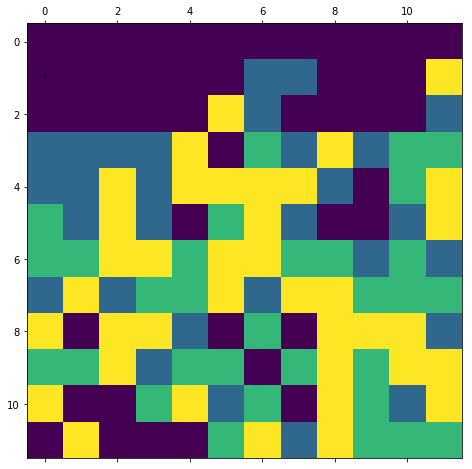

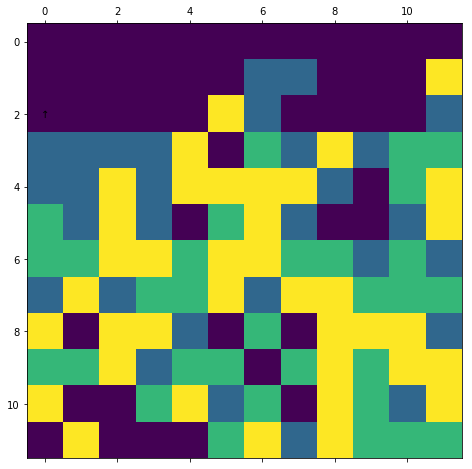

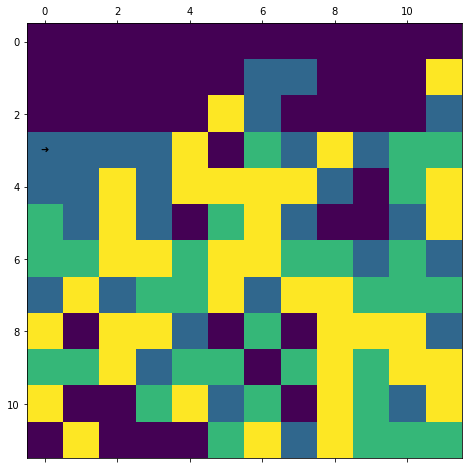

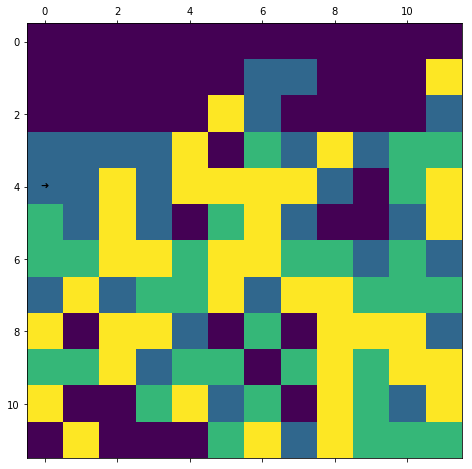

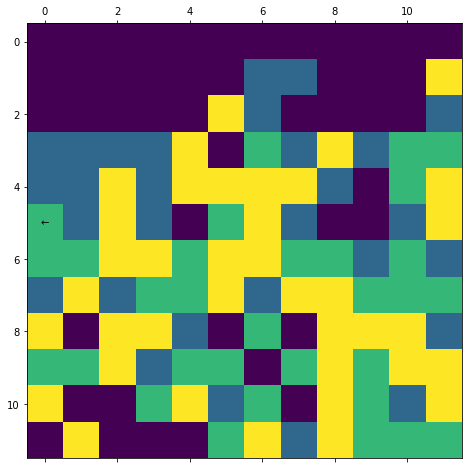

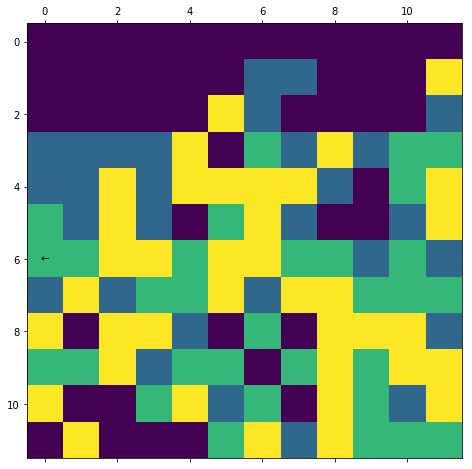

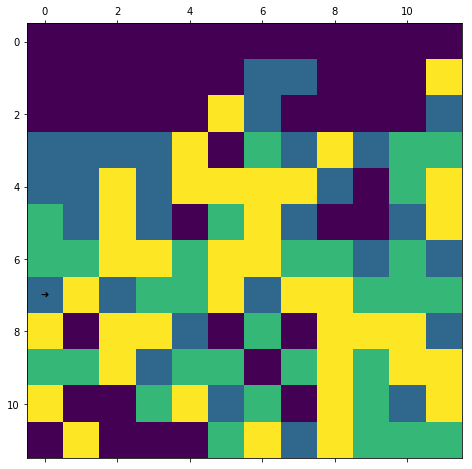

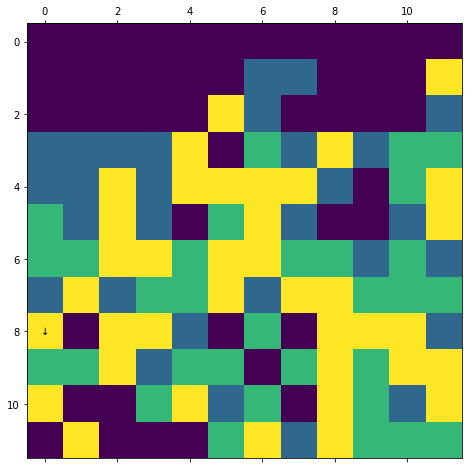

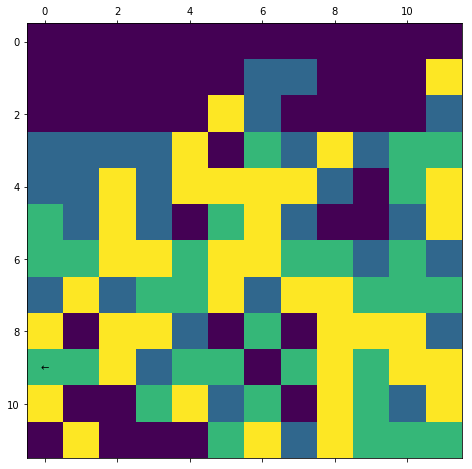

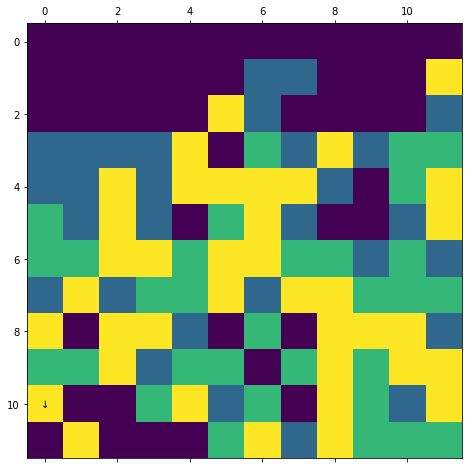

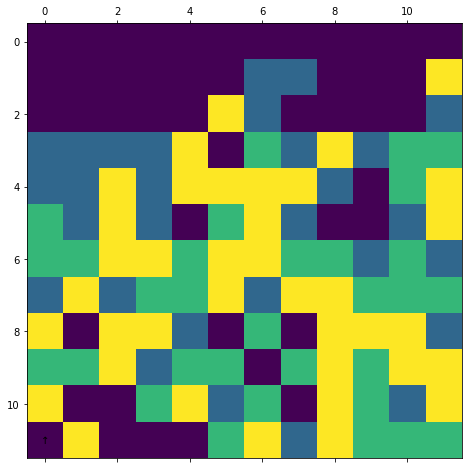

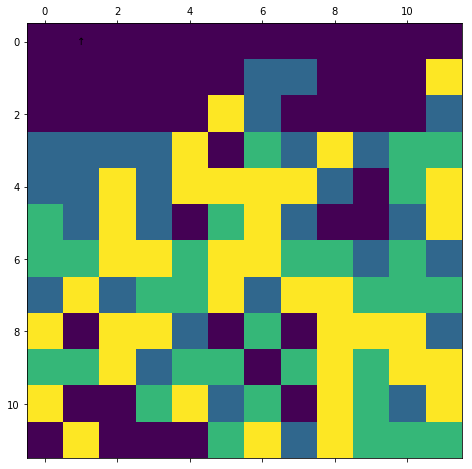

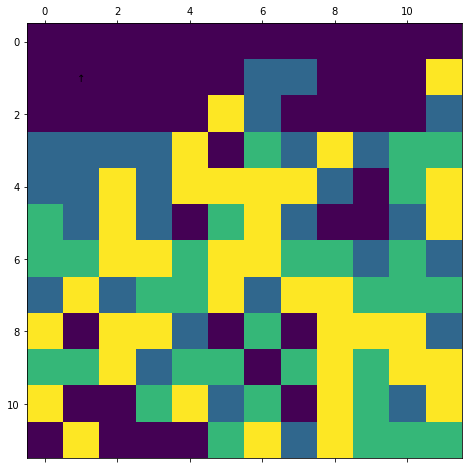

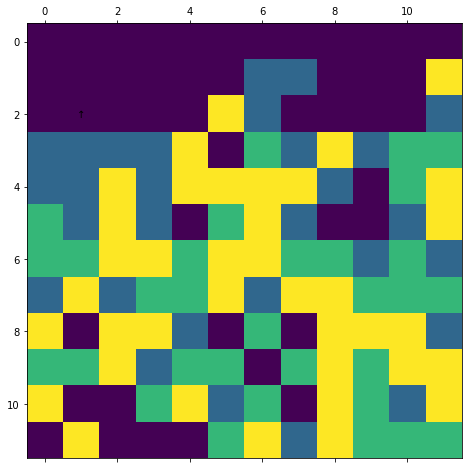

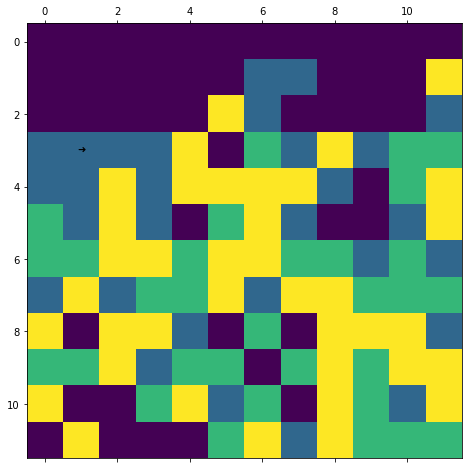

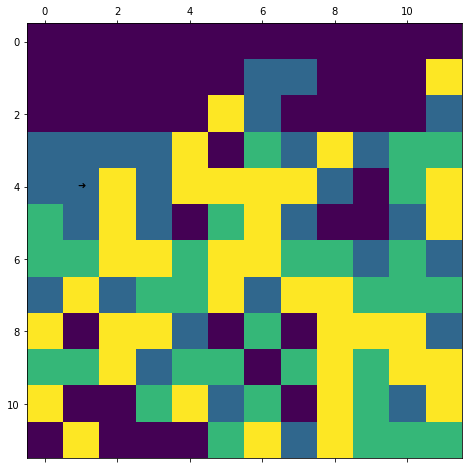

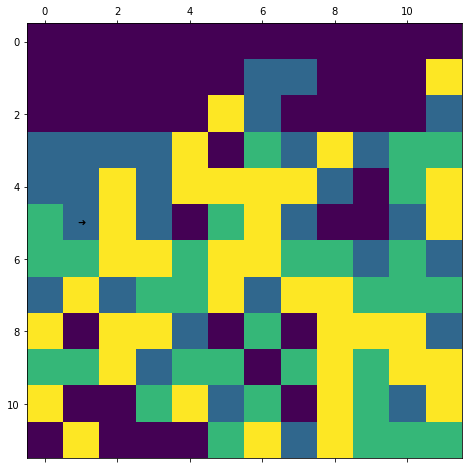

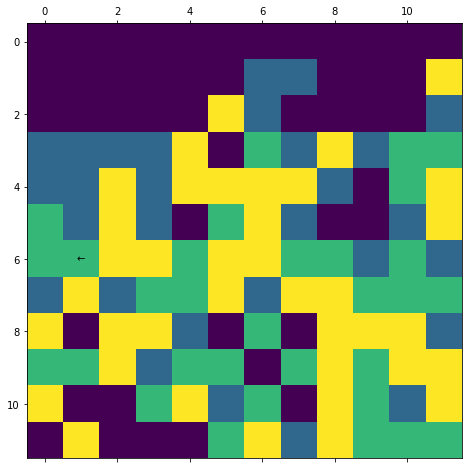

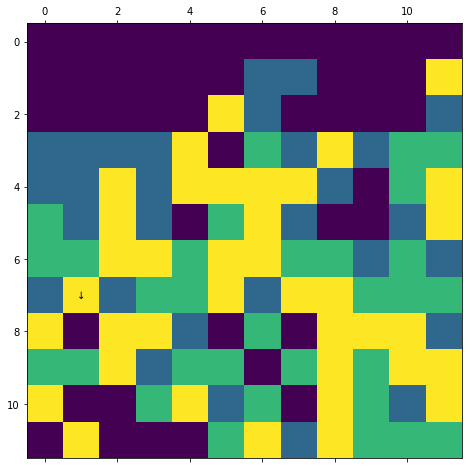

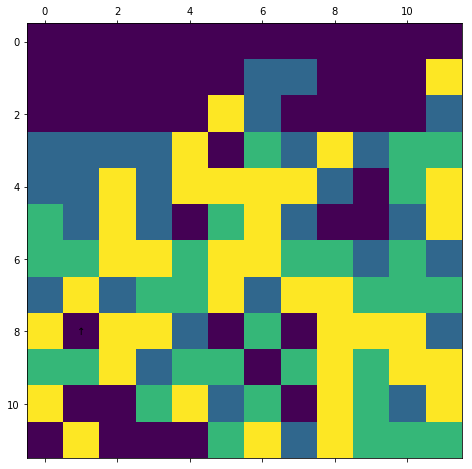

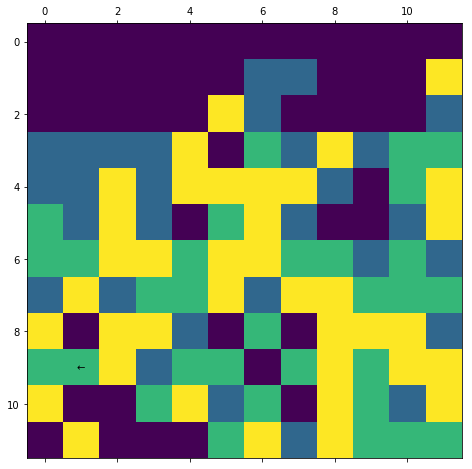

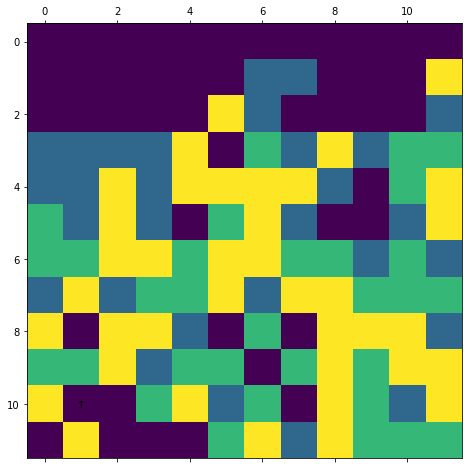

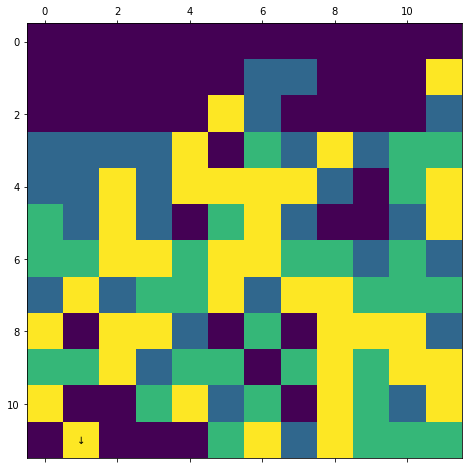

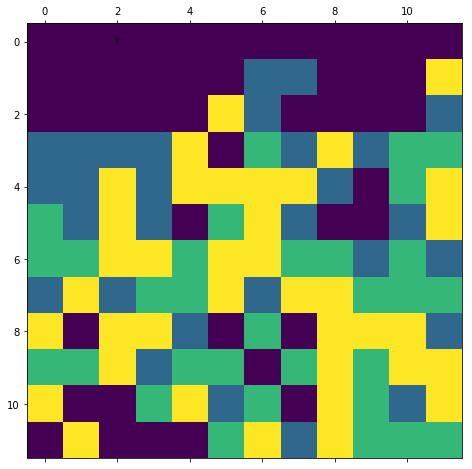

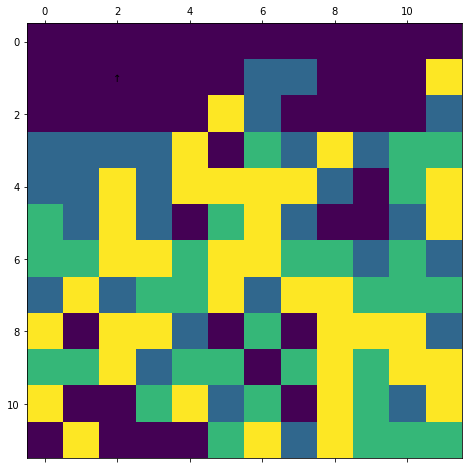

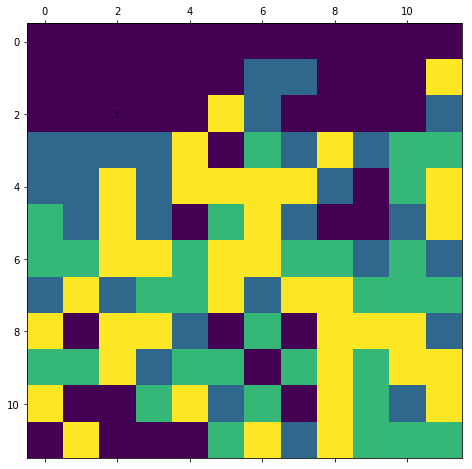

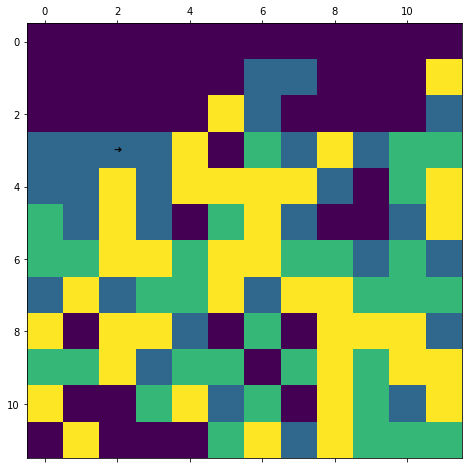

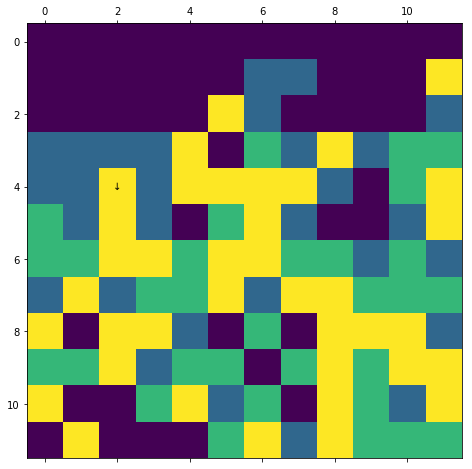

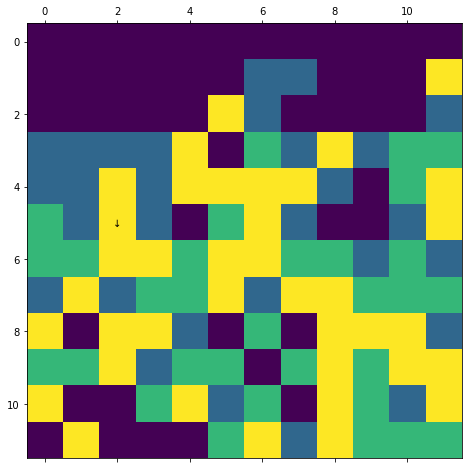

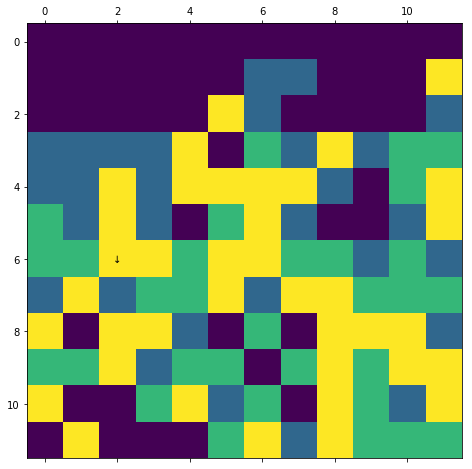

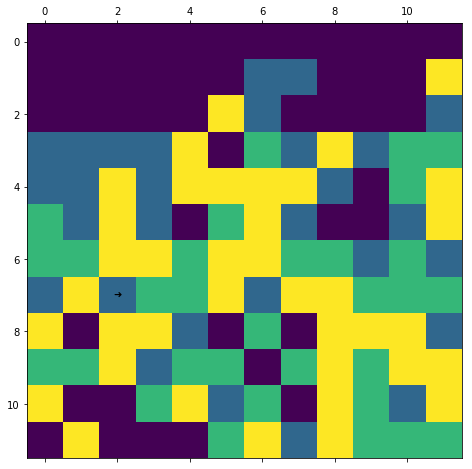

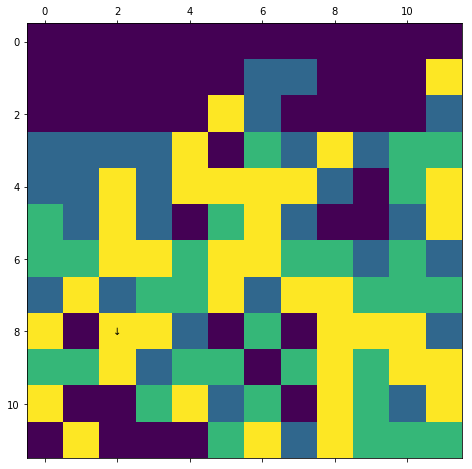

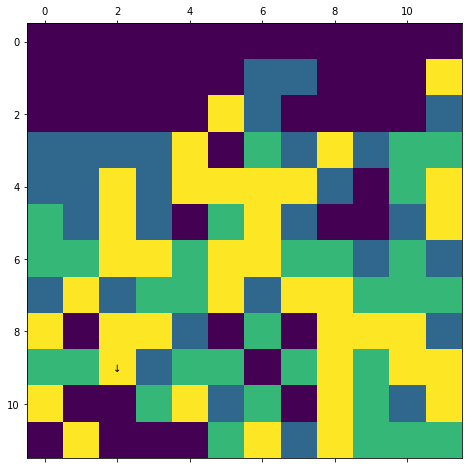

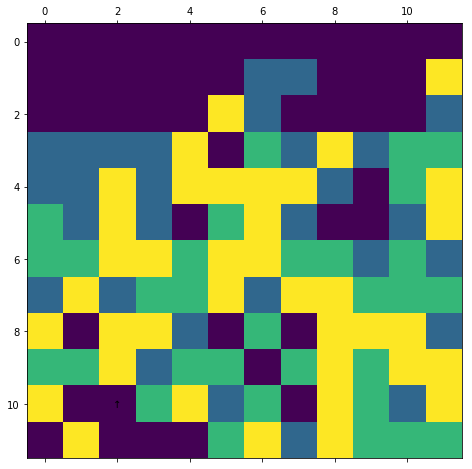

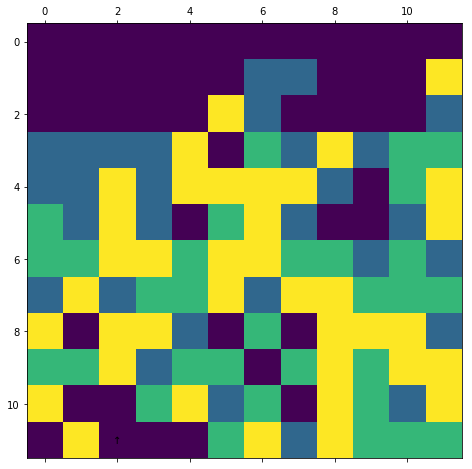

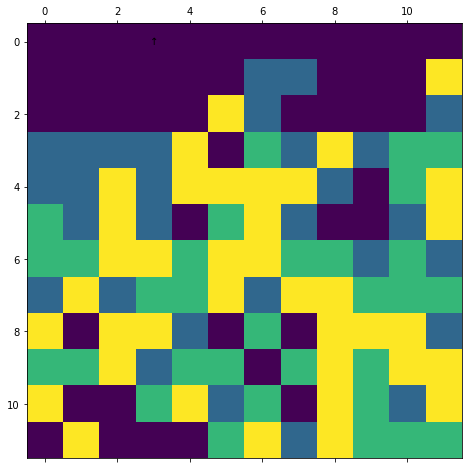

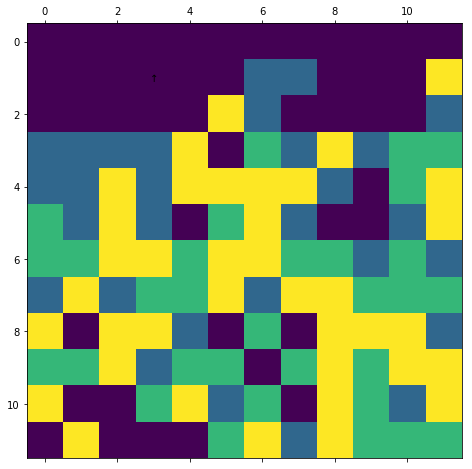

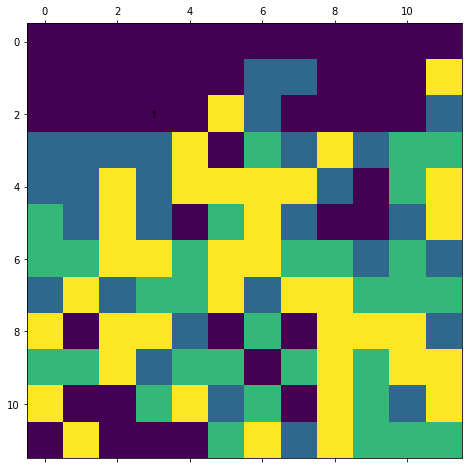

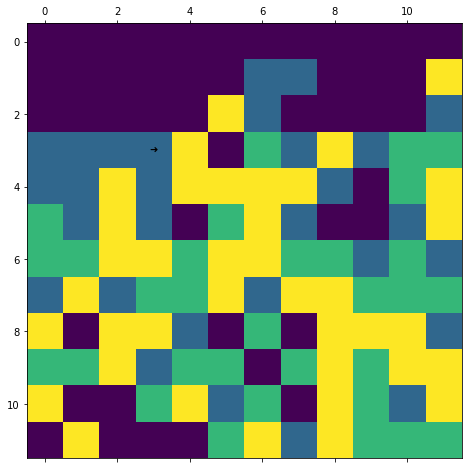

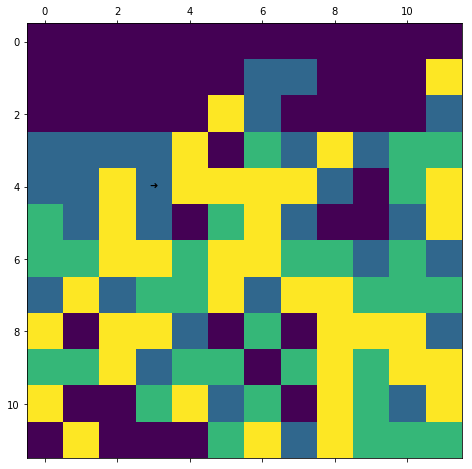

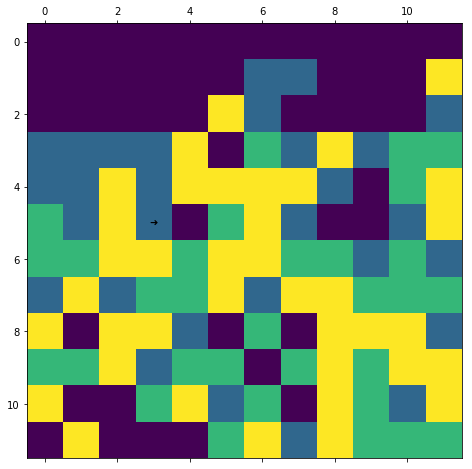

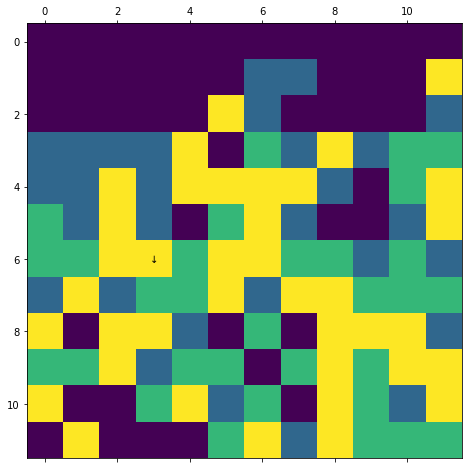

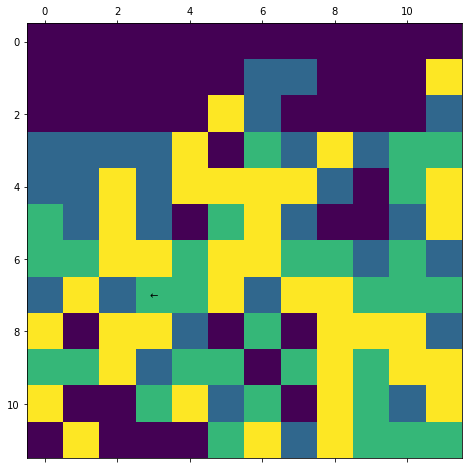

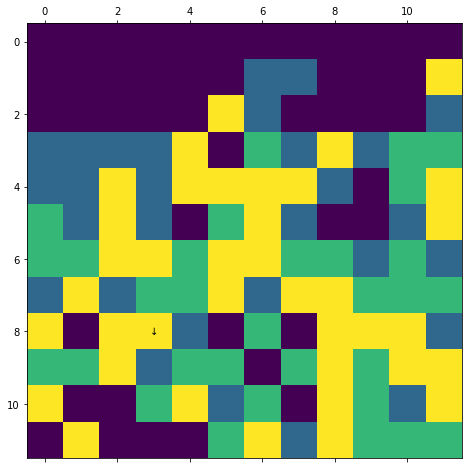

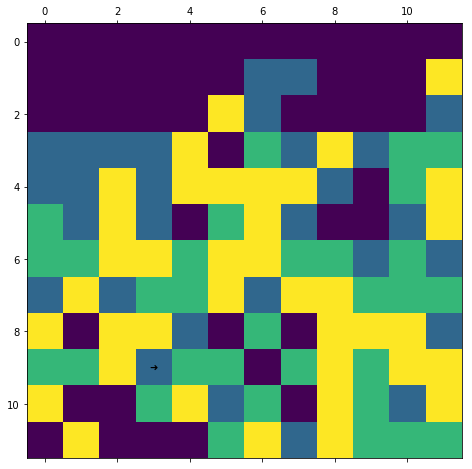

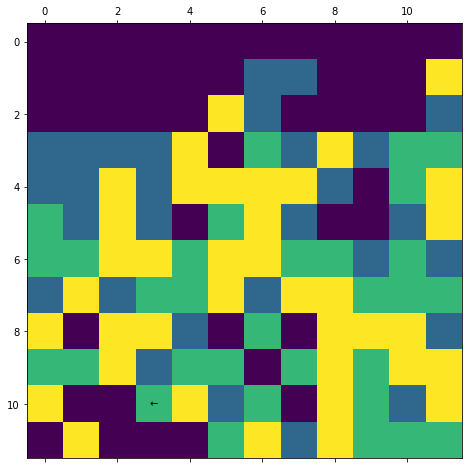

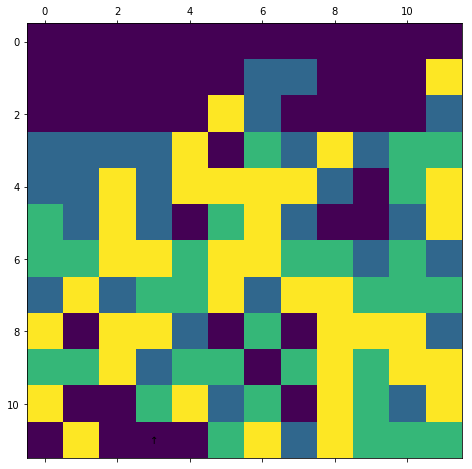

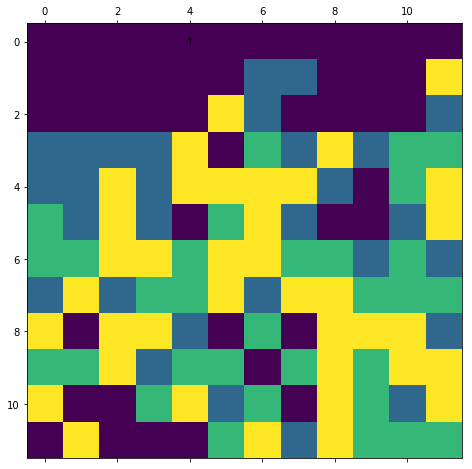

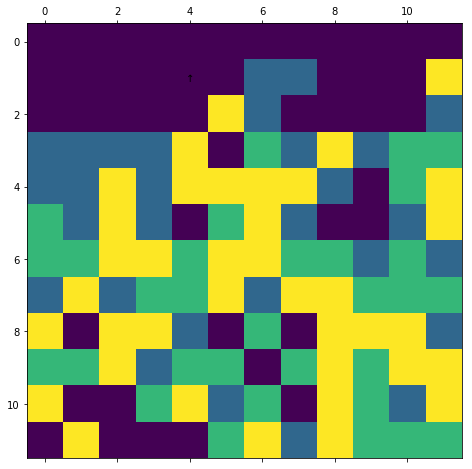

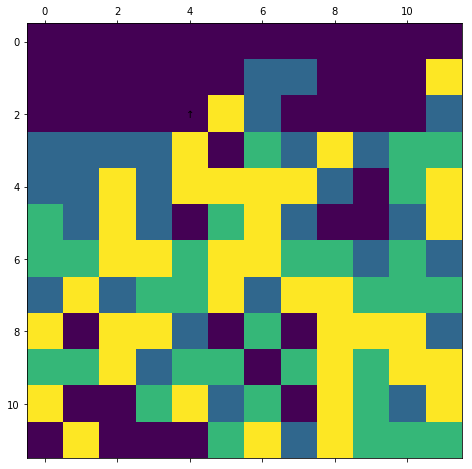

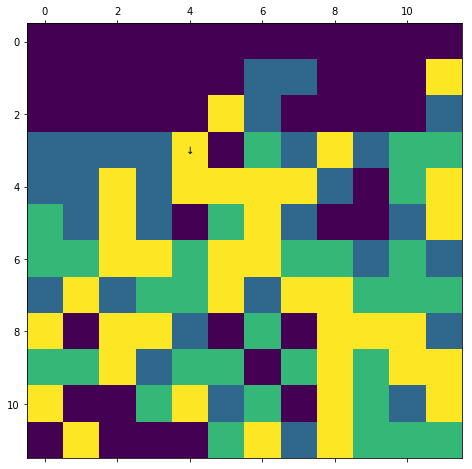

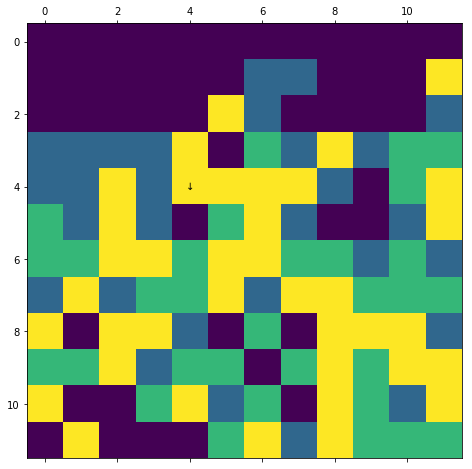

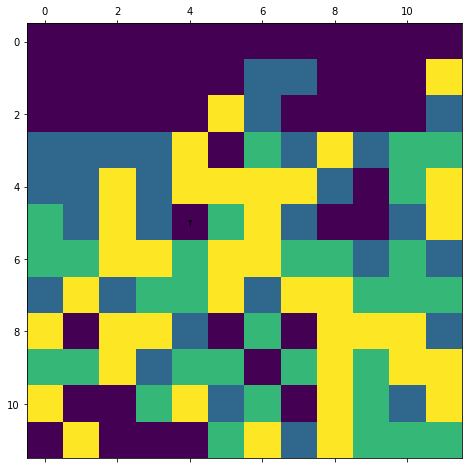

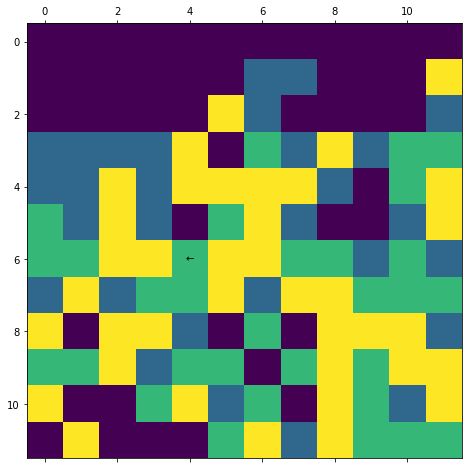

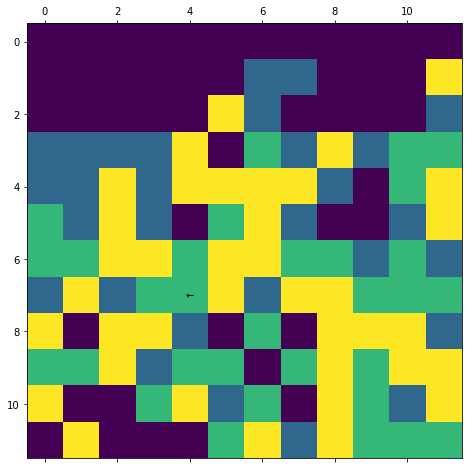

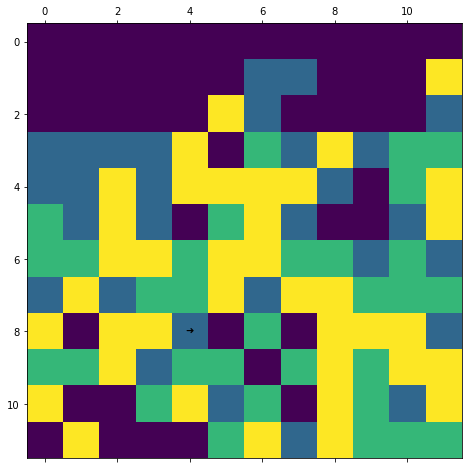

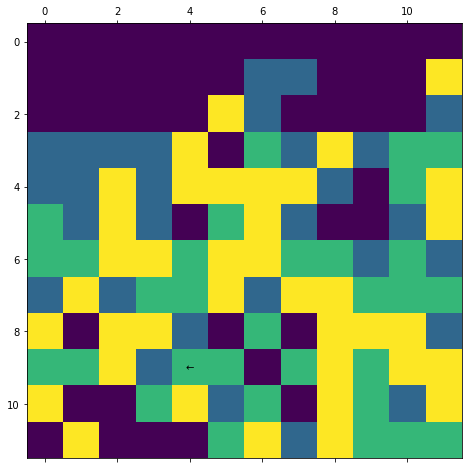

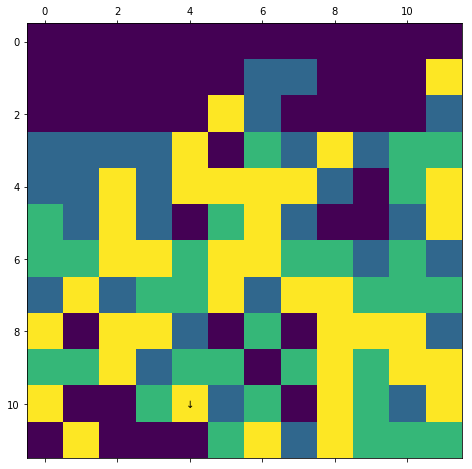

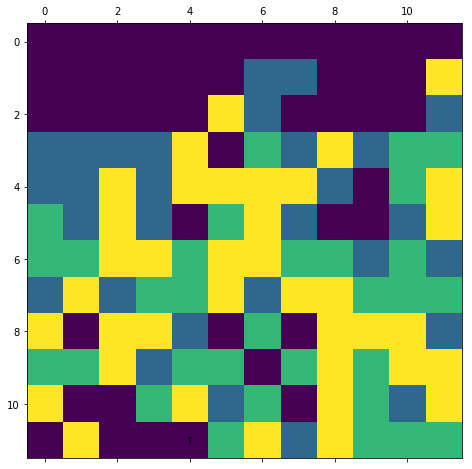

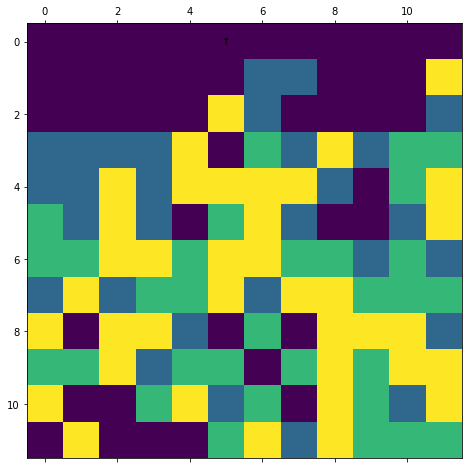

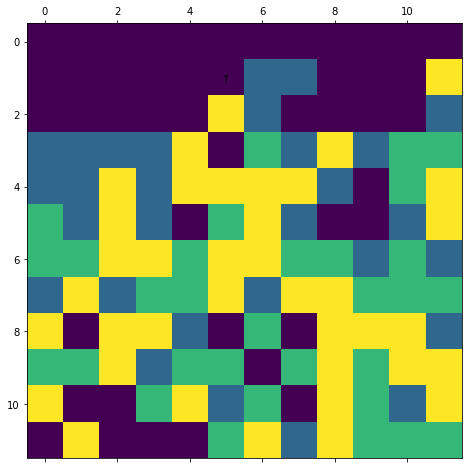

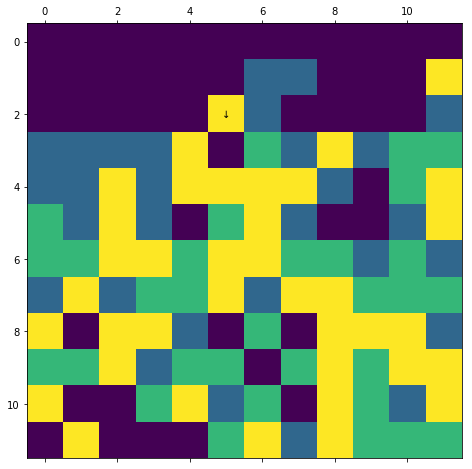

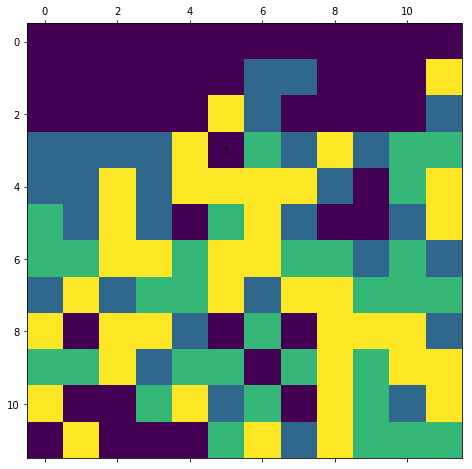

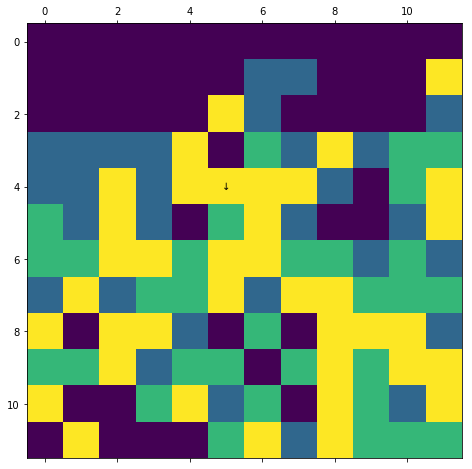

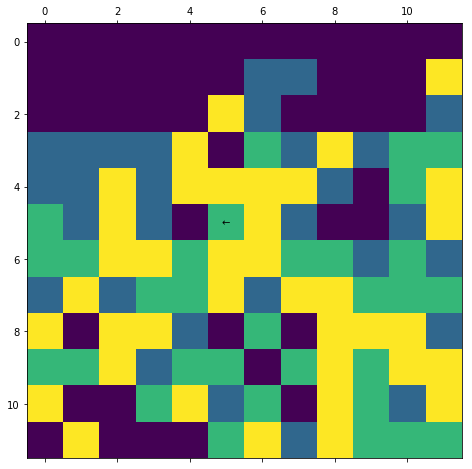

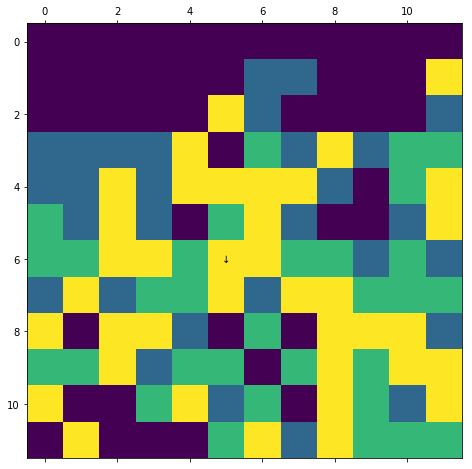

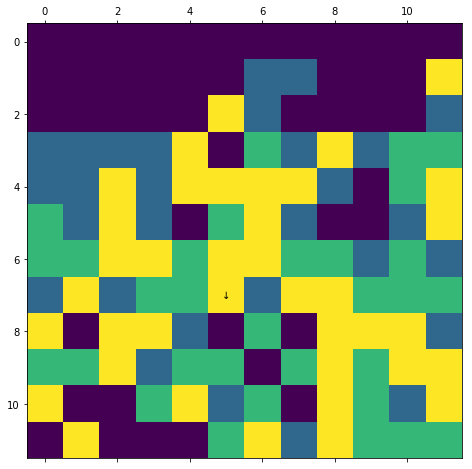

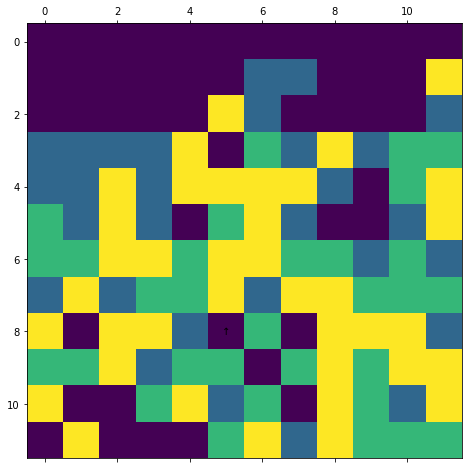

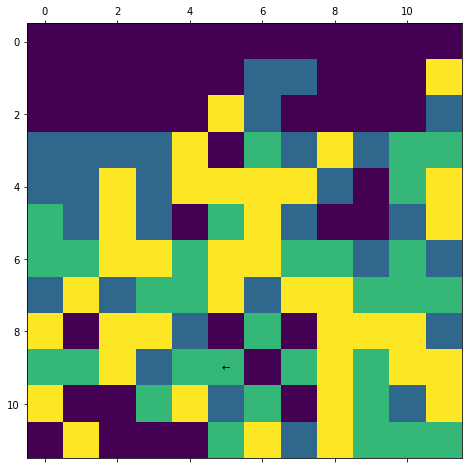

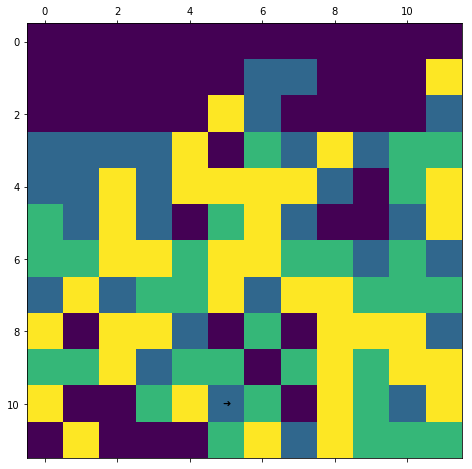

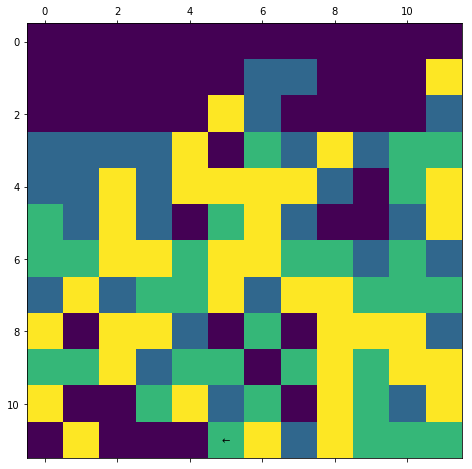

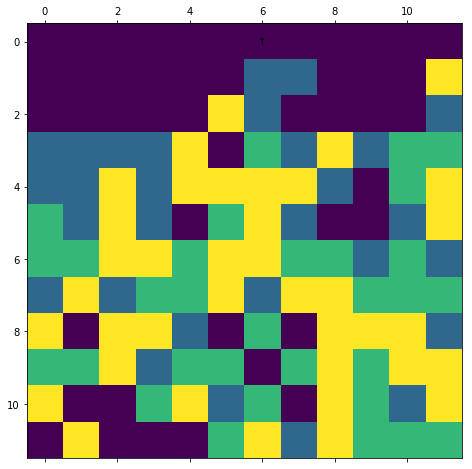

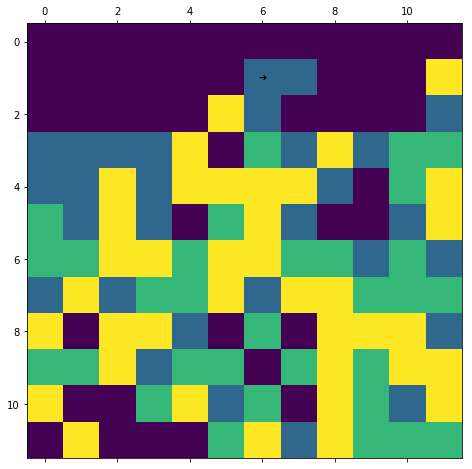

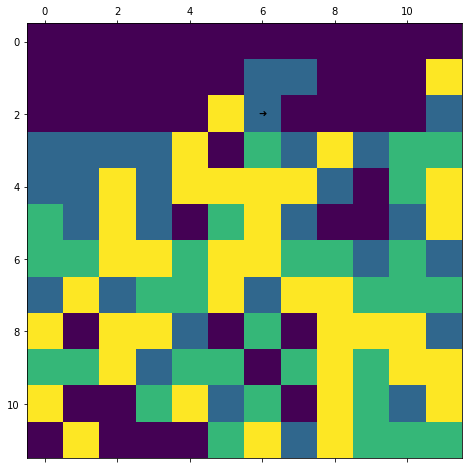

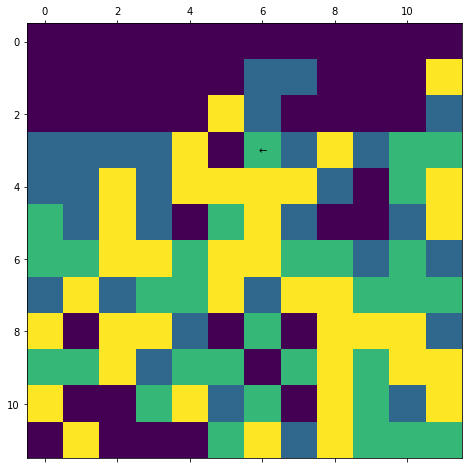

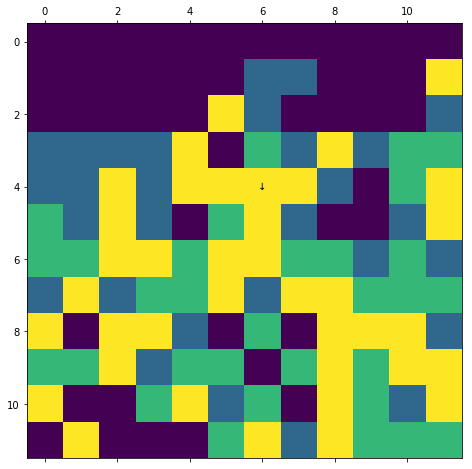

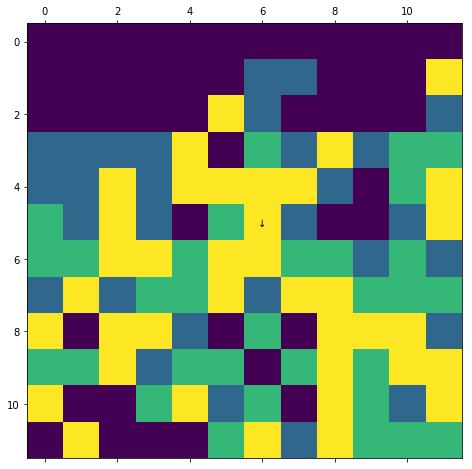

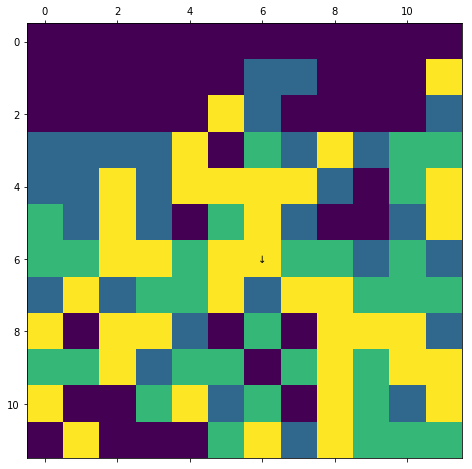

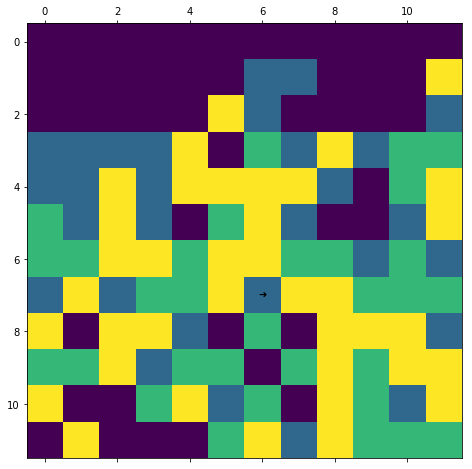

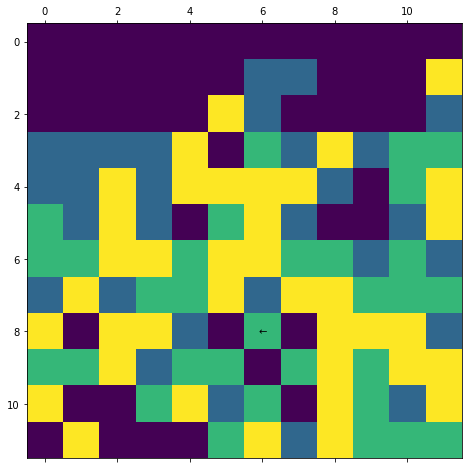

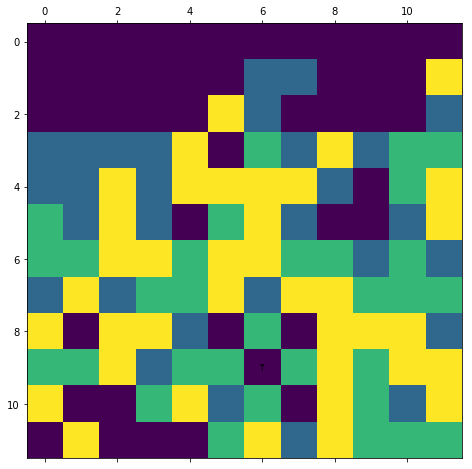

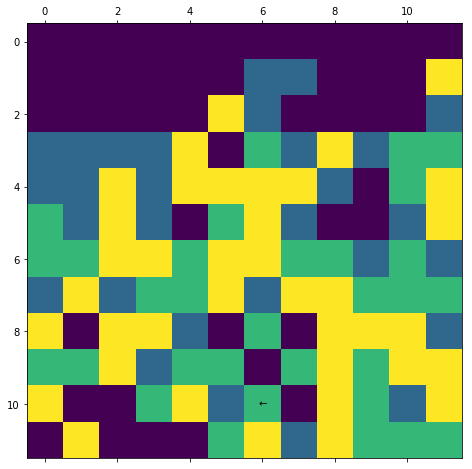

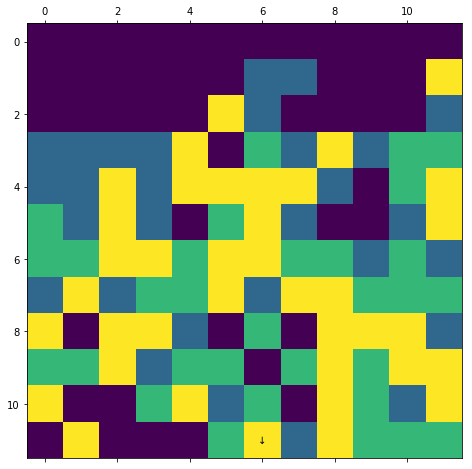

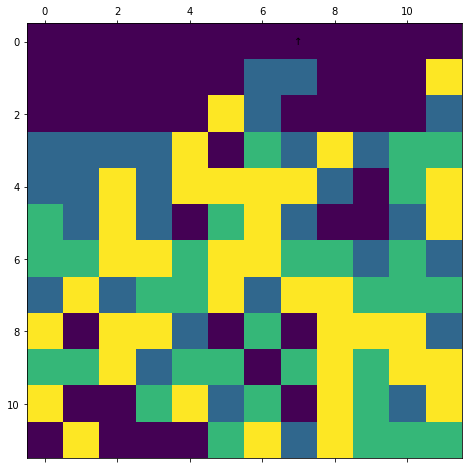

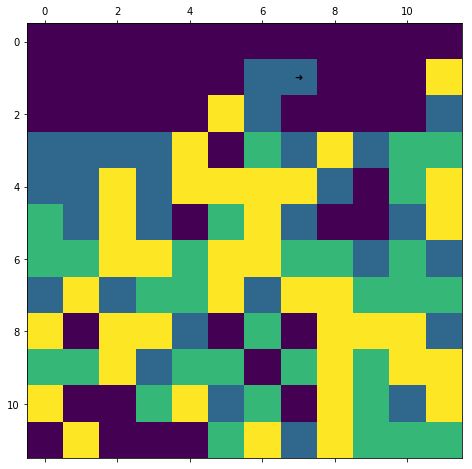

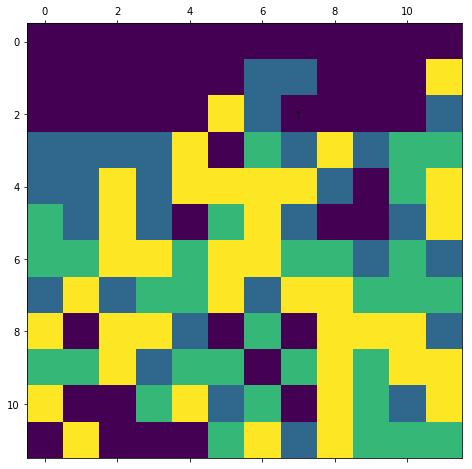

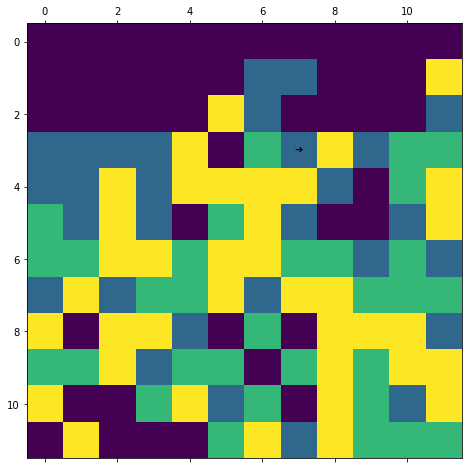

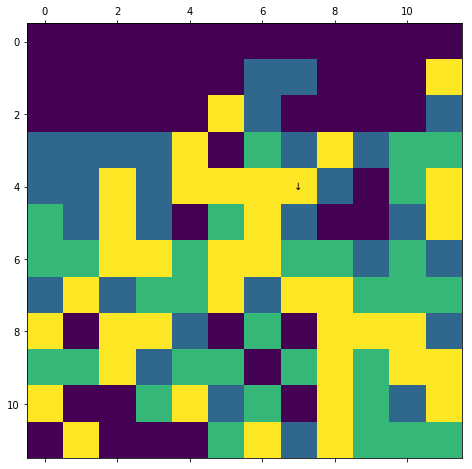

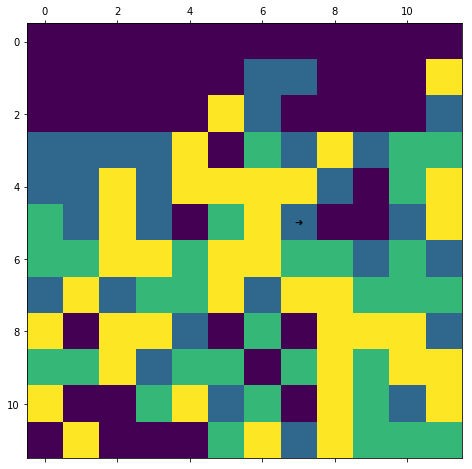

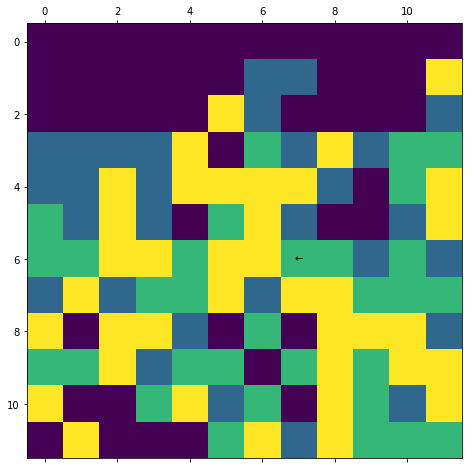

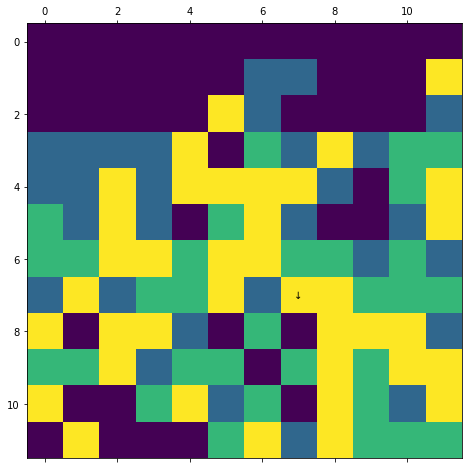

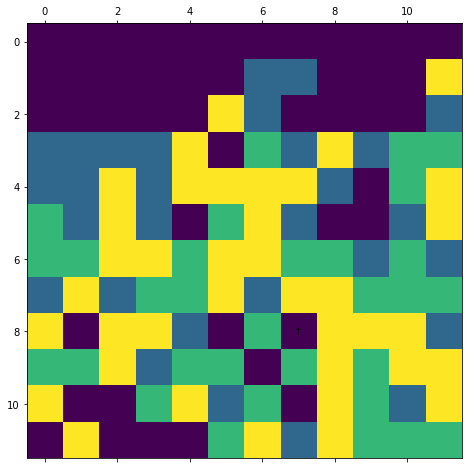

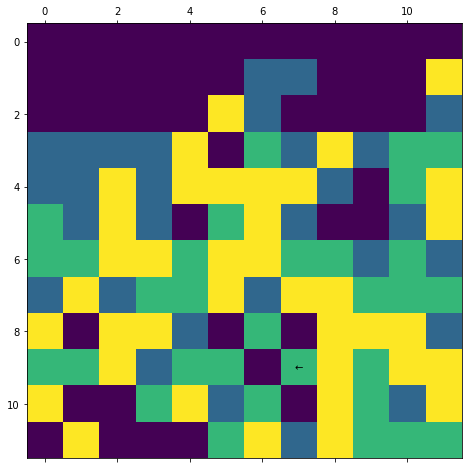

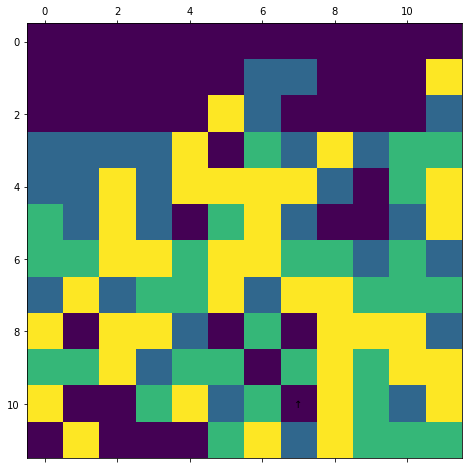

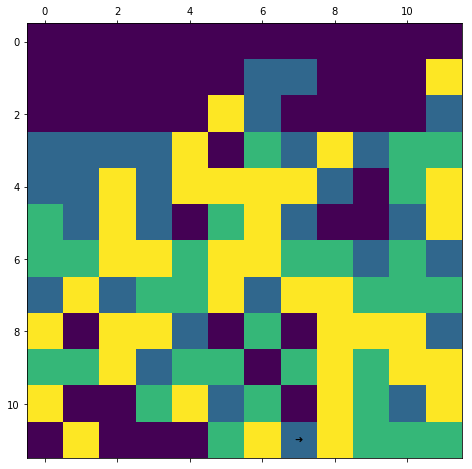

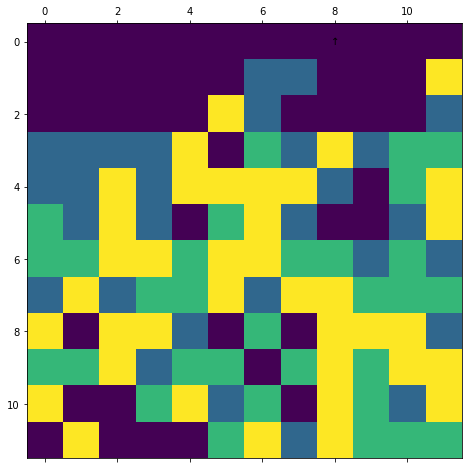

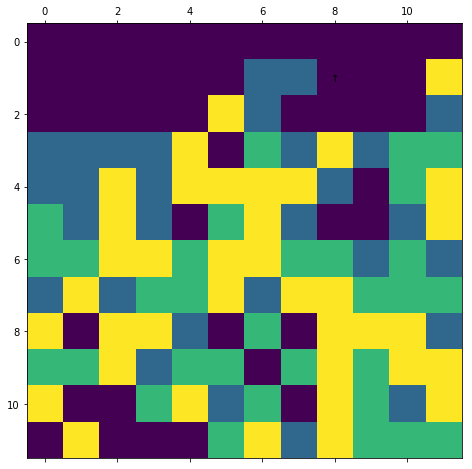

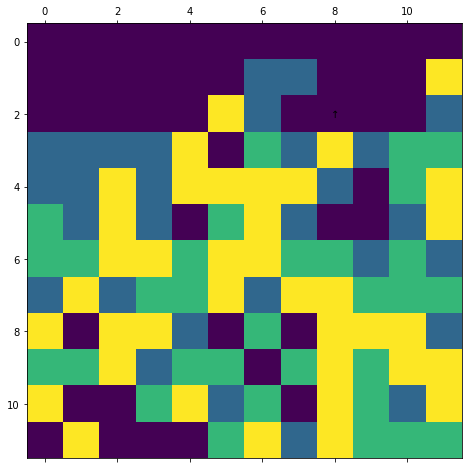

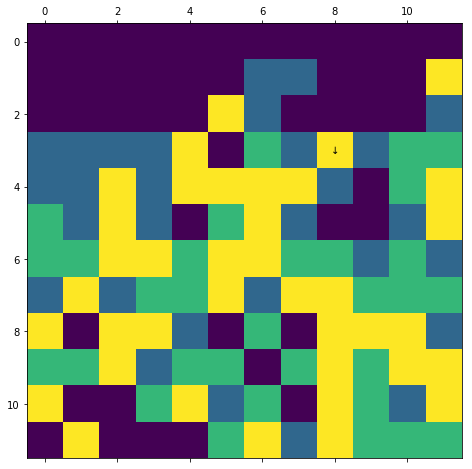

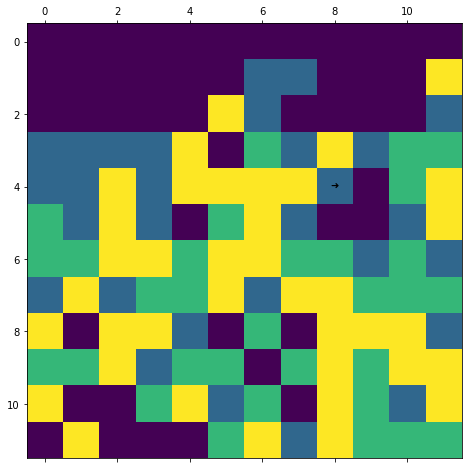

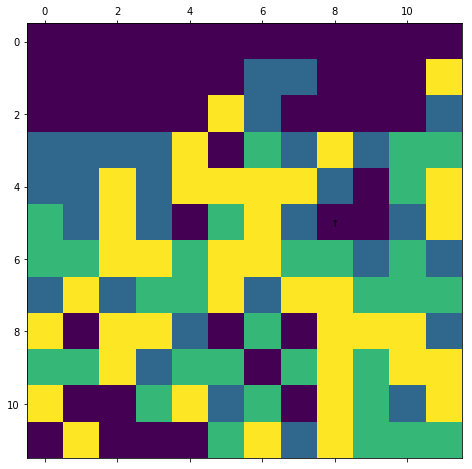

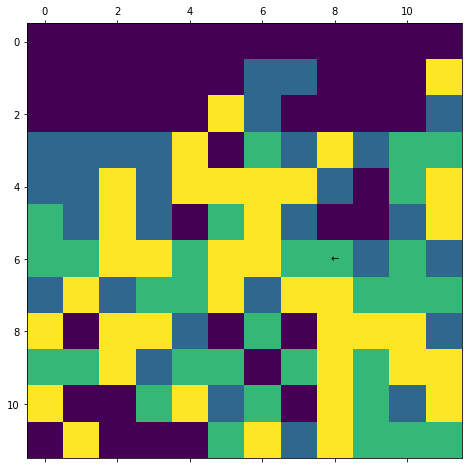

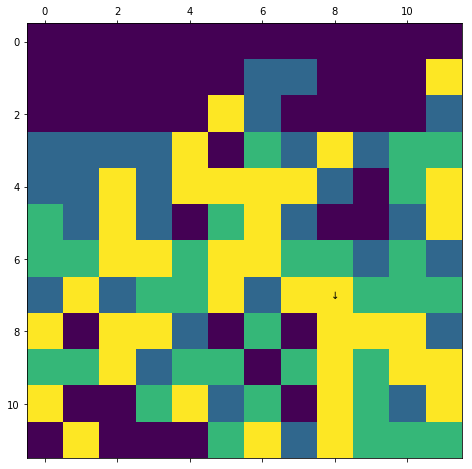

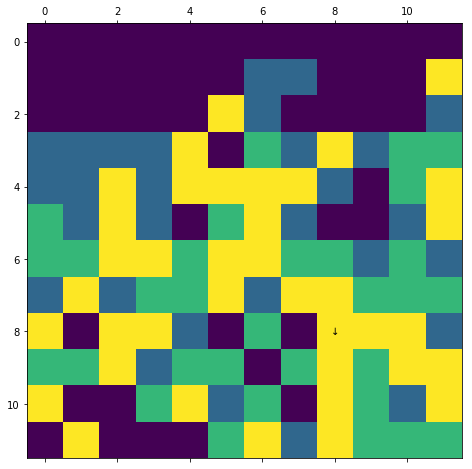

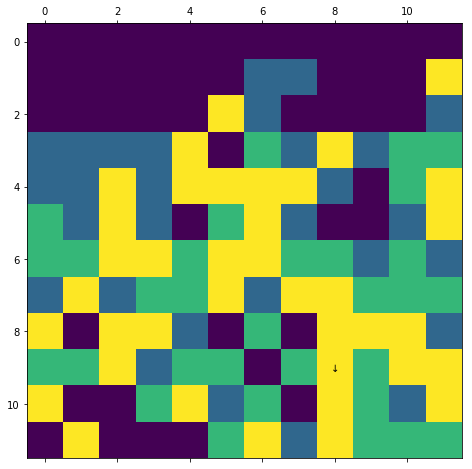

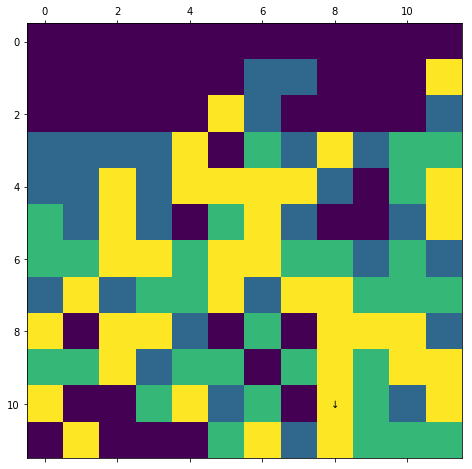

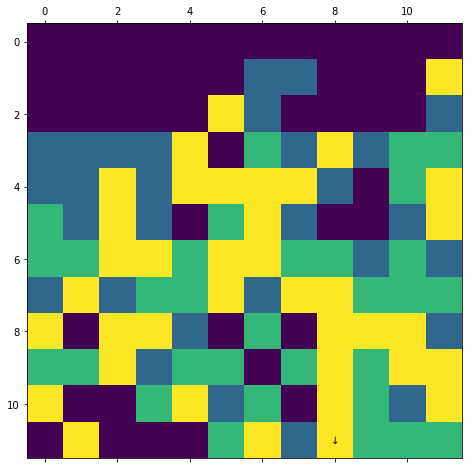

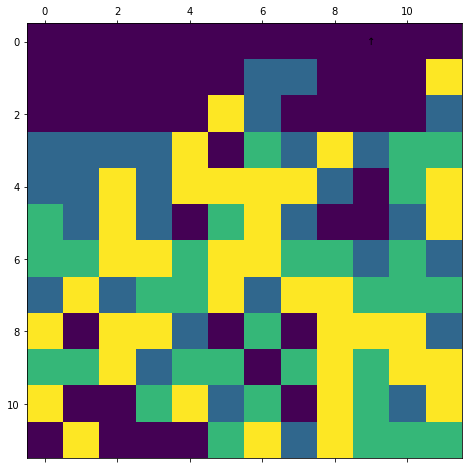

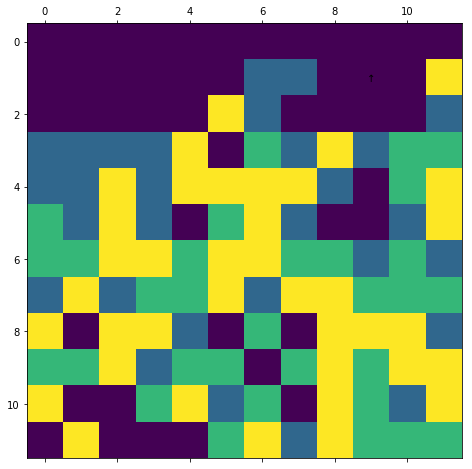

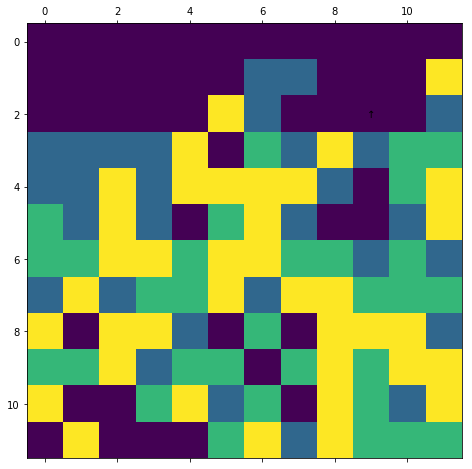

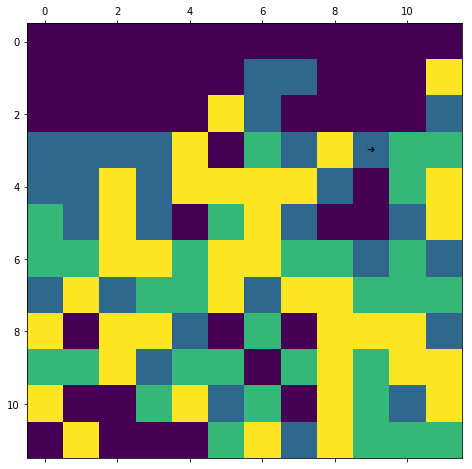

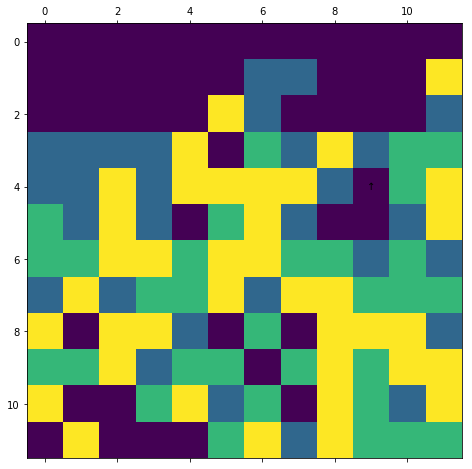

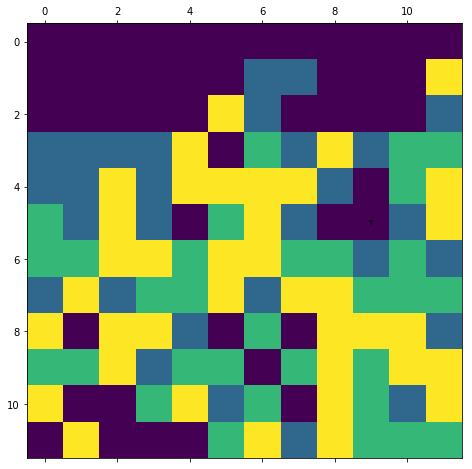

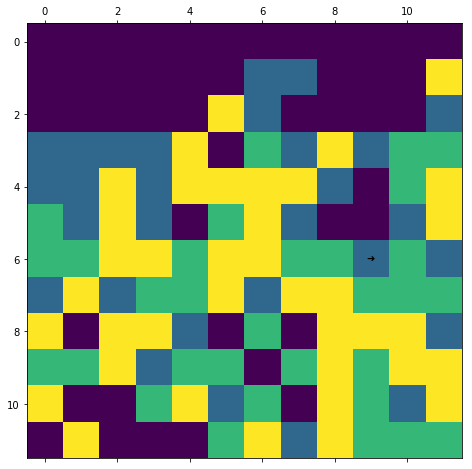

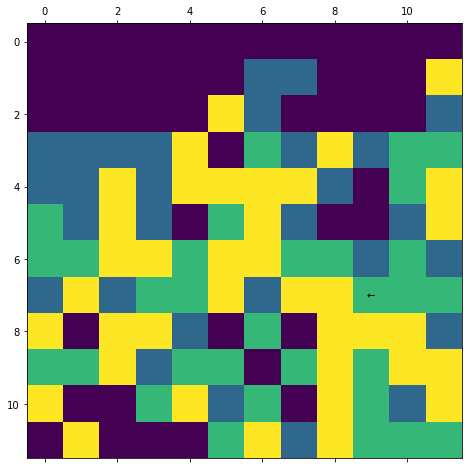

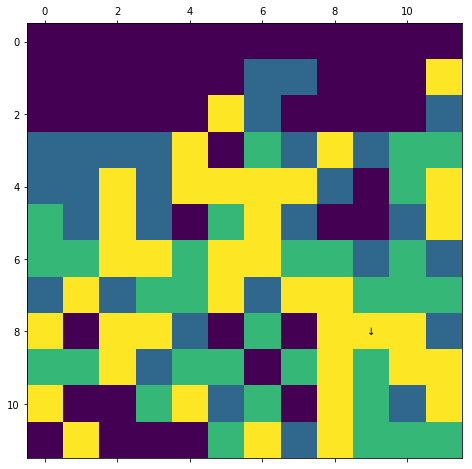

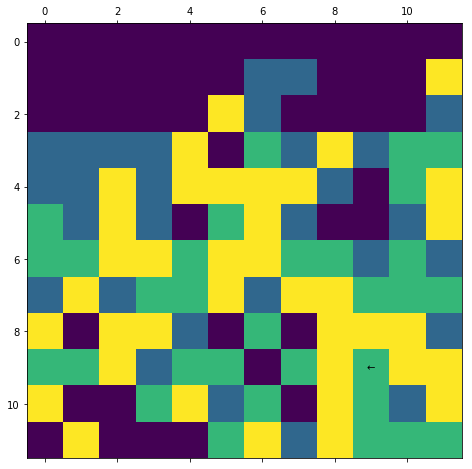

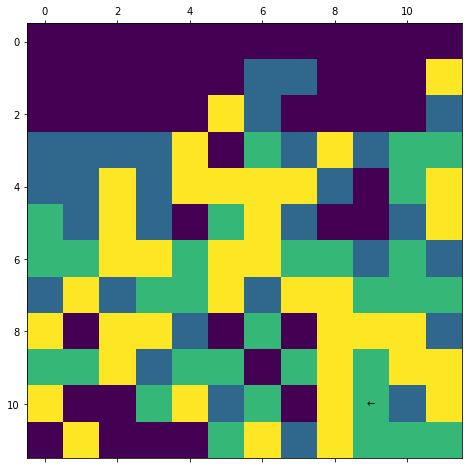

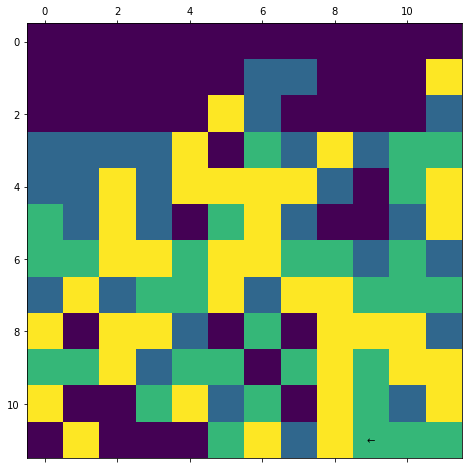

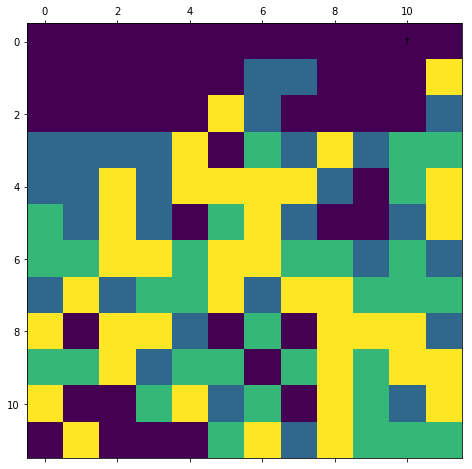

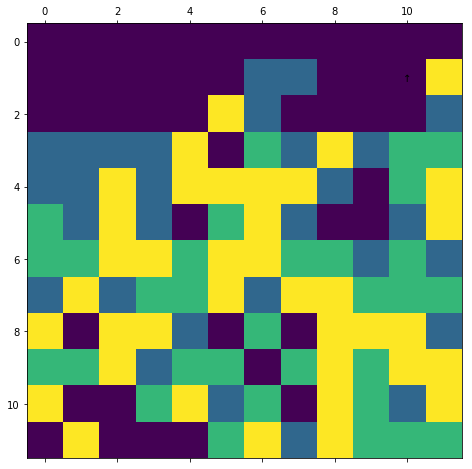

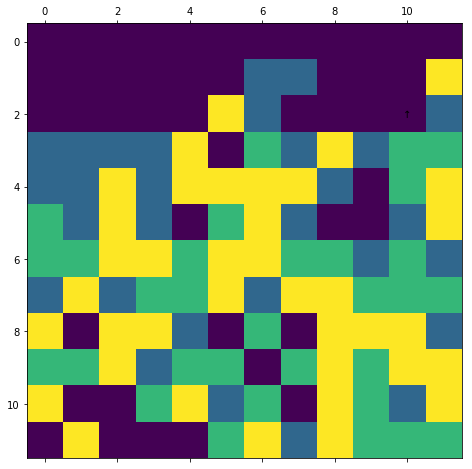

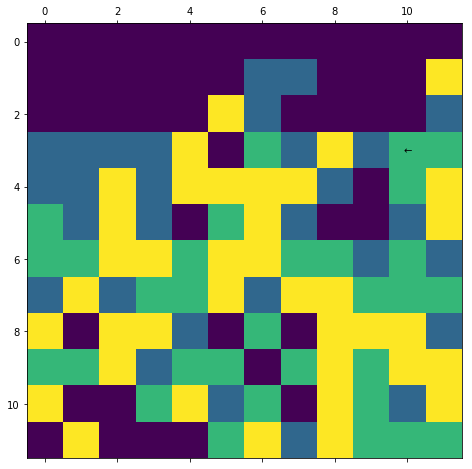

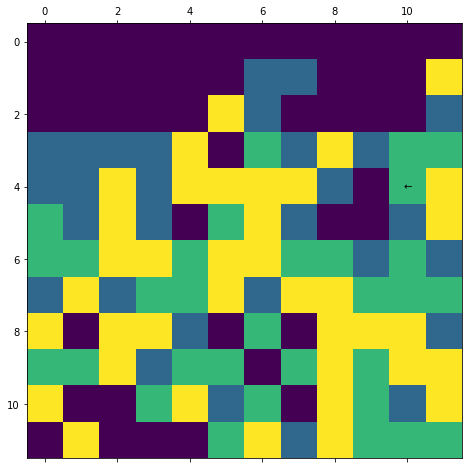

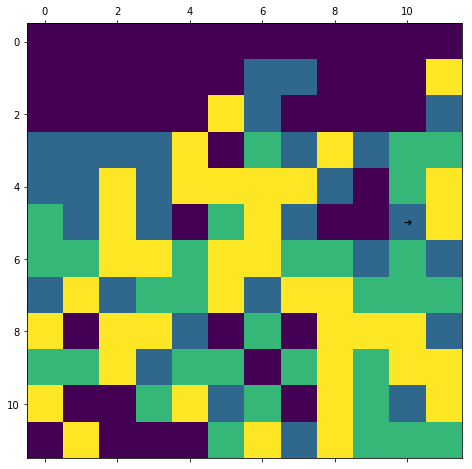

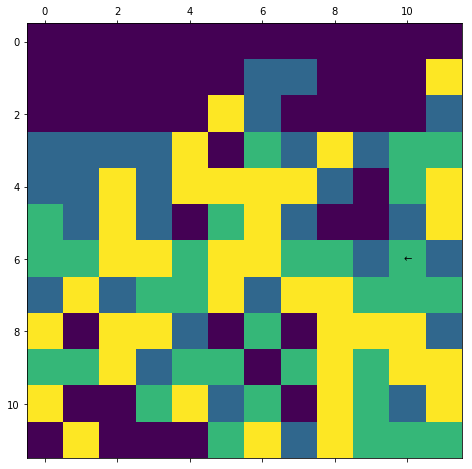

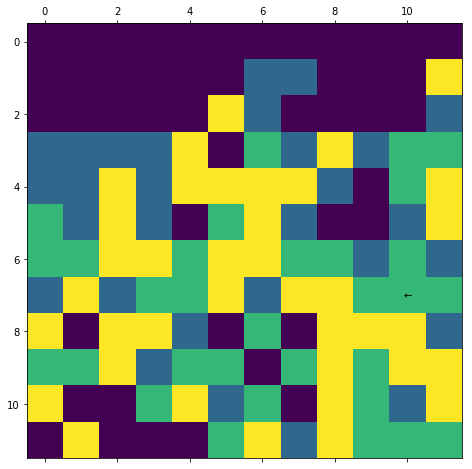

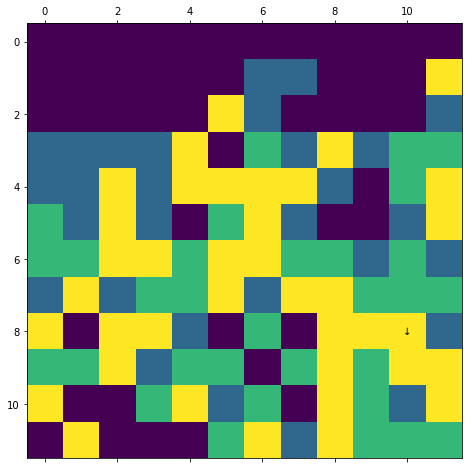

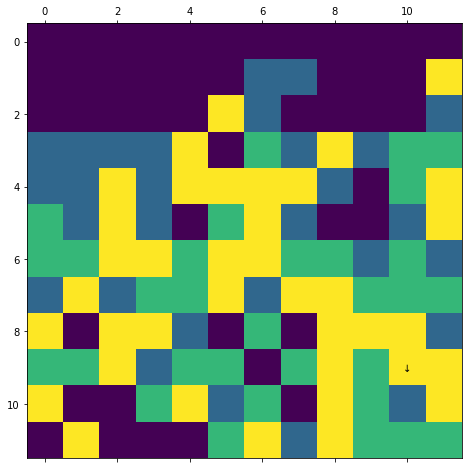

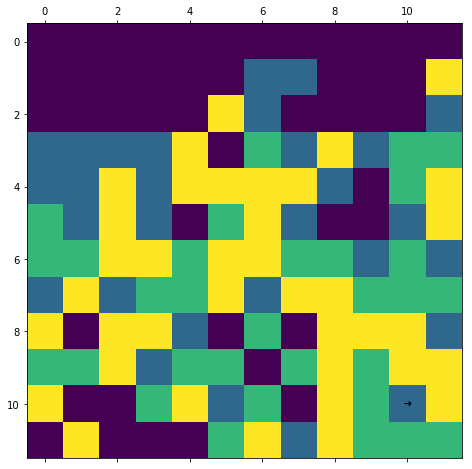

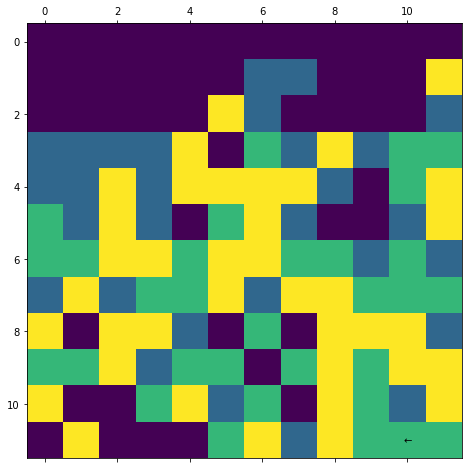

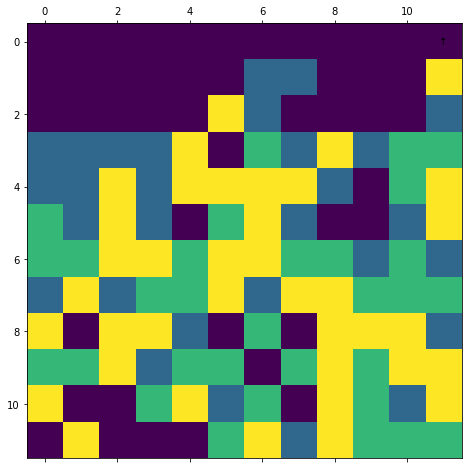

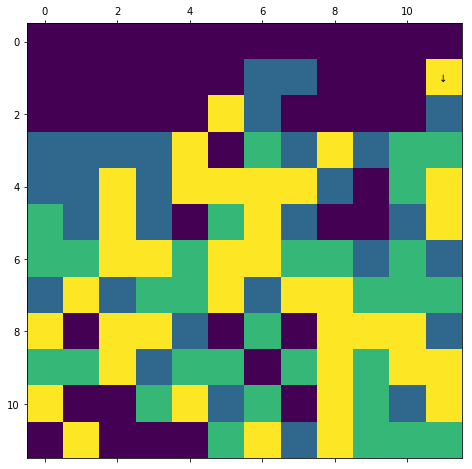

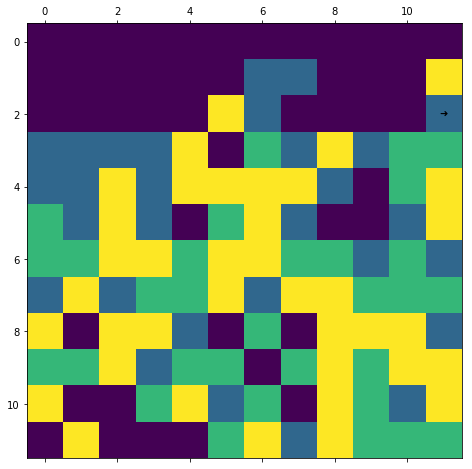

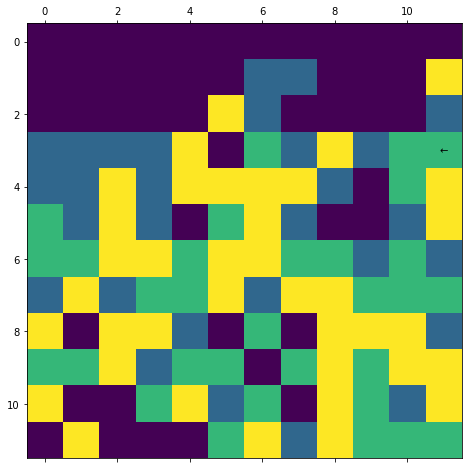

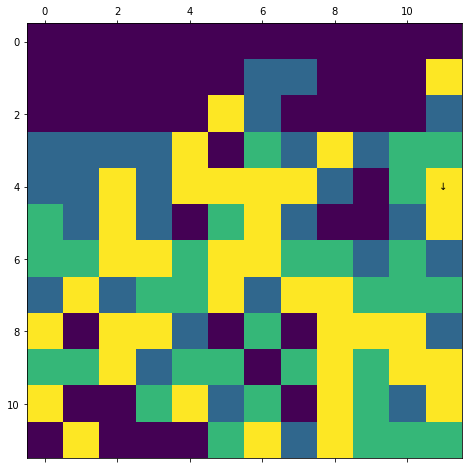

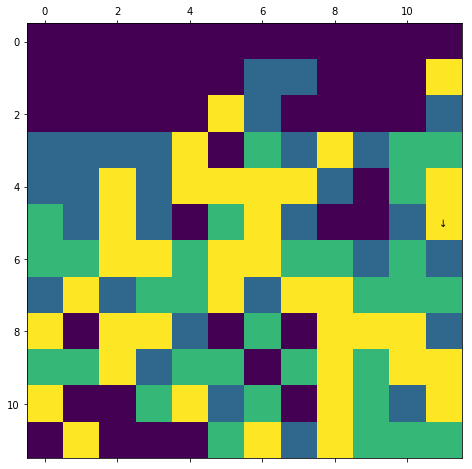

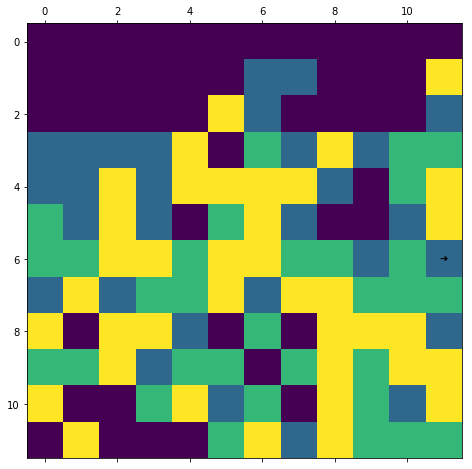

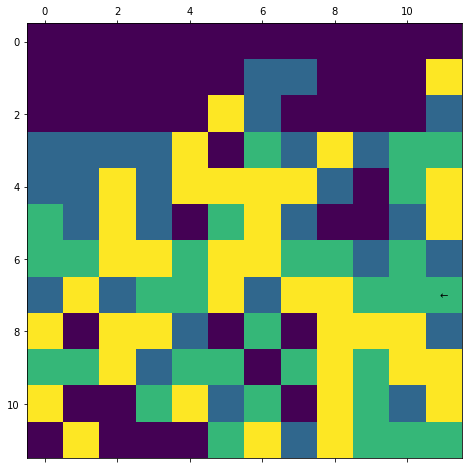

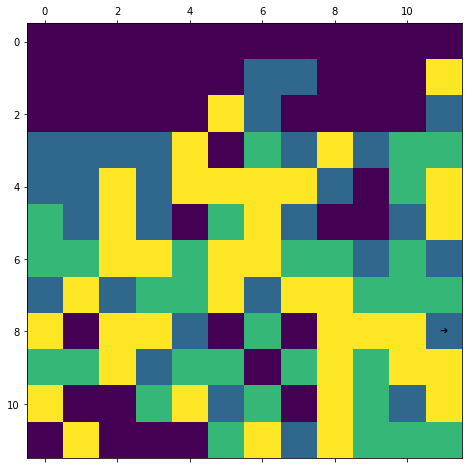

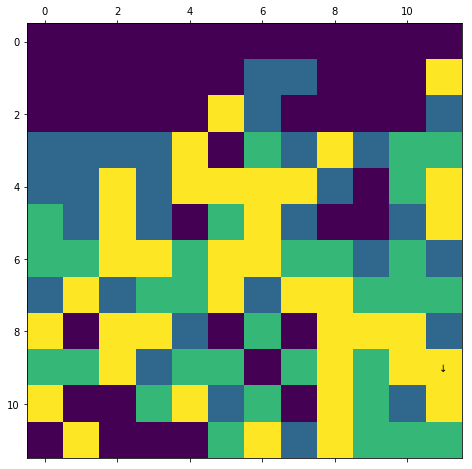

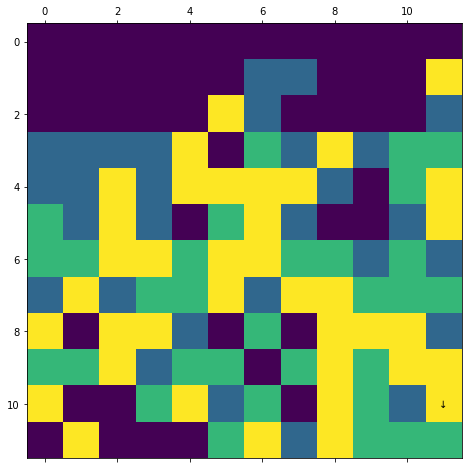

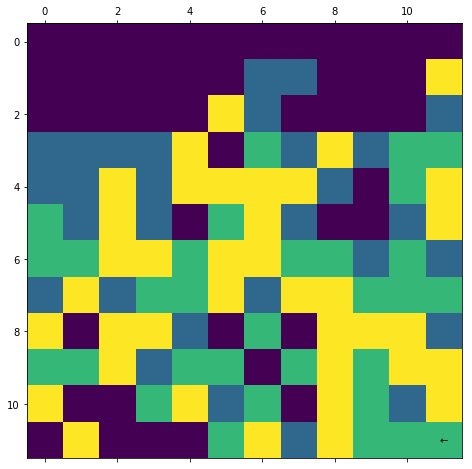

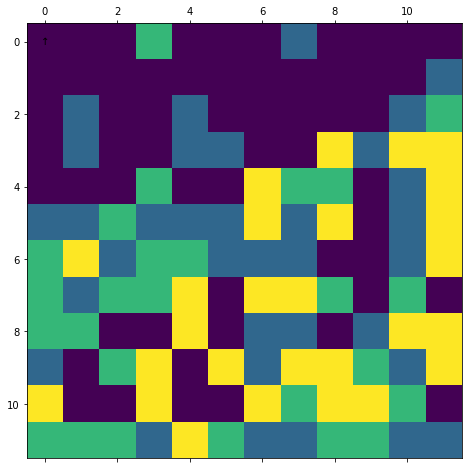

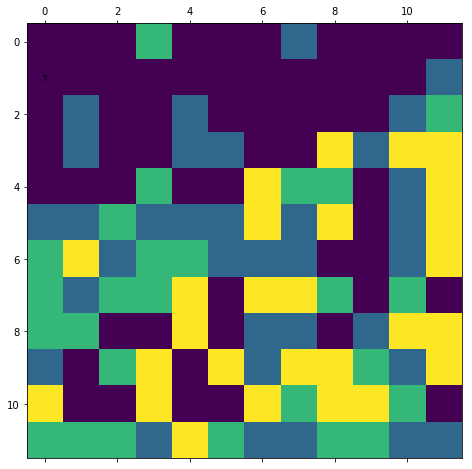

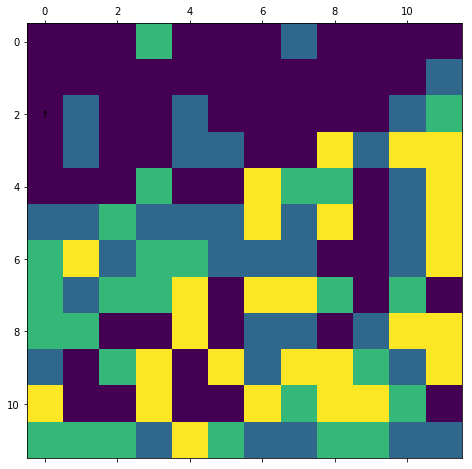

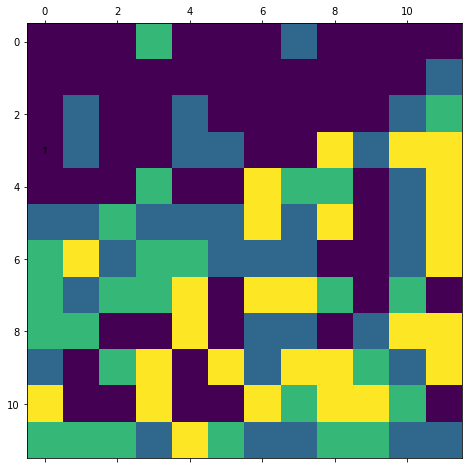

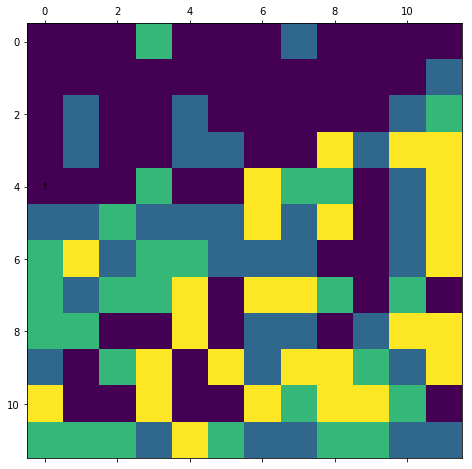

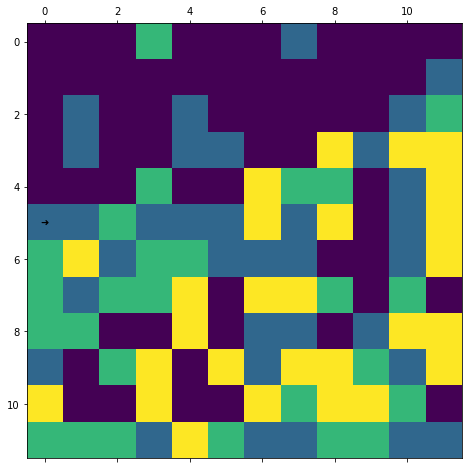

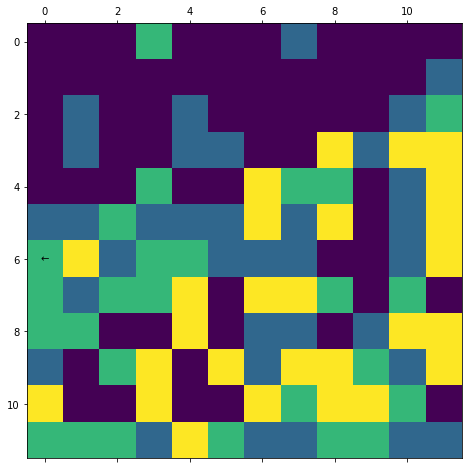

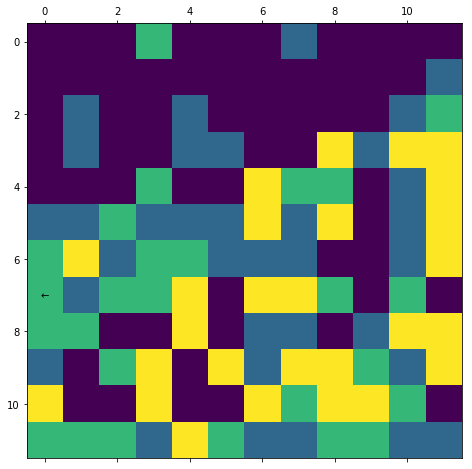

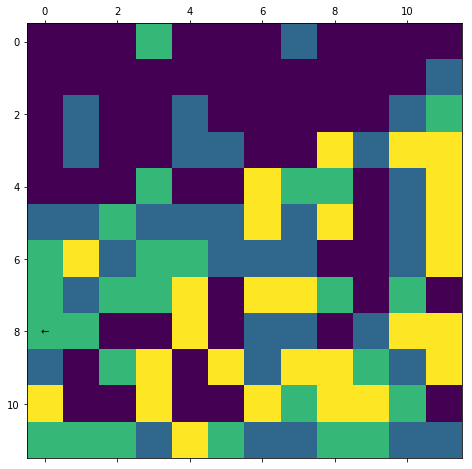

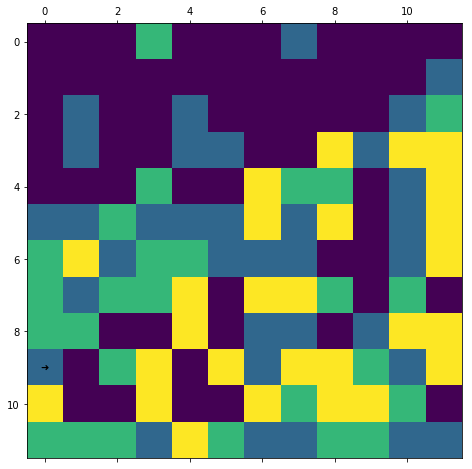

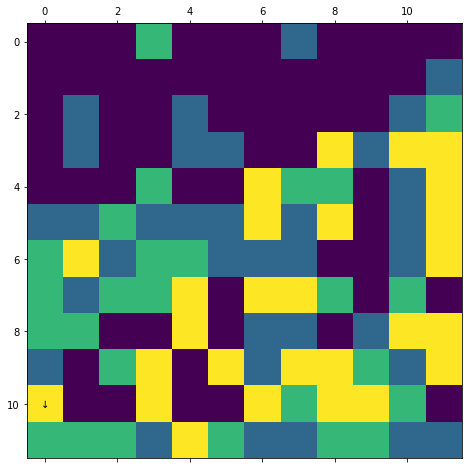

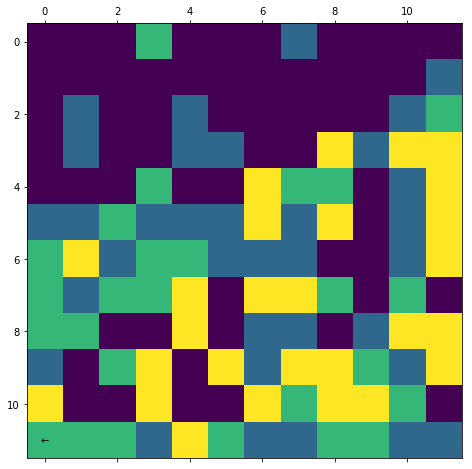

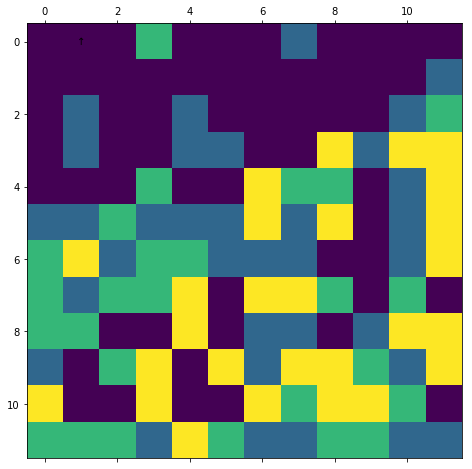

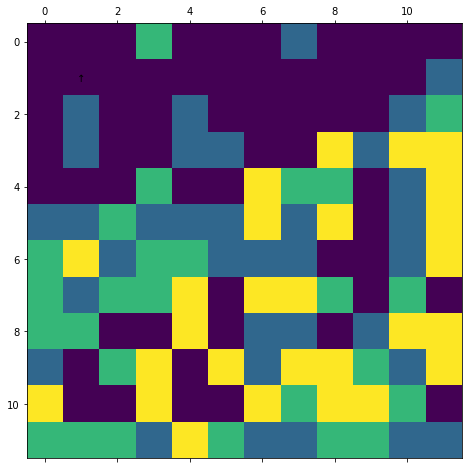

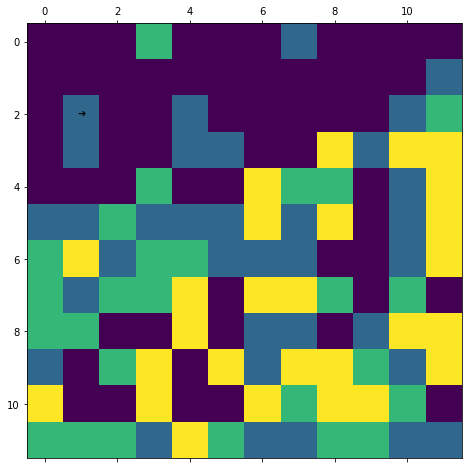

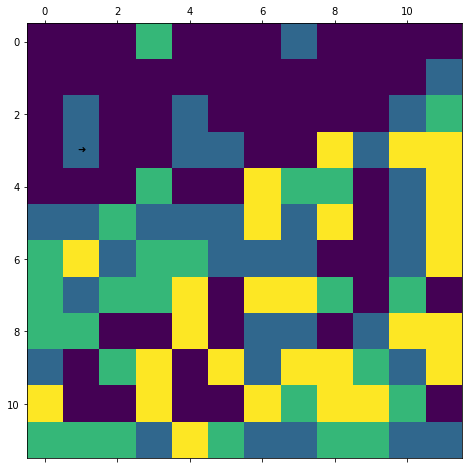

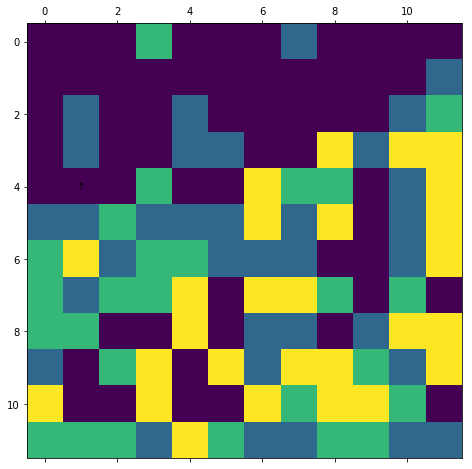

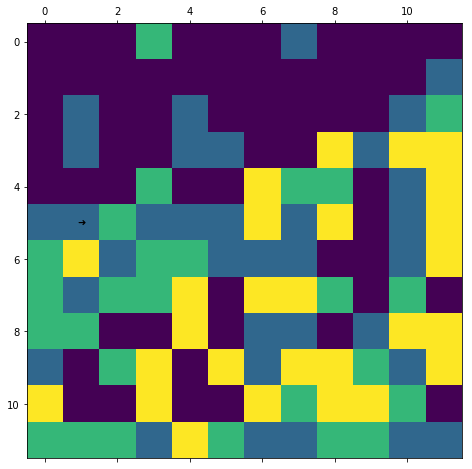

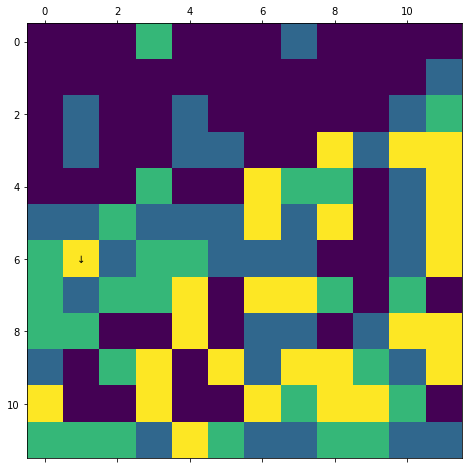

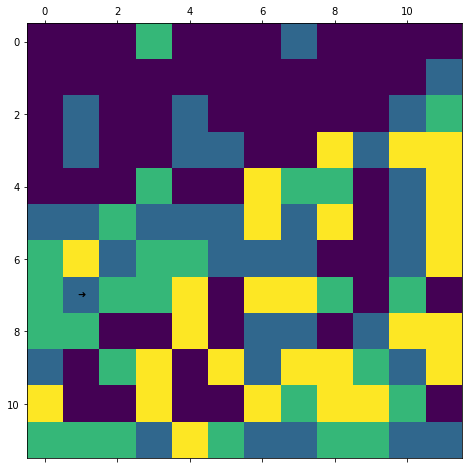

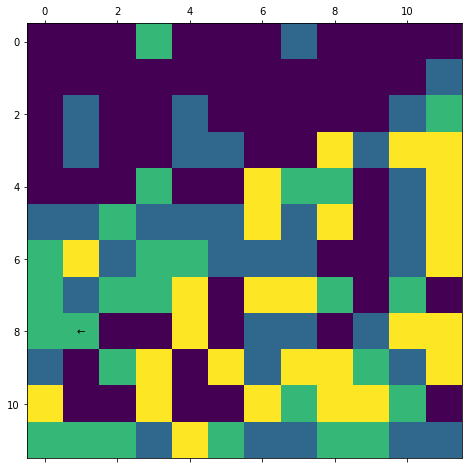

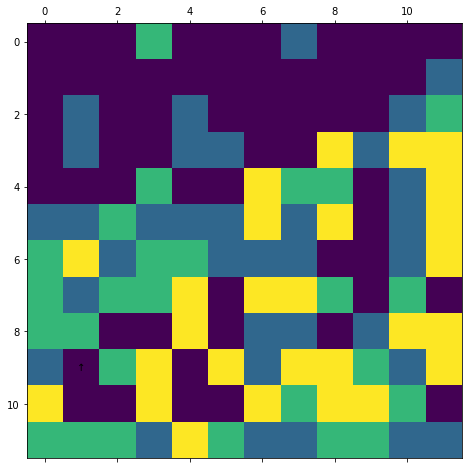

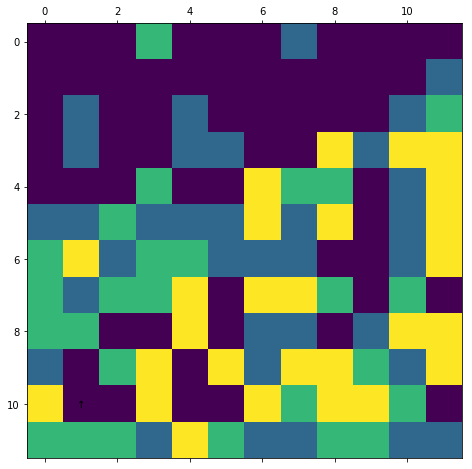

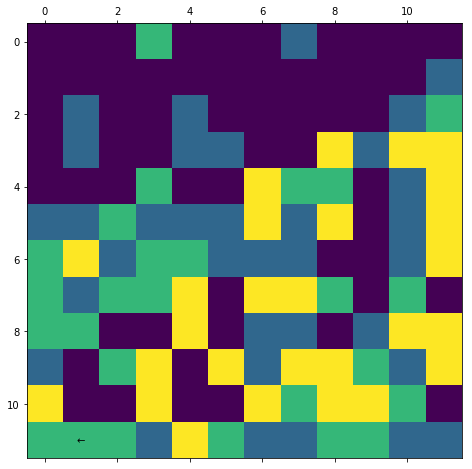

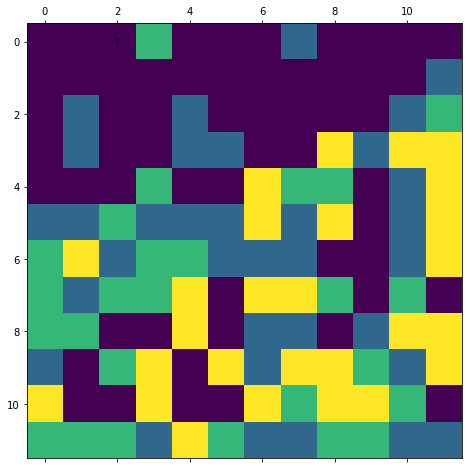

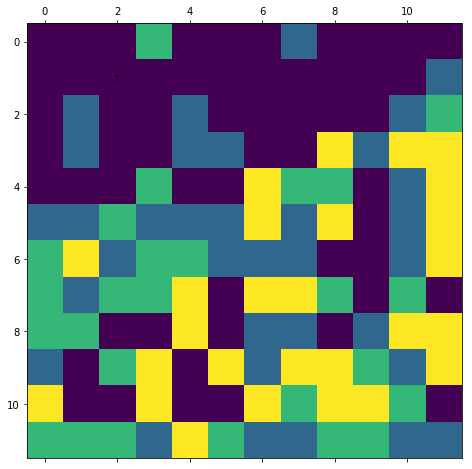

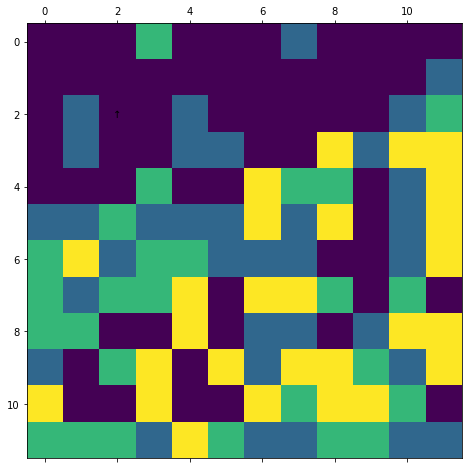

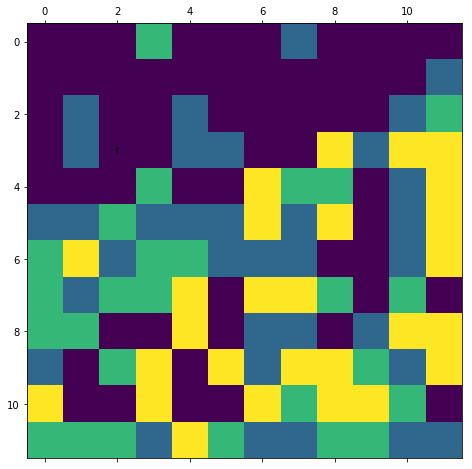

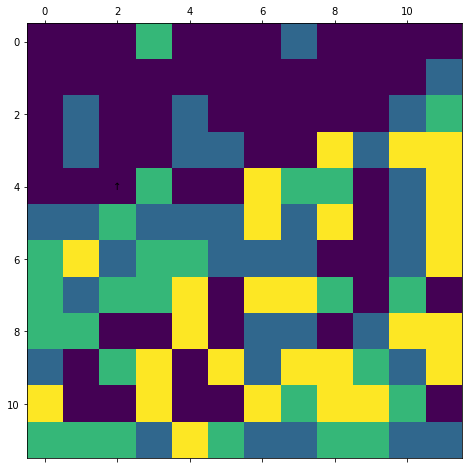

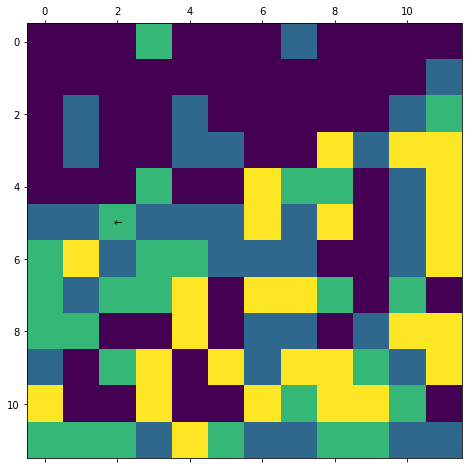

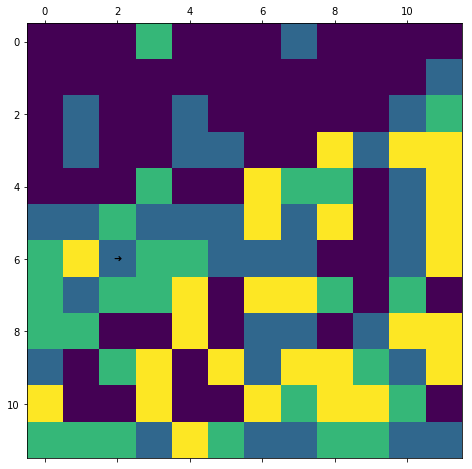

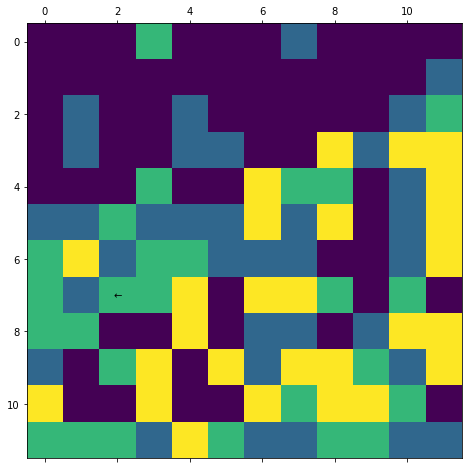

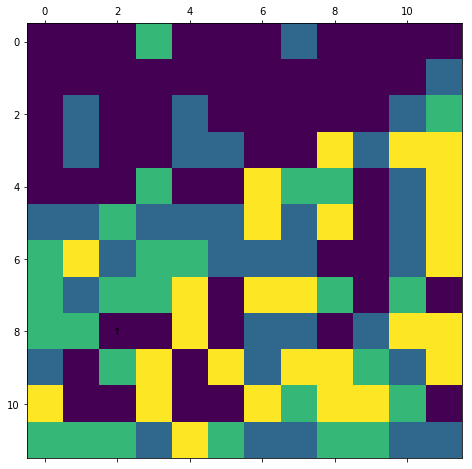

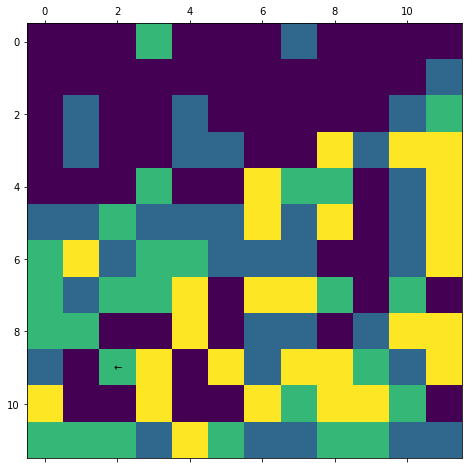

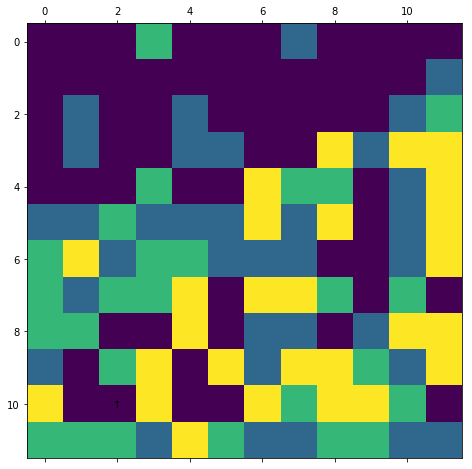

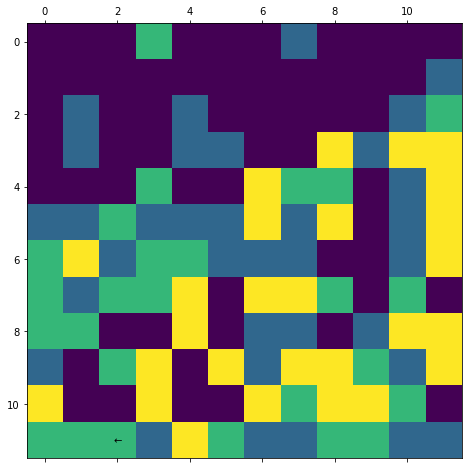

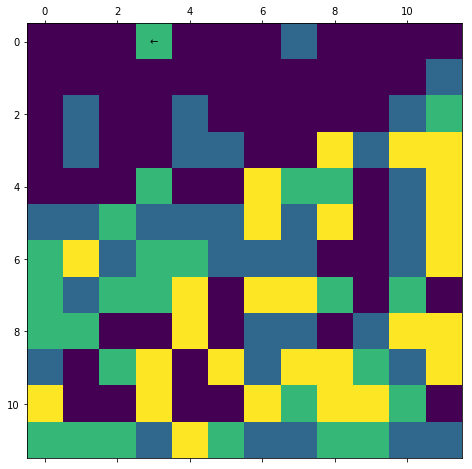

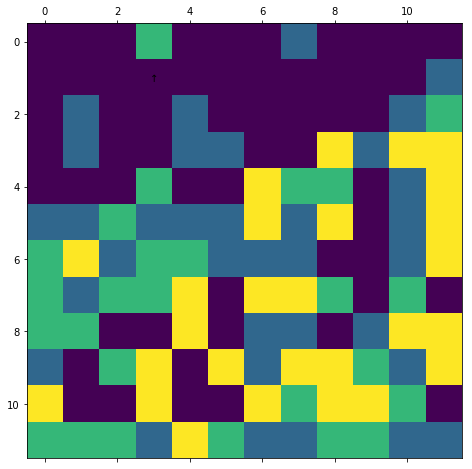

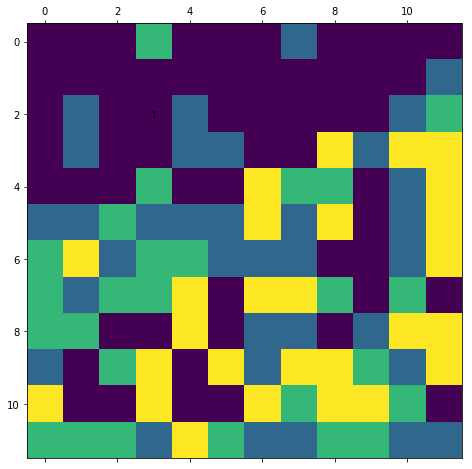

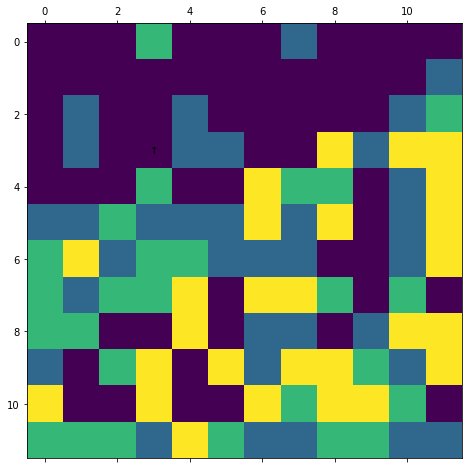

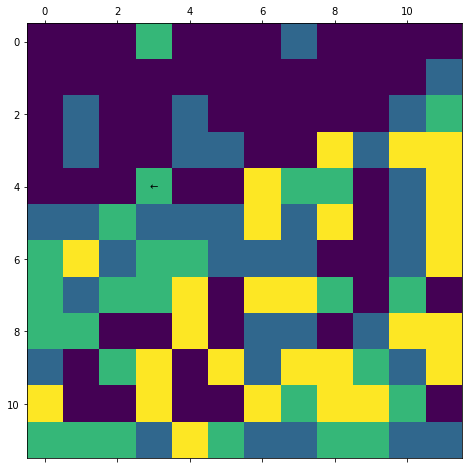

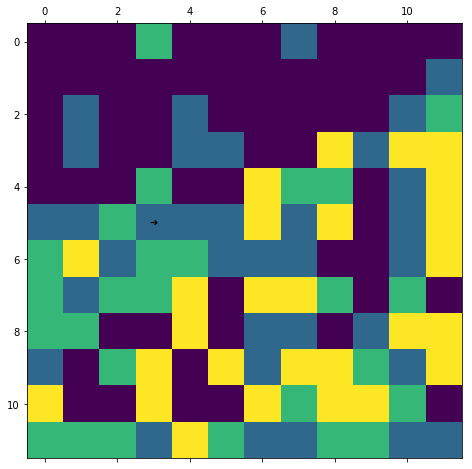

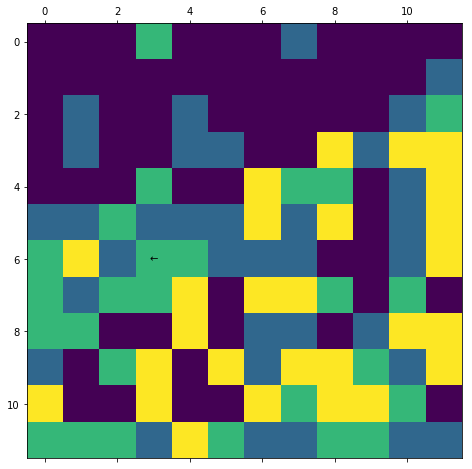

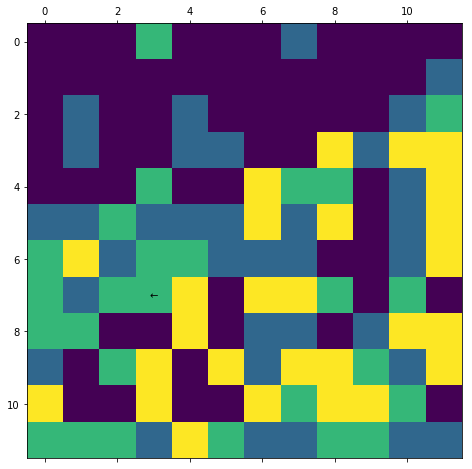

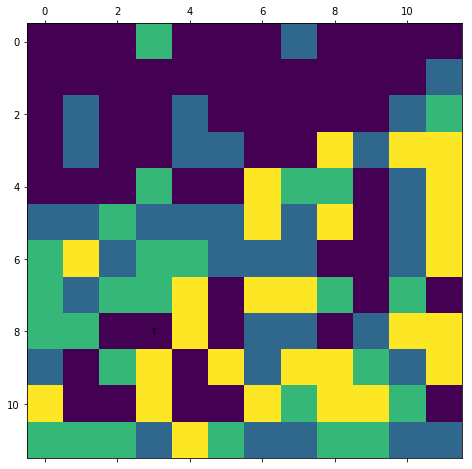

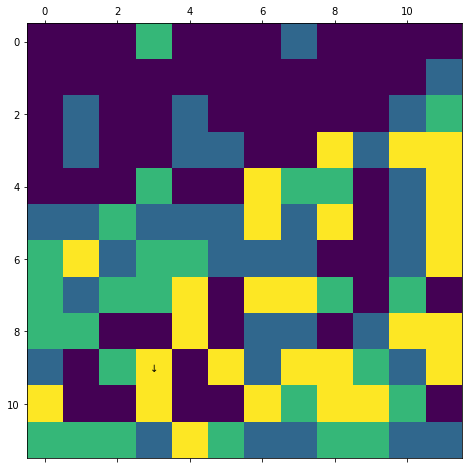

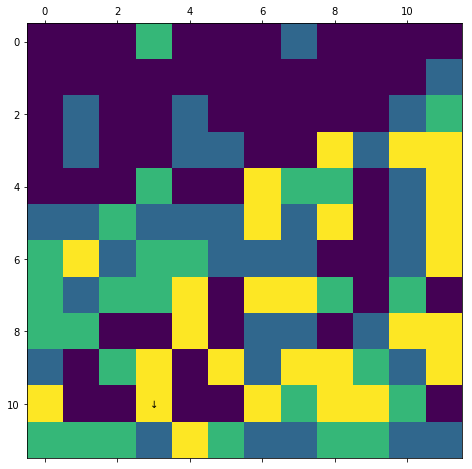

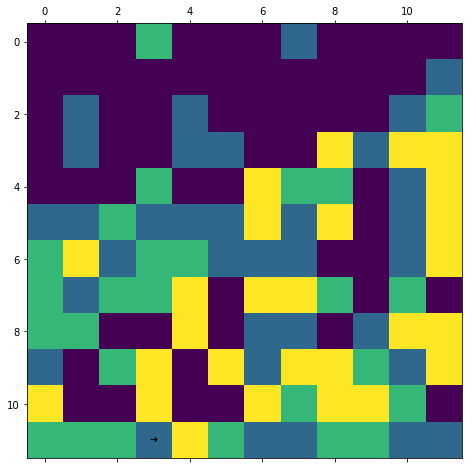

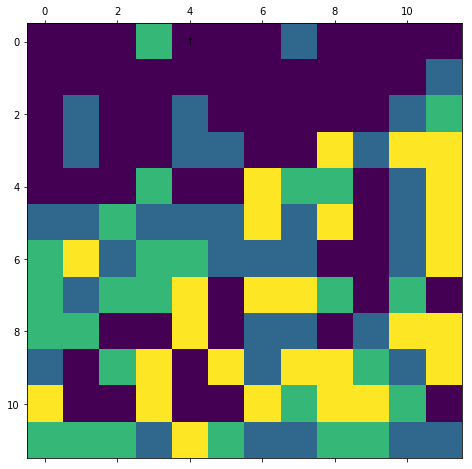

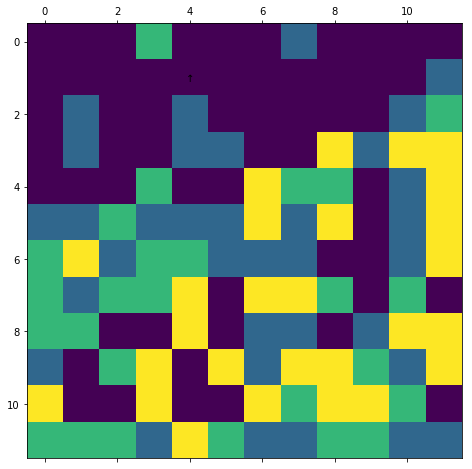

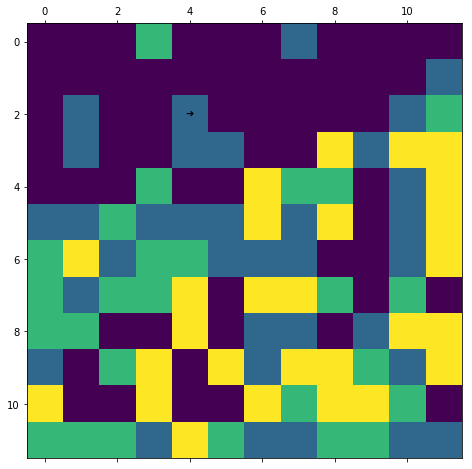

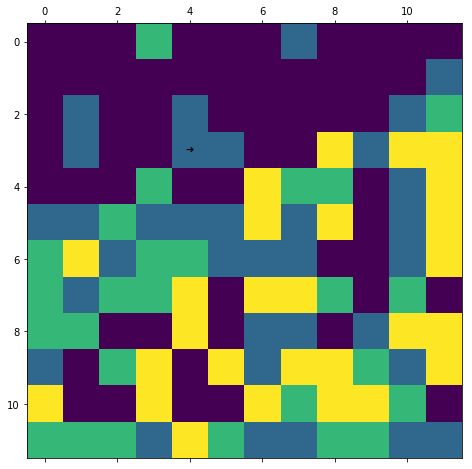

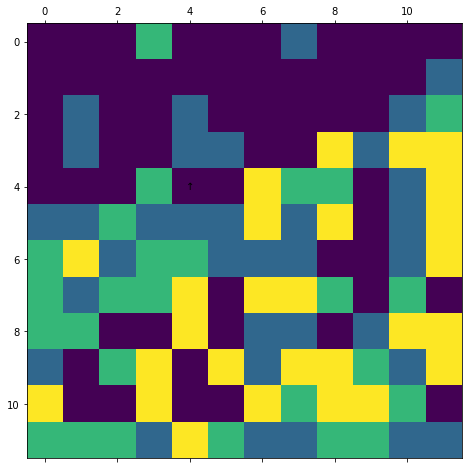

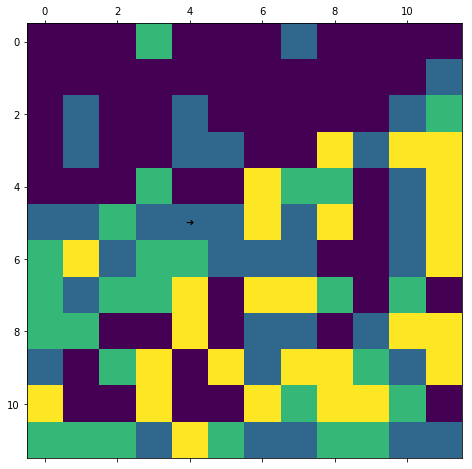

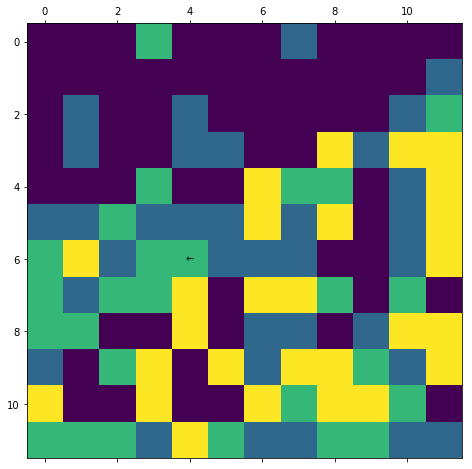

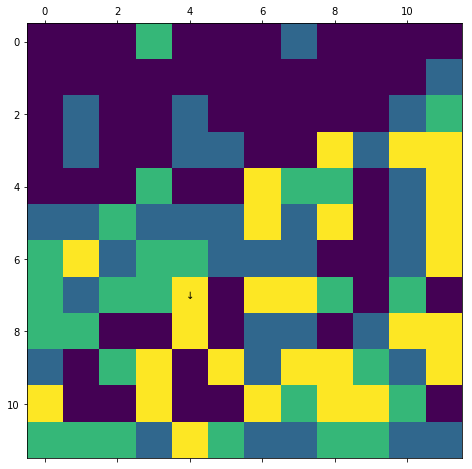

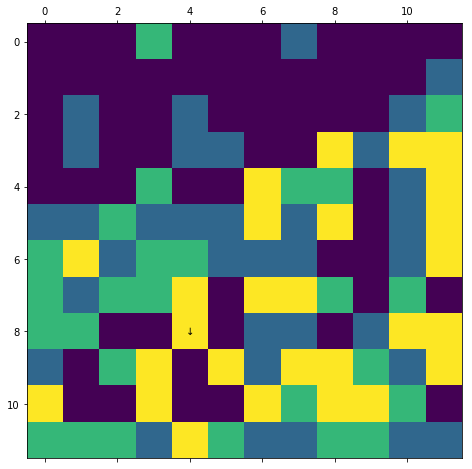

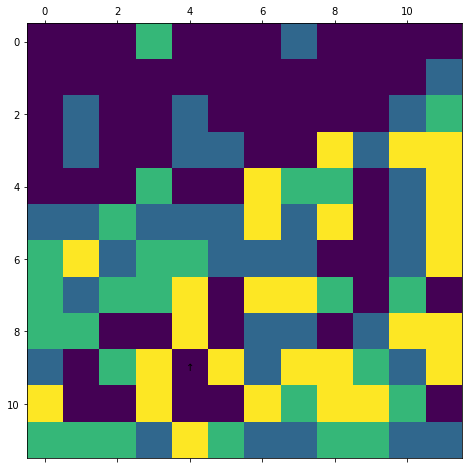

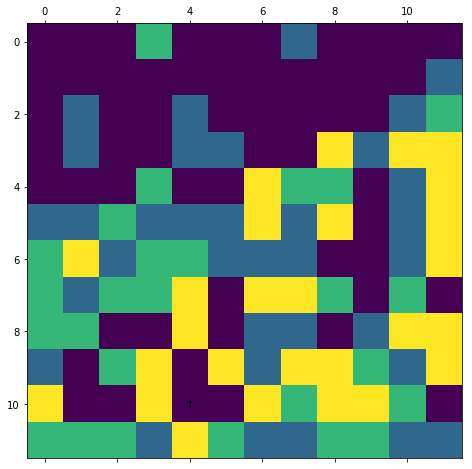

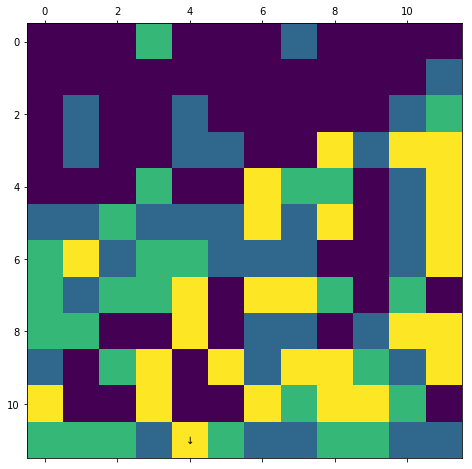

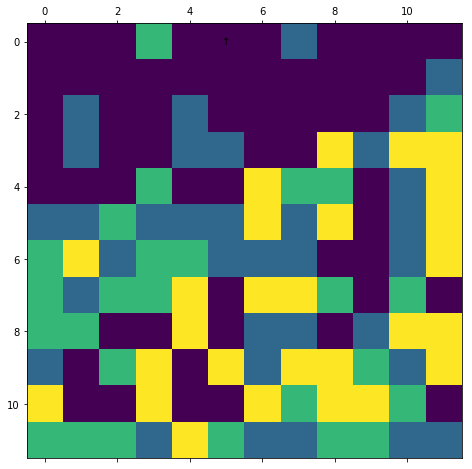

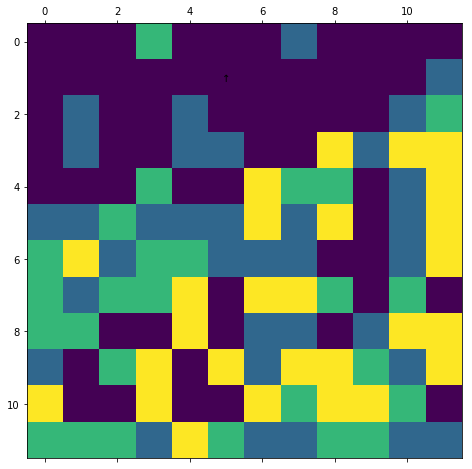

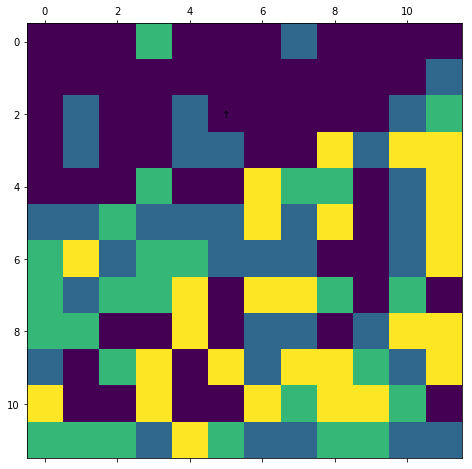

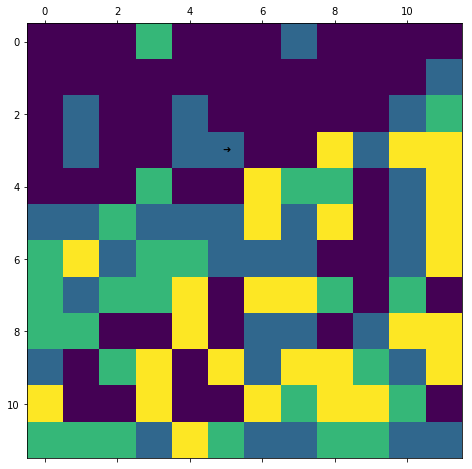

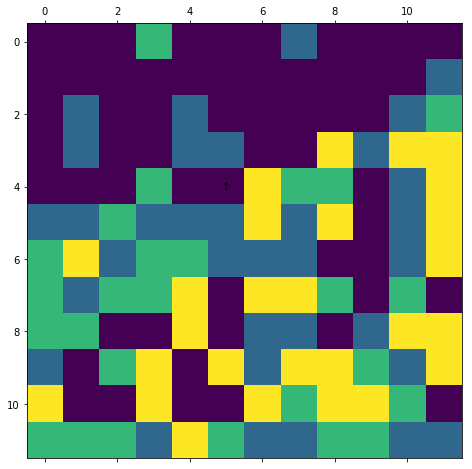

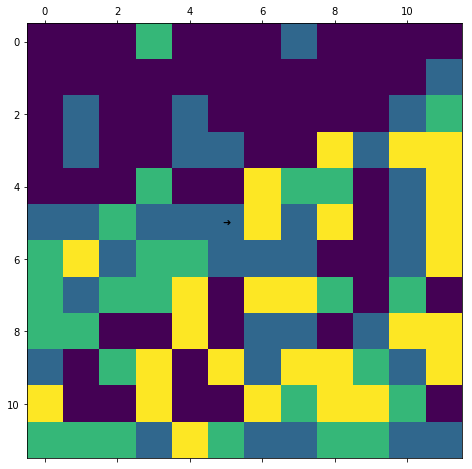

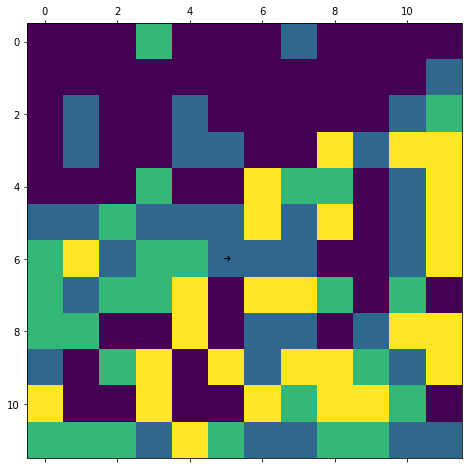

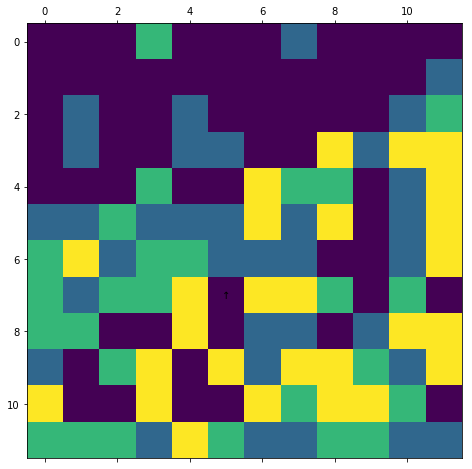

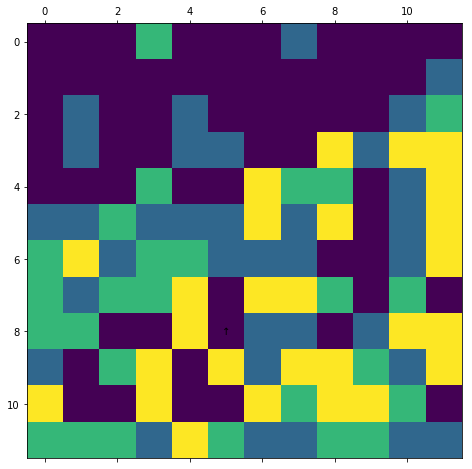

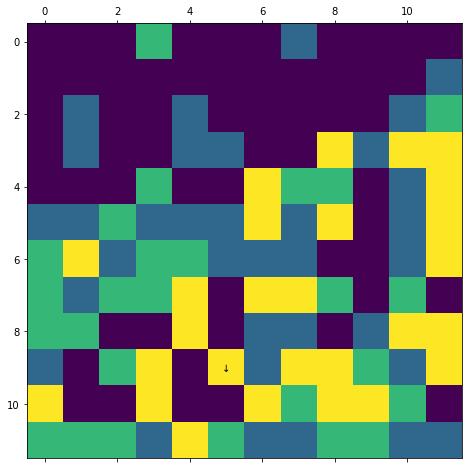

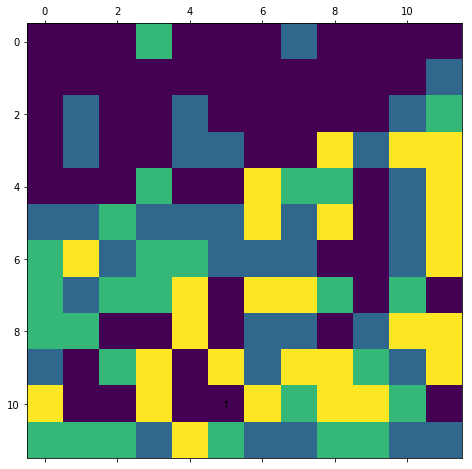

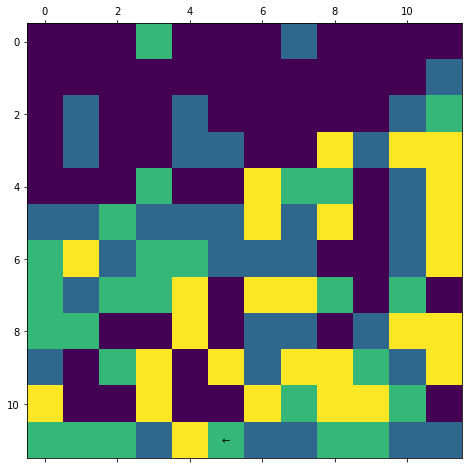

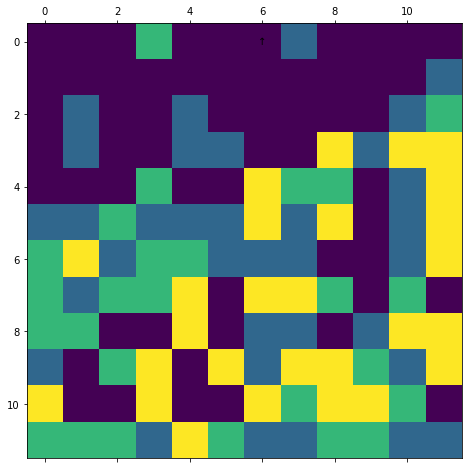

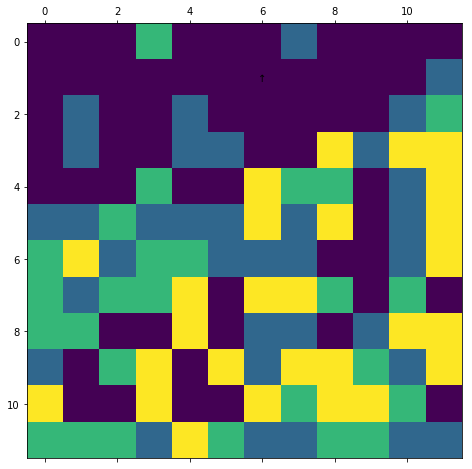

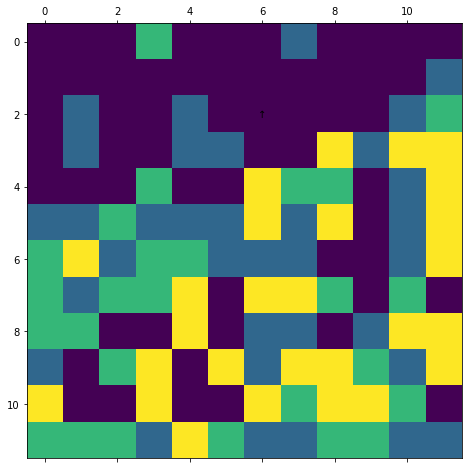

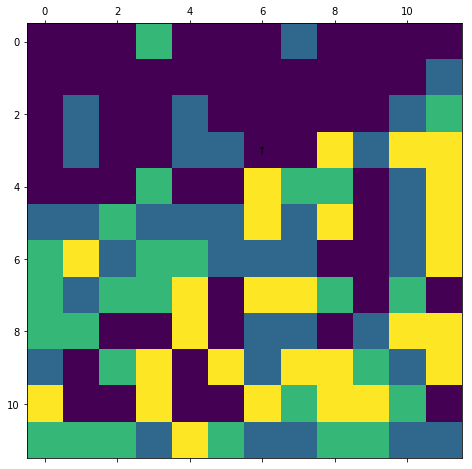

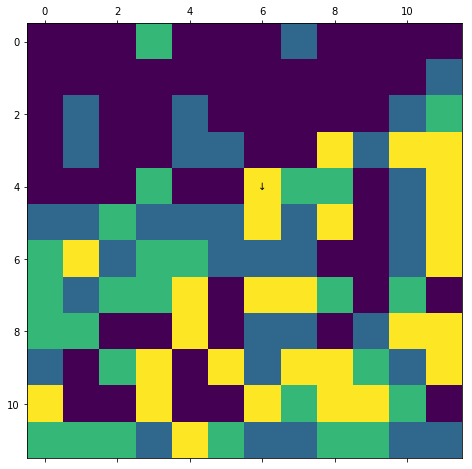

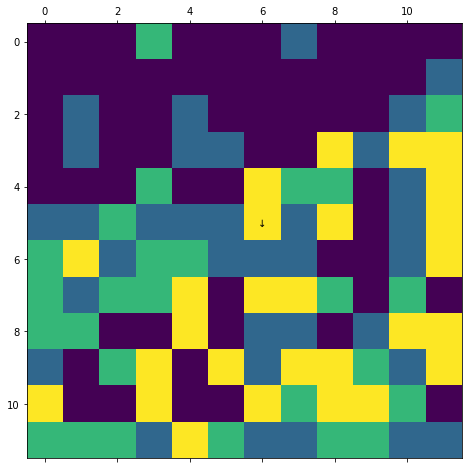

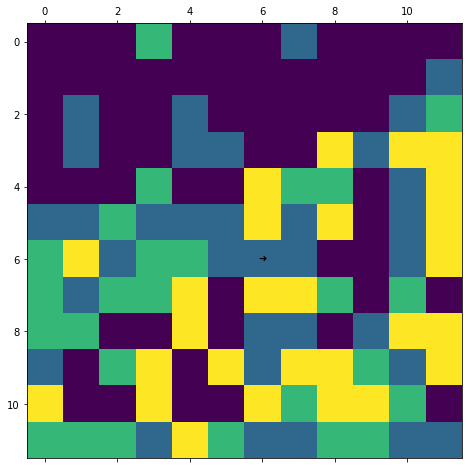

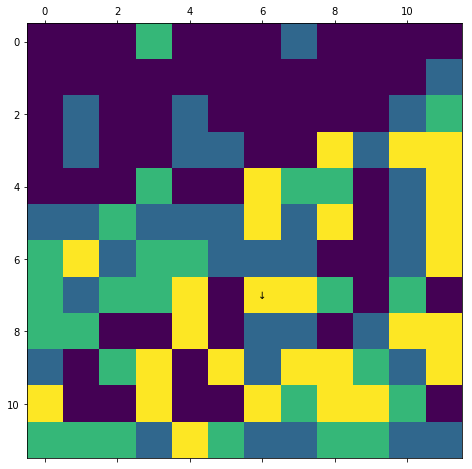

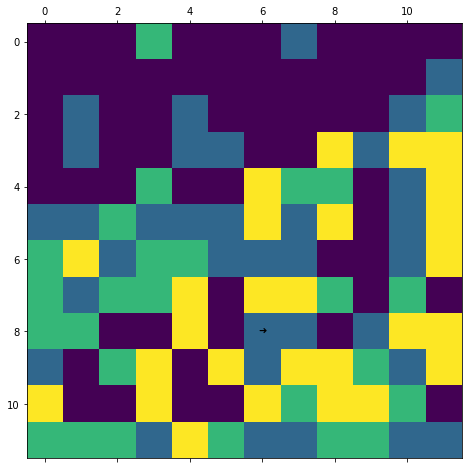

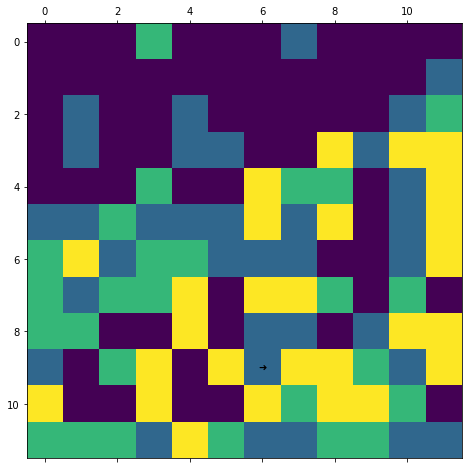

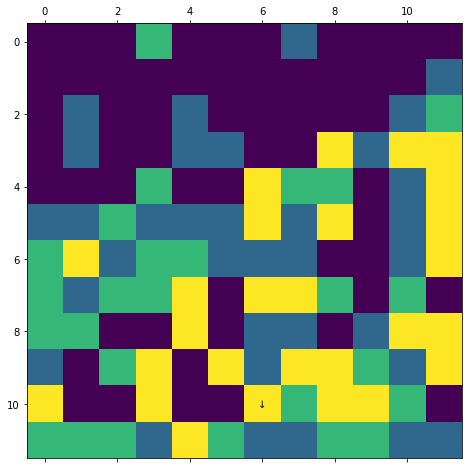

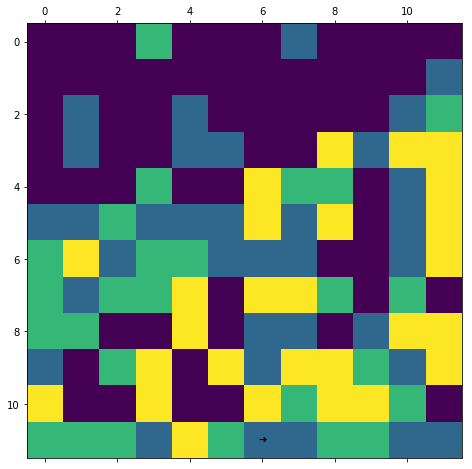

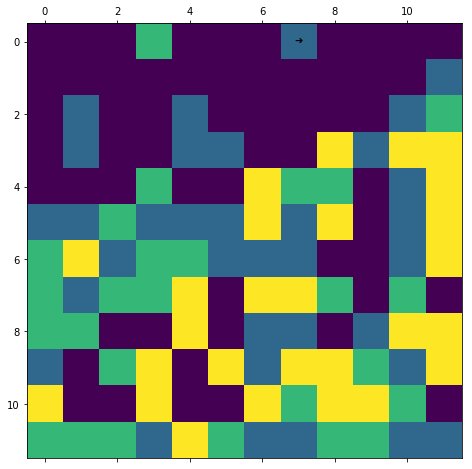

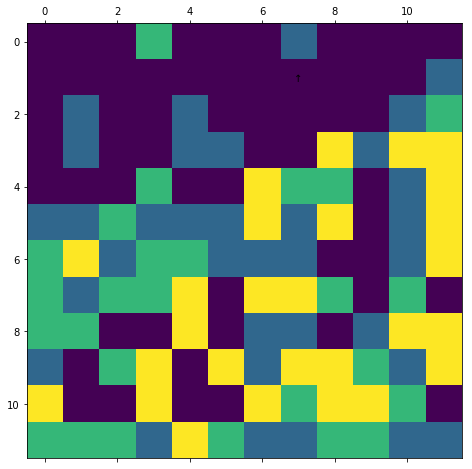

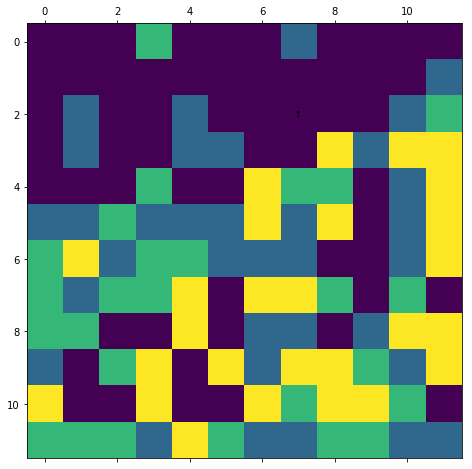

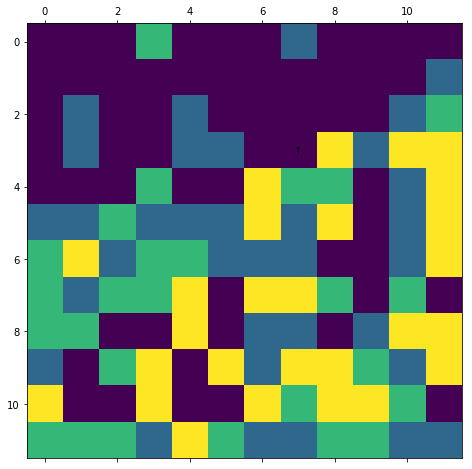

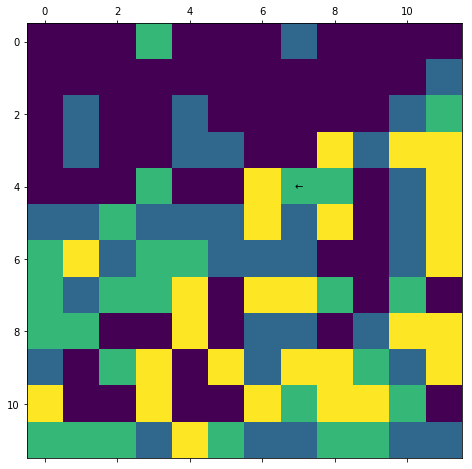

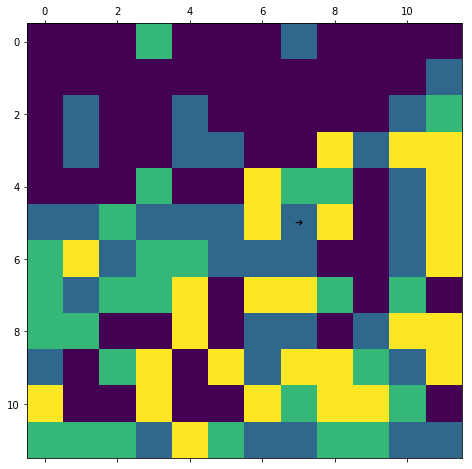

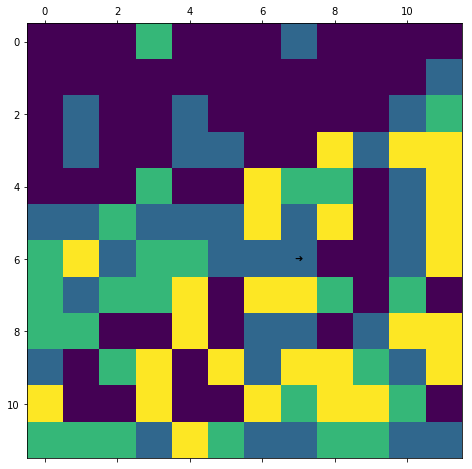

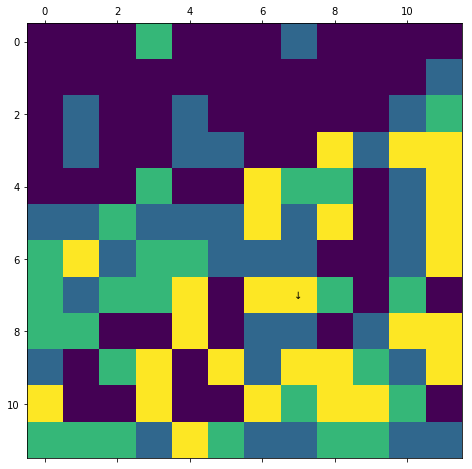

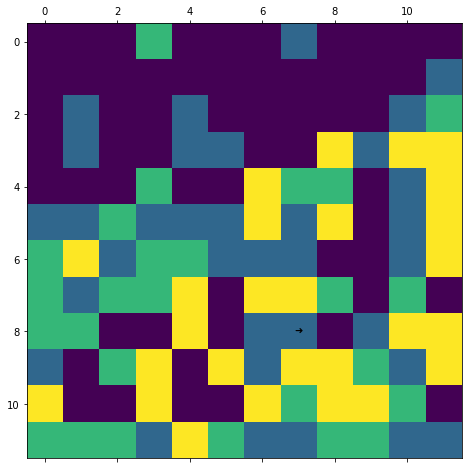

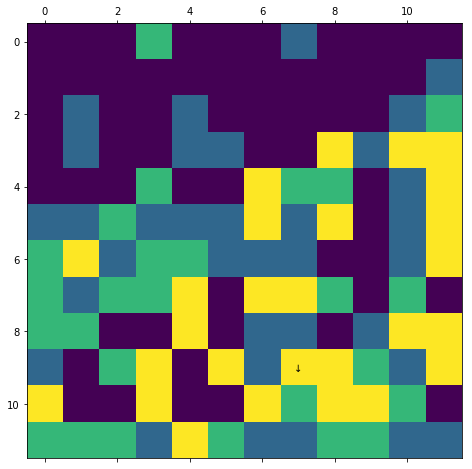

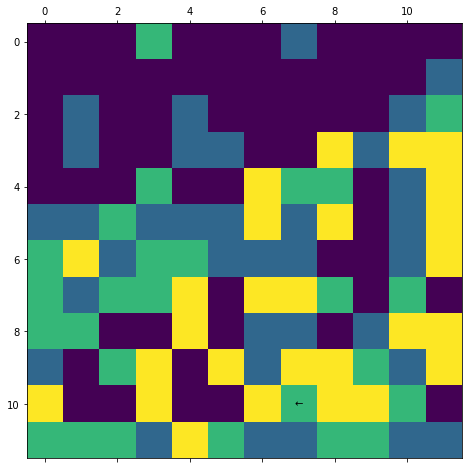

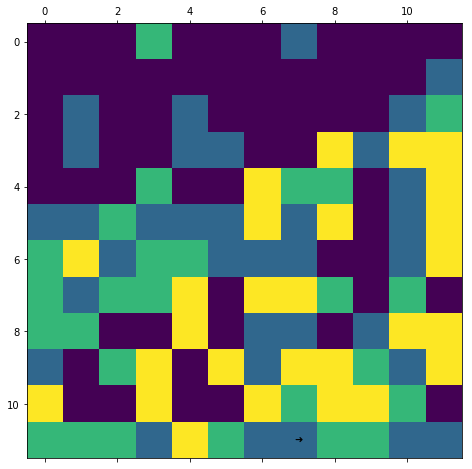

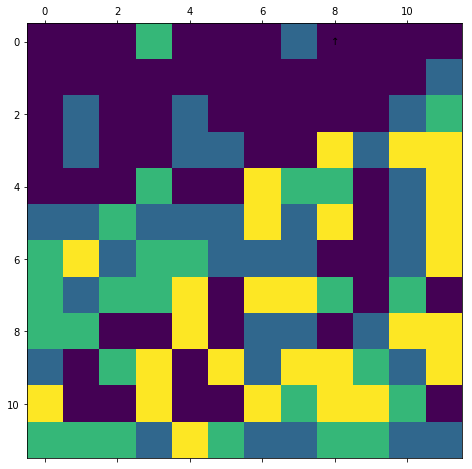

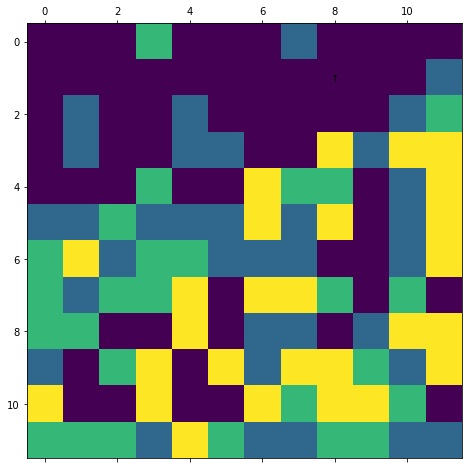

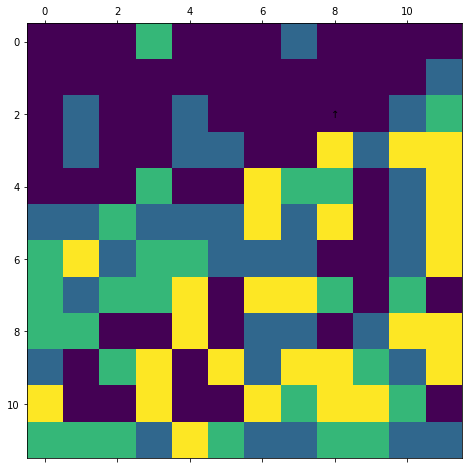

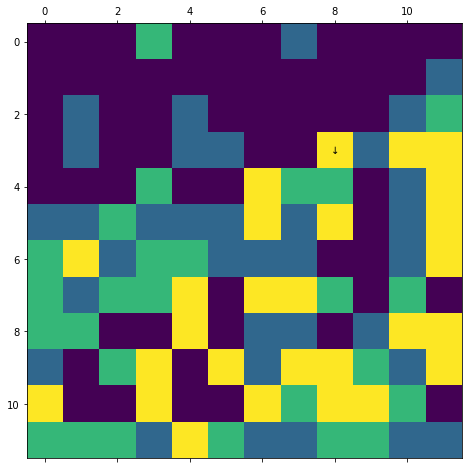

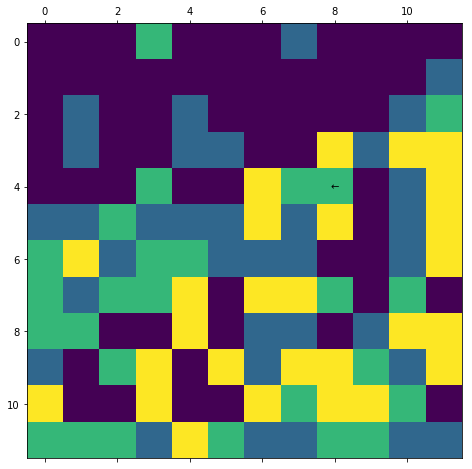

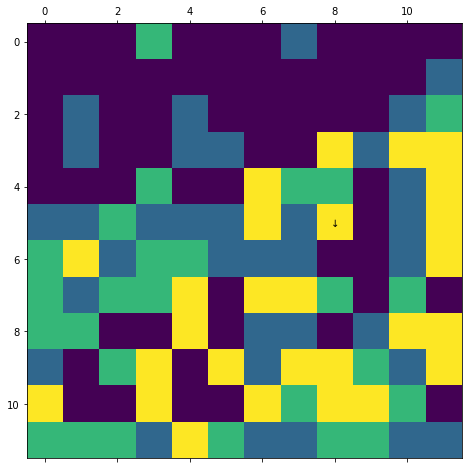

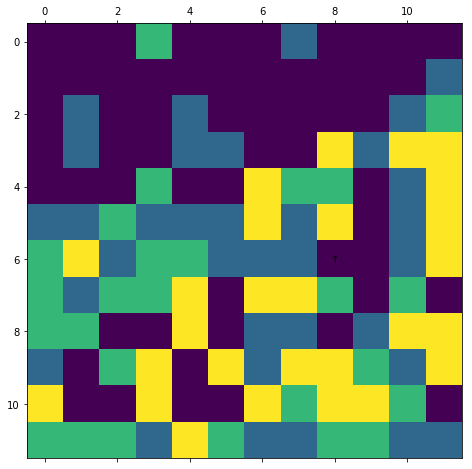

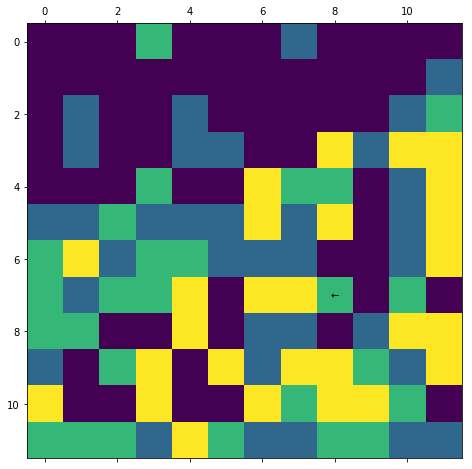

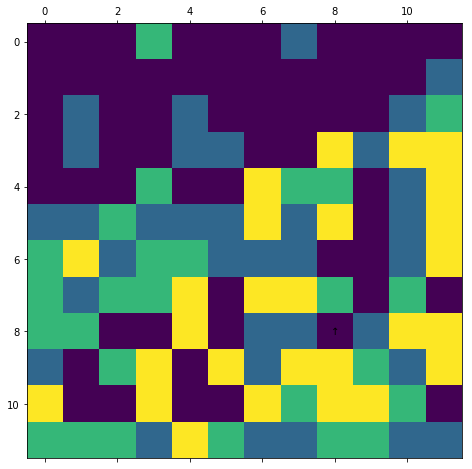

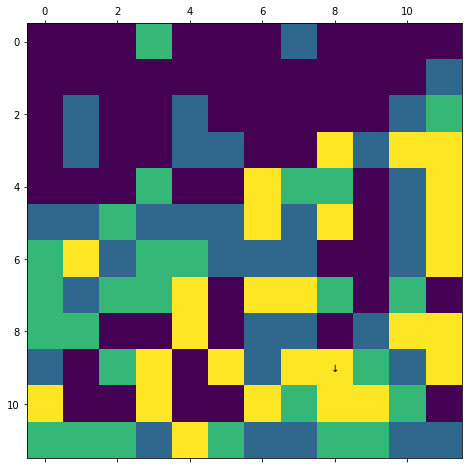

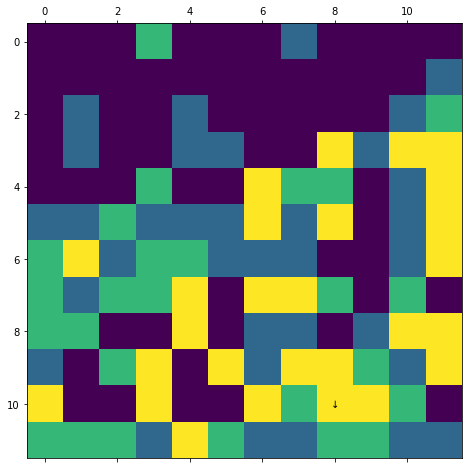

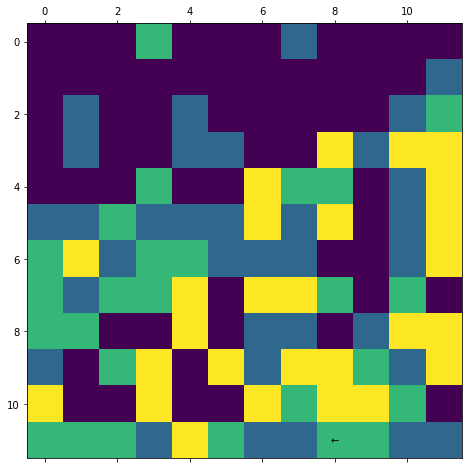

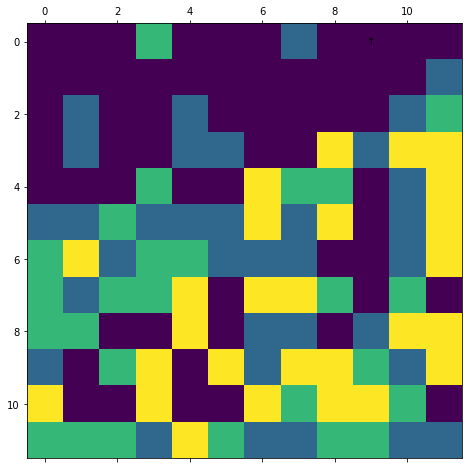

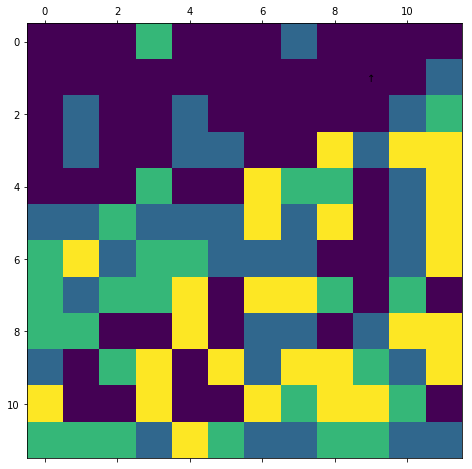

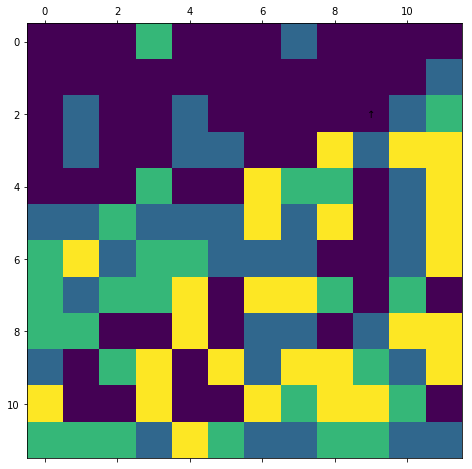

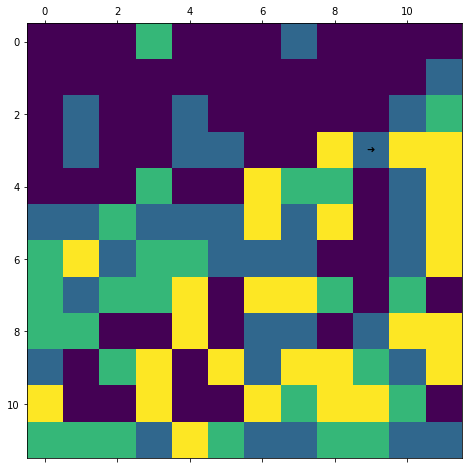

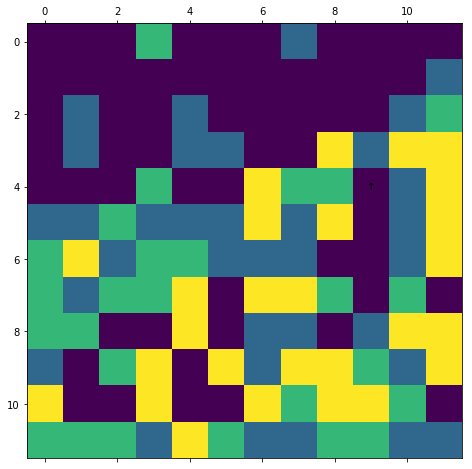

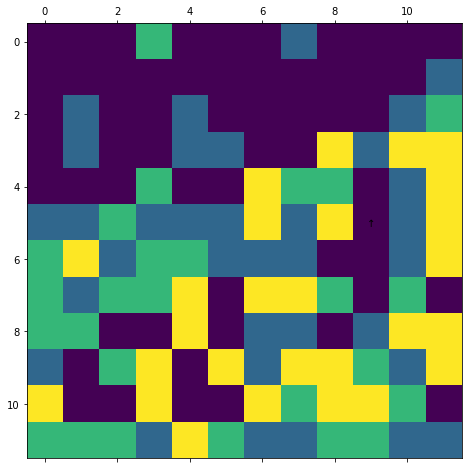

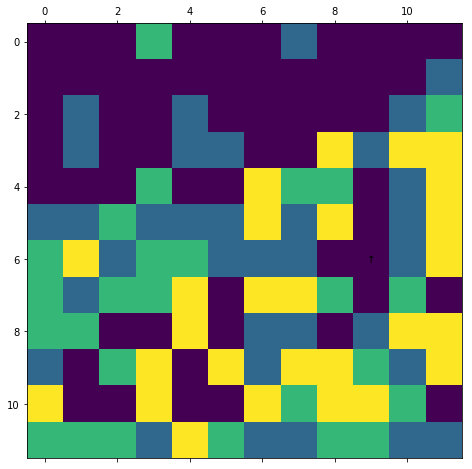

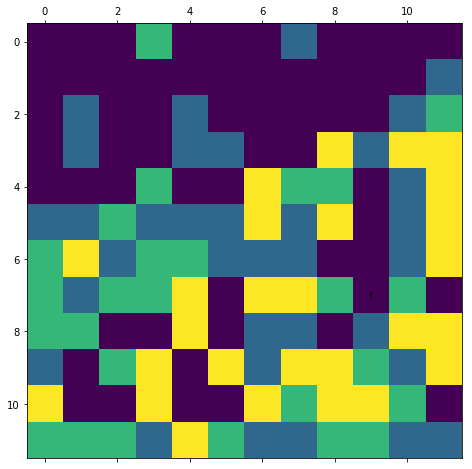

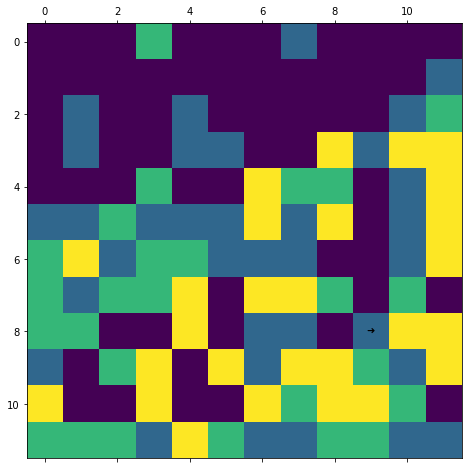

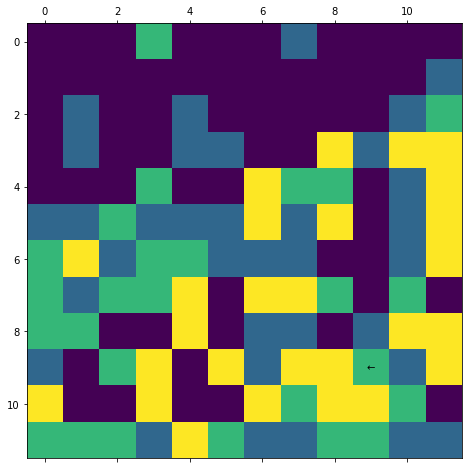

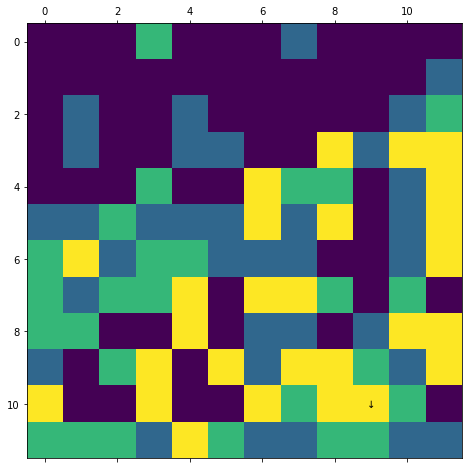

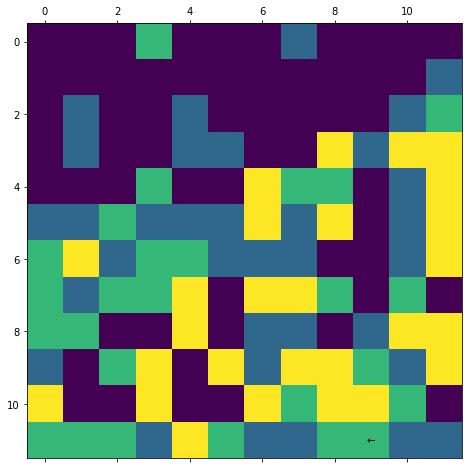

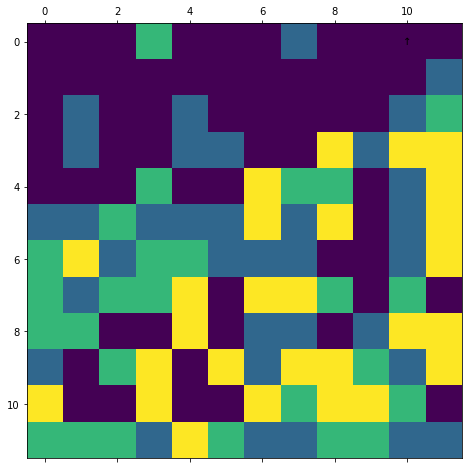

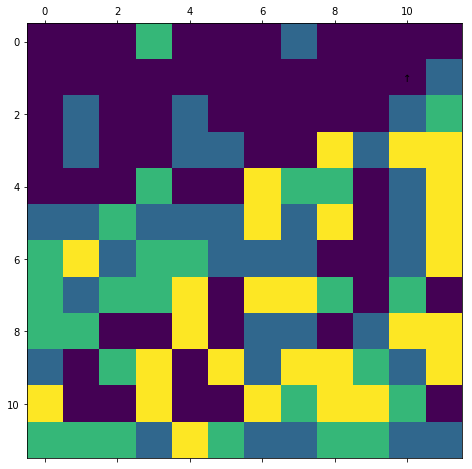

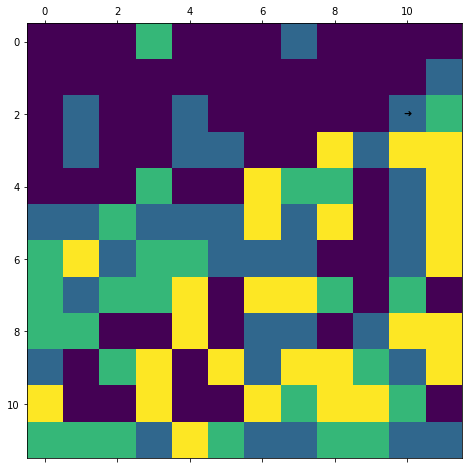

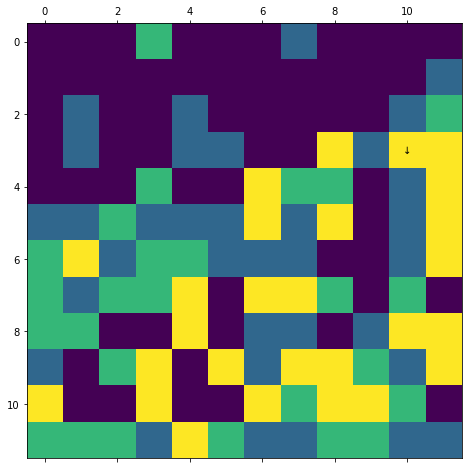

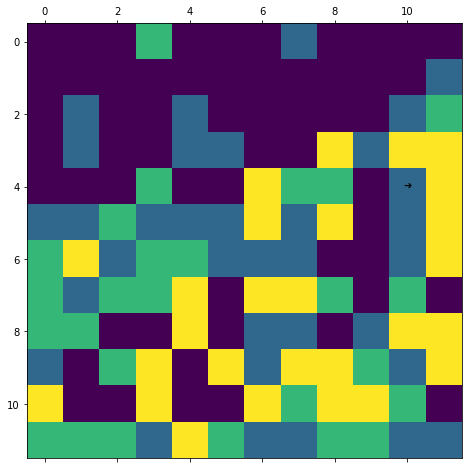

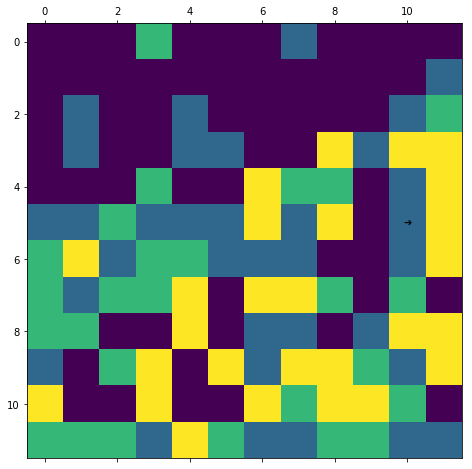

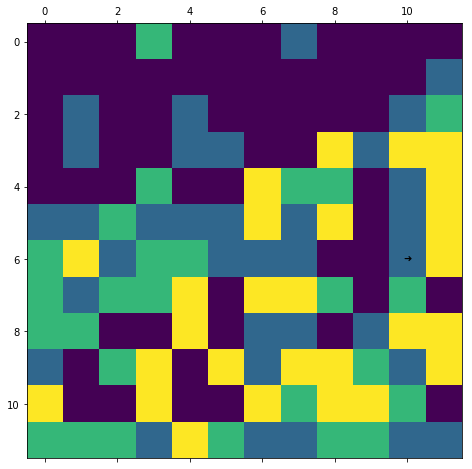

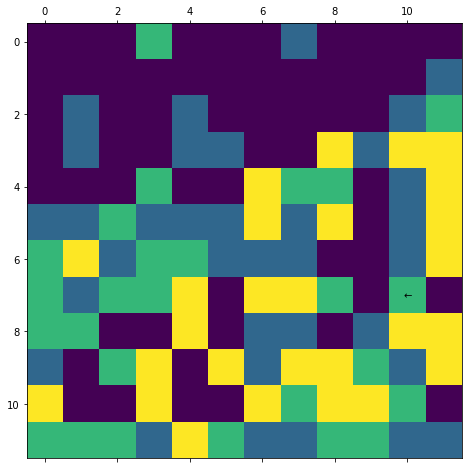

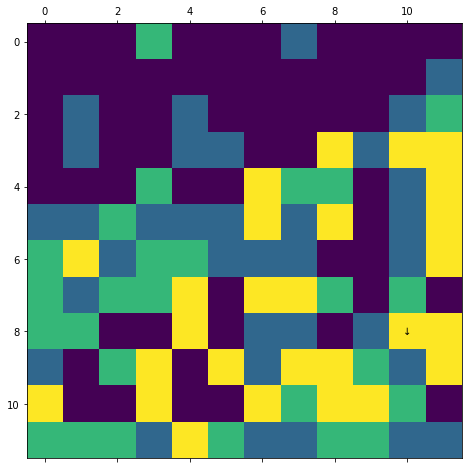

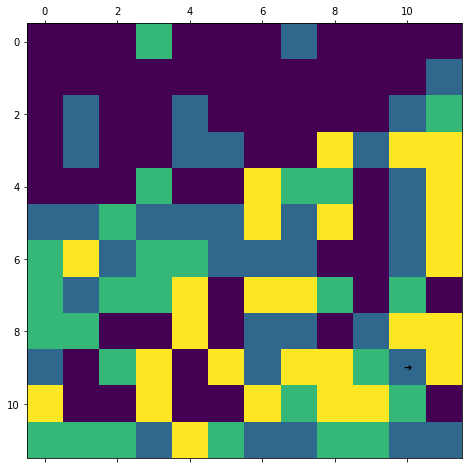

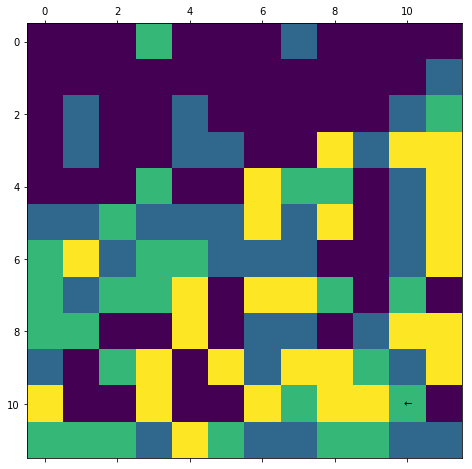

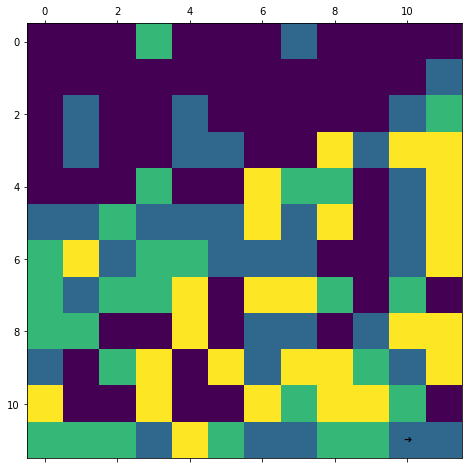

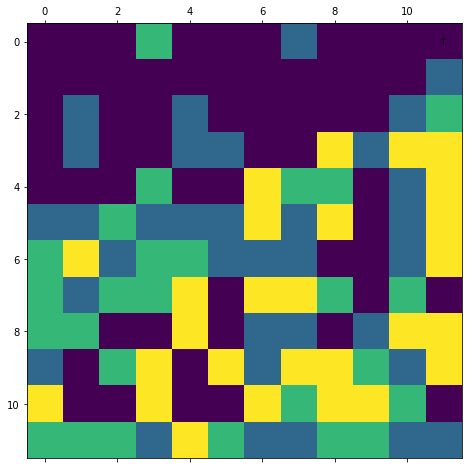

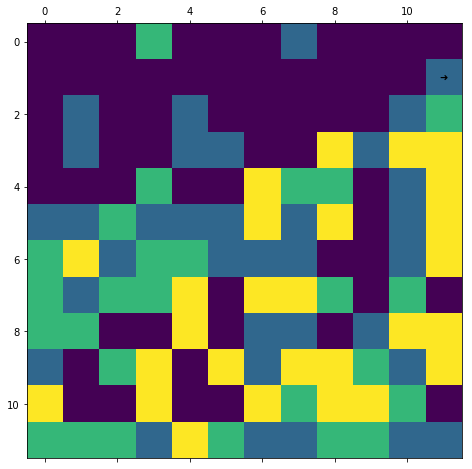

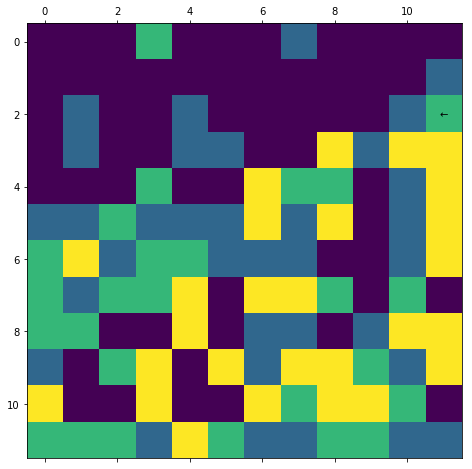

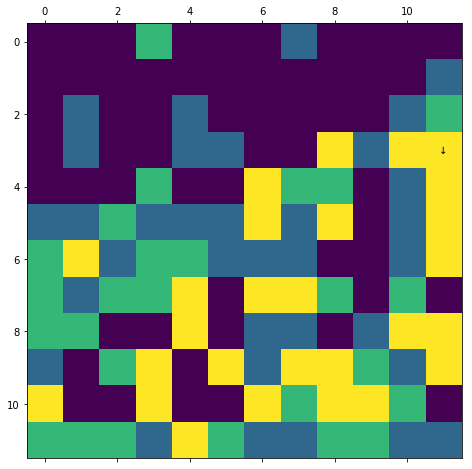

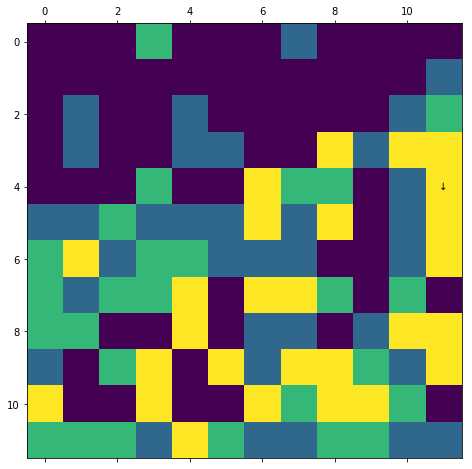

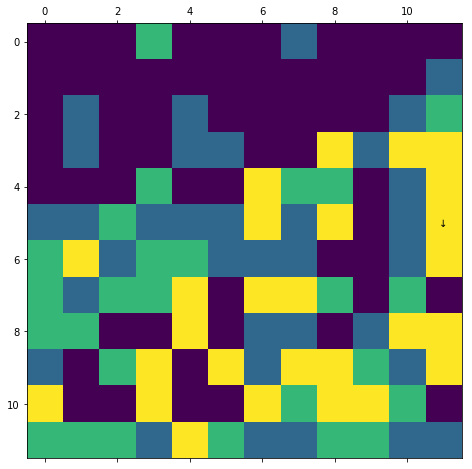

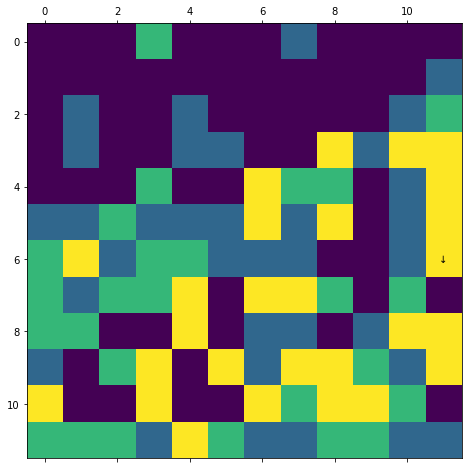

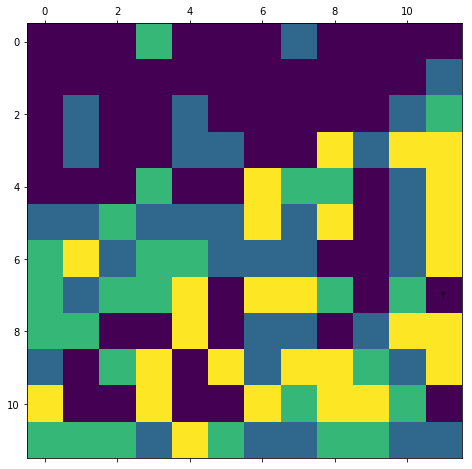

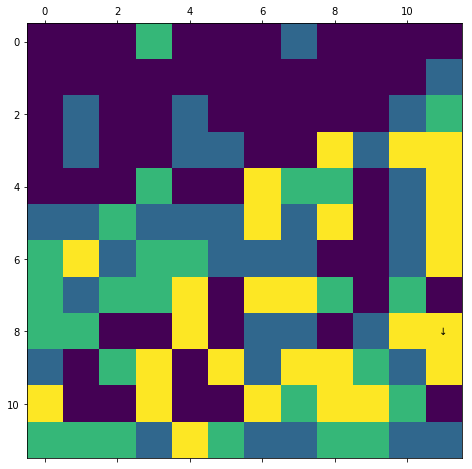

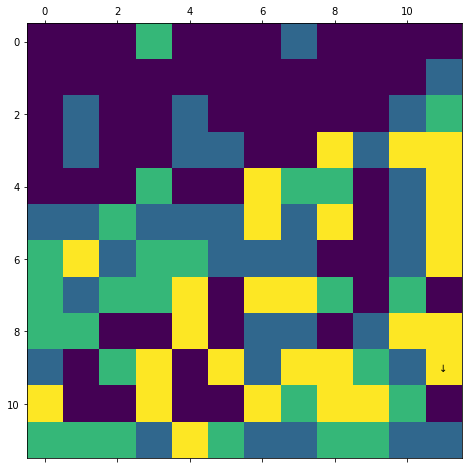

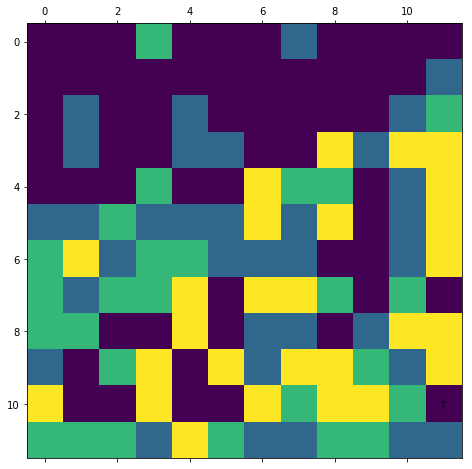

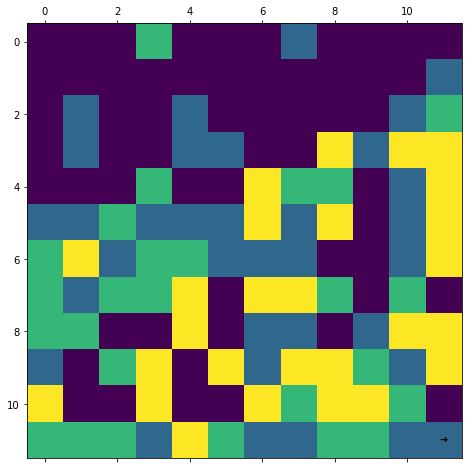

In [10]:
# To display the policy learn't
plt.rcParams['figure.figsize'] = [8,8]
print(len(Q_all))

for k in range(len(Q_all)):
    for i in range(12):
        for j in range(12):
            fig, ax = plt.subplots()
                
            ax.matshow(np.argmax(Q_all[k], axis=0))
            c = int(np.argmax(Q_all[k], axis=0)[j,i])
            direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
            ax.text(i, j, direcs[c], va='center', ha='center')
            